<a href="https://colab.research.google.com/github/himanimanjunath/wildlife-species-identifier/blob/main/Team_1_Wildlife_Species_Detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# All libraries:

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import missingno as msno
import datetime as dt
from google.colab import drive
from google.colab import files

# For models
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Models we'll try
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder


# Processing images
import os
import shutil
from PIL import Image
from tqdm import tqdm
from multiprocessing import Pool
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input

# Train test split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE, ADASYN

# Running models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# String to list
import ast

# Mount drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import sample_df (with features)... This whole box takes a really long time to run (around 20 mins)
sample_df = pd.read_csv('/content/drive/Shareddrives/teamWon/sample_df.csv') # Import processed sample_df
sample_df['features'] = sample_df['features'].apply(ast.literal_eval) # Convert stringified lists to actual lists
print(len(sample_df)) # Should be 67328

<ipython-input-2-d30945f014dd>:2: DtypeWarning: Columns (5,6,11,12,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  sample_df = pd.read_csv('/content/drive/Shareddrives/teamWon/sample_df.csv') # Import processed sample_df


67328


<Axes: >

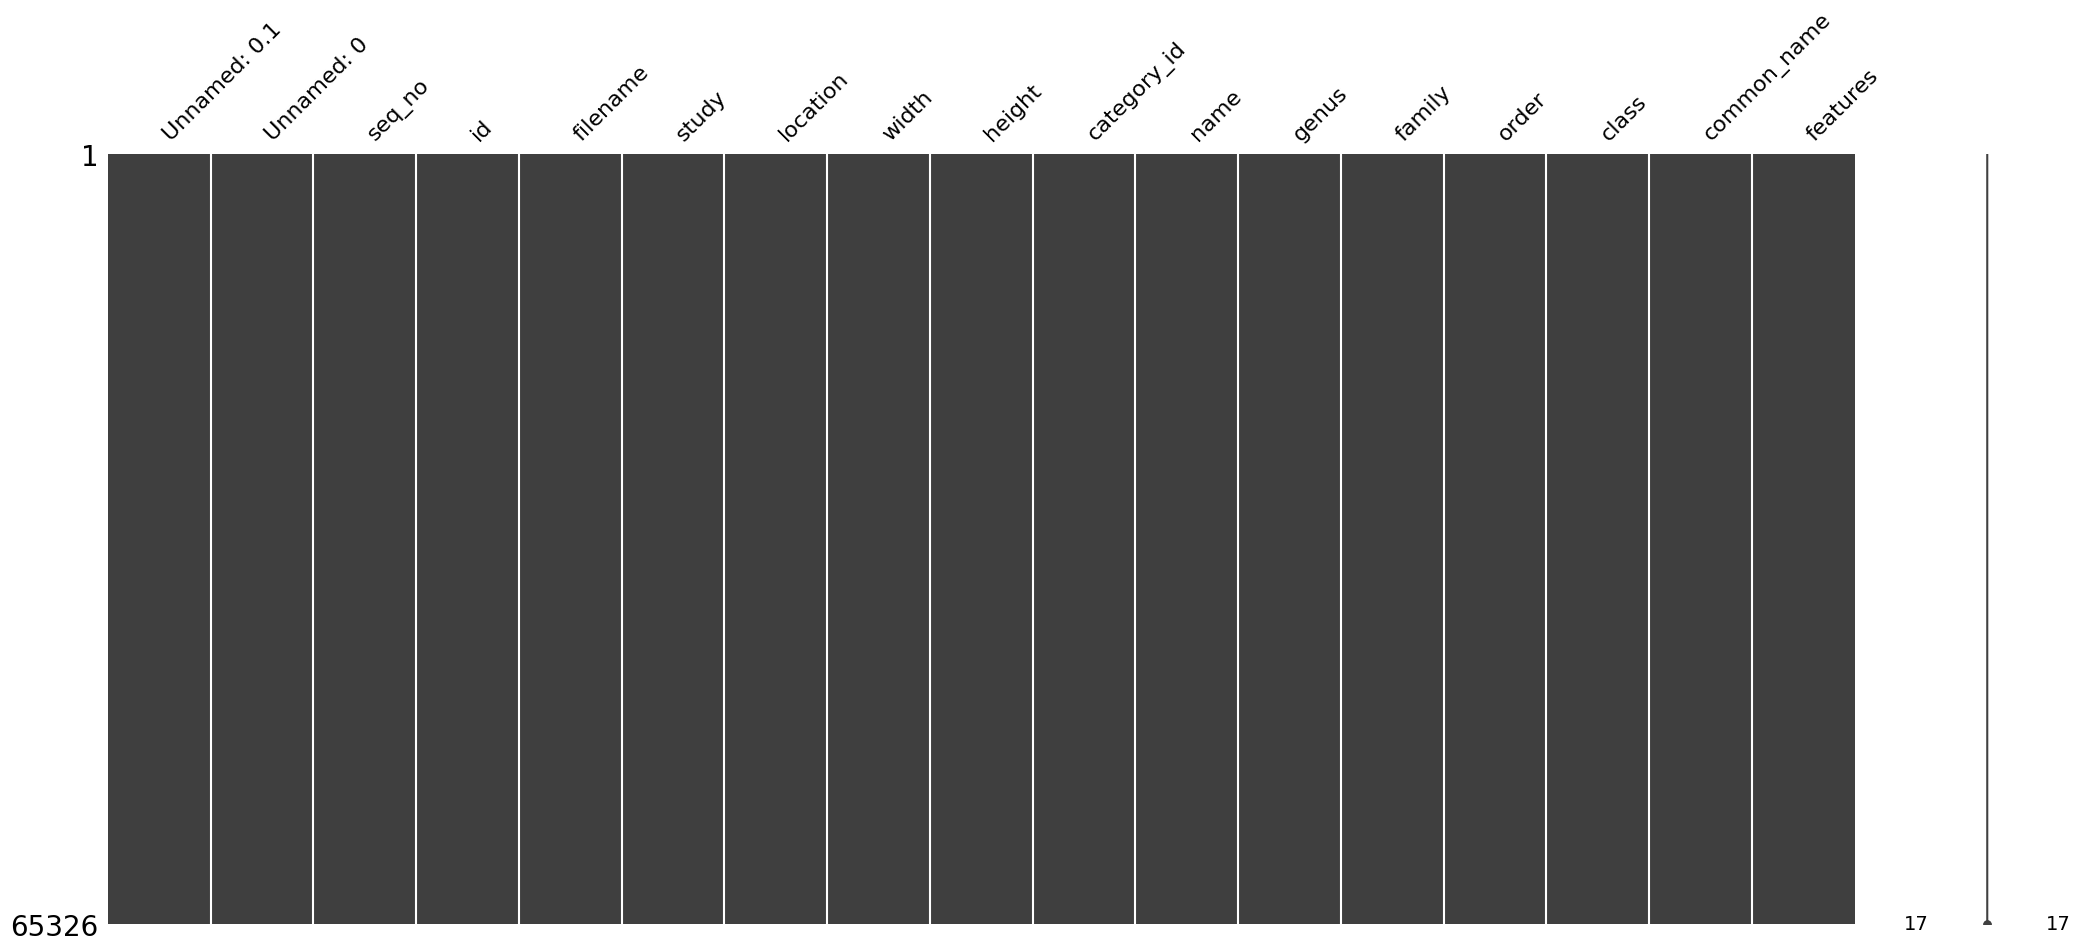

In [ ]:
# Now that sample_df has this 67k dataset with features, we clean the dataset

# Create cleaned df
cleaned_df = sample_df.dropna(how = 'any', inplace = False)
#if any column in a row has a missing value, drop the row
#inplace = False: don't modify the original sample_df; return new DataFrame called cleaned_df instead

# visualize
msno.matrix(cleaned_df)

In [ ]:
# Visualize the counts for common_name, which ones are highest
cleaned_df['common_name'].value_counts()

common_name
domestic cow                  5916
raccoon                       5412
california ground squirrel    5056
red deer                      4927
american black bear           4721
mule deer                     4510
eastern gray squirrel         4459
bobcat                        4308
coyote                        4046
wild boar                     3016
cougar                        2817
elk                           2427
unidentified deer             2056
gray fox                      1934
nine-banded armadillo         1862
snowshoe hare                 1564
moose                         1202
striped skunk                 1149
american red squirrel          837
unidentified rabbit            449
california quail               435
wild turkey                    367
american marten                294
donkey                         266
red fox                        190
unidentified chipmunk          157
virginia opossum               153
domestic dog                   136
north american porcupine       123
black-tailed jackrabbit        115
north american river otter     106
unidentified corvus            104
unidentified pack rat           73
yellow-bellied marmot           36
european badger                 31
gray jay                        25
horse                           21
unidentified deer mouse         14
dusky grouse                     4
ermine                           4
long-tailed weasel               4
Name: count, dtype: int64

In [ ]:
# NOTE: Since our highest count is 5916, I think it's best to drop the values that are less than a 10% of that.

# In common_name, drop all counts that are less than 591
filtered_df = cleaned_df[cleaned_df['common_name'].isin(cleaned_df['common_name'].value_counts()[cleaned_df['common_name'].value_counts() > 591].index)]
print(len(filtered_df))


62219


In [ ]:
cleaned_df.info()

In [ ]:
# # Evaluate the data set depending on how well they do with these models

# Input & Output definition + Training split
# Convert the 'features' column (list of lists) into a 2D NumPy array
X = np.array(filtered_df['features'].tolist(), dtype=np.float32)
le = LabelEncoder()
y = le.fit_transform(filtered_df['common_name'])
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Define models
# models = {
#     #"Logistic Regression": LogisticRegression(max_iter=100000),
#     "Decision Tree": DecisionTreeClassifier(),
#     "Random Forest": RandomForestClassifier(),
#     "Support Vector Machine": SVC(),
#     "K-Nearest Neighbors": KNeighborsClassifier()
# }

# # Evaluation loop
# results = {}
# for name, model in models.items():
#     model.fit(X_train_val, y_train_val)
#     y_pred = model.predict(X_test)
#     acc = accuracy_score(y_test, y_pred)
#     results[name] = acc
#     print(f"{name} Accuracy: {acc:.4f}")

* Decision Tree Accuracy: 0.5248
* Random Forest Accuracy: 0.7355
* Support Vector Machine Accuracy: 0.7674
* K-Nearest Neighbors Accuracy: 0.7452

In [ ]:
# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train_val)

# Hyperparameter tuning
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 0.01, 0.1, 1],
    'kernel': ['rbf', 'poly']
}

svm = SVC()
grid_search = GridSearchCV(svm, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_scaled, y_train_val)

best_svm = grid_search.best_estimator_

# Evaluate optimized SVM
X_test_scaled = scaler.transform(X_test)
y_pred = best_svm.predict(X_test_scaled)
acc = accuracy_score(y_test, y_pred)
print(f"Optimized SVM Accuracy: {acc:.4f}")



```
# This is formatted as code
```

## OLD CODE

In [ ]:
# Move sample_df.csv from current directory to my google drive
!cp sample_df.csv /content/drive/Shareddrives/teamWon/

In [ ]:
drive.mount('/content/drive')
# Set dataset path
path = '/content/drive/Shareddrives/teamWon/lila_dataset/lila_subset'

# Save sample_df into a file to be loaded later
#sample_df.to_csv("sample_df.csv")

# move into shared drive
#!cp sample_df.csv /content/drive/Shareddrives/teamWon/lila_dataset/

# move from shared drive into google colab
sample_df = pd.read_csv('/content/drive/Shareddrives/teamWon/lila_dataset/sample_df.csv') # Import data from the google drive

# Split sampled_df into 7 sequential parts
split_dataframes = np.array_split(sample_df, 7)

# Assign each part to a variable if needed
df1, df2, df3, df4, df5, df6, df7 = split_dataframes

# Make sub directories
# split_dirs = [f"{path}/split_{i+1}" for i in range(7)]
# for dir in split_dirs:
#     os.makedirs(dir, exist_ok=True)

# # Import data
# split_dataframes = [df1, df2, df3, df4, df5, df6, df7]
# for i, df in enumerate(split_dataframes):
#     target_dir = split_dirs[i]  # Select corresponding directory
#     for img_id in df['id']:
#         src_path = os.path.join(path, img_id)  # Original location
#         dst_path = os.path.join(target_dir, img_id)  # New location

#         if os.path.exists(src_path):  # Ensure file exists before moving
#             shutil.move(src_path, dst_path)


Mounted at /content/drive


<ipython-input-2-5fcdfaa9bb18>:12: DtypeWarning: Columns (4,5,10,11,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  sample_df = pd.read_csv('/content/drive/Shareddrives/teamWon/lila_dataset/sample_df.csv') # Import data from the google drive
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


* Split3: missing files
* Split4: can't open any files





In [ ]:
# Ensure drive is mounted
drive.mount('/content/drive')
path = '/content/drive/Shareddrives/teamWon/lila_dataset/lila_subset/split_4'
for file in os.listdir(path):
    if file.endswith('.jpg'):
        img_path = os.path.join(path, file)
        print(img_path)

Streaming output truncated to the last 5000 lines.
/content/drive/Shareddrives/teamWon/lila_dataset/lila_subset/split_4/CA-26_04_06_2015_CA-26_0000675.jpg
/content/drive/Shareddrives/teamWon/lila_dataset/lila_subset/split_4/CA-25_04_06_2015_CA-25_0000989.jpg
/content/drive/Shareddrives/teamWon/lila_dataset/lila_subset/split_4/CA-28_08_03_2015_CA-28_0008963.jpg
/content/drive/Shareddrives/teamWon/lila_dataset/lila_subset/split_4/CA-22_06_13_2015_CA-22_0006994.jpg
/content/drive/Shareddrives/teamWon/lila_dataset/lila_subset/split_4/CA-18_12_02_2015_CA-18_0021228.jpg
/content/drive/Shareddrives/teamWon/lila_dataset/lila_subset/split_4/CA-28_04_02_2015_CA-28_0001584.jpg
/content/drive/Shareddrives/teamWon/lila_dataset/lila_subset/split_4/CA-29_10_16_2015_CA-29_0029108.jpg
/content/drive/Shareddrives/teamWon/lila_dataset/lila_subset/split_4/CA-28_08_03_2015_CA-28_0010221.jpg
/content/drive/Shareddrives/teamWon/lila_dataset/lila_subset/split_4/CA-27_04_06_2015_CA-27_0000618.jpg
/content/driv

In [ ]:
import os
import pandas as pd

path = '/content/extracted'
dataframes = []

for file in os.listdir(path):
    if file.endswith('.csv'):
        print(f"Reading in: {file}")
        curr_df = pd.read_csv(os.path.join(path, file))
        dataframes.append(curr_df)

combined_df = pd.concat(dataframes, ignore_index=False, axis=1) # axis=1 to expand upon the columns rather than the rows.

Reading in: extracted_features5.csv
Reading in: extracted_features3 (3).csv
Reading in: extracted_features4.csv
Reading in: extracted_features2 (2).csv
Reading in: extracted_features1.csv
Reading in: extracted_features7.csv
Reading in: extracted_features6.csv


In [ ]:
# Add a column in sample_df called "features"
initialize = np.array([0 for _ in range(2048)])
sample_df['features'] = np.array(initialize for _ in range(len(sample_df)))

# iterate through columns of combined_df and treat those 2048 rows as a vector
for index in range(combined_df.shape[1]):

    # Select column by index position using iloc[]
    columnSeriesObj = combined_df.iloc[:, index]

    # Get ready for append
    id = combined_df.columns[index]
    features = columnSeriesObj.values
    features = features.tolist()

    # skip 0
    if (id == 'Unnamed: 0'):
      continue
    else:
      # Find the filename in sampled_df['id'], and then append this array onto its features
      sample_df.loc[sample_df['id'] == id, 'features'] = sample_df.loc[sample_df['id'] == id, 'features'].apply(lambda _: features) # Might need ot optimize... TS took 14 minutes bruh
      print(f"Processed {id}")

Streaming output truncated to the last 5000 lines.
Processed FL-13_03_07_2016_FL-13_0067384.JPG
Processed FL-13_03_07_2016_FL-13_0067934.JPG
Processed FL-13_03_07_2016_FL-13_0068820.JPG
Processed FL-13_03_07_2016_FL-13_0068941.JPG
Processed FL-13_03_07_2016_FL-13_0069154.JPG
Processed FL-13_03_07_2016_FL-13_0069655.JPG
Processed FL-13_03_07_2016_FL-13_0069669.JPG
Processed FL-13_03_07_2016_FL-13_0069675.JPG
Processed FL-13_03_07_2016_FL-13_0069678.JPG
Processed FL-13_03_07_2016_FL-13_0069679.JPG
Processed FL-13_03_07_2016_FL-13_0069701.JPG
Processed FL-13_03_07_2016_FL-13_0069746.JPG
Processed FL-13_03_07_2016_FL-13_0069764.JPG
Processed FL-13_03_07_2016_FL-13_0069771.JPG
Processed FL-13_03_07_2016_FL-13_0069791.JPG
Processed FL-13_03_07_2016_FL-13_0069841.JPG
Processed FL-13_03_07_2016_FL-13_0070861.JPG
Processed FL-13_03_07_2016_FL-13_0071275.JPG
Processed FL-13_03_07_2016_FL-13_0071337.JPG
Processed FL-13_03_07_2016_FL-13_0072868.JPG
Processed FL-13_03_07_2016_FL-13_0072869.JPG
Proc

In [ ]:
# Find files with missing features
remainder_df = sample_df[sample_df['features'].apply(lambda x: np.array_equal(x, initialize))]

# Write GCS paths to file
file_list_path = '/content/remainder.txt'

with open(file_list_path, 'w') as f:
    for path in remainder_df['filename']:
        f.write(f'gs://public-datasets-lila/nacti-unzipped/{path}\n')

# Download our specified subset of the data
!mkdir -p /content/remainder_subset
!gsutil -m cp -I < /content/remainder.txt /content/remainder_subset

# Process images with ResNet50
model = ResNet50(weights='imagenet', include_top=False, pooling='avg')

# Process
path = '/content/remainder_subset'
feature_list = {}
df = remainder_df
with tqdm(total=len(df), position=0, leave=True) as pbar:
    for img_id in df['id']:
        try:
            img_path = os.path.join(path, img_id)
            img = load_img(img_path, target_size=(224, 224))  # Resize for ResNet50
            img_array = img_to_array(img)
            img_array = np.expand_dims(img_array, axis=0)
            features = model.predict(img_array, verbose=0)  # Suppress extra output
            features = features.flatten()  # Flatten to 1D array
            #print(f"Processed {img_id}")
        except (FileNotFoundError, OSError) as e:
            print(f"Warning: Could not open/process image {img_id}. Error: {e}")
            features = []  # Returning None allows safe handling in multiprocessing
        feature_list[img_id] = features  # Append to dictionary
        pbar.update(1)  # Update progress bar

# Remove entries where values don't meet the required size
filtered_feature_list = {k: v for k, v in feature_list.items() if isinstance(v, np.ndarray)}
temp = pd.DataFrame(filtered_feature_list)
# Save for later
temp.to_csv(f"remaining_features.csv")


Streaming output truncated to the last 5000 lines.
Copying gs://public-datasets-lila/nacti-unzipped/part2/sub277/FL-37_03_08_2016_FL-37_0008468.JPG...
Copying gs://public-datasets-lila/nacti-unzipped/part2/sub277/FL-37_03_08_2016_FL-37_0008488.JPG...
Copying gs://public-datasets-lila/nacti-unzipped/part2/sub277/FL-37_03_08_2016_FL-37_0008470.JPG...
Copying gs://public-datasets-lila/nacti-unzipped/part2/sub277/FL-37_03_08_2016_FL-37_0008504.JPG...
Copying gs://public-datasets-lila/nacti-unzipped/part2/sub277/FL-37_03_08_2016_FL-37_0008513.JPG...
Copying gs://public-datasets-lila/nacti-unzipped/part2/sub277/FL-37_03_08_2016_FL-37_0008532.JPG...
Copying gs://public-datasets-lila/nacti-unzipped/part2/sub277/FL-37_03_08_2016_FL-37_0008542.JPG...
Copying gs://public-datasets-lila/nacti-unzipped/part2/sub277/FL-37_03_08_2016_FL-37_0008572.JPG...
Copying gs://public-datasets-lila/nacti-unzipped/part2/sub277/FL-37_03_08_2016_FL-37_0008577.JPG...
Copying gs://public-datasets-lila/nacti-unzipped/

100%|██████████| 9618/9618 [1:04:15<00:00,  2.49it/s]


In [ ]:
# Append this df into sample_df
curr_df = pd.read_csv('/content/remaining_features.csv')

# iterate through columns of curr_df and treat those 2048 rows as a vector
for index in range(curr_df.shape[1]):

    # Select column by index position using iloc[]
    columnSeriesObj = curr_df.iloc[:, index]

    # Get ready for append
    id = curr_df.columns[index]
    features = columnSeriesObj.values
    features = features.tolist()

    # skip 0
    if (id == 'Unnamed: 0'):
      continue
    else:
      # Find the filename in sampled_df['id'], and then append this array onto its features
      sample_df.loc[sample_df['id'] == id, 'features'] = sample_df.loc[sample_df['id'] == id, 'features'].apply(lambda _: features) # Might need ot optimize... TS took 14 minutes bruh
      print(f"Processed {id}")

Streaming output truncated to the last 5000 lines.
Processed FL-37_03_08_2016_FL-37_0008424.JPG
Processed FL-37_03_08_2016_FL-37_0008426.JPG
Processed FL-37_03_08_2016_FL-37_0008437.JPG
Processed FL-37_03_08_2016_FL-37_0008440.JPG
Processed FL-37_03_08_2016_FL-37_0008443.JPG
Processed FL-37_03_08_2016_FL-37_0008468.JPG
Processed FL-37_03_08_2016_FL-37_0008470.JPG
Processed FL-37_03_08_2016_FL-37_0008488.JPG
Processed FL-37_03_08_2016_FL-37_0008504.JPG
Processed FL-37_03_08_2016_FL-37_0008513.JPG
Processed FL-37_03_08_2016_FL-37_0008532.JPG
Processed FL-37_03_08_2016_FL-37_0008542.JPG
Processed FL-37_03_08_2016_FL-37_0008572.JPG
Processed FL-37_03_08_2016_FL-37_0008577.JPG
Processed FL-37_03_08_2016_FL-37_0008612.JPG
Processed FL-37_03_08_2016_FL-37_0008633.JPG
Processed FL-37_03_08_2016_FL-37_0008669.JPG
Processed FL-37_03_08_2016_FL-37_0008699.JPG
Processed FL-37_03_08_2016_FL-37_0008731.JPG
Processed FL-37_03_08_2016_FL-37_0008745.JPG
Processed FL-37_03_08_2016_FL-37_0008751.JPG
Proc

In [ ]:
# Save sample_df
sample_df.to_csv("sample_df.csv")

In [ ]:
# Process images with ResNet
model = ResNet50(weights='imagenet', include_top=False, pooling='avg')

# put df's into a dict mapping from number to dictionary
df_dict = {1: df1,
           2: df2,
           3: df3,
           4: df4,
           5: df5,
           6: df6,
           7: df7,
           8: remainder_df}

# Iterate through all dfs 3 to 7 inclusive
for i in [8]:

  # Get current portion
  path = f"/content/drive/Shareddrives/teamWon/lila_dataset/lila_subset/split_{i}"
  print(f"Processing: df{i}")

  # Make sure current df is correct
  df_dict[i] = sample_df[sample_df['id'].isin(os.listdir(path))]
  df = df_dict[i]

  # Iterate through images
  feature_list = {}
  with tqdm(total=len(df), position=0, leave=True) as pbar:
      for img_id in df['id']:
          try:
              img_path = os.path.join(path, img_id)
              img = load_img(img_path, target_size=(224, 224))  # Resize for ResNet50
              img_array = img_to_array(img)
              img_array = np.expand_dims(img_array, axis=0)
              features = model.predict(img_array, verbose=0)  # Suppress extra output
              features = features.flatten()  # Flatten to 1D array
              #print(f"Processed {img_id}")
          except (FileNotFoundError, OSError) as e:
              print(f"Warning: Could not open/process image {img_id}. Error: {e}")
              features = []  # Returning None allows safe handling in multiprocessing
          feature_list[img_id] = features  # Append to dictionary
          pbar.update(1)  # Update progress bar

  # Remove entries where values don't meet the required size
  filtered_feature_list = {k: v for k, v in feature_list.items() if isinstance(v, np.ndarray)}
  temp = pd.DataFrame(filtered_feature_list)

  # Save for later
  temp.to_csv(f"extracted_features{i}.csv")
  files.download(f"/content/extracted_features{i}.csv")
  print(f"Downloaded: df{i}")

NameError: name 'remainder_df' is not defined

In [ ]:
# Import preprocessed data
drive.mount('/content/drive') # Mount drive
processed_df = pd.read_csv('/content/drive/Shareddrives/teamWon/lila_dataset/chengyi_dataset/processed_df.csv') # Import data from the google drive
processed_df['features'] = processed_df['features'].apply(ast.literal_eval) # Convert stringified lists to actual lists


MessageError: Error: credential propagation was unsuccessful

In [ ]:
# Trying to restore the OG lila_subset folder
drive.mount('/content/drive', force_remount=True) # Mount drive, forcing a remount to refresh the connection
raw_df = pd.read_csv('/content/drive/Shareddrives/teamWon/nacti_metadata.csv', on_bad_lines='skip')

Mounted at /content/drive


<ipython-input-2-a704633bf140>:3: DtypeWarning: Columns (0,3,4,5,6,7,9,10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_df = pd.read_csv('/content/drive/Shareddrives/teamWon/nacti_metadata.csv', on_bad_lines='skip')


In [ ]:
# Set dataset path
#path = '/content/drive/Shareddrives/teamWon/lila_dataset/lila_subset'

# debug Run this chunk first to get the scandir to work.
for entry in os.scandir(path):
  if entry.is_file():
    print(entry.name)

#Filter raw_df to only be files found in lila_subset
#file_set = {entry.name for entry in os.scandir(path) if entry.is_file()}

NameError: name 'path' is not defined

In [ ]:
# Filter out only files that are in this directory
sample_df = raw_df[raw_df['id'].isin(file_set)]

# debug
print(len(sample_df)) # Should be 67k

67328


In [ ]:
import numpy as np
import os
import pandas as pd
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tqdm import tqdm
from multiprocessing import Pool, cpu_count

# Load ResNet model
model = ResNet50(weights='imagenet', include_top=False, pooling='avg')

# Batch settings
batch_size = 8
feature_list = {}
df = df1 # Current: DF1

# Function to load and preprocess images with error handling
def process_image(img_id):
    img_path = os.path.join(path, img_id)

    try:
        img = load_img(img_path, target_size=(224, 224))  # Resize for ResNet50
        img_array = img_to_array(img)
        return img_id, img_array  # Return both ID and array

    except (FileNotFoundError, OSError) as e:
        print(f"Warning: Could not open/process image {img_id}. Error: {e}")
        return None  # Returning None allows safe handling in multiprocessing
    else:
        return None  # Returning None allows safe handling in multiprocessing

# Use multiprocessing to load images in parallel
print(f"Using {cpu_count()} CPU cores for parallel loading...")
with Pool(processes=cpu_count()) as pool:
    results = list(tqdm(pool.imap(process_image, df['id']), total=len(df), desc="Loading Images"))

# Extract results into separate lists
img_ids, img_arrays = zip(*results)  # Unpack IDs and image arrays
img_arrays = np.array(img_arrays)  # Convert list to NumPy array

# Process in batches with detailed progress updates
with tqdm(total=len(df), position=0, leave=True, desc="Processing Images") as pbar:
    for i in range(0, len(img_ids), batch_size):
        batch_imgs = img_arrays[i:i + batch_size]
        batch_ids = img_ids[i:i + batch_size]

        # Perform batch inference
        features = model.predict(batch_imgs, verbose=0)  # Batch processing

        # Flatten features and store results
        for j, feat in enumerate(features):
            feature_list[batch_ids[j]] = feat.flatten()
            pbar.update(1)  # Update progress after each image

# Save features for later use
pd.DataFrame(feature_list).to_csv("extracted_features1.csv")

print("Parallel + batch processing complete! 🚀")

Using 2 CPU cores for parallel loading...


Loading Images: 100%|██████████| 13466/13466 [06:33<00:00, 34.23it/s]


In [ ]:
# Run the preprocessed data through the models

# Input
X = np.array(processed_df['features'].tolist(), dtype=np.float32) # Encode feature vector
print(f"X shape: {X.shape}")  # Should be (num_samples, num_features)

# Output
le = LabelEncoder()
y = le.fit_transform(processed_df['common_name'])

# Train-test split
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling for SVM & KNN
scaler = StandardScaler()
X_train_val = scaler.fit_transform(X_train_val)
X_test = scaler.transform(X_test)  # Use same transformation for consistency

# Define models
models = {
    #"Logistic Regression": LogisticRegression(max_iter=1),
    #"Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier()
}
for name, model in models.items():
    model.fit(X_train_val, y_train_val)  # Train only on image features
    y_pred = model.predict(X_test)  # Test on image features
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {acc:.4f}")


X shape: (10456, 2048)
Random Forest Accuracy: 0.6224
Support Vector Machine Accuracy: 0.6883
K-Nearest Neighbors Accuracy: 0.5946


Analysis:
- After running the model with just the processed feature vectors of the images, here are the accuracies:
  - Logistic Regression: 0.2734
  - Decision Tree: 0.4379
  - Random Forest: 0.6205
  - Support Vector Machine: 0.6759
  - K-Nearest Neighbors: 0.6157
- 5/12: Focusing on Random Forest, SVM, and KNN

Old code:

In [ ]:
file_path = '/content/drive/MyDrive/nacti_metadata.csv'
df = pd.read_csv(file_path)

# Create cleaned df
cleaned_df = df.dropna(how = 'any', inplace = False)

Mounted at /content/drive


<ipython-input-1-11f5f97634e3>:15: DtypeWarning: Columns (3,4,9,10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Observations:
- location: `San Juan Mntns, Colorado` has the least entries, so we can just filter for that size.
  - However, we might not even use this column since there's only 3 unique types.
- name: `bos taurus` has the most entries by far. The 2nd most `cervus elaphus` is a more realistic size.
- genus: `bos` once again has the most entries by far. The 2nd most `cervus` is more realistic
- family: `bovidae` has the most entries. The 3rd most `suidae` is more realistic
- order: `artiodactyla` has the most entries. The 2nd most `carnivora` is more realistic
- class: WAY more `mammalia` than `aves`(mammals than birds), which I think is okay.
- common_name: `domestic cow` has the most entries, the 2nd most `red deer` is more realistic

In [ ]:
# Let's try filtering our data such that the # of "domestic cow" is the same as the number for "red deer"

# Determine the count for 'red deer'
red_deer_count = cleaned_df[cleaned_df['common_name'] == 'red deer'].shape[0]

# Sample the same number of rows for 'domestic cow'
domestic_cow_sample = cleaned_df[cleaned_df['common_name'] == 'domestic cow'].sample(n=red_deer_count, random_state=42)

# Drop cows
indices_to_drop = cleaned_df[cleaned_df['common_name'] == 'domestic cow'].index
remainder_df = cleaned_df.drop(indices_to_drop)

# Combine the balanced samples with the remainder of the dataset
filtered_df = pd.concat([domestic_cow_sample, remainder_df])

# Reset the index (optional, but tidy)
filtered_df = filtered_df.reset_index(drop=True)

# Let's try filtering our data such that the # of "artiodactyla" is the same as the number for "carnivora"

# Determine the count for 'carnivora'
carnivora_count = filtered_df[filtered_df['order'] == 'carnivora'].shape[0]

# Sample the same number of rows for 'artiodactyla'
artiodactyla_sample = filtered_df[filtered_df['order'] == 'artiodactyla'].sample(n=carnivora_count, random_state=42)

# Drop cows
indices_to_drop = filtered_df[filtered_df['order'] == 'artiodactyla'].index
remainder_df = filtered_df.drop(indices_to_drop)

# Combine the balanced samples with the remainder of the dataset
final_df = pd.concat([artiodactyla_sample, remainder_df])

# Reset the index (optional, but tidy)
final_df = final_df.reset_index(drop=True)



These are the mean counts for each label that we care about.
- name 9095.282608695652
- genus 10459.575
- family 18190.565217391304
- order 46487.0
- class 209191.5
- common_name 9095.282608695652

5/7: Trying to average these out. The previous model is defined by the data set "lila_subset" in teh shared drive.

In [ ]:
# 5/7 Further clean final_df such that each count for common_name is the same

# Remove common_name values that are less than 100
sampled_df = final_df[final_df['common_name'].map(final_df['common_name'].value_counts()) > 100]

# Truncate the labels to have a max count
max_count = 40000
sampled_df = sampled_df.groupby('common_name', group_keys=False).apply(lambda x: x.sample(n=min(len(x), max_count), random_state=42))

# Print the label counts
print(sampled_df['common_name'].value_counts())


common_name
domestic cow                  39380
red deer                      39344
raccoon                       37875
california ground squirrel    33866
wild boar                     30162
american black bear           28770
eastern gray squirrel         27167
bobcat                        25434
coyote                        20968
unidentified deer             20556
mule deer                     18297
cougar                        14756
snowshoe hare                 13868
striped skunk                 11485
gray fox                      10225
nine-banded armadillo          9856
elk                            4734
unidentified rabbit            4487
american red squirrel          4029
wild turkey                    3643
donkey                         2665
california quail               2275
moose                          2199
red fox                        1723
unidentified chipmunk          1533
virginia opossum               1527
american marten                1433
domestic dog    

<ipython-input-3-5f96f19f9d12>:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_df = sampled_df.groupby('common_name', group_keys=False).apply(lambda x: x.sample(n=min(len(x), max_count), random_state=42))


In [ ]:
# Save a copy of the df
old_df = sampled_df

In [ ]:
# 5/12 Use as little data points as possible to get the same results.
# Grab % of the current dataset
sampled_df = old_df.groupby('common_name', group_keys=False).apply(lambda x: x.sample(frac=0.025, random_state=42))

<ipython-input-5-40ad80bd7daa>:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_df = old_df.groupby('common_name', group_keys=False).apply(lambda x: x.sample(frac=0.025, random_state=42))


In [ ]:
# I think this final_df is a pretty good representation of our dataset
# Overview:
#   - ['common_name']: Decreased # of domestic cows the same as the # of red deer
#   - ['order']: Decreased # of remaining artiodactyla the same as the # of carnivora

# Final result:
print("Length of this dataset:", len(sampled_df))

# Print the label counts
print(sampled_df['common_name'].value_counts())

Length of this dataset: 10456
common_name
domestic cow                  984
red deer                      984
raccoon                       947
california ground squirrel    847
wild boar                     754
american black bear           719
eastern gray squirrel         679
bobcat                        636
coyote                        524
unidentified deer             514
mule deer                     457
cougar                        369
snowshoe hare                 347
striped skunk                 287
gray fox                      256
nine-banded armadillo         246
elk                           118
unidentified rabbit           112
american red squirrel         101
wild turkey                    91
donkey                         67
california quail               57
moose                          55
red fox                        43
virginia opossum               38
unidentified chipmunk          38
american marten                36
domestic dog                   31
black-

In [ ]:
# Write GCS paths to file
file_list_path = '/content/lila_file_list3.txt'

with open(file_list_path, 'w') as f:
    for path in sampled_df['filename']:
        f.write(f'gs://public-datasets-lila/nacti-unzipped/{path}\n')


In [ ]:
# For large downloads
#!pip install gdown

# Download our specified subset of the data
!mkdir -p /content/lila_subset3
!gsutil -m cp -I < /content/lila_file_list3.txt /content/lila_subset3


Streaming output truncated to the last 5000 lines.
Copying gs://public-datasets-lila/nacti-unzipped/part0/sub027/2016_Unit074_Ivan092_img0294.jpg...
Copying gs://public-datasets-lila/nacti-unzipped/part0/sub027/2016_Unit074_Ivan092_img0232.jpg...
Copying gs://public-datasets-lila/nacti-unzipped/part0/sub031/2016_Unit160_Ivan070_img0627.jpg...
Copying gs://public-datasets-lila/nacti-unzipped/part0/sub031/2016_Unit160_Ivan036_img0377.jpg...
Copying gs://public-datasets-lila/nacti-unzipped/part0/sub006/2010_Unit172_Ivan014_img0133.jpg...
Copying gs://public-datasets-lila/nacti-unzipped/part0/sub029/2016_Unit097_Ivan125_img0401.jpg...
Copying gs://public-datasets-lila/nacti-unzipped/part0/sub022/2015_Unit112_Ivan069_img0434.jpg...
Copying gs://public-datasets-lila/nacti-unzipped/part0/sub008/2010_Unit181_Ivan067_img0478.jpg...
Copying gs://public-datasets-lila/nacti-unzipped/part0/sub031/2016_Unit160_Ivan070_img0033.jpg...
Copying gs://public-datasets-lila/nacti-unzipped/part0/sub032/2016_

In [ ]:
# Debugging: Check the # of downloaded files
#import os
#image_dir = "/content/drive/Shareddrives/team won/lila_dataset/lila_subset/"

#files = os.listdir(image_dir)
#file_count = len(files)

#print(f"Number of files in '{image_dir}': {file_count}")

Processing images

In [ ]:


# Define image directory
image_dir = '/content/lila_subset3'

# Efficient file listing using sets for fast lookup
file_set = {entry.name for entry in os.scandir(image_dir) if entry.is_file()}
sampled_df = final_df[final_df['id'].isin(file_set)]

# Process the images using ResNet50
model = ResNet50(weights='imagenet', include_top=False, pooling='avg')

# Define a function to preprocess and extract features
def extract_features(img_path):
    try:
        img = load_img(img_path, target_size=(224, 224))  # Resize for ResNet50
        img_array = img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array = preprocess_input(img_array)  # Apply preprocessing
        features = model.predict(img_array)  # Extract features
        return features.flatten()  # Flatten to 1D array
    except Exception as e:
        print(f"Error processing {img_path}: {e}")
        return None

# Apply feature extraction to all images in sampled_df
feature_list = []

for img_id in tqdm(sampled_df['id']):
    img_path = os.path.join(image_dir, img_id)
    features = extract_features(img_path)
    if features is not None:
        feature_list.append(features)

# Convert list to DataFrame
features_df = pd.DataFrame(feature_list, index=sampled_df['id'])

# Save features for later use
features_df.to_csv("extracted_features3.csv")

print("Feature extraction complete")


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


  0%|          | 0/10456 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


  0%|          | 1/10456 [00:02<8:10:34,  2.82s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


  0%|          | 2/10456 [00:03<4:02:57,  1.39s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


  0%|          | 3/10456 [00:03<2:44:14,  1.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


  0%|          | 4/10456 [00:03<1:59:03,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step


  0%|          | 5/10456 [00:04<1:40:53,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step


  0%|          | 6/10456 [00:05<1:51:33,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step


  0%|          | 7/10456 [00:05<1:57:38,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step


  0%|          | 8/10456 [00:06<2:01:05,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step


  0%|          | 9/10456 [00:07<2:04:18,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step


  0%|          | 10/10456 [00:08<2:06:00,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step


  0%|          | 11/10456 [00:08<2:07:54,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step


  0%|          | 12/10456 [00:09<2:09:55,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step


  0%|          | 13/10456 [00:10<2:12:52,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 528ms/step


  0%|          | 14/10456 [00:11<2:28:20,  1.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step


  0%|          | 15/10456 [00:12<2:36:04,  1.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


  0%|          | 16/10456 [00:12<2:04:18,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


  0%|          | 17/10456 [00:13<1:42:42,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


  0%|          | 18/10456 [00:13<1:32:54,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


  0%|          | 19/10456 [00:13<1:25:26,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


  0%|          | 20/10456 [00:14<1:20:16,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


  0%|          | 21/10456 [00:14<1:16:10,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


  0%|          | 22/10456 [00:14<1:13:46,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


  0%|          | 23/10456 [00:15<1:12:10,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


  0%|          | 24/10456 [00:15<1:10:48,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


  0%|          | 25/10456 [00:16<1:09:38,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


  0%|          | 26/10456 [00:16<1:09:19,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


  0%|          | 27/10456 [00:16<1:08:38,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


  0%|          | 28/10456 [00:17<1:08:58,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


  0%|          | 29/10456 [00:17<1:08:23,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


  0%|          | 30/10456 [00:18<1:08:32,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


  0%|          | 31/10456 [00:18<1:08:19,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


  0%|          | 32/10456 [00:18<1:04:36,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


  0%|          | 33/10456 [00:19<1:05:31,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


  0%|          | 34/10456 [00:19<1:00:49,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


  0%|          | 35/10456 [00:19<1:03:03,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


  0%|          | 36/10456 [00:20<1:00:02,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


  0%|          | 37/10456 [00:20<56:59,  3.05it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step


  0%|          | 38/10456 [00:20<1:00:05,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step


  0%|          | 39/10456 [00:21<1:21:22,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step


  0%|          | 40/10456 [00:22<1:35:03,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step


  0%|          | 41/10456 [00:23<1:45:35,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step


  0%|          | 42/10456 [00:23<1:54:37,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step


  0%|          | 43/10456 [00:24<1:59:30,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step


  0%|          | 44/10456 [00:25<2:03:01,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step


  0%|          | 45/10456 [00:25<1:50:27,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step


  0%|          | 46/10456 [00:26<1:45:53,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step


  0%|          | 47/10456 [00:26<1:37:51,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


  0%|          | 48/10456 [00:27<1:28:23,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


  0%|          | 49/10456 [00:27<1:17:23,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


  0%|          | 50/10456 [00:27<1:08:59,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


  0%|          | 51/10456 [00:28<1:08:09,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


  0%|          | 52/10456 [00:28<1:07:42,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


  1%|          | 53/10456 [00:29<1:07:44,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


  1%|          | 54/10456 [00:29<1:07:53,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


  1%|          | 55/10456 [00:29<1:07:56,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


  1%|          | 56/10456 [00:30<1:01:52,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


  1%|          | 57/10456 [00:30<57:44,  3.00it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


  1%|          | 58/10456 [00:30<1:00:36,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


  1%|          | 59/10456 [00:31<1:02:47,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


  1%|          | 60/10456 [00:31<1:04:20,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step


  1%|          | 61/10456 [00:32<1:22:12,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 655ms/step


  1%|          | 62/10456 [00:33<1:43:10,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   


  1%|          | 63/10456 [00:34<2:38:27,  1.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 821ms/step


  1%|          | 64/10456 [00:36<3:11:52,  1.11s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  1%|          | 65/10456 [00:37<3:33:15,  1.23s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step


  1%|          | 66/10456 [00:38<3:26:39,  1.19s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step


  1%|          | 67/10456 [00:39<3:04:07,  1.06s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step


  1%|          | 68/10456 [00:40<2:48:14,  1.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step


  1%|          | 69/10456 [00:41<2:37:20,  1.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step


  1%|          | 70/10456 [00:41<2:29:28,  1.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step


  1%|          | 71/10456 [00:42<2:09:13,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step


  1%|          | 72/10456 [00:43<2:09:49,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step


  1%|          | 73/10456 [00:43<1:54:12,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


  1%|          | 74/10456 [00:43<1:34:55,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


  1%|          | 75/10456 [00:44<1:22:46,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


  1%|          | 76/10456 [00:44<1:13:17,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


  1%|          | 77/10456 [00:44<1:11:20,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


  1%|          | 78/10456 [00:45<1:12:17,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


  1%|          | 79/10456 [00:45<1:05:54,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


  1%|          | 80/10456 [00:46<1:06:36,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


  1%|          | 81/10456 [00:46<1:07:44,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


  1%|          | 82/10456 [00:46<1:07:47,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


  1%|          | 83/10456 [00:47<1:07:23,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


  1%|          | 84/10456 [00:47<1:07:25,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


  1%|          | 85/10456 [00:48<1:07:22,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


  1%|          | 86/10456 [00:48<1:07:19,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


  1%|          | 87/10456 [00:48<1:07:11,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


  1%|          | 88/10456 [00:49<1:07:24,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


  1%|          | 89/10456 [00:49<1:02:14,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


  1%|          | 90/10456 [00:49<1:04:51,  2.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


  1%|          | 91/10456 [00:50<1:06:14,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


  1%|          | 92/10456 [00:50<1:06:35,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


  1%|          | 93/10456 [00:51<1:02:36,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


  1%|          | 94/10456 [00:51<1:03:46,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


  1%|          | 95/10456 [00:51<1:01:11,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


  1%|          | 96/10456 [00:52<58:28,  2.95it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


  1%|          | 97/10456 [00:52<1:01:26,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step


  1%|          | 98/10456 [00:53<1:21:45,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step


  1%|          | 99/10456 [00:53<1:35:38,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step


  1%|          | 100/10456 [00:54<1:49:14,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 492ms/step


  1%|          | 101/10456 [00:55<1:51:00,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step


  1%|          | 102/10456 [00:55<1:48:43,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step


  1%|          | 103/10456 [00:56<1:58:39,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 492ms/step


  1%|          | 104/10456 [00:57<2:07:14,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step


  1%|          | 105/10456 [00:58<1:59:44,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step


  1%|          | 106/10456 [00:59<2:04:31,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step


  1%|          | 107/10456 [00:59<2:08:50,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step


  1%|          | 108/10456 [01:00<2:01:38,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


  1%|          | 109/10456 [01:00<1:41:04,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


  1%|          | 110/10456 [01:01<1:30:53,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


  1%|          | 111/10456 [01:01<1:23:41,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


  1%|          | 112/10456 [01:01<1:19:19,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


  1%|          | 113/10456 [01:02<1:15:51,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


  1%|          | 114/10456 [01:02<1:09:26,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


  1%|          | 115/10456 [01:03<1:09:17,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


  1%|          | 116/10456 [01:03<1:08:55,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


  1%|          | 117/10456 [01:03<1:08:23,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


  1%|          | 118/10456 [01:04<1:08:33,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


  1%|          | 119/10456 [01:04<1:08:16,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


  1%|          | 120/10456 [01:04<1:02:54,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


  1%|          | 121/10456 [01:05<1:04:09,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step


  1%|          | 122/10456 [01:05<1:04:59,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step


  1%|          | 123/10456 [01:06<1:26:39,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step


  1%|          | 124/10456 [01:07<1:40:14,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


  1%|          | 125/10456 [01:07<1:30:44,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


  1%|          | 126/10456 [01:08<1:24:31,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


  1%|          | 127/10456 [01:08<1:19:38,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


  1%|          | 128/10456 [01:08<1:16:50,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


  1%|          | 129/10456 [01:09<1:09:40,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step


  1%|          | 130/10456 [01:09<1:07:05,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


  1%|▏         | 131/10456 [01:09<1:03:58,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


  1%|▏         | 132/10456 [01:10<1:05:17,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step


  1%|▏         | 133/10456 [01:10<1:06:56,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step


  1%|▏         | 134/10456 [01:11<1:27:01,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step


  1%|▏         | 135/10456 [01:12<1:41:39,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step


  1%|▏         | 136/10456 [01:13<1:49:57,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step


  1%|▏         | 137/10456 [01:13<1:40:35,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step


  1%|▏         | 138/10456 [01:14<1:50:09,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step


  1%|▏         | 139/10456 [01:15<1:57:35,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


  1%|▏         | 140/10456 [01:15<1:42:33,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


  1%|▏         | 141/10456 [01:15<1:32:08,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


  1%|▏         | 142/10456 [01:16<1:20:00,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


  1%|▏         | 143/10456 [01:16<1:16:15,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


  1%|▏         | 144/10456 [01:16<1:08:42,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


  1%|▏         | 145/10456 [01:17<1:08:23,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


  1%|▏         | 146/10456 [01:17<1:07:53,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


  1%|▏         | 147/10456 [01:17<1:07:26,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


  1%|▏         | 148/10456 [01:18<1:02:37,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


  1%|▏         | 149/10456 [01:18<1:03:59,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


  1%|▏         | 150/10456 [01:18<1:00:49,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


  1%|▏         | 151/10456 [01:19<1:03:31,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


  1%|▏         | 152/10456 [01:19<1:05:14,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


  1%|▏         | 153/10456 [01:20<1:05:52,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


  1%|▏         | 154/10456 [01:20<1:06:08,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


  1%|▏         | 155/10456 [01:20<1:06:42,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


  1%|▏         | 156/10456 [01:21<1:07:14,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


  2%|▏         | 157/10456 [01:21<1:07:08,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


  2%|▏         | 158/10456 [01:22<1:01:38,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


  2%|▏         | 159/10456 [01:22<59:14,  2.90it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


  2%|▏         | 160/10456 [01:22<1:01:57,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


  2%|▏         | 161/10456 [01:23<1:03:35,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


  2%|▏         | 162/10456 [01:23<1:00:41,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


  2%|▏         | 163/10456 [01:23<57:45,  2.97it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


  2%|▏         | 164/10456 [01:24<1:00:53,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


  2%|▏         | 165/10456 [01:24<1:03:29,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


  2%|▏         | 166/10456 [01:24<1:00:09,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step


  2%|▏         | 167/10456 [01:25<1:06:47,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step


  2%|▏         | 168/10456 [01:26<1:25:49,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step


  2%|▏         | 169/10456 [01:26<1:38:40,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step


  2%|▏         | 170/10456 [01:27<1:48:10,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step


  2%|▏         | 171/10456 [01:28<1:40:04,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step


  2%|▏         | 172/10456 [01:28<1:48:53,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step


  2%|▏         | 173/10456 [01:29<1:55:44,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


  2%|▏         | 174/10456 [01:30<1:41:44,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


  2%|▏         | 175/10456 [01:30<1:26:02,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


  2%|▏         | 176/10456 [01:30<1:20:08,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


  2%|▏         | 177/10456 [01:31<1:16:00,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


  2%|▏         | 178/10456 [01:31<1:13:12,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


  2%|▏         | 179/10456 [01:31<1:11:07,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


  2%|▏         | 180/10456 [01:32<1:04:13,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


  2%|▏         | 181/10456 [01:32<59:44,  2.87it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


  2%|▏         | 182/10456 [01:32<1:01:35,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


  2%|▏         | 183/10456 [01:33<58:13,  2.94it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


  2%|▏         | 184/10456 [01:33<55:47,  3.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


  2%|▏         | 185/10456 [01:33<58:40,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


  2%|▏         | 186/10456 [01:34<56:22,  3.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


  2%|▏         | 187/10456 [01:34<59:39,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


  2%|▏         | 188/10456 [01:34<1:01:59,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


  2%|▏         | 189/10456 [01:35<1:03:46,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


  2%|▏         | 190/10456 [01:35<1:04:54,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


  2%|▏         | 191/10456 [01:35<1:01:46,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


  2%|▏         | 192/10456 [01:36<1:04:25,  2.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


  2%|▏         | 193/10456 [01:36<1:05:20,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


  2%|▏         | 194/10456 [01:37<1:06:21,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


  2%|▏         | 195/10456 [01:37<1:07:01,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


  2%|▏         | 196/10456 [01:37<1:06:52,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


  2%|▏         | 197/10456 [01:38<1:01:50,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


  2%|▏         | 198/10456 [01:38<1:04:09,  2.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


  2%|▏         | 199/10456 [01:39<1:05:33,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


  2%|▏         | 200/10456 [01:39<1:06:06,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step


  2%|▏         | 201/10456 [01:39<1:11:58,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step


  2%|▏         | 202/10456 [01:40<1:29:35,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step


  2%|▏         | 203/10456 [01:41<1:42:08,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step


  2%|▏         | 204/10456 [01:42<1:49:45,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 560ms/step


  2%|▏         | 205/10456 [01:42<1:52:05,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step


  2%|▏         | 206/10456 [01:43<1:58:18,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


  2%|▏         | 207/10456 [01:44<1:42:11,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


  2%|▏         | 208/10456 [01:44<1:31:54,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


  2%|▏         | 209/10456 [01:44<1:24:27,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


  2%|▏         | 210/10456 [01:45<1:14:46,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


  2%|▏         | 211/10456 [01:45<1:08:54,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


  2%|▏         | 212/10456 [01:45<1:08:38,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


  2%|▏         | 213/10456 [01:46<1:03:23,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


  2%|▏         | 214/10456 [01:46<1:04:20,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


  2%|▏         | 215/10456 [01:46<1:05:05,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


  2%|▏         | 216/10456 [01:47<1:00:30,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


  2%|▏         | 217/10456 [01:47<1:02:47,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


  2%|▏         | 218/10456 [01:48<1:03:48,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


  2%|▏         | 219/10456 [01:48<1:05:07,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


  2%|▏         | 220/10456 [01:48<1:05:42,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


  2%|▏         | 221/10456 [01:49<1:00:39,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


  2%|▏         | 222/10456 [01:49<1:02:41,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


  2%|▏         | 223/10456 [01:49<1:04:35,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


  2%|▏         | 224/10456 [01:50<1:00:16,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


  2%|▏         | 225/10456 [01:50<58:59,  2.89it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


  2%|▏         | 226/10456 [01:50<1:01:10,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


  2%|▏         | 227/10456 [01:51<1:02:59,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


  2%|▏         | 228/10456 [01:51<1:04:14,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


  2%|▏         | 229/10456 [01:52<1:05:02,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


  2%|▏         | 230/10456 [01:52<1:05:24,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


  2%|▏         | 231/10456 [01:52<1:01:44,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


  2%|▏         | 232/10456 [01:53<58:01,  2.94it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


  2%|▏         | 233/10456 [01:53<1:00:28,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


  2%|▏         | 234/10456 [01:53<1:03:12,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step


  2%|▏         | 235/10456 [01:54<1:23:08,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step


  2%|▏         | 236/10456 [01:55<1:37:16,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step


  2%|▏         | 237/10456 [01:56<1:47:25,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step


  2%|▏         | 238/10456 [01:56<1:53:53,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step


  2%|▏         | 239/10456 [01:57<1:58:36,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


  2%|▏         | 240/10456 [01:58<1:48:27,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


  2%|▏         | 241/10456 [01:58<1:35:59,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


  2%|▏         | 242/10456 [01:58<1:22:16,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


  2%|▏         | 243/10456 [01:59<1:12:59,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


  2%|▏         | 244/10456 [01:59<1:05:56,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


  2%|▏         | 245/10456 [01:59<1:06:07,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


  2%|▏         | 246/10456 [02:00<1:07:30,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


  2%|▏         | 247/10456 [02:00<1:07:40,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


  2%|▏         | 248/10456 [02:01<1:07:34,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


  2%|▏         | 249/10456 [02:01<1:02:24,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


  2%|▏         | 250/10456 [02:01<1:03:53,  2.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


  2%|▏         | 251/10456 [02:02<1:04:45,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


  2%|▏         | 252/10456 [02:02<1:01:06,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


  2%|▏         | 253/10456 [02:02<58:34,  2.90it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


  2%|▏         | 254/10456 [02:03<1:01:20,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


  2%|▏         | 255/10456 [02:03<1:02:52,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


  2%|▏         | 256/10456 [02:03<59:08,  2.87it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


  2%|▏         | 257/10456 [02:04<1:01:08,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


  2%|▏         | 258/10456 [02:04<1:02:46,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


  2%|▏         | 259/10456 [02:05<1:04:36,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


  2%|▏         | 260/10456 [02:05<1:05:33,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


  2%|▏         | 261/10456 [02:05<1:06:19,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


  3%|▎         | 262/10456 [02:06<1:03:41,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


  3%|▎         | 263/10456 [02:06<1:00:54,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


  3%|▎         | 264/10456 [02:06<1:02:47,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


  3%|▎         | 265/10456 [02:07<1:03:47,  2.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


  3%|▎         | 266/10456 [02:07<1:04:44,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step


  3%|▎         | 267/10456 [02:08<1:05:16,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step


  3%|▎         | 268/10456 [02:08<1:23:35,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step


  3%|▎         | 269/10456 [02:09<1:37:33,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step


  3%|▎         | 270/10456 [02:10<1:46:45,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step


  3%|▎         | 271/10456 [02:10<1:39:19,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step


  3%|▎         | 272/10456 [02:11<1:48:11,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step


  3%|▎         | 273/10456 [02:12<1:55:15,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


  3%|▎         | 274/10456 [02:12<1:40:52,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


  3%|▎         | 275/10456 [02:13<1:30:42,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


  3%|▎         | 276/10456 [02:13<1:18:10,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step


  3%|▎         | 277/10456 [02:14<1:26:50,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


  3%|▎         | 278/10456 [02:14<1:21:00,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


  3%|▎         | 279/10456 [02:14<1:16:52,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


  3%|▎         | 280/10456 [02:15<1:13:56,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


  3%|▎         | 281/10456 [02:15<1:11:37,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


  3%|▎         | 282/10456 [02:16<1:10:58,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


  3%|▎         | 283/10456 [02:16<1:09:44,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


  3%|▎         | 284/10456 [02:16<1:08:51,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


  3%|▎         | 285/10456 [02:17<1:08:35,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


  3%|▎         | 286/10456 [02:17<1:08:15,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


  3%|▎         | 287/10456 [02:18<1:07:44,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


  3%|▎         | 288/10456 [02:18<1:02:17,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


  3%|▎         | 289/10456 [02:18<1:03:08,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


  3%|▎         | 290/10456 [02:19<1:04:05,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


  3%|▎         | 291/10456 [02:19<1:04:52,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


  3%|▎         | 292/10456 [02:19<1:05:45,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


  3%|▎         | 293/10456 [02:20<1:05:57,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


  3%|▎         | 294/10456 [02:20<1:06:09,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


  3%|▎         | 295/10456 [02:21<1:06:22,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


  3%|▎         | 296/10456 [02:21<1:01:27,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


  3%|▎         | 297/10456 [02:21<1:03:01,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


  3%|▎         | 298/10456 [02:22<59:51,  2.83it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step


  3%|▎         | 299/10456 [02:22<1:19:52,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step


  3%|▎         | 300/10456 [02:23<1:19:49,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step


  3%|▎         | 301/10456 [02:24<1:33:42,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step


  3%|▎         | 302/10456 [02:24<1:31:47,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step


  3%|▎         | 303/10456 [02:25<1:43:10,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step


  3%|▎         | 304/10456 [02:26<1:50:10,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step


  3%|▎         | 305/10456 [02:26<1:39:59,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


  3%|▎         | 306/10456 [02:26<1:25:27,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


  3%|▎         | 307/10456 [02:27<1:20:14,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


  3%|▎         | 308/10456 [02:27<1:16:41,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


  3%|▎         | 309/10456 [02:28<1:09:13,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


  3%|▎         | 310/10456 [02:28<1:04:04,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


  3%|▎         | 311/10456 [02:28<1:05:02,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


  3%|▎         | 312/10456 [02:29<1:00:28,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


  3%|▎         | 313/10456 [02:29<1:02:21,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


  3%|▎         | 314/10456 [02:29<1:03:54,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


  3%|▎         | 315/10456 [02:30<1:04:36,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


  3%|▎         | 316/10456 [02:30<1:04:54,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step


  3%|▎         | 317/10456 [02:31<1:13:32,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


  3%|▎         | 318/10456 [02:31<1:12:15,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


  3%|▎         | 319/10456 [02:32<1:20:17,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


  3%|▎         | 320/10456 [02:32<1:16:19,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


  3%|▎         | 321/10456 [02:32<1:14:23,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


  3%|▎         | 322/10456 [02:33<1:12:23,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


  3%|▎         | 323/10456 [02:33<1:10:39,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


  3%|▎         | 324/10456 [02:34<1:09:56,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


  3%|▎         | 325/10456 [02:34<1:08:58,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


  3%|▎         | 326/10456 [02:34<1:07:54,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


  3%|▎         | 327/10456 [02:35<1:02:03,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


  3%|▎         | 328/10456 [02:35<57:44,  2.92it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


  3%|▎         | 329/10456 [02:35<56:22,  2.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


  3%|▎         | 330/10456 [02:36<59:50,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step


  3%|▎         | 331/10456 [02:37<1:35:53,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step


  3%|▎         | 332/10456 [02:38<1:45:26,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step


  3%|▎         | 333/10456 [02:38<1:52:23,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step


  3%|▎         | 334/10456 [02:39<1:57:48,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step


  3%|▎         | 335/10456 [02:40<2:01:58,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step


  3%|▎         | 336/10456 [02:40<1:45:39,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


  3%|▎         | 337/10456 [02:41<1:34:35,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


  3%|▎         | 338/10456 [02:41<1:21:18,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


  3%|▎         | 339/10456 [02:41<1:16:50,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


  3%|▎         | 340/10456 [02:42<1:13:27,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


  3%|▎         | 341/10456 [02:42<1:06:24,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


  3%|▎         | 342/10456 [02:42<1:06:23,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


  3%|▎         | 343/10456 [02:43<1:02:56,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


  3%|▎         | 344/10456 [02:43<1:04:11,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


  3%|▎         | 345/10456 [02:44<1:05:07,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


  3%|▎         | 346/10456 [02:44<1:06:00,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


  3%|▎         | 347/10456 [02:44<1:05:57,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


  3%|▎         | 348/10456 [02:45<1:06:05,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


  3%|▎         | 349/10456 [02:45<1:02:23,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


  3%|▎         | 350/10456 [02:45<1:03:45,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


  3%|▎         | 351/10456 [02:46<59:45,  2.82it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


  3%|▎         | 352/10456 [02:46<1:02:02,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


  3%|▎         | 353/10456 [02:46<58:04,  2.90it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


  3%|▎         | 354/10456 [02:47<1:00:18,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


  3%|▎         | 355/10456 [02:47<1:03:08,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


  3%|▎         | 356/10456 [02:48<1:04:18,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


  3%|▎         | 357/10456 [02:48<1:01:32,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


  3%|▎         | 358/10456 [02:48<58:45,  2.86it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


  3%|▎         | 359/10456 [02:49<1:01:01,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


  3%|▎         | 360/10456 [02:49<57:55,  2.91it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


  3%|▎         | 361/10456 [02:49<1:01:06,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


  3%|▎         | 362/10456 [02:50<57:50,  2.91it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


  3%|▎         | 363/10456 [02:50<1:00:17,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step


  3%|▎         | 364/10456 [02:51<1:20:56,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step


  3%|▎         | 365/10456 [02:52<1:35:11,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step


  4%|▎         | 366/10456 [02:52<1:44:37,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step


  4%|▎         | 367/10456 [02:53<1:36:44,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step


  4%|▎         | 368/10456 [02:54<1:46:11,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step


  4%|▎         | 369/10456 [02:54<1:53:01,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


  4%|▎         | 370/10456 [02:55<1:40:17,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


  4%|▎         | 371/10456 [02:55<1:30:20,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


  4%|▎         | 372/10456 [02:56<1:23:07,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


  4%|▎         | 373/10456 [02:56<1:17:58,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


  4%|▎         | 374/10456 [02:56<1:09:56,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


  4%|▎         | 375/10456 [02:57<1:08:59,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


  4%|▎         | 376/10456 [02:57<1:03:47,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


  4%|▎         | 377/10456 [02:57<1:04:26,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


  4%|▎         | 378/10456 [02:58<1:05:30,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


  4%|▎         | 379/10456 [02:58<1:01:47,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


  4%|▎         | 380/10456 [02:58<1:03:21,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


  4%|▎         | 381/10456 [02:59<59:43,  2.81it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


  4%|▎         | 382/10456 [02:59<1:01:40,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


  4%|▎         | 383/10456 [03:00<1:03:13,  2.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


  4%|▎         | 384/10456 [03:00<59:23,  2.83it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


  4%|▎         | 385/10456 [03:00<1:01:21,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


  4%|▎         | 386/10456 [03:01<1:03:00,  2.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


  4%|▎         | 387/10456 [03:01<58:35,  2.86it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


  4%|▎         | 388/10456 [03:01<56:04,  2.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


  4%|▎         | 389/10456 [03:02<59:17,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


  4%|▎         | 390/10456 [03:02<56:31,  2.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


  4%|▎         | 391/10456 [03:02<1:00:28,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


  4%|▎         | 392/10456 [03:03<58:37,  2.86it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


  4%|▍         | 393/10456 [03:03<1:01:17,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


  4%|▍         | 394/10456 [03:04<1:02:48,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


  4%|▍         | 395/10456 [03:04<1:03:53,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


  4%|▍         | 396/10456 [03:04<1:04:22,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step


  4%|▍         | 397/10456 [03:05<1:22:07,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step


  4%|▍         | 398/10456 [03:06<1:35:37,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step


  4%|▍         | 399/10456 [03:07<1:45:05,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step


  4%|▍         | 400/10456 [03:07<1:51:04,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step


  4%|▍         | 401/10456 [03:08<1:55:32,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step


  4%|▍         | 402/10456 [03:09<2:00:26,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step


  4%|▍         | 403/10456 [03:09<1:44:59,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


  4%|▍         | 404/10456 [03:10<1:33:11,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


  4%|▍         | 405/10456 [03:10<1:25:01,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


  4%|▍         | 406/10456 [03:10<1:15:38,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


  4%|▍         | 407/10456 [03:11<1:08:43,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


  4%|▍         | 408/10456 [03:11<1:08:07,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


  4%|▍         | 409/10456 [03:11<1:08:24,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


  4%|▍         | 410/10456 [03:12<1:02:30,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


  4%|▍         | 411/10456 [03:12<58:52,  2.84it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


  4%|▍         | 412/10456 [03:12<1:01:37,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


  4%|▍         | 413/10456 [03:13<58:06,  2.88it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


  4%|▍         | 414/10456 [03:13<1:00:22,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


  4%|▍         | 415/10456 [03:13<58:44,  2.85it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


  4%|▍         | 416/10456 [03:14<1:01:26,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


  4%|▍         | 417/10456 [03:14<58:26,  2.86it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


  4%|▍         | 418/10456 [03:15<56:30,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


  4%|▍         | 419/10456 [03:15<59:17,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


  4%|▍         | 420/10456 [03:15<56:31,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


  4%|▍         | 421/10456 [03:16<55:45,  3.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


  4%|▍         | 422/10456 [03:16<58:48,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


  4%|▍         | 423/10456 [03:16<55:37,  3.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


  4%|▍         | 424/10456 [03:17<55:54,  2.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


  4%|▍         | 425/10456 [03:17<59:29,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


  4%|▍         | 426/10456 [03:17<1:01:06,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


  4%|▍         | 427/10456 [03:18<58:46,  2.84it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


  4%|▍         | 428/10456 [03:18<56:39,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


  4%|▍         | 429/10456 [03:18<59:34,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step


  4%|▍         | 430/10456 [03:19<1:02:28,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step


  4%|▍         | 431/10456 [03:20<1:21:45,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step


  4%|▍         | 432/10456 [03:20<1:35:04,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step


  4%|▍         | 433/10456 [03:21<1:43:51,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step


  4%|▍         | 434/10456 [03:22<1:51:20,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step


  4%|▍         | 435/10456 [03:23<1:55:21,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


  4%|▍         | 436/10456 [03:23<1:37:30,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


  4%|▍         | 437/10456 [03:23<1:23:10,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


  4%|▍         | 438/10456 [03:24<1:18:03,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


  4%|▍         | 439/10456 [03:24<1:14:58,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


  4%|▍         | 440/10456 [03:24<1:07:54,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


  4%|▍         | 441/10456 [03:25<1:02:33,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


  4%|▍         | 442/10456 [03:25<1:03:42,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


  4%|▍         | 443/10456 [03:25<1:04:12,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


  4%|▍         | 444/10456 [03:26<1:05:26,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


  4%|▍         | 445/10456 [03:26<1:00:39,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


  4%|▍         | 446/10456 [03:27<1:02:25,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


  4%|▍         | 447/10456 [03:27<58:20,  2.86it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


  4%|▍         | 448/10456 [03:27<56:22,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


  4%|▍         | 449/10456 [03:27<53:49,  3.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


  4%|▍         | 450/10456 [03:28<52:19,  3.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


  4%|▍         | 451/10456 [03:28<56:39,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


  4%|▍         | 452/10456 [03:28<59:32,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


  4%|▍         | 453/10456 [03:29<1:01:46,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


  4%|▍         | 454/10456 [03:29<1:04:02,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


  4%|▍         | 455/10456 [03:30<1:00:04,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


  4%|▍         | 456/10456 [03:30<57:25,  2.90it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


  4%|▍         | 457/10456 [03:30<1:00:43,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


  4%|▍         | 458/10456 [03:31<1:02:02,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


  4%|▍         | 459/10456 [03:31<1:03:24,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


  4%|▍         | 460/10456 [03:31<59:27,  2.80it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


  4%|▍         | 461/10456 [03:32<1:01:20,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


  4%|▍         | 462/10456 [03:32<1:02:30,  2.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


  4%|▍         | 463/10456 [03:33<1:04:02,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step


  4%|▍         | 464/10456 [03:33<1:22:13,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step


  4%|▍         | 465/10456 [03:34<1:35:31,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step


  4%|▍         | 466/10456 [03:35<1:45:04,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step


  4%|▍         | 467/10456 [03:36<1:51:42,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step


  4%|▍         | 468/10456 [03:36<1:56:31,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step


  4%|▍         | 469/10456 [03:37<1:59:49,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step


  4%|▍         | 470/10456 [03:38<1:42:31,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step


  5%|▍         | 471/10456 [03:38<1:29:35,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step


  5%|▍         | 472/10456 [03:38<1:23:41,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


  5%|▍         | 473/10456 [03:39<1:19:11,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


  5%|▍         | 474/10456 [03:39<1:11:47,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


  5%|▍         | 475/10456 [03:39<1:11:21,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


  5%|▍         | 476/10456 [03:40<1:05:29,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


  5%|▍         | 477/10456 [03:40<1:01:31,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


  5%|▍         | 478/10456 [03:41<1:03:10,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


  5%|▍         | 479/10456 [03:41<1:04:54,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


  5%|▍         | 480/10456 [03:41<1:01:19,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


  5%|▍         | 481/10456 [03:42<58:44,  2.83it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


  5%|▍         | 482/10456 [03:42<1:00:52,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


  5%|▍         | 483/10456 [03:42<1:02:16,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


  5%|▍         | 484/10456 [03:43<1:03:16,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


  5%|▍         | 485/10456 [03:43<59:05,  2.81it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


  5%|▍         | 486/10456 [03:43<1:00:50,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


  5%|▍         | 487/10456 [03:44<59:02,  2.81it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


  5%|▍         | 488/10456 [03:44<57:37,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


  5%|▍         | 489/10456 [03:44<55:48,  2.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


  5%|▍         | 490/10456 [03:45<55:21,  3.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


  5%|▍         | 491/10456 [03:45<54:03,  3.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


  5%|▍         | 492/10456 [03:45<57:56,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


  5%|▍         | 493/10456 [03:46<1:00:30,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


  5%|▍         | 494/10456 [03:46<1:02:01,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


  5%|▍         | 495/10456 [03:47<58:09,  2.85it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


  5%|▍         | 496/10456 [03:47<1:00:40,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step


  5%|▍         | 497/10456 [03:48<1:20:32,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step


  5%|▍         | 498/10456 [03:48<1:22:12,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step


  5%|▍         | 499/10456 [03:49<1:36:13,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step


  5%|▍         | 500/10456 [03:50<1:45:40,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step


  5%|▍         | 501/10456 [03:51<1:53:29,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


  5%|▍         | 502/10456 [03:51<1:58:45,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


  5%|▍         | 503/10456 [03:52<1:43:08,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


  5%|▍         | 504/10456 [03:52<1:32:35,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


  5%|▍         | 505/10456 [03:53<1:24:49,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


  5%|▍         | 506/10456 [03:53<1:19:29,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


  5%|▍         | 507/10456 [03:53<1:15:23,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


  5%|▍         | 508/10456 [03:54<1:12:06,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


  5%|▍         | 509/10456 [03:54<1:10:04,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


  5%|▍         | 510/10456 [03:55<1:09:12,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


  5%|▍         | 511/10456 [03:55<1:08:28,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


  5%|▍         | 512/10456 [03:55<1:08:32,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


  5%|▍         | 513/10456 [03:56<1:08:09,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


  5%|▍         | 514/10456 [03:56<1:03:12,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


  5%|▍         | 515/10456 [03:57<1:04:04,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


  5%|▍         | 516/10456 [03:57<1:04:46,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


  5%|▍         | 517/10456 [03:57<1:05:33,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


  5%|▍         | 518/10456 [03:58<1:06:12,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


  5%|▍         | 519/10456 [03:58<1:05:57,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


  5%|▍         | 520/10456 [03:58<1:02:38,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


  5%|▍         | 521/10456 [03:59<1:04:04,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


  5%|▍         | 522/10456 [03:59<1:04:19,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


  5%|▌         | 523/10456 [04:00<1:04:59,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


  5%|▌         | 524/10456 [04:00<1:05:19,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


  5%|▌         | 525/10456 [04:00<1:01:01,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


  5%|▌         | 526/10456 [04:01<1:03:02,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


  5%|▌         | 527/10456 [04:01<1:04:04,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step


  5%|▌         | 528/10456 [04:02<1:22:24,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step


  5%|▌         | 529/10456 [04:03<1:35:43,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step


  5%|▌         | 530/10456 [04:03<1:30:48,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step


  5%|▌         | 531/10456 [04:04<1:40:53,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step


  5%|▌         | 532/10456 [04:05<1:48:20,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step


  5%|▌         | 533/10456 [04:05<1:54:50,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


  5%|▌         | 534/10456 [04:06<1:40:09,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


  5%|▌         | 535/10456 [04:06<1:29:49,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


  5%|▌         | 536/10456 [04:07<1:23:02,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


  5%|▌         | 537/10456 [04:07<1:17:42,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


  5%|▌         | 538/10456 [04:07<1:09:26,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


  5%|▌         | 539/10456 [04:08<1:03:22,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


  5%|▌         | 540/10456 [04:08<1:04:29,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


  5%|▌         | 541/10456 [04:08<1:00:12,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


  5%|▌         | 542/10456 [04:09<1:02:07,  2.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


  5%|▌         | 543/10456 [04:09<1:03:34,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


  5%|▌         | 544/10456 [04:09<59:11,  2.79it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


  5%|▌         | 545/10456 [04:10<1:00:50,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


  5%|▌         | 546/10456 [04:10<1:02:18,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


  5%|▌         | 547/10456 [04:11<59:33,  2.77it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


  5%|▌         | 548/10456 [04:11<57:24,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


  5%|▌         | 549/10456 [04:11<56:20,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


  5%|▌         | 550/10456 [04:12<59:29,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


  5%|▌         | 551/10456 [04:12<56:51,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


  5%|▌         | 552/10456 [04:12<1:00:10,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


  5%|▌         | 553/10456 [04:13<1:02:15,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


  5%|▌         | 554/10456 [04:13<1:03:22,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


  5%|▌         | 555/10456 [04:14<1:04:04,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


  5%|▌         | 556/10456 [04:14<1:04:15,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


  5%|▌         | 557/10456 [04:14<1:01:39,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


  5%|▌         | 558/10456 [04:15<1:02:49,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


  5%|▌         | 559/10456 [04:15<59:14,  2.78it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


  5%|▌         | 560/10456 [04:15<1:01:16,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step


  5%|▌         | 561/10456 [04:16<1:07:11,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step


  5%|▌         | 562/10456 [04:17<1:25:46,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step


  5%|▌         | 563/10456 [04:17<1:24:21,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step


  5%|▌         | 564/10456 [04:18<1:36:55,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step


  5%|▌         | 565/10456 [04:19<1:45:50,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step


  5%|▌         | 566/10456 [04:19<1:53:03,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 509ms/step


  5%|▌         | 567/10456 [04:20<1:59:57,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step


  5%|▌         | 568/10456 [04:21<2:02:42,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step


  5%|▌         | 569/10456 [04:22<2:03:47,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step


  5%|▌         | 570/10456 [04:23<2:04:35,  1.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 506ms/step


  5%|▌         | 571/10456 [04:23<2:07:19,  1.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


  5%|▌         | 572/10456 [04:24<1:49:07,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


  5%|▌         | 573/10456 [04:24<1:37:05,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


  5%|▌         | 574/10456 [04:25<1:27:45,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


  5%|▌         | 575/10456 [04:25<1:20:53,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


  6%|▌         | 576/10456 [04:25<1:11:36,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


  6%|▌         | 577/10456 [04:26<1:10:03,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


  6%|▌         | 578/10456 [04:26<1:05:07,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


  6%|▌         | 579/10456 [04:26<1:05:16,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


  6%|▌         | 580/10456 [04:27<1:04:50,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


  6%|▌         | 581/10456 [04:27<1:04:44,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


  6%|▌         | 582/10456 [04:28<1:04:32,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


  6%|▌         | 583/10456 [04:28<1:00:31,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


  6%|▌         | 584/10456 [04:28<1:02:24,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


  6%|▌         | 585/10456 [04:29<58:23,  2.82it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


  6%|▌         | 586/10456 [04:29<1:00:14,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


  6%|▌         | 587/10456 [04:29<1:02:34,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


  6%|▌         | 588/10456 [04:30<59:03,  2.78it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


  6%|▌         | 589/10456 [04:30<56:26,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


  6%|▌         | 590/10456 [04:31<59:35,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


  6%|▌         | 591/10456 [04:31<56:33,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step


  6%|▌         | 592/10456 [04:32<1:15:52,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step


  6%|▌         | 593/10456 [04:32<1:30:35,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step


  6%|▌         | 594/10456 [04:33<1:40:12,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step


  6%|▌         | 595/10456 [04:34<1:48:06,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step


  6%|▌         | 596/10456 [04:34<1:40:13,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step


  6%|▌         | 597/10456 [04:35<1:48:40,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


  6%|▌         | 598/10456 [04:35<1:31:07,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


  6%|▌         | 599/10456 [04:36<1:23:27,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


  6%|▌         | 600/10456 [04:36<1:18:00,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


  6%|▌         | 601/10456 [04:37<1:15:01,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


  6%|▌         | 602/10456 [04:37<1:07:01,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


  6%|▌         | 603/10456 [04:37<1:06:44,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


  6%|▌         | 604/10456 [04:38<1:06:01,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


  6%|▌         | 605/10456 [04:38<1:05:55,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


  6%|▌         | 606/10456 [04:39<1:05:47,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


  6%|▌         | 607/10456 [04:39<1:01:55,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


  6%|▌         | 608/10456 [04:39<1:03:31,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


  6%|▌         | 609/10456 [04:40<1:04:05,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


  6%|▌         | 610/10456 [04:40<1:05:00,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


  6%|▌         | 611/10456 [04:40<1:00:46,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


  6%|▌         | 612/10456 [04:41<1:02:05,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


  6%|▌         | 613/10456 [04:41<1:02:51,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


  6%|▌         | 614/10456 [04:41<58:21,  2.81it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


  6%|▌         | 615/10456 [04:42<1:00:29,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


  6%|▌         | 616/10456 [04:42<1:01:57,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


  6%|▌         | 617/10456 [04:43<58:28,  2.80it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


  6%|▌         | 618/10456 [04:43<1:00:46,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


  6%|▌         | 619/10456 [04:43<1:02:44,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


  6%|▌         | 620/10456 [04:44<1:03:42,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


  6%|▌         | 621/10456 [04:44<1:00:12,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


  6%|▌         | 622/10456 [04:44<1:02:18,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


  6%|▌         | 623/10456 [04:45<1:03:00,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step


  6%|▌         | 624/10456 [04:45<1:03:58,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step


  6%|▌         | 625/10456 [04:46<1:21:30,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step


  6%|▌         | 626/10456 [04:47<1:21:19,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step


  6%|▌         | 627/10456 [04:47<1:33:20,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step


  6%|▌         | 628/10456 [04:48<1:42:23,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step


  6%|▌         | 629/10456 [04:49<1:49:35,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step


  6%|▌         | 630/10456 [04:49<1:44:39,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


  6%|▌         | 631/10456 [04:50<1:33:09,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


  6%|▌         | 632/10456 [04:50<1:20:20,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


  6%|▌         | 633/10456 [04:50<1:16:23,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


  6%|▌         | 634/10456 [04:51<1:12:54,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


  6%|▌         | 635/10456 [04:51<1:06:48,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


  6%|▌         | 636/10456 [04:52<1:07:09,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


  6%|▌         | 637/10456 [04:52<1:06:11,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


  6%|▌         | 638/10456 [04:52<1:01:19,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


  6%|▌         | 639/10456 [04:53<1:03:04,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


  6%|▌         | 640/10456 [04:53<58:47,  2.78it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


  6%|▌         | 641/10456 [04:53<1:01:23,  2.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


  6%|▌         | 642/10456 [04:54<1:02:17,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


  6%|▌         | 643/10456 [04:54<1:03:35,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step


  6%|▌         | 644/10456 [04:55<1:04:57,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


  6%|▌         | 645/10456 [04:55<1:05:04,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


  6%|▌         | 646/10456 [04:55<1:05:21,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


  6%|▌         | 647/10456 [04:56<1:05:52,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


  6%|▌         | 648/10456 [04:56<1:05:59,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


  6%|▌         | 649/10456 [04:57<1:05:40,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


  6%|▌         | 650/10456 [04:57<1:05:39,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


  6%|▌         | 651/10456 [04:57<1:00:57,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


  6%|▌         | 652/10456 [04:58<58:17,  2.80it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


  6%|▌         | 653/10456 [04:58<1:00:16,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


  6%|▋         | 654/10456 [04:58<1:01:29,  2.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


  6%|▋         | 655/10456 [04:59<58:39,  2.78it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


  6%|▋         | 656/10456 [04:59<1:00:57,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step


  6%|▋         | 657/10456 [05:00<1:17:48,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step


  6%|▋         | 658/10456 [05:01<1:32:13,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step


  6%|▋         | 659/10456 [05:01<1:41:43,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step


  6%|▋         | 660/10456 [05:02<1:48:18,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step


  6%|▋         | 661/10456 [05:03<1:53:56,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step


  6%|▋         | 662/10456 [05:04<1:58:41,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


  6%|▋         | 663/10456 [05:04<1:38:35,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


  6%|▋         | 664/10456 [05:05<1:28:34,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


  6%|▋         | 665/10456 [05:05<1:16:14,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


  6%|▋         | 666/10456 [05:05<1:13:22,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


  6%|▋         | 667/10456 [05:06<1:11:15,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


  6%|▋         | 668/10456 [05:06<1:09:37,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step


  6%|▋         | 669/10456 [05:06<1:08:19,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


  6%|▋         | 670/10456 [05:07<1:07:31,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


  6%|▋         | 671/10456 [05:07<1:07:15,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


  6%|▋         | 672/10456 [05:08<1:01:54,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


  6%|▋         | 673/10456 [05:08<1:02:48,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


  6%|▋         | 674/10456 [05:08<1:04:06,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


  6%|▋         | 675/10456 [05:09<1:04:32,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


  6%|▋         | 676/10456 [05:09<1:04:40,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


  6%|▋         | 677/10456 [05:10<1:05:03,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


  6%|▋         | 678/10456 [05:10<1:04:31,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


  6%|▋         | 679/10456 [05:10<1:01:21,  2.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


  7%|▋         | 680/10456 [05:11<1:03:19,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


  7%|▋         | 681/10456 [05:11<1:03:49,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


  7%|▋         | 682/10456 [05:12<1:04:56,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


  7%|▋         | 683/10456 [05:12<1:05:02,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


  7%|▋         | 684/10456 [05:12<1:05:03,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


  7%|▋         | 685/10456 [05:13<1:05:03,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


  7%|▋         | 686/10456 [05:13<1:00:16,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


  7%|▋         | 687/10456 [05:13<1:01:44,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step


  7%|▋         | 688/10456 [05:14<1:04:24,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step


  7%|▋         | 689/10456 [05:15<1:22:14,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step


  7%|▋         | 690/10456 [05:15<1:34:21,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step


  7%|▋         | 691/10456 [05:16<1:44:40,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step


  7%|▋         | 692/10456 [05:17<1:51:16,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step


  7%|▋         | 693/10456 [05:18<1:55:03,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


  7%|▋         | 694/10456 [05:18<1:40:50,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


  7%|▋         | 695/10456 [05:19<1:29:59,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


  7%|▋         | 696/10456 [05:19<1:22:41,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


  7%|▋         | 697/10456 [05:19<1:13:28,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


  7%|▋         | 698/10456 [05:20<1:07:02,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


  7%|▋         | 699/10456 [05:20<1:07:18,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


  7%|▋         | 700/10456 [05:20<1:06:22,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


  7%|▋         | 701/10456 [05:21<1:05:43,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


  7%|▋         | 702/10456 [05:21<1:05:12,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


  7%|▋         | 703/10456 [05:22<1:05:42,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


  7%|▋         | 704/10456 [05:22<1:01:34,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


  7%|▋         | 705/10456 [05:22<58:03,  2.80it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


  7%|▋         | 706/10456 [05:23<1:00:25,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


  7%|▋         | 707/10456 [05:23<1:01:40,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


  7%|▋         | 708/10456 [05:23<58:08,  2.79it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


  7%|▋         | 709/10456 [05:24<1:00:25,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


  7%|▋         | 710/10456 [05:24<1:02:25,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


  7%|▋         | 711/10456 [05:25<1:03:48,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


  7%|▋         | 712/10456 [05:25<1:03:47,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


  7%|▋         | 713/10456 [05:25<1:03:43,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


  7%|▋         | 714/10456 [05:26<1:03:37,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


  7%|▋         | 715/10456 [05:26<1:04:15,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


  7%|▋         | 716/10456 [05:26<1:04:06,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


  7%|▋         | 717/10456 [05:27<1:04:13,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


  7%|▋         | 718/10456 [05:27<1:05:05,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


  7%|▋         | 719/10456 [05:28<1:00:56,  2.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step


  7%|▋         | 720/10456 [05:28<1:18:12,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step


  7%|▋         | 721/10456 [05:29<1:17:01,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step


  7%|▋         | 722/10456 [05:29<1:17:37,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step


  7%|▋         | 723/10456 [05:30<1:30:37,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step


  7%|▋         | 724/10456 [05:31<1:41:03,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step


  7%|▋         | 725/10456 [05:32<1:48:07,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step


  7%|▋         | 726/10456 [05:32<1:42:40,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


  7%|▋         | 727/10456 [05:33<1:31:40,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


  7%|▋         | 728/10456 [05:33<1:18:42,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


  7%|▋         | 729/10456 [05:33<1:14:32,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


  7%|▋         | 730/10456 [05:34<1:11:43,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


  7%|▋         | 731/10456 [05:34<1:09:13,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


  7%|▋         | 732/10456 [05:34<1:07:50,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


  7%|▋         | 733/10456 [05:35<1:06:41,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


  7%|▋         | 734/10456 [05:35<1:05:53,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


  7%|▋         | 735/10456 [05:36<1:01:56,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


  7%|▋         | 736/10456 [05:36<1:02:53,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


  7%|▋         | 737/10456 [05:36<1:03:07,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


  7%|▋         | 738/10456 [05:37<1:04:20,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


  7%|▋         | 739/10456 [05:37<1:04:38,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


  7%|▋         | 740/10456 [05:38<1:04:40,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


  7%|▋         | 741/10456 [05:38<1:05:03,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


  7%|▋         | 742/10456 [05:38<1:05:30,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


  7%|▋         | 743/10456 [05:39<1:05:30,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


  7%|▋         | 744/10456 [05:39<1:01:51,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


  7%|▋         | 745/10456 [05:40<1:03:11,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


  7%|▋         | 746/10456 [05:40<1:04:21,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


  7%|▋         | 747/10456 [05:40<1:04:19,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


  7%|▋         | 748/10456 [05:41<1:04:19,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


  7%|▋         | 749/10456 [05:41<59:55,  2.70it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


  7%|▋         | 750/10456 [05:41<1:01:35,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


  7%|▋         | 751/10456 [05:42<1:03:12,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step


  7%|▋         | 752/10456 [05:42<1:03:52,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step


  7%|▋         | 753/10456 [05:43<1:22:19,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step


  7%|▋         | 754/10456 [05:44<1:21:29,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step


  7%|▋         | 755/10456 [05:44<1:20:19,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step


  7%|▋         | 756/10456 [05:45<1:34:20,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step


  7%|▋         | 757/10456 [05:45<1:30:46,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step


  7%|▋         | 758/10456 [05:46<1:41:05,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step


  7%|▋         | 759/10456 [05:47<1:49:18,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


  7%|▋         | 760/10456 [05:47<1:36:15,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


  7%|▋         | 761/10456 [05:48<1:26:35,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


  7%|▋         | 762/10456 [05:48<1:19:39,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


  7%|▋         | 763/10456 [05:48<1:15:14,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


  7%|▋         | 764/10456 [05:49<1:07:13,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


  7%|▋         | 765/10456 [05:49<1:06:24,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


  7%|▋         | 766/10456 [05:50<1:05:37,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


  7%|▋         | 767/10456 [05:50<1:01:08,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


  7%|▋         | 768/10456 [05:50<1:02:23,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


  7%|▋         | 769/10456 [05:51<58:32,  2.76it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


  7%|▋         | 770/10456 [05:51<1:00:27,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


  7%|▋         | 771/10456 [05:51<1:01:35,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


  7%|▋         | 772/10456 [05:52<1:01:59,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


  7%|▋         | 773/10456 [05:52<58:16,  2.77it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


  7%|▋         | 774/10456 [05:52<59:50,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


  7%|▋         | 775/10456 [05:53<1:01:47,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


  7%|▋         | 776/10456 [05:53<1:02:43,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


  7%|▋         | 777/10456 [05:54<1:03:12,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


  7%|▋         | 778/10456 [05:54<1:00:43,  2.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


  7%|▋         | 779/10456 [05:54<59:06,  2.73it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


  7%|▋         | 780/10456 [05:55<1:00:57,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


  7%|▋         | 781/10456 [05:55<1:02:06,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


  7%|▋         | 782/10456 [05:56<59:32,  2.71it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


  7%|▋         | 783/10456 [05:56<1:01:15,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


  7%|▋         | 784/10456 [05:56<1:02:01,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


  8%|▊         | 785/10456 [05:57<1:03:18,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step


  8%|▊         | 786/10456 [05:58<1:20:50,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step


  8%|▊         | 787/10456 [05:58<1:33:42,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step


  8%|▊         | 788/10456 [05:59<1:42:36,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step


  8%|▊         | 789/10456 [06:00<1:49:02,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step


  8%|▊         | 790/10456 [06:01<1:53:16,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step


  8%|▊         | 791/10456 [06:01<1:43:10,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


  8%|▊         | 792/10456 [06:01<1:31:26,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


  8%|▊         | 793/10456 [06:02<1:19:35,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


  8%|▊         | 794/10456 [06:02<1:11:19,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


  8%|▊         | 795/10456 [06:03<1:09:10,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


  8%|▊         | 796/10456 [06:03<1:07:42,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


  8%|▊         | 797/10456 [06:03<1:06:18,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


  8%|▊         | 798/10456 [06:04<1:00:38,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


  8%|▊         | 799/10456 [06:04<58:53,  2.73it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


  8%|▊         | 800/10456 [06:04<1:00:58,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


  8%|▊         | 801/10456 [06:05<1:02:27,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


  8%|▊         | 802/10456 [06:05<1:03:20,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


  8%|▊         | 803/10456 [06:06<1:03:43,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


  8%|▊         | 804/10456 [06:06<1:04:26,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


  8%|▊         | 805/10456 [06:06<1:04:17,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


  8%|▊         | 806/10456 [06:07<1:04:22,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


  8%|▊         | 807/10456 [06:07<1:04:02,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


  8%|▊         | 808/10456 [06:08<1:04:00,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


  8%|▊         | 809/10456 [06:08<59:16,  2.71it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


  8%|▊         | 810/10456 [06:08<1:00:30,  2.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


  8%|▊         | 811/10456 [06:09<1:01:40,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


  8%|▊         | 812/10456 [06:09<1:03:02,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


  8%|▊         | 813/10456 [06:09<1:04:08,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


  8%|▊         | 814/10456 [06:10<59:43,  2.69it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


  8%|▊         | 815/10456 [06:10<1:01:08,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


  8%|▊         | 816/10456 [06:11<1:02:07,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


  8%|▊         | 817/10456 [06:11<1:03:01,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step


  8%|▊         | 818/10456 [06:12<1:21:23,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step


  8%|▊         | 819/10456 [06:12<1:20:33,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step


  8%|▊         | 820/10456 [06:13<1:32:23,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step


  8%|▊         | 821/10456 [06:14<1:28:37,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step


  8%|▊         | 822/10456 [06:14<1:38:42,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step


  8%|▊         | 823/10456 [06:15<1:46:35,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step


  8%|▊         | 824/10456 [06:15<1:35:07,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


  8%|▊         | 825/10456 [06:16<1:26:50,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


  8%|▊         | 826/10456 [06:16<1:15:37,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


  8%|▊         | 827/10456 [06:17<1:12:31,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


  8%|▊         | 828/10456 [06:17<1:05:27,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


  8%|▊         | 829/10456 [06:17<1:05:31,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


  8%|▊         | 830/10456 [06:18<1:04:47,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


  8%|▊         | 831/10456 [06:18<1:00:10,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


  8%|▊         | 832/10456 [06:18<1:01:31,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


  8%|▊         | 833/10456 [06:19<58:07,  2.76it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


  8%|▊         | 834/10456 [06:19<59:31,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


  8%|▊         | 835/10456 [06:20<1:01:30,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


  8%|▊         | 836/10456 [06:20<1:02:29,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


  8%|▊         | 837/10456 [06:20<59:04,  2.71it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


  8%|▊         | 838/10456 [06:21<56:11,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


  8%|▊         | 839/10456 [06:21<58:50,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


  8%|▊         | 840/10456 [06:21<1:00:49,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


  8%|▊         | 841/10456 [06:22<1:01:56,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


  8%|▊         | 842/10456 [06:22<1:02:25,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


  8%|▊         | 843/10456 [06:23<58:46,  2.73it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


  8%|▊         | 844/10456 [06:23<1:00:27,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


  8%|▊         | 845/10456 [06:23<1:01:21,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


  8%|▊         | 846/10456 [06:24<1:01:41,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


  8%|▊         | 847/10456 [06:24<59:19,  2.70it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


  8%|▊         | 848/10456 [06:24<57:41,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


  8%|▊         | 849/10456 [06:25<55:37,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step


  8%|▊         | 850/10456 [06:25<1:09:01,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 631ms/step


  8%|▊         | 851/10456 [06:26<1:38:37,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 980ms/step


  8%|▊         | 852/10456 [06:28<2:42:28,  1.02s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 593ms/step


  8%|▊         | 853/10456 [06:29<2:46:11,  1.04s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step


  8%|▊         | 854/10456 [06:30<2:44:23,  1.03s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step


  8%|▊         | 855/10456 [06:31<2:32:25,  1.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


  8%|▊         | 856/10456 [06:32<2:05:44,  1.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


  8%|▊         | 857/10456 [06:32<1:47:07,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


  8%|▊         | 858/10456 [06:32<1:33:47,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


  8%|▊         | 859/10456 [06:33<1:25:49,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


  8%|▊         | 860/10456 [06:33<1:19:29,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


  8%|▊         | 861/10456 [06:34<1:15:07,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


  8%|▊         | 862/10456 [06:34<1:12:08,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


  8%|▊         | 863/10456 [06:34<1:10:02,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


  8%|▊         | 864/10456 [06:35<1:08:34,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


  8%|▊         | 865/10456 [06:35<1:02:54,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


  8%|▊         | 866/10456 [06:36<1:03:45,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


  8%|▊         | 867/10456 [06:36<1:05:08,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


  8%|▊         | 868/10456 [06:36<1:05:04,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step


  8%|▊         | 869/10456 [06:37<1:04:11,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


  8%|▊         | 870/10456 [06:37<1:00:04,  2.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


  8%|▊         | 871/10456 [06:37<1:01:36,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


  8%|▊         | 872/10456 [06:38<1:03:02,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


  8%|▊         | 873/10456 [06:38<59:31,  2.68it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


  8%|▊         | 874/10456 [06:39<1:02:19,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step


  8%|▊         | 875/10456 [06:39<1:03:04,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


  8%|▊         | 876/10456 [06:39<1:03:46,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


  8%|▊         | 877/10456 [06:40<1:03:51,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


  8%|▊         | 878/10456 [06:40<1:03:33,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


  8%|▊         | 879/10456 [06:41<1:03:50,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step


  8%|▊         | 880/10456 [06:41<1:03:39,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step


  8%|▊         | 881/10456 [06:42<1:07:43,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step


  8%|▊         | 882/10456 [06:42<1:24:12,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step


  8%|▊         | 883/10456 [06:43<1:35:38,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step


  8%|▊         | 884/10456 [06:44<1:30:12,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step


  8%|▊         | 885/10456 [06:44<1:25:22,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step


  8%|▊         | 886/10456 [06:45<1:38:25,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step


  8%|▊         | 887/10456 [06:45<1:39:10,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


  8%|▊         | 888/10456 [06:46<1:30:36,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


  9%|▊         | 889/10456 [06:46<1:22:45,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


  9%|▊         | 890/10456 [06:47<1:17:22,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


  9%|▊         | 891/10456 [06:47<1:09:55,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


  9%|▊         | 892/10456 [06:47<1:04:30,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


  9%|▊         | 893/10456 [06:48<1:04:23,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


  9%|▊         | 894/10456 [06:48<59:45,  2.67it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


  9%|▊         | 895/10456 [06:48<57:53,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


  9%|▊         | 896/10456 [06:49<55:59,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


  9%|▊         | 897/10456 [06:49<54:30,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


  9%|▊         | 898/10456 [06:49<54:32,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


  9%|▊         | 899/10456 [06:50<57:12,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


  9%|▊         | 900/10456 [06:50<55:43,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


  9%|▊         | 901/10456 [06:51<58:03,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


  9%|▊         | 902/10456 [06:51<1:00:00,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


  9%|▊         | 903/10456 [06:51<1:01:23,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


  9%|▊         | 904/10456 [06:52<1:01:57,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


  9%|▊         | 905/10456 [06:52<1:02:03,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


  9%|▊         | 906/10456 [06:52<57:27,  2.77it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


  9%|▊         | 907/10456 [06:53<56:11,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


  9%|▊         | 908/10456 [06:53<58:24,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


  9%|▊         | 909/10456 [06:54<1:00:26,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


  9%|▊         | 910/10456 [06:54<1:01:11,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


  9%|▊         | 911/10456 [06:54<1:02:07,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


  9%|▊         | 912/10456 [06:55<59:51,  2.66it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


  9%|▊         | 913/10456 [06:55<57:01,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


  9%|▊         | 914/10456 [06:55<59:24,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step


  9%|▉         | 915/10456 [06:56<1:16:27,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step


  9%|▉         | 916/10456 [06:57<1:29:14,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step


  9%|▉         | 917/10456 [06:57<1:26:16,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step


  9%|▉         | 918/10456 [06:58<1:36:09,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step


  9%|▉         | 919/10456 [06:59<1:45:24,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step


  9%|▉         | 920/10456 [07:00<1:51:44,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step


  9%|▉         | 921/10456 [07:00<1:42:01,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


  9%|▉         | 922/10456 [07:01<1:30:29,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


  9%|▉         | 923/10456 [07:01<1:18:32,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


  9%|▉         | 924/10456 [07:01<1:14:59,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


  9%|▉         | 925/10456 [07:02<1:08:04,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step


  9%|▉         | 926/10456 [07:02<1:07:13,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


  9%|▉         | 927/10456 [07:03<1:06:23,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


  9%|▉         | 928/10456 [07:03<1:05:29,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


  9%|▉         | 929/10456 [07:03<1:01:24,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


  9%|▉         | 930/10456 [07:04<57:24,  2.77it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


  9%|▉         | 931/10456 [07:04<59:51,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step


  9%|▉         | 932/10456 [07:04<58:11,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


  9%|▉         | 933/10456 [07:05<55:56,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


  9%|▉         | 934/10456 [07:05<58:16,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


  9%|▉         | 935/10456 [07:05<56:48,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


  9%|▉         | 936/10456 [07:06<55:15,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


  9%|▉         | 937/10456 [07:06<58:01,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


  9%|▉         | 938/10456 [07:07<59:55,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


  9%|▉         | 939/10456 [07:07<1:01:09,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


  9%|▉         | 940/10456 [07:07<1:01:47,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


  9%|▉         | 941/10456 [07:08<1:02:16,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


  9%|▉         | 942/10456 [07:08<58:45,  2.70it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


  9%|▉         | 943/10456 [07:08<1:01:29,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


  9%|▉         | 944/10456 [07:09<1:02:29,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step


  9%|▉         | 945/10456 [07:09<1:01:01,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step


  9%|▉         | 946/10456 [07:10<1:00:34,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


  9%|▉         | 947/10456 [07:10<57:29,  2.76it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step


  9%|▉         | 948/10456 [07:11<1:15:42,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step


  9%|▉         | 949/10456 [07:11<1:29:38,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step


  9%|▉         | 950/10456 [07:12<1:39:24,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step


  9%|▉         | 951/10456 [07:13<1:32:30,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step


  9%|▉         | 952/10456 [07:13<1:41:25,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step


  9%|▉         | 953/10456 [07:14<1:47:35,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


  9%|▉         | 954/10456 [07:15<1:36:05,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


  9%|▉         | 955/10456 [07:15<1:23:24,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


  9%|▉         | 956/10456 [07:15<1:18:21,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


  9%|▉         | 957/10456 [07:16<1:10:06,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


  9%|▉         | 958/10456 [07:16<1:08:50,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


  9%|▉         | 959/10456 [07:17<1:03:26,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


  9%|▉         | 960/10456 [07:17<1:03:43,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


  9%|▉         | 961/10456 [07:17<59:24,  2.66it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


  9%|▉         | 962/10456 [07:18<1:00:44,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


  9%|▉         | 963/10456 [07:18<1:01:28,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


  9%|▉         | 964/10456 [07:18<57:50,  2.74it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


  9%|▉         | 965/10456 [07:19<59:17,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


  9%|▉         | 966/10456 [07:19<56:58,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


  9%|▉         | 967/10456 [07:19<59:16,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


  9%|▉         | 968/10456 [07:20<1:00:32,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


  9%|▉         | 969/10456 [07:20<58:17,  2.71it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


  9%|▉         | 970/10456 [07:21<55:23,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


  9%|▉         | 971/10456 [07:21<57:58,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


  9%|▉         | 972/10456 [07:21<1:00:22,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


  9%|▉         | 973/10456 [07:22<56:56,  2.78it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


  9%|▉         | 974/10456 [07:22<58:42,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


  9%|▉         | 975/10456 [07:22<1:00:15,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


  9%|▉         | 976/10456 [07:23<1:01:02,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


  9%|▉         | 977/10456 [07:23<1:01:27,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


  9%|▉         | 978/10456 [07:24<57:15,  2.76it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


  9%|▉         | 979/10456 [07:24<59:38,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step


  9%|▉         | 980/10456 [07:24<1:01:24,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step


  9%|▉         | 981/10456 [07:25<1:19:14,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step


  9%|▉         | 982/10456 [07:26<1:32:33,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step


  9%|▉         | 983/10456 [07:27<1:40:53,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step


  9%|▉         | 984/10456 [07:27<1:46:40,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step


  9%|▉         | 985/10456 [07:28<1:51:56,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step


  9%|▉         | 986/10456 [07:29<1:56:47,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


  9%|▉         | 987/10456 [07:29<1:36:15,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


  9%|▉         | 988/10456 [07:30<1:26:56,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


  9%|▉         | 989/10456 [07:30<1:19:18,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


  9%|▉         | 990/10456 [07:31<1:14:32,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


  9%|▉         | 991/10456 [07:31<1:11:24,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


  9%|▉         | 992/10456 [07:31<1:04:59,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


  9%|▉         | 993/10456 [07:32<1:04:42,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 10%|▉         | 994/10456 [07:32<1:04:24,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 10%|▉         | 995/10456 [07:32<59:48,  2.64it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


 10%|▉         | 996/10456 [07:33<1:01:05,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 10%|▉         | 997/10456 [07:33<1:01:26,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 10%|▉         | 998/10456 [07:34<1:02:09,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 10%|▉         | 999/10456 [07:34<1:02:33,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 10%|▉         | 1000/10456 [07:34<1:02:42,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 10%|▉         | 1001/10456 [07:35<58:55,  2.67it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 10%|▉         | 1002/10456 [07:35<59:57,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 10%|▉         | 1003/10456 [07:36<1:01:13,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


 10%|▉         | 1004/10456 [07:36<1:02:34,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 10%|▉         | 1005/10456 [07:36<1:03:08,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 10%|▉         | 1006/10456 [07:37<1:03:15,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step


 10%|▉         | 1007/10456 [07:37<1:03:21,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 10%|▉         | 1008/10456 [07:38<59:19,  2.65it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


 10%|▉         | 1009/10456 [07:38<1:00:56,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 10%|▉         | 1010/10456 [07:38<58:08,  2.71it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 10%|▉         | 1011/10456 [07:39<59:58,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step


 10%|▉         | 1012/10456 [07:39<1:18:20,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step


 10%|▉         | 1013/10456 [07:40<1:17:58,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step


 10%|▉         | 1014/10456 [07:41<1:30:58,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step


 10%|▉         | 1015/10456 [07:41<1:40:58,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step


 10%|▉         | 1016/10456 [07:42<1:47:11,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step


 10%|▉         | 1017/10456 [07:43<1:43:44,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step


 10%|▉         | 1018/10456 [07:43<1:33:31,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 10%|▉         | 1019/10456 [07:44<1:20:14,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 10%|▉         | 1020/10456 [07:44<1:15:16,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 10%|▉         | 1021/10456 [07:44<1:11:58,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 10%|▉         | 1022/10456 [07:45<1:09:22,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 10%|▉         | 1023/10456 [07:45<1:07:06,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 10%|▉         | 1024/10456 [07:46<1:06:32,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 10%|▉         | 1025/10456 [07:46<1:05:03,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 10%|▉         | 1026/10456 [07:46<1:04:25,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 10%|▉         | 1027/10456 [07:47<1:04:21,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 10%|▉         | 1028/10456 [07:47<1:04:13,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step


 10%|▉         | 1029/10456 [07:48<1:04:32,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


 10%|▉         | 1030/10456 [07:48<1:01:46,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


 10%|▉         | 1031/10456 [07:48<59:15,  2.65it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


 10%|▉         | 1032/10456 [07:49<1:01:39,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 10%|▉         | 1033/10456 [07:49<1:02:30,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step


 10%|▉         | 1034/10456 [07:50<1:02:39,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step


 10%|▉         | 1035/10456 [07:50<1:02:41,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step


 10%|▉         | 1036/10456 [07:51<1:19:16,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step


 10%|▉         | 1037/10456 [07:52<1:31:14,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step


 10%|▉         | 1038/10456 [07:52<1:42:00,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step


 10%|▉         | 1039/10456 [07:53<1:36:02,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step


 10%|▉         | 1040/10456 [07:54<1:43:27,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 503ms/step


 10%|▉         | 1041/10456 [07:54<1:43:24,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step


 10%|▉         | 1042/10456 [07:55<1:49:06,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step


 10%|▉         | 1043/10456 [07:56<1:52:37,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step


 10%|▉         | 1044/10456 [07:57<1:55:37,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


 10%|▉         | 1045/10456 [07:57<1:58:20,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step


 10%|█         | 1046/10456 [07:58<1:50:15,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step


 10%|█         | 1047/10456 [07:58<1:38:25,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 10%|█         | 1048/10456 [07:59<1:28:30,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 10%|█         | 1049/10456 [07:59<1:20:55,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 10%|█         | 1050/10456 [08:00<1:11:14,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 10%|█         | 1051/10456 [08:00<1:09:35,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step


 10%|█         | 1052/10456 [08:00<1:07:56,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 10%|█         | 1053/10456 [08:01<1:06:39,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 10%|█         | 1054/10456 [08:01<1:01:14,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 10%|█         | 1055/10456 [08:01<58:11,  2.69it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 10%|█         | 1056/10456 [08:02<1:00:03,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 10%|█         | 1057/10456 [08:02<1:01:09,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


 10%|█         | 1058/10456 [08:03<1:01:54,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 10%|█         | 1059/10456 [08:03<57:17,  2.73it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 10%|█         | 1060/10456 [08:03<58:44,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 10%|█         | 1061/10456 [08:04<55:52,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 10%|█         | 1062/10456 [08:04<57:50,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 10%|█         | 1063/10456 [08:04<1:00:04,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 10%|█         | 1064/10456 [08:05<1:01:06,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 10%|█         | 1065/10456 [08:05<57:31,  2.72it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


 10%|█         | 1066/10456 [08:06<56:45,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 10%|█         | 1067/10456 [08:06<59:28,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 10%|█         | 1068/10456 [08:06<1:00:19,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


 10%|█         | 1069/10456 [08:07<1:00:51,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 572ms/step


 10%|█         | 1070/10456 [08:07<1:16:32,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 10%|█         | 1071/10456 [08:08<1:12:16,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 552ms/step


 10%|█         | 1072/10456 [08:09<1:28:57,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 987ms/step


 10%|█         | 1073/10456 [08:10<2:08:11,  1.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step


 10%|█         | 1074/10456 [08:11<1:54:08,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


 10%|█         | 1075/10456 [08:11<1:58:03,  1.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step


 10%|█         | 1076/10456 [08:12<1:59:00,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step


 10%|█         | 1077/10456 [08:13<2:01:03,  1.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 10%|█         | 1078/10456 [08:13<1:44:17,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 10%|█         | 1079/10456 [08:14<1:27:53,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


 10%|█         | 1080/10456 [08:14<1:20:19,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 10%|█         | 1081/10456 [08:15<1:15:01,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 10%|█         | 1082/10456 [08:15<1:11:27,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 10%|█         | 1083/10456 [08:15<1:08:51,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 10%|█         | 1084/10456 [08:16<1:07:05,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 10%|█         | 1085/10456 [08:16<1:05:25,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 10%|█         | 1086/10456 [08:17<1:04:42,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 10%|█         | 1087/10456 [08:17<1:04:15,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


 10%|█         | 1088/10456 [08:17<1:01:04,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 10%|█         | 1089/10456 [08:18<1:01:39,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 10%|█         | 1090/10456 [08:18<58:16,  2.68it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 10%|█         | 1091/10456 [08:18<1:00:27,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 10%|█         | 1092/10456 [08:19<1:01:26,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 10%|█         | 1093/10456 [08:19<1:01:49,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 10%|█         | 1094/10456 [08:20<1:02:07,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 10%|█         | 1095/10456 [08:20<57:35,  2.71it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 10%|█         | 1096/10456 [08:20<55:34,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 10%|█         | 1097/10456 [08:21<53:06,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 11%|█         | 1098/10456 [08:21<51:13,  3.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 11%|█         | 1099/10456 [08:21<55:10,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 11%|█         | 1100/10456 [08:22<53:10,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 11%|█         | 1101/10456 [08:22<56:25,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step


 11%|█         | 1102/10456 [08:22<58:26,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 11%|█         | 1103/10456 [08:23<1:00:08,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step


 11%|█         | 1104/10456 [08:24<1:18:13,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step


 11%|█         | 1105/10456 [08:24<1:30:08,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step


 11%|█         | 1106/10456 [08:25<1:39:09,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step


 11%|█         | 1107/10456 [08:26<1:45:57,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step


 11%|█         | 1108/10456 [08:27<1:50:20,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step


 11%|█         | 1109/10456 [08:27<1:38:01,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 11%|█         | 1110/10456 [08:27<1:22:46,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


 11%|█         | 1111/10456 [08:28<1:17:21,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 11%|█         | 1112/10456 [08:28<1:13:29,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 11%|█         | 1113/10456 [08:29<1:10:18,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 11%|█         | 1114/10456 [08:29<1:08:01,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 11%|█         | 1115/10456 [08:30<1:06:18,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 11%|█         | 1116/10456 [08:30<1:05:33,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 11%|█         | 1117/10456 [08:30<1:04:43,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 11%|█         | 1118/10456 [08:31<1:03:45,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 11%|█         | 1119/10456 [08:31<1:03:43,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 11%|█         | 1120/10456 [08:32<1:03:08,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 11%|█         | 1121/10456 [08:32<1:02:33,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 11%|█         | 1122/10456 [08:32<1:00:25,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


 11%|█         | 1123/10456 [08:33<1:01:59,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step


 11%|█         | 1124/10456 [08:33<59:30,  2.61it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 11%|█         | 1125/10456 [08:33<57:00,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 11%|█         | 1126/10456 [08:34<54:33,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step


 11%|█         | 1127/10456 [08:34<54:34,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 11%|█         | 1128/10456 [08:34<57:42,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 11%|█         | 1129/10456 [08:35<58:56,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 11%|█         | 1130/10456 [08:35<56:24,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 11%|█         | 1131/10456 [08:36<58:45,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 11%|█         | 1132/10456 [08:36<1:00:33,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 11%|█         | 1133/10456 [08:36<57:05,  2.72it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 11%|█         | 1134/10456 [08:37<58:22,  2.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step


 11%|█         | 1135/10456 [08:37<59:59,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step


 11%|█         | 1136/10456 [08:38<1:05:45,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step


 11%|█         | 1137/10456 [08:38<1:09:46,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step


 11%|█         | 1138/10456 [08:39<1:12:55,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step


 11%|█         | 1139/10456 [08:39<1:26:41,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step


 11%|█         | 1140/10456 [08:40<1:36:38,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step


 11%|█         | 1141/10456 [08:41<1:44:51,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step


 11%|█         | 1142/10456 [08:42<1:41:47,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 11%|█         | 1143/10456 [08:42<1:26:57,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 11%|█         | 1144/10456 [08:42<1:15:19,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 11%|█         | 1145/10456 [08:43<1:11:20,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 11%|█         | 1146/10456 [08:43<1:08:19,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 11%|█         | 1147/10456 [08:43<1:07:11,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 11%|█         | 1148/10456 [08:44<1:02:05,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 11%|█         | 1149/10456 [08:44<1:02:31,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 11%|█         | 1150/10456 [08:45<1:03:00,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 11%|█         | 1151/10456 [08:45<1:02:46,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 11%|█         | 1152/10456 [08:45<59:10,  2.62it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 11%|█         | 1153/10456 [08:46<56:51,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 11%|█         | 1154/10456 [08:46<54:02,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 11%|█         | 1155/10456 [08:46<56:55,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 11%|█         | 1156/10456 [08:47<54:58,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 11%|█         | 1157/10456 [08:47<54:01,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 11%|█         | 1158/10456 [08:47<52:30,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 11%|█         | 1159/10456 [08:48<55:54,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 11%|█         | 1160/10456 [08:48<58:21,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 11%|█         | 1161/10456 [08:49<59:49,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step


 11%|█         | 1162/10456 [08:49<1:00:50,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 11%|█         | 1163/10456 [08:49<1:01:47,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 11%|█         | 1164/10456 [08:50<1:02:04,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 11%|█         | 1165/10456 [08:50<1:02:22,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 11%|█         | 1166/10456 [08:51<1:02:13,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


 11%|█         | 1167/10456 [08:51<58:50,  2.63it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 11%|█         | 1168/10456 [08:51<56:40,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 11%|█         | 1169/10456 [08:52<58:04,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step


 11%|█         | 1170/10456 [08:52<1:15:32,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step


 11%|█         | 1171/10456 [08:53<1:17:23,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step


 11%|█         | 1172/10456 [08:54<1:31:31,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step


 11%|█         | 1173/10456 [08:55<1:39:56,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step


 11%|█         | 1174/10456 [08:55<1:33:56,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step


 11%|█         | 1175/10456 [08:56<1:42:30,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step


 11%|█         | 1176/10456 [08:56<1:37:15,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 11%|█▏        | 1177/10456 [08:57<1:27:23,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 11%|█▏        | 1178/10456 [08:57<1:20:00,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 11%|█▏        | 1179/10456 [08:58<1:14:59,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 11%|█▏        | 1180/10456 [08:58<1:10:45,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 11%|█▏        | 1181/10456 [08:58<1:05:11,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 11%|█▏        | 1182/10456 [08:59<1:00:00,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 11%|█▏        | 1183/10456 [08:59<57:44,  2.68it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 11%|█▏        | 1184/10456 [08:59<59:29,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 11%|█▏        | 1185/10456 [09:00<56:13,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 11%|█▏        | 1186/10456 [09:00<54:57,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 11%|█▏        | 1187/10456 [09:00<57:24,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 11%|█▏        | 1188/10456 [09:01<54:53,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 11%|█▏        | 1189/10456 [09:01<57:37,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


 11%|█▏        | 1190/10456 [09:02<58:53,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 11%|█▏        | 1191/10456 [09:02<59:55,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 11%|█▏        | 1192/10456 [09:02<1:00:39,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 11%|█▏        | 1193/10456 [09:03<1:01:51,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 11%|█▏        | 1194/10456 [09:03<58:11,  2.65it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 11%|█▏        | 1195/10456 [09:04<1:00:21,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 11%|█▏        | 1196/10456 [09:04<57:11,  2.70it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 11%|█▏        | 1197/10456 [09:04<55:59,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


 11%|█▏        | 1198/10456 [09:05<55:13,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 11%|█▏        | 1199/10456 [09:05<57:29,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 11%|█▏        | 1200/10456 [09:05<58:58,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


 11%|█▏        | 1201/10456 [09:06<57:05,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 11%|█▏        | 1202/10456 [09:06<58:44,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step


 12%|█▏        | 1203/10456 [09:07<1:01:07,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step


 12%|█▏        | 1204/10456 [09:07<1:18:35,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step


 12%|█▏        | 1205/10456 [09:08<1:30:43,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step


 12%|█▏        | 1206/10456 [09:09<1:39:49,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step


 12%|█▏        | 1207/10456 [09:10<1:46:35,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step


 12%|█▏        | 1208/10456 [09:10<1:39:15,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step


 12%|█▏        | 1209/10456 [09:11<1:47:31,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 12%|█▏        | 1210/10456 [09:11<1:33:55,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 12%|█▏        | 1211/10456 [09:12<1:25:01,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 12%|█▏        | 1212/10456 [09:12<1:18:14,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 12%|█▏        | 1213/10456 [09:13<1:13:58,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 12%|█▏        | 1214/10456 [09:13<1:10:28,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 12%|█▏        | 1215/10456 [09:14<1:07:49,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 12%|█▏        | 1216/10456 [09:14<1:05:53,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


 12%|█▏        | 1217/10456 [09:14<1:04:19,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 12%|█▏        | 1218/10456 [09:15<1:03:08,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 12%|█▏        | 1219/10456 [09:15<1:03:18,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 12%|█▏        | 1220/10456 [09:15<1:00:12,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 12%|█▏        | 1221/10456 [09:16<1:01:01,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 12%|█▏        | 1222/10456 [09:16<1:01:51,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 12%|█▏        | 1223/10456 [09:17<58:24,  2.63it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 12%|█▏        | 1224/10456 [09:17<55:44,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 12%|█▏        | 1225/10456 [09:17<58:27,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 12%|█▏        | 1226/10456 [09:18<59:29,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 12%|█▏        | 1227/10456 [09:18<1:00:11,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 12%|█▏        | 1228/10456 [09:19<1:00:35,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 12%|█▏        | 1229/10456 [09:19<1:01:15,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 12%|█▏        | 1230/10456 [09:19<1:00:55,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 12%|█▏        | 1231/10456 [09:20<1:02:35,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 12%|█▏        | 1232/10456 [09:20<1:02:32,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step


 12%|█▏        | 1233/10456 [09:21<1:00:14,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 12%|█▏        | 1234/10456 [09:21<1:01:18,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step


 12%|█▏        | 1235/10456 [09:22<1:18:50,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step


 12%|█▏        | 1236/10456 [09:22<1:17:34,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step


 12%|█▏        | 1237/10456 [09:23<1:30:38,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step


 12%|█▏        | 1238/10456 [09:24<1:38:53,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step


 12%|█▏        | 1239/10456 [09:25<1:44:34,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 491ms/step


 12%|█▏        | 1240/10456 [09:25<1:50:21,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 12%|█▏        | 1241/10456 [09:26<1:31:24,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 12%|█▏        | 1242/10456 [09:26<1:22:34,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 12%|█▏        | 1243/10456 [09:26<1:12:50,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 12%|█▏        | 1244/10456 [09:27<1:05:36,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


 12%|█▏        | 1245/10456 [09:27<1:04:31,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 12%|█▏        | 1246/10456 [09:27<59:37,  2.57it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 12%|█▏        | 1247/10456 [09:28<1:00:38,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 12%|█▏        | 1248/10456 [09:28<57:58,  2.65it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 12%|█▏        | 1249/10456 [09:29<59:47,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 12%|█▏        | 1250/10456 [09:29<56:36,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 12%|█▏        | 1251/10456 [09:29<59:01,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 12%|█▏        | 1252/10456 [09:30<55:19,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 12%|█▏        | 1253/10456 [09:30<53:21,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 12%|█▏        | 1254/10456 [09:30<52:29,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 12%|█▏        | 1255/10456 [09:31<55:44,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step


 12%|█▏        | 1256/10456 [09:31<58:27,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 12%|█▏        | 1257/10456 [09:31<56:11,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 12%|█▏        | 1258/10456 [09:32<58:22,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


 12%|█▏        | 1259/10456 [09:32<59:28,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 12%|█▏        | 1260/10456 [09:33<1:00:08,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 12%|█▏        | 1261/10456 [09:33<1:00:36,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 12%|█▏        | 1262/10456 [09:33<57:28,  2.67it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 12%|█▏        | 1263/10456 [09:34<54:33,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 12%|█▏        | 1264/10456 [09:34<52:25,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


 12%|█▏        | 1265/10456 [09:34<55:37,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 12%|█▏        | 1266/10456 [09:35<57:29,  2.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 12%|█▏        | 1267/10456 [09:35<55:06,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step


 12%|█▏        | 1268/10456 [09:36<1:14:55,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step


 12%|█▏        | 1269/10456 [09:37<1:28:01,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step


 12%|█▏        | 1270/10456 [09:38<1:37:09,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step


 12%|█▏        | 1271/10456 [09:38<1:43:09,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step


 12%|█▏        | 1272/10456 [09:39<1:49:51,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step


 12%|█▏        | 1273/10456 [09:40<1:42:37,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 12%|█▏        | 1274/10456 [09:40<1:30:25,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 12%|█▏        | 1275/10456 [09:40<1:21:55,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 12%|█▏        | 1276/10456 [09:41<1:16:05,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 12%|█▏        | 1277/10456 [09:41<1:11:21,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 12%|█▏        | 1278/10456 [09:42<1:08:05,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 12%|█▏        | 1279/10456 [09:42<1:06:23,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


 12%|█▏        | 1280/10456 [09:42<1:01:47,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


 12%|█▏        | 1281/10456 [09:43<1:02:39,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 12%|█▏        | 1282/10456 [09:43<1:02:39,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 12%|█▏        | 1283/10456 [09:44<1:02:11,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 12%|█▏        | 1284/10456 [09:44<1:02:47,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 12%|█▏        | 1285/10456 [09:44<58:08,  2.63it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 12%|█▏        | 1286/10456 [09:45<59:14,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 12%|█▏        | 1287/10456 [09:45<59:38,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 12%|█▏        | 1288/10456 [09:46<56:29,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


 12%|█▏        | 1289/10456 [09:46<58:14,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 12%|█▏        | 1290/10456 [09:46<58:55,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 12%|█▏        | 1291/10456 [09:47<1:00:10,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step


 12%|█▏        | 1292/10456 [09:47<58:01,  2.63it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 12%|█▏        | 1293/10456 [09:47<59:19,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 12%|█▏        | 1294/10456 [09:48<1:00:32,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


 12%|█▏        | 1295/10456 [09:48<58:20,  2.62it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 12%|█▏        | 1296/10456 [09:49<59:36,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


 12%|█▏        | 1297/10456 [09:49<1:00:33,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 12%|█▏        | 1298/10456 [09:49<1:01:25,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step


 12%|█▏        | 1299/10456 [09:50<1:16:21,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step


 12%|█▏        | 1300/10456 [09:51<1:28:49,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step


 12%|█▏        | 1301/10456 [09:52<1:38:08,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step


 12%|█▏        | 1302/10456 [09:53<1:42:32,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step


 12%|█▏        | 1303/10456 [09:53<1:48:21,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 574ms/step


 12%|█▏        | 1304/10456 [09:54<1:54:08,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step


 12%|█▏        | 1305/10456 [09:55<1:40:06,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step


 12%|█▏        | 1306/10456 [09:55<1:29:43,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step


 12%|█▎        | 1307/10456 [09:55<1:22:17,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step


 13%|█▎        | 1308/10456 [09:56<1:17:52,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step


 13%|█▎        | 1309/10456 [09:56<1:15:17,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


 13%|█▎        | 1310/10456 [09:57<1:09:37,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 13%|█▎        | 1311/10456 [09:57<1:08:05,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 13%|█▎        | 1312/10456 [09:58<1:06:04,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 13%|█▎        | 1313/10456 [09:58<1:04:26,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 13%|█▎        | 1314/10456 [09:58<1:03:05,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


 13%|█▎        | 1315/10456 [09:59<1:02:41,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 13%|█▎        | 1316/10456 [09:59<58:12,  2.62it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 13%|█▎        | 1317/10456 [09:59<59:34,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 13%|█▎        | 1318/10456 [10:00<1:01:23,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 13%|█▎        | 1319/10456 [10:00<1:01:16,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 13%|█▎        | 1320/10456 [10:01<1:01:29,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 13%|█▎        | 1321/10456 [10:01<57:28,  2.65it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 13%|█▎        | 1322/10456 [10:01<58:53,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 13%|█▎        | 1323/10456 [10:02<59:28,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 13%|█▎        | 1324/10456 [10:02<55:32,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 13%|█▎        | 1325/10456 [10:03<57:18,  2.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 13%|█▎        | 1326/10456 [10:03<55:06,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 13%|█▎        | 1327/10456 [10:03<57:24,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 13%|█▎        | 1328/10456 [10:04<54:27,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


 13%|█▎        | 1329/10456 [10:04<53:50,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step


 13%|█▎        | 1330/10456 [10:05<1:11:04,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step


 13%|█▎        | 1331/10456 [10:05<1:14:03,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step


 13%|█▎        | 1332/10456 [10:06<1:15:03,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step


 13%|█▎        | 1333/10456 [10:06<1:27:05,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step


 13%|█▎        | 1334/10456 [10:07<1:36:18,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step


 13%|█▎        | 1335/10456 [10:08<1:42:24,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step


 13%|█▎        | 1336/10456 [10:09<1:38:03,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 13%|█▎        | 1337/10456 [10:09<1:25:07,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


 13%|█▎        | 1338/10456 [10:09<1:15:07,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 13%|█▎        | 1339/10456 [10:10<1:07:35,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 13%|█▎        | 1340/10456 [10:10<1:05:49,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


 13%|█▎        | 1341/10456 [10:10<1:04:54,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 13%|█▎        | 1342/10456 [10:11<59:51,  2.54it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 13%|█▎        | 1343/10456 [10:11<1:00:34,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 13%|█▎        | 1344/10456 [10:12<1:01:45,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 13%|█▎        | 1345/10456 [10:12<1:01:27,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 13%|█▎        | 1346/10456 [10:12<1:01:00,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 13%|█▎        | 1347/10456 [10:13<1:00:42,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 13%|█▎        | 1348/10456 [10:13<1:00:41,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 13%|█▎        | 1349/10456 [10:14<1:00:43,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 13%|█▎        | 1350/10456 [10:14<1:00:44,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 13%|█▎        | 1351/10456 [10:14<57:05,  2.66it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 13%|█▎        | 1352/10456 [10:15<59:42,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 13%|█▎        | 1353/10456 [10:15<56:08,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 13%|█▎        | 1354/10456 [10:15<53:38,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 13%|█▎        | 1355/10456 [10:16<52:44,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 13%|█▎        | 1356/10456 [10:16<51:25,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 13%|█▎        | 1357/10456 [10:16<50:15,  3.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


 13%|█▎        | 1358/10456 [10:17<50:39,  2.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 13%|█▎        | 1359/10456 [10:17<54:05,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 13%|█▎        | 1360/10456 [10:17<55:59,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 13%|█▎        | 1361/10456 [10:18<58:08,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 13%|█▎        | 1362/10456 [10:18<58:42,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


 13%|█▎        | 1363/10456 [10:19<59:55,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step


 13%|█▎        | 1364/10456 [10:19<1:16:54,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step


 13%|█▎        | 1365/10456 [10:20<1:28:48,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step


 13%|█▎        | 1366/10456 [10:21<1:25:04,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step


 13%|█▎        | 1367/10456 [10:22<1:34:15,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step


 13%|█▎        | 1368/10456 [10:22<1:41:19,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step


 13%|█▎        | 1369/10456 [10:23<1:37:15,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step


 13%|█▎        | 1370/10456 [10:23<1:29:49,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 13%|█▎        | 1371/10456 [10:24<1:21:07,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 13%|█▎        | 1372/10456 [10:24<1:14:52,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 13%|█▎        | 1373/10456 [10:25<1:10:21,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 13%|█▎        | 1374/10456 [10:25<1:07:35,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


 13%|█▎        | 1375/10456 [10:25<1:05:46,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 13%|█▎        | 1376/10456 [10:26<1:00:14,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 13%|█▎        | 1377/10456 [10:26<57:11,  2.65it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


 13%|█▎        | 1378/10456 [10:26<58:47,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 13%|█▎        | 1379/10456 [10:27<59:32,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 13%|█▎        | 1380/10456 [10:27<1:00:01,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 13%|█▎        | 1381/10456 [10:28<1:00:37,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 13%|█▎        | 1382/10456 [10:28<56:20,  2.68it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 13%|█▎        | 1383/10456 [10:28<57:47,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 13%|█▎        | 1384/10456 [10:29<58:27,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 13%|█▎        | 1385/10456 [10:29<58:42,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 13%|█▎        | 1386/10456 [10:30<59:19,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 13%|█▎        | 1387/10456 [10:30<1:00:05,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 13%|█▎        | 1388/10456 [10:30<1:00:48,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 13%|█▎        | 1389/10456 [10:31<1:00:40,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 13%|█▎        | 1390/10456 [10:31<56:38,  2.67it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


 13%|█▎        | 1391/10456 [10:31<58:33,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 13%|█▎        | 1392/10456 [10:32<55:08,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 13%|█▎        | 1393/10456 [10:32<57:02,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 13%|█▎        | 1394/10456 [10:33<58:07,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 13%|█▎        | 1395/10456 [10:33<58:50,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step


 13%|█▎        | 1396/10456 [10:33<59:27,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step


 13%|█▎        | 1397/10456 [10:34<1:16:46,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step


 13%|█▎        | 1398/10456 [10:35<1:27:59,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step


 13%|█▎        | 1399/10456 [10:36<1:36:26,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step


 13%|█▎        | 1400/10456 [10:36<1:30:08,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step


 13%|█▎        | 1401/10456 [10:37<1:23:53,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step


 13%|█▎        | 1402/10456 [10:37<1:34:41,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step


 13%|█▎        | 1403/10456 [10:38<1:31:04,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 13%|█▎        | 1404/10456 [10:38<1:22:35,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 13%|█▎        | 1405/10456 [10:39<1:16:07,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 13%|█▎        | 1406/10456 [10:39<1:08:25,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 13%|█▎        | 1407/10456 [10:39<1:02:04,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 13%|█▎        | 1408/10456 [10:40<1:01:40,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 13%|█▎        | 1409/10456 [10:40<1:01:42,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 13%|█▎        | 1410/10456 [10:41<1:01:11,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


 13%|█▎        | 1411/10456 [10:41<1:01:09,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 14%|█▎        | 1412/10456 [10:42<1:01:07,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 14%|█▎        | 1413/10456 [10:42<1:01:09,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 14%|█▎        | 1414/10456 [10:42<1:01:41,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 14%|█▎        | 1415/10456 [10:43<57:23,  2.63it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step


 14%|█▎        | 1416/10456 [10:43<59:48,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


 14%|█▎        | 1417/10456 [10:44<1:02:26,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step


 14%|█▎        | 1418/10456 [10:44<1:02:36,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 870ms/step


 14%|█▎        | 1419/10456 [10:45<1:37:48,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 825ms/step


 14%|█▎        | 1420/10456 [10:46<1:56:54,  1.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step


 14%|█▎        | 1421/10456 [10:47<2:02:43,  1.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step


 14%|█▎        | 1422/10456 [10:48<2:03:29,  1.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 765ms/step


 14%|█▎        | 1423/10456 [10:50<2:36:44,  1.04s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step


 14%|█▎        | 1424/10456 [10:50<2:12:47,  1.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step


 14%|█▎        | 1425/10456 [10:51<2:09:45,  1.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step


 14%|█▎        | 1426/10456 [10:52<2:05:07,  1.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step


 14%|█▎        | 1427/10456 [10:52<2:02:57,  1.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step


 14%|█▎        | 1428/10456 [10:53<1:52:51,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step


 14%|█▎        | 1429/10456 [10:54<1:56:24,  1.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


 14%|█▎        | 1430/10456 [10:54<1:39:31,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 14%|█▎        | 1431/10456 [10:55<1:28:47,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 14%|█▎        | 1432/10456 [10:55<1:20:17,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 14%|█▎        | 1433/10456 [10:55<1:14:34,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 14%|█▎        | 1434/10456 [10:56<1:06:13,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 14%|█▎        | 1435/10456 [10:56<1:05:02,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step


 14%|█▎        | 1436/10456 [10:57<1:03:46,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 14%|█▎        | 1437/10456 [10:57<1:03:06,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 14%|█▍        | 1438/10456 [10:57<59:07,  2.54it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


 14%|█▍        | 1439/10456 [10:58<56:47,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 14%|█▍        | 1440/10456 [10:58<58:05,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 14%|█▍        | 1441/10456 [10:58<59:33,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 14%|█▍        | 1442/10456 [10:59<1:00:42,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 14%|█▍        | 1443/10456 [10:59<1:00:40,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


 14%|█▍        | 1444/10456 [11:00<57:01,  2.63it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 14%|█▍        | 1445/10456 [11:00<53:53,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 14%|█▍        | 1446/10456 [11:00<56:01,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


 14%|█▍        | 1447/10456 [11:01<57:54,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 14%|█▍        | 1448/10456 [11:01<54:57,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 14%|█▍        | 1449/10456 [11:02<57:49,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


 14%|█▍        | 1450/10456 [11:02<59:11,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 14%|█▍        | 1451/10456 [11:02<56:05,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 14%|█▍        | 1452/10456 [11:03<57:41,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 14%|█▍        | 1453/10456 [11:03<59:21,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 14%|█▍        | 1454/10456 [11:03<55:59,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step


 14%|█▍        | 1455/10456 [11:04<1:13:02,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step


 14%|█▍        | 1456/10456 [11:05<1:14:18,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step


 14%|█▍        | 1457/10456 [11:05<1:16:49,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step


 14%|█▍        | 1458/10456 [11:06<1:28:26,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step


 14%|█▍        | 1459/10456 [11:07<1:36:52,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step


 14%|█▍        | 1460/10456 [11:08<1:42:45,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 504ms/step


 14%|█▍        | 1461/10456 [11:08<1:40:48,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 14%|█▍        | 1462/10456 [11:09<1:29:16,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 14%|█▍        | 1463/10456 [11:09<1:21:01,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 14%|█▍        | 1464/10456 [11:09<1:16:02,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 14%|█▍        | 1465/10456 [11:10<1:11:23,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 14%|█▍        | 1466/10456 [11:10<1:08:13,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 14%|█▍        | 1467/10456 [11:11<1:06:08,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 14%|█▍        | 1468/10456 [11:11<1:04:20,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 14%|█▍        | 1469/10456 [11:11<1:02:53,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 14%|█▍        | 1470/10456 [11:12<1:01:47,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 14%|█▍        | 1471/10456 [11:12<1:01:37,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 14%|█▍        | 1472/10456 [11:13<57:45,  2.59it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 14%|█▍        | 1473/10456 [11:13<58:57,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


 14%|█▍        | 1474/10456 [11:13<1:00:05,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 14%|█▍        | 1475/10456 [11:14<1:00:28,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 14%|█▍        | 1476/10456 [11:14<1:00:22,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 14%|█▍        | 1477/10456 [11:15<57:24,  2.61it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 14%|█▍        | 1478/10456 [11:15<54:43,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 14%|█▍        | 1479/10456 [11:15<56:48,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 14%|█▍        | 1480/10456 [11:16<58:11,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 14%|█▍        | 1481/10456 [11:16<54:18,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 14%|█▍        | 1482/10456 [11:16<52:06,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 14%|█▍        | 1483/10456 [11:17<56:02,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 14%|█▍        | 1484/10456 [11:17<58:17,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


 14%|█▍        | 1485/10456 [11:18<59:02,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 14%|█▍        | 1486/10456 [11:18<59:54,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step


 14%|█▍        | 1487/10456 [11:19<1:15:02,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step


 14%|█▍        | 1488/10456 [11:19<1:14:34,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step


 14%|█▍        | 1489/10456 [11:20<1:26:36,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step


 14%|█▍        | 1490/10456 [11:21<1:34:30,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step


 14%|█▍        | 1491/10456 [11:22<1:40:32,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step


 14%|█▍        | 1492/10456 [11:22<1:33:12,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step


 14%|█▍        | 1493/10456 [11:23<1:40:24,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step


 14%|█▍        | 1494/10456 [11:23<1:31:55,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step


 14%|█▍        | 1495/10456 [11:24<1:40:24,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step


 14%|█▍        | 1496/10456 [11:25<1:44:53,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step


 14%|█▍        | 1497/10456 [11:26<1:48:42,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step


 14%|█▍        | 1498/10456 [11:26<1:39:16,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step


 14%|█▍        | 1499/10456 [11:27<1:44:07,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 14%|█▍        | 1500/10456 [11:27<1:34:02,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 14%|█▍        | 1501/10456 [11:28<1:23:58,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 14%|█▍        | 1502/10456 [11:28<1:17:16,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 14%|█▍        | 1503/10456 [11:29<1:07:50,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 14%|█▍        | 1504/10456 [11:29<1:05:33,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


 14%|█▍        | 1505/10456 [11:29<1:03:28,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 14%|█▍        | 1506/10456 [11:30<1:02:10,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 14%|█▍        | 1507/10456 [11:30<1:01:57,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 14%|█▍        | 1508/10456 [11:31<1:02:31,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 14%|█▍        | 1509/10456 [11:31<1:02:15,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


 14%|█▍        | 1510/10456 [11:31<1:01:39,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 14%|█▍        | 1511/10456 [11:32<1:01:30,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 14%|█▍        | 1512/10456 [11:32<1:01:02,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 14%|█▍        | 1513/10456 [11:33<1:01:05,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step


 14%|█▍        | 1514/10456 [11:33<1:01:11,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step


 14%|█▍        | 1515/10456 [11:34<1:16:43,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step


 14%|█▍        | 1516/10456 [11:35<1:27:54,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step


 15%|█▍        | 1517/10456 [11:35<1:34:57,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step


 15%|█▍        | 1518/10456 [11:36<1:40:31,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step


 15%|█▍        | 1519/10456 [11:37<1:45:26,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step


 15%|█▍        | 1520/10456 [11:37<1:36:12,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


 15%|█▍        | 1521/10456 [11:38<1:25:22,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


 15%|█▍        | 1522/10456 [11:38<1:18:53,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 15%|█▍        | 1523/10456 [11:39<1:13:43,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 15%|█▍        | 1524/10456 [11:39<1:06:29,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 15%|█▍        | 1525/10456 [11:39<1:01:50,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 15%|█▍        | 1526/10456 [11:40<1:01:54,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 15%|█▍        | 1527/10456 [11:40<1:01:52,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 15%|█▍        | 1528/10456 [11:41<1:01:19,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 15%|█▍        | 1529/10456 [11:41<1:00:43,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 15%|█▍        | 1530/10456 [11:41<1:00:41,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 15%|█▍        | 1531/10456 [11:42<1:00:34,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 15%|█▍        | 1532/10456 [11:42<1:01:44,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 15%|█▍        | 1533/10456 [11:43<1:01:42,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 15%|█▍        | 1534/10456 [11:43<57:50,  2.57it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 15%|█▍        | 1535/10456 [11:43<59:09,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 15%|█▍        | 1536/10456 [11:44<59:25,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 15%|█▍        | 1537/10456 [11:44<59:36,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 15%|█▍        | 1538/10456 [11:45<59:26,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 15%|█▍        | 1539/10456 [11:45<55:43,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


 15%|█▍        | 1540/10456 [11:45<54:07,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 15%|█▍        | 1541/10456 [11:46<56:09,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 15%|█▍        | 1542/10456 [11:46<56:57,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 15%|█▍        | 1543/10456 [11:46<55:19,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 15%|█▍        | 1544/10456 [11:47<57:10,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 15%|█▍        | 1545/10456 [11:47<58:29,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step


 15%|█▍        | 1546/10456 [11:48<1:15:27,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step


 15%|█▍        | 1547/10456 [11:49<1:17:32,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step


 15%|█▍        | 1548/10456 [11:49<1:27:39,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step


 15%|█▍        | 1549/10456 [11:50<1:23:02,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step


 15%|█▍        | 1550/10456 [11:51<1:32:44,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step


 15%|█▍        | 1551/10456 [11:51<1:26:39,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step


 15%|█▍        | 1552/10456 [11:52<1:34:46,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 15%|█▍        | 1553/10456 [11:52<1:24:21,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 15%|█▍        | 1554/10456 [11:53<1:13:00,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 15%|█▍        | 1555/10456 [11:53<1:06:08,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 15%|█▍        | 1556/10456 [11:53<1:01:23,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 15%|█▍        | 1557/10456 [11:54<57:13,  2.59it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 15%|█▍        | 1558/10456 [11:54<59:20,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 15%|█▍        | 1559/10456 [11:54<56:58,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 15%|█▍        | 1560/10456 [11:55<58:09,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 15%|█▍        | 1561/10456 [11:55<58:39,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 15%|█▍        | 1562/10456 [11:56<59:33,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 15%|█▍        | 1563/10456 [11:56<59:37,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 15%|█▍        | 1564/10456 [11:56<1:00:01,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 15%|█▍        | 1565/10456 [11:57<59:43,  2.48it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 15%|█▍        | 1566/10456 [11:57<59:53,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 15%|█▍        | 1567/10456 [11:58<1:00:01,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


 15%|█▍        | 1568/10456 [11:58<1:00:02,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 15%|█▌        | 1569/10456 [11:58<1:00:12,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 15%|█▌        | 1570/10456 [11:59<1:00:19,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 15%|█▌        | 1571/10456 [11:59<1:00:26,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 15%|█▌        | 1572/10456 [12:00<1:00:29,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


 15%|█▌        | 1573/10456 [12:00<1:00:16,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 15%|█▌        | 1574/10456 [12:00<1:00:34,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 15%|█▌        | 1575/10456 [12:01<1:00:34,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 15%|█▌        | 1576/10456 [12:01<1:01:24,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 15%|█▌        | 1577/10456 [12:02<57:13,  2.59it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step


 15%|█▌        | 1578/10456 [12:02<57:53,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step


 15%|█▌        | 1579/10456 [12:02<1:03:31,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step


 15%|█▌        | 1580/10456 [12:03<1:06:16,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step


 15%|█▌        | 1581/10456 [12:04<1:21:21,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


 15%|█▌        | 1582/10456 [12:05<1:30:39,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step


 15%|█▌        | 1583/10456 [12:05<1:37:51,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step


 15%|█▌        | 1584/10456 [12:06<1:42:59,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step


 15%|█▌        | 1585/10456 [12:07<1:32:40,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 15%|█▌        | 1586/10456 [12:07<1:22:58,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 15%|█▌        | 1587/10456 [12:07<1:15:59,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 15%|█▌        | 1588/10456 [12:08<1:11:03,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step


 15%|█▌        | 1589/10456 [12:08<1:05:12,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 15%|█▌        | 1590/10456 [12:09<1:03:53,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 15%|█▌        | 1591/10456 [12:09<59:34,  2.48it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


 15%|█▌        | 1592/10456 [12:09<1:00:01,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


 15%|█▌        | 1593/10456 [12:10<1:00:21,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 15%|█▌        | 1594/10456 [12:10<59:55,  2.46it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 15%|█▌        | 1595/10456 [12:10<59:57,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 15%|█▌        | 1596/10456 [12:11<55:47,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 15%|█▌        | 1597/10456 [12:11<53:02,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 15%|█▌        | 1598/10456 [12:12<55:14,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 15%|█▌        | 1599/10456 [12:12<56:41,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 15%|█▌        | 1600/10456 [12:12<57:29,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 15%|█▌        | 1601/10456 [12:13<57:41,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 15%|█▌        | 1602/10456 [12:13<57:48,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 15%|█▌        | 1603/10456 [12:13<54:50,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


 15%|█▌        | 1604/10456 [12:14<57:56,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 15%|█▌        | 1605/10456 [12:14<54:59,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 15%|█▌        | 1606/10456 [12:15<52:57,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 15%|█▌        | 1607/10456 [12:15<55:54,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 15%|█▌        | 1608/10456 [12:15<52:51,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 15%|█▌        | 1609/10456 [12:16<54:59,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 15%|█▌        | 1610/10456 [12:16<52:34,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 15%|█▌        | 1611/10456 [12:16<55:10,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step


 15%|█▌        | 1612/10456 [12:17<1:01:07,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step


 15%|█▌        | 1613/10456 [12:18<1:15:49,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step


 15%|█▌        | 1614/10456 [12:18<1:14:00,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step


 15%|█▌        | 1615/10456 [12:19<1:25:34,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step


 15%|█▌        | 1616/10456 [12:20<1:34:23,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 507ms/step


 15%|█▌        | 1617/10456 [12:20<1:32:57,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 505ms/step


 15%|█▌        | 1618/10456 [12:21<1:41:35,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step


 15%|█▌        | 1619/10456 [12:22<1:30:27,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 15%|█▌        | 1620/10456 [12:22<1:21:42,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 16%|█▌        | 1621/10456 [12:22<1:15:42,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 16%|█▌        | 1622/10456 [12:23<1:10:35,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


 16%|█▌        | 1623/10456 [12:23<1:06:56,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 16%|█▌        | 1624/10456 [12:24<1:04:25,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 16%|█▌        | 1625/10456 [12:24<1:02:43,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


 16%|█▌        | 1626/10456 [12:24<1:01:53,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 16%|█▌        | 1627/10456 [12:25<1:01:28,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 16%|█▌        | 1628/10456 [12:25<1:01:15,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 16%|█▌        | 1629/10456 [12:26<1:00:54,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 16%|█▌        | 1630/10456 [12:26<1:01:09,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


 16%|█▌        | 1631/10456 [12:26<1:01:12,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 16%|█▌        | 1632/10456 [12:27<1:00:35,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 16%|█▌        | 1633/10456 [12:27<1:00:53,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 16%|█▌        | 1634/10456 [12:28<56:45,  2.59it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 16%|█▌        | 1635/10456 [12:28<58:03,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 16%|█▌        | 1636/10456 [12:28<58:14,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 16%|█▌        | 1637/10456 [12:29<58:25,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 16%|█▌        | 1638/10456 [12:29<58:26,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 16%|█▌        | 1639/10456 [12:30<55:37,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 16%|█▌        | 1640/10456 [12:30<56:58,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 16%|█▌        | 1641/10456 [12:30<54:22,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 16%|█▌        | 1642/10456 [12:31<56:56,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 16%|█▌        | 1643/10456 [12:31<57:39,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step


 16%|█▌        | 1644/10456 [12:31<56:10,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step


 16%|█▌        | 1645/10456 [12:32<1:12:47,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step


 16%|█▌        | 1646/10456 [12:33<1:12:11,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step


 16%|█▌        | 1647/10456 [12:33<1:23:13,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step


 16%|█▌        | 1648/10456 [12:34<1:33:17,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step


 16%|█▌        | 1649/10456 [12:35<1:38:43,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step


 16%|█▌        | 1650/10456 [12:36<1:42:58,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 16%|█▌        | 1651/10456 [12:36<1:31:35,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 16%|█▌        | 1652/10456 [12:37<1:18:06,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


 16%|█▌        | 1653/10456 [12:37<1:13:13,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 16%|█▌        | 1654/10456 [12:37<1:05:51,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 16%|█▌        | 1655/10456 [12:38<1:04:18,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 16%|█▌        | 1656/10456 [12:38<1:04:12,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 16%|█▌        | 1657/10456 [12:39<59:36,  2.46it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 16%|█▌        | 1658/10456 [12:39<59:45,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 16%|█▌        | 1659/10456 [12:39<59:43,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 16%|█▌        | 1660/10456 [12:40<55:22,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 16%|█▌        | 1661/10456 [12:40<56:23,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 16%|█▌        | 1662/10456 [12:40<57:01,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 16%|█▌        | 1663/10456 [12:41<58:27,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 16%|█▌        | 1664/10456 [12:41<55:47,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 16%|█▌        | 1665/10456 [12:42<53:23,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 16%|█▌        | 1666/10456 [12:42<51:11,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


 16%|█▌        | 1667/10456 [12:42<54:18,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 16%|█▌        | 1668/10456 [12:43<56:25,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 16%|█▌        | 1669/10456 [12:43<57:06,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 16%|█▌        | 1670/10456 [12:43<57:45,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 16%|█▌        | 1671/10456 [12:44<57:56,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


 16%|█▌        | 1672/10456 [12:44<58:00,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 16%|█▌        | 1673/10456 [12:45<58:02,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 16%|█▌        | 1674/10456 [12:45<57:57,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 16%|█▌        | 1675/10456 [12:45<59:34,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 16%|█▌        | 1676/10456 [12:46<55:45,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step


 16%|█▌        | 1677/10456 [12:47<1:13:18,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step


 16%|█▌        | 1678/10456 [12:47<1:25:25,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step


 16%|█▌        | 1679/10456 [12:48<1:33:59,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step


 16%|█▌        | 1680/10456 [12:49<1:40:07,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step


 16%|█▌        | 1681/10456 [12:50<1:45:05,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step


 16%|█▌        | 1682/10456 [12:51<1:47:46,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 16%|█▌        | 1683/10456 [12:51<1:33:07,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 16%|█▌        | 1684/10456 [12:51<1:22:32,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 16%|█▌        | 1685/10456 [12:52<1:15:33,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 16%|█▌        | 1686/10456 [12:52<1:10:35,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 16%|█▌        | 1687/10456 [12:52<1:03:26,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 16%|█▌        | 1688/10456 [12:53<1:03:50,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 16%|█▌        | 1689/10456 [12:53<1:02:37,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


 16%|█▌        | 1690/10456 [12:54<1:01:35,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 16%|█▌        | 1691/10456 [12:54<1:00:54,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 16%|█▌        | 1692/10456 [12:55<1:00:19,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


 16%|█▌        | 1693/10456 [12:55<1:00:57,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 16%|█▌        | 1694/10456 [12:55<1:00:35,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


 16%|█▌        | 1695/10456 [12:56<1:00:24,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 16%|█▌        | 1696/10456 [12:56<59:47,  2.44it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 16%|█▌        | 1697/10456 [12:57<59:51,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 16%|█▌        | 1698/10456 [12:57<59:51,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 16%|█▌        | 1699/10456 [12:57<59:51,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 16%|█▋        | 1700/10456 [12:58<55:51,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 16%|█▋        | 1701/10456 [12:58<54:26,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 16%|█▋        | 1702/10456 [12:58<56:01,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 16%|█▋        | 1703/10456 [12:59<57:46,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 16%|█▋        | 1704/10456 [12:59<58:50,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 16%|█▋        | 1705/10456 [13:00<58:56,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


 16%|█▋        | 1706/10456 [13:00<56:06,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step


 16%|█▋        | 1707/10456 [13:00<57:01,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step


 16%|█▋        | 1708/10456 [13:01<1:13:15,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step


 16%|█▋        | 1709/10456 [13:02<1:24:28,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step


 16%|█▋        | 1710/10456 [13:02<1:20:47,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step


 16%|█▋        | 1711/10456 [13:03<1:30:33,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step


 16%|█▋        | 1712/10456 [13:04<1:37:16,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step


 16%|█▋        | 1713/10456 [13:05<1:43:05,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 16%|█▋        | 1714/10456 [13:05<1:29:49,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 16%|█▋        | 1715/10456 [13:06<1:16:47,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 16%|█▋        | 1716/10456 [13:06<1:11:57,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


 16%|█▋        | 1717/10456 [13:06<1:05:02,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 16%|█▋        | 1718/10456 [13:07<1:03:07,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 16%|█▋        | 1719/10456 [13:07<1:01:55,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 16%|█▋        | 1720/10456 [13:08<1:00:36,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 16%|█▋        | 1721/10456 [13:08<59:57,  2.43it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


 16%|█▋        | 1722/10456 [13:08<59:31,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 16%|█▋        | 1723/10456 [13:09<56:23,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 16%|█▋        | 1724/10456 [13:09<57:55,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


 16%|█▋        | 1725/10456 [13:10<58:54,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 17%|█▋        | 1726/10456 [13:10<58:47,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 17%|█▋        | 1727/10456 [13:10<58:54,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 17%|█▋        | 1728/10456 [13:11<1:00:12,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 17%|█▋        | 1729/10456 [13:11<56:41,  2.57it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 17%|█▋        | 1730/10456 [13:11<57:54,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 17%|█▋        | 1731/10456 [13:12<58:14,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 17%|█▋        | 1732/10456 [13:12<58:12,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


 17%|█▋        | 1733/10456 [13:13<55:03,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 17%|█▋        | 1734/10456 [13:13<56:32,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 17%|█▋        | 1735/10456 [13:13<57:47,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 17%|█▋        | 1736/10456 [13:14<55:07,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 17%|█▋        | 1737/10456 [13:14<56:21,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 17%|█▋        | 1738/10456 [13:15<57:12,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step


 17%|█▋        | 1739/10456 [13:15<1:11:54,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step


 17%|█▋        | 1740/10456 [13:16<1:23:23,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step


 17%|█▋        | 1741/10456 [13:17<1:31:39,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step


 17%|█▋        | 1742/10456 [13:18<1:36:57,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step


 17%|█▋        | 1743/10456 [13:18<1:29:27,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step


 17%|█▋        | 1744/10456 [13:19<1:28:14,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step


 17%|█▋        | 1745/10456 [13:19<1:35:44,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 17%|█▋        | 1746/10456 [13:20<1:24:32,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 17%|█▋        | 1747/10456 [13:20<1:17:31,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 17%|█▋        | 1748/10456 [13:21<1:11:45,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


 17%|█▋        | 1749/10456 [13:21<1:05:24,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 17%|█▋        | 1750/10456 [13:21<1:03:33,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 17%|█▋        | 1751/10456 [13:22<1:02:15,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step


 17%|█▋        | 1752/10456 [13:22<1:02:13,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 17%|█▋        | 1753/10456 [13:23<1:01:07,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 17%|█▋        | 1754/10456 [13:23<1:00:32,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 17%|█▋        | 1755/10456 [13:24<59:42,  2.43it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 17%|█▋        | 1756/10456 [13:24<59:02,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


 17%|█▋        | 1757/10456 [13:24<58:40,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 17%|█▋        | 1758/10456 [13:25<54:48,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 17%|█▋        | 1759/10456 [13:25<56:48,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 17%|█▋        | 1760/10456 [13:25<58:11,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 17%|█▋        | 1761/10456 [13:26<58:31,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 17%|█▋        | 1762/10456 [13:26<58:44,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 17%|█▋        | 1763/10456 [13:27<54:17,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 17%|█▋        | 1764/10456 [13:27<55:58,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


 17%|█▋        | 1765/10456 [13:27<56:40,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 17%|█▋        | 1766/10456 [13:28<57:09,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 17%|█▋        | 1767/10456 [13:28<53:22,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 17%|█▋        | 1768/10456 [13:29<55:12,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 17%|█▋        | 1769/10456 [13:29<51:53,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 17%|█▋        | 1770/10456 [13:29<53:57,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step


 17%|█▋        | 1771/10456 [13:30<58:10,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step


 17%|█▋        | 1772/10456 [13:30<1:04:47,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step


 17%|█▋        | 1773/10456 [13:31<1:18:13,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step


 17%|█▋        | 1774/10456 [13:32<1:16:58,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step


 17%|█▋        | 1775/10456 [13:32<1:28:18,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step


 17%|█▋        | 1776/10456 [13:33<1:34:47,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 489ms/step


 17%|█▋        | 1777/10456 [13:34<1:40:58,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 17%|█▋        | 1778/10456 [13:34<1:28:30,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 17%|█▋        | 1779/10456 [13:35<1:19:23,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 17%|█▋        | 1780/10456 [13:35<1:13:08,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 17%|█▋        | 1781/10456 [13:36<1:08:23,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 17%|█▋        | 1782/10456 [13:36<1:02:00,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 17%|█▋        | 1783/10456 [13:36<1:02:13,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 17%|█▋        | 1784/10456 [13:37<1:01:03,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


 17%|█▋        | 1785/10456 [13:37<1:00:33,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 17%|█▋        | 1786/10456 [13:37<56:39,  2.55it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 17%|█▋        | 1787/10456 [13:38<57:36,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 17%|█▋        | 1788/10456 [13:38<58:17,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


 17%|█▋        | 1789/10456 [13:39<59:11,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 17%|█▋        | 1790/10456 [13:39<55:31,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 17%|█▋        | 1791/10456 [13:39<57:39,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 17%|█▋        | 1792/10456 [13:40<58:11,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


 17%|█▋        | 1793/10456 [13:40<57:51,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 17%|█▋        | 1794/10456 [13:41<57:46,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 17%|█▋        | 1795/10456 [13:41<58:16,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 17%|█▋        | 1796/10456 [13:41<58:40,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 17%|█▋        | 1797/10456 [13:42<54:46,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 17%|█▋        | 1798/10456 [13:42<56:03,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 17%|█▋        | 1799/10456 [13:43<57:04,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 17%|█▋        | 1800/10456 [13:43<57:27,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


 17%|█▋        | 1801/10456 [13:43<58:04,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 17%|█▋        | 1802/10456 [13:44<58:17,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step


 17%|█▋        | 1803/10456 [13:45<1:13:32,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step


 17%|█▋        | 1804/10456 [13:45<1:24:10,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step


 17%|█▋        | 1805/10456 [13:46<1:20:33,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step


 17%|█▋        | 1806/10456 [13:47<1:30:01,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step


 17%|█▋        | 1807/10456 [13:47<1:37:28,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step


 17%|█▋        | 1808/10456 [13:48<1:42:09,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 17%|█▋        | 1809/10456 [13:49<1:29:36,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 17%|█▋        | 1810/10456 [13:49<1:20:25,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


 17%|█▋        | 1811/10456 [13:49<1:14:04,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


 17%|█▋        | 1812/10456 [13:50<1:09:19,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 17%|█▋        | 1813/10456 [13:50<1:01:53,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 17%|█▋        | 1814/10456 [13:51<1:00:57,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 17%|█▋        | 1815/10456 [13:51<1:00:48,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 17%|█▋        | 1816/10456 [13:51<56:01,  2.57it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 17%|█▋        | 1817/10456 [13:52<56:50,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 17%|█▋        | 1818/10456 [13:52<57:15,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 17%|█▋        | 1819/10456 [13:52<54:03,  2.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


 17%|█▋        | 1820/10456 [13:53<55:57,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 17%|█▋        | 1821/10456 [13:53<56:35,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 17%|█▋        | 1822/10456 [13:54<57:18,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 17%|█▋        | 1823/10456 [13:54<58:27,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 17%|█▋        | 1824/10456 [13:54<58:41,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


 17%|█▋        | 1825/10456 [13:55<58:46,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 17%|█▋        | 1826/10456 [13:55<58:26,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 17%|█▋        | 1827/10456 [13:56<58:10,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 17%|█▋        | 1828/10456 [13:56<58:42,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 17%|█▋        | 1829/10456 [13:57<58:18,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 18%|█▊        | 1830/10456 [13:57<58:36,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 18%|█▊        | 1831/10456 [13:57<59:01,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 18%|█▊        | 1832/10456 [13:58<55:05,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


 18%|█▊        | 1833/10456 [13:58<53:16,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step


 18%|█▊        | 1834/10456 [13:59<1:09:11,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step


 18%|█▊        | 1835/10456 [14:00<1:21:18,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step


 18%|█▊        | 1836/10456 [14:00<1:29:56,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step


 18%|█▊        | 1837/10456 [14:01<1:35:07,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step


 18%|█▊        | 1838/10456 [14:02<1:40:30,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step


 18%|█▊        | 1839/10456 [14:03<1:43:47,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 18%|█▊        | 1840/10456 [14:03<1:25:54,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 18%|█▊        | 1841/10456 [14:03<1:17:43,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 18%|█▊        | 1842/10456 [14:04<1:11:43,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 18%|█▊        | 1843/10456 [14:04<1:07:50,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


 18%|█▊        | 1844/10456 [14:04<1:02:29,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 18%|█▊        | 1845/10456 [14:05<1:01:35,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 18%|█▊        | 1846/10456 [14:05<1:00:28,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 18%|█▊        | 1847/10456 [14:06<1:00:30,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 18%|█▊        | 1848/10456 [14:06<56:13,  2.55it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 18%|█▊        | 1849/10456 [14:06<57:02,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 18%|█▊        | 1850/10456 [14:07<57:16,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 18%|█▊        | 1851/10456 [14:07<53:39,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 18%|█▊        | 1852/10456 [14:08<55:07,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 18%|█▊        | 1853/10456 [14:08<55:47,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 18%|█▊        | 1854/10456 [14:08<56:23,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 18%|█▊        | 1855/10456 [14:09<59:00,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 18%|█▊        | 1856/10456 [14:09<58:41,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


 18%|█▊        | 1857/10456 [14:10<58:39,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 18%|█▊        | 1858/10456 [14:10<54:32,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 18%|█▊        | 1859/10456 [14:10<55:52,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


 18%|█▊        | 1860/10456 [14:11<56:29,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 18%|█▊        | 1861/10456 [14:11<57:02,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 18%|█▊        | 1862/10456 [14:11<53:01,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 18%|█▊        | 1863/10456 [14:12<55:15,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 18%|█▊        | 1864/10456 [14:12<52:47,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


 18%|█▊        | 1865/10456 [14:13<54:35,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step


 18%|█▊        | 1866/10456 [14:13<1:11:04,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


 18%|█▊        | 1867/10456 [14:14<1:23:51,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step


 18%|█▊        | 1868/10456 [14:15<1:31:35,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step


 18%|█▊        | 1869/10456 [14:15<1:25:46,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step


 18%|█▊        | 1870/10456 [14:16<1:22:19,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step


 18%|█▊        | 1871/10456 [14:16<1:18:51,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step


 18%|█▊        | 1872/10456 [14:17<1:28:13,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 18%|█▊        | 1873/10456 [14:18<1:15:37,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 18%|█▊        | 1874/10456 [14:18<1:10:28,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


 18%|█▊        | 1875/10456 [14:18<1:07:23,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 18%|█▊        | 1876/10456 [14:19<1:04:08,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 18%|█▊        | 1877/10456 [14:19<1:02:08,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 18%|█▊        | 1878/10456 [14:20<1:00:43,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 18%|█▊        | 1879/10456 [14:20<56:19,  2.54it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


 18%|█▊        | 1880/10456 [14:20<54:48,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 18%|█▊        | 1881/10456 [14:21<52:41,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 18%|█▊        | 1882/10456 [14:21<51:00,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


 18%|█▊        | 1883/10456 [14:21<54:04,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 18%|█▊        | 1884/10456 [14:22<55:10,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 18%|█▊        | 1885/10456 [14:22<56:21,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 18%|█▊        | 1886/10456 [14:23<57:26,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 18%|█▊        | 1887/10456 [14:23<53:30,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 18%|█▊        | 1888/10456 [14:23<55:23,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 18%|█▊        | 1889/10456 [14:24<55:50,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 18%|█▊        | 1890/10456 [14:24<56:06,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step


 18%|█▊        | 1891/10456 [14:25<57:07,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 18%|█▊        | 1892/10456 [14:25<54:11,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 18%|█▊        | 1893/10456 [14:25<51:48,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


 18%|█▊        | 1894/10456 [14:26<54:20,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 18%|█▊        | 1895/10456 [14:26<51:46,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 18%|█▊        | 1896/10456 [14:26<54:09,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 18%|█▊        | 1897/10456 [14:27<51:55,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 18%|█▊        | 1898/10456 [14:27<53:59,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step


 18%|█▊        | 1899/10456 [14:28<1:08:53,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step


 18%|█▊        | 1900/10456 [14:29<1:19:57,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step


 18%|█▊        | 1901/10456 [14:29<1:28:24,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step


 18%|█▊        | 1902/10456 [14:30<1:34:12,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step


 18%|█▊        | 1903/10456 [14:31<1:28:15,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step


 18%|█▊        | 1904/10456 [14:31<1:35:58,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step


 18%|█▊        | 1905/10456 [14:32<1:26:50,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 18%|█▊        | 1906/10456 [14:32<1:14:38,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 18%|█▊        | 1907/10456 [14:33<1:06:24,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 18%|█▊        | 1908/10456 [14:33<1:01:28,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 18%|█▊        | 1909/10456 [14:33<57:06,  2.49it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 18%|█▊        | 1910/10456 [14:34<57:20,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 18%|█▊        | 1911/10456 [14:34<57:11,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 18%|█▊        | 1912/10456 [14:34<57:25,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 18%|█▊        | 1913/10456 [14:35<57:07,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 18%|█▊        | 1914/10456 [14:35<57:49,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 18%|█▊        | 1915/10456 [14:36<55:11,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


 18%|█▊        | 1916/10456 [14:36<53:30,  2.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


 18%|█▊        | 1917/10456 [14:36<53:08,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 18%|█▊        | 1918/10456 [14:37<54:59,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


 18%|█▊        | 1919/10456 [14:37<55:52,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 18%|█▊        | 1920/10456 [14:38<56:29,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 18%|█▊        | 1921/10456 [14:38<57:16,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 18%|█▊        | 1922/10456 [14:38<58:06,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step


 18%|█▊        | 1923/10456 [14:39<57:44,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


 18%|█▊        | 1924/10456 [14:39<57:43,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 18%|█▊        | 1925/10456 [14:40<57:17,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 18%|█▊        | 1926/10456 [14:40<57:29,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


 18%|█▊        | 1927/10456 [14:40<57:44,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 18%|█▊        | 1928/10456 [14:41<58:20,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 18%|█▊        | 1929/10456 [14:41<54:59,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 18%|█▊        | 1930/10456 [14:42<54:03,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step


 18%|█▊        | 1931/10456 [14:42<54:31,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step


 18%|█▊        | 1932/10456 [14:43<1:11:05,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step


 18%|█▊        | 1933/10456 [14:43<1:22:17,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step


 18%|█▊        | 1934/10456 [14:44<1:19:02,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step


 19%|█▊        | 1935/10456 [14:45<1:27:32,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step


 19%|█▊        | 1936/10456 [14:45<1:33:47,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step


 19%|█▊        | 1937/10456 [14:46<1:38:49,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 19%|█▊        | 1938/10456 [14:47<1:26:22,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 19%|█▊        | 1939/10456 [14:47<1:18:23,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 19%|█▊        | 1940/10456 [14:47<1:12:14,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step


 19%|█▊        | 1941/10456 [14:48<1:04:58,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 19%|█▊        | 1942/10456 [14:48<1:03:28,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 19%|█▊        | 1943/10456 [14:49<1:01:34,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 19%|█▊        | 1944/10456 [14:49<57:00,  2.49it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 19%|█▊        | 1945/10456 [14:49<54:11,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 19%|█▊        | 1946/10456 [14:50<55:27,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 19%|█▊        | 1947/10456 [14:50<56:39,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 19%|█▊        | 1948/10456 [14:51<56:48,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 19%|█▊        | 1949/10456 [14:51<53:35,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 19%|█▊        | 1950/10456 [14:51<55:09,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 19%|█▊        | 1951/10456 [14:52<56:07,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


 19%|█▊        | 1952/10456 [14:52<56:35,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 19%|█▊        | 1953/10456 [14:52<56:41,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 19%|█▊        | 1954/10456 [14:53<57:11,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 19%|█▊        | 1955/10456 [14:53<57:13,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 19%|█▊        | 1956/10456 [14:54<57:27,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


 19%|█▊        | 1957/10456 [14:54<57:46,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 19%|█▊        | 1958/10456 [14:55<57:46,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 19%|█▊        | 1959/10456 [14:55<58:05,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 19%|█▊        | 1960/10456 [14:55<58:05,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step


 19%|█▉        | 1961/10456 [14:56<57:44,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step


 19%|█▉        | 1962/10456 [14:57<1:12:52,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 513ms/step


 19%|█▉        | 1963/10456 [14:57<1:25:44,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 537ms/step


 19%|█▉        | 1964/10456 [14:58<1:35:42,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step


 19%|█▉        | 1965/10456 [14:59<1:33:54,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 475ms/step


 19%|█▉        | 1966/10456 [15:00<1:39:45,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step


 19%|█▉        | 1967/10456 [15:00<1:43:33,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step


 19%|█▉        | 1968/10456 [15:01<1:39:04,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


 19%|█▉        | 1969/10456 [15:02<1:43:40,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 505ms/step


 19%|█▉        | 1970/10456 [15:03<1:47:54,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step


 19%|█▉        | 1971/10456 [15:04<1:49:38,  1.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step


 19%|█▉        | 1972/10456 [15:04<1:36:17,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 19%|█▉        | 1973/10456 [15:04<1:24:16,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 19%|█▉        | 1974/10456 [15:05<1:15:53,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


 19%|█▉        | 1975/10456 [15:05<1:11:00,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 19%|█▉        | 1976/10456 [15:06<1:03:25,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 19%|█▉        | 1977/10456 [15:06<58:25,  2.42it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


 19%|█▉        | 1978/10456 [15:06<58:35,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 19%|█▉        | 1979/10456 [15:07<55:20,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 19%|█▉        | 1980/10456 [15:07<56:13,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 19%|█▉        | 1981/10456 [15:07<57:14,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 19%|█▉        | 1982/10456 [15:08<57:06,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


 19%|█▉        | 1983/10456 [15:08<57:21,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 19%|█▉        | 1984/10456 [15:09<57:02,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 19%|█▉        | 1985/10456 [15:09<54:08,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


 19%|█▉        | 1986/10456 [15:09<52:16,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 19%|█▉        | 1987/10456 [15:10<51:16,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 19%|█▉        | 1988/10456 [15:10<53:45,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


 19%|█▉        | 1989/10456 [15:10<51:57,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 19%|█▉        | 1990/10456 [15:11<54:01,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 19%|█▉        | 1991/10456 [15:11<55:34,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 19%|█▉        | 1992/10456 [15:12<56:25,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 19%|█▉        | 1993/10456 [15:12<52:50,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


 19%|█▉        | 1994/10456 [15:12<54:28,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 19%|█▉        | 1995/10456 [15:13<55:10,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 19%|█▉        | 1996/10456 [15:13<55:47,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 19%|█▉        | 1997/10456 [15:14<56:41,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step


 19%|█▉        | 1998/10456 [15:14<1:10:11,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


 19%|█▉        | 1999/10456 [15:15<1:22:23,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step


 19%|█▉        | 2000/10456 [15:16<1:30:12,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step


 19%|█▉        | 2001/10456 [15:16<1:24:22,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step


 19%|█▉        | 2002/10456 [15:17<1:33:04,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step


 19%|█▉        | 2003/10456 [15:18<1:38:06,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


 19%|█▉        | 2004/10456 [15:18<1:28:23,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


 19%|█▉        | 2005/10456 [15:19<1:19:14,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 19%|█▉        | 2006/10456 [15:19<1:12:31,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 19%|█▉        | 2007/10456 [15:20<1:07:58,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 19%|█▉        | 2008/10456 [15:20<1:05:14,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 19%|█▉        | 2009/10456 [15:20<1:02:20,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 19%|█▉        | 2010/10456 [15:21<1:00:16,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 19%|█▉        | 2011/10456 [15:21<59:59,  2.35it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 19%|█▉        | 2012/10456 [15:22<59:25,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


 19%|█▉        | 2013/10456 [15:22<59:14,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 19%|█▉        | 2014/10456 [15:23<58:51,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 19%|█▉        | 2015/10456 [15:23<58:39,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 19%|█▉        | 2016/10456 [15:23<54:56,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 19%|█▉        | 2017/10456 [15:24<56:00,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step


 19%|█▉        | 2018/10456 [15:24<56:49,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 19%|█▉        | 2019/10456 [15:25<56:46,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 19%|█▉        | 2020/10456 [15:25<57:00,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 19%|█▉        | 2021/10456 [15:25<57:54,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 19%|█▉        | 2022/10456 [15:26<57:31,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


 19%|█▉        | 2023/10456 [15:26<55:31,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 19%|█▉        | 2024/10456 [15:26<52:47,  2.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 19%|█▉        | 2025/10456 [15:27<54:20,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


 19%|█▉        | 2026/10456 [15:27<55:41,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 19%|█▉        | 2027/10456 [15:28<56:18,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 19%|█▉        | 2028/10456 [15:28<56:20,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step


 19%|█▉        | 2029/10456 [15:29<1:00:14,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step


 19%|█▉        | 2030/10456 [15:29<1:13:34,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step


 19%|█▉        | 2031/10456 [15:30<1:23:30,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step


 19%|█▉        | 2032/10456 [15:31<1:31:15,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step


 19%|█▉        | 2033/10456 [15:32<1:36:43,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step


 19%|█▉        | 2034/10456 [15:32<1:39:26,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step


 19%|█▉        | 2035/10456 [15:33<1:27:35,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 19%|█▉        | 2036/10456 [15:33<1:18:40,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


 19%|█▉        | 2037/10456 [15:34<1:12:21,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 19%|█▉        | 2038/10456 [15:34<1:07:49,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 20%|█▉        | 2039/10456 [15:34<1:04:45,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 20%|█▉        | 2040/10456 [15:35<1:02:46,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 20%|█▉        | 2041/10456 [15:35<1:01:20,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


 20%|█▉        | 2042/10456 [15:36<1:00:03,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 20%|█▉        | 2043/10456 [15:36<58:57,  2.38it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 20%|█▉        | 2044/10456 [15:37<58:18,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 20%|█▉        | 2045/10456 [15:37<58:31,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 20%|█▉        | 2046/10456 [15:37<57:48,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step


 20%|█▉        | 2047/10456 [15:38<58:01,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


 20%|█▉        | 2048/10456 [15:38<58:23,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 20%|█▉        | 2049/10456 [15:39<58:00,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


 20%|█▉        | 2050/10456 [15:39<58:11,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 20%|█▉        | 2051/10456 [15:39<58:09,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 20%|█▉        | 2052/10456 [15:40<57:52,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 20%|█▉        | 2053/10456 [15:40<58:05,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 20%|█▉        | 2054/10456 [15:41<58:05,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 20%|█▉        | 2055/10456 [15:41<54:27,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 20%|█▉        | 2056/10456 [15:41<55:27,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 20%|█▉        | 2057/10456 [15:42<55:52,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 20%|█▉        | 2058/10456 [15:42<55:58,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 20%|█▉        | 2059/10456 [15:43<56:35,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step


 20%|█▉        | 2060/10456 [15:43<1:12:01,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step


 20%|█▉        | 2061/10456 [15:44<1:23:45,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step


 20%|█▉        | 2062/10456 [15:45<1:31:40,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step


 20%|█▉        | 2063/10456 [15:46<1:36:51,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step


 20%|█▉        | 2064/10456 [15:46<1:30:10,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step


 20%|█▉        | 2065/10456 [15:47<1:36:41,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 20%|█▉        | 2066/10456 [15:48<1:25:43,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 20%|█▉        | 2067/10456 [15:48<1:17:11,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


 20%|█▉        | 2068/10456 [15:48<1:10:42,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 20%|█▉        | 2069/10456 [15:49<1:06:19,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 20%|█▉        | 2070/10456 [15:49<59:03,  2.37it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step


 20%|█▉        | 2071/10456 [15:49<56:44,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 20%|█▉        | 2072/10456 [15:50<53:29,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 20%|█▉        | 2073/10456 [15:50<51:01,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


 20%|█▉        | 2074/10456 [15:50<52:58,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 20%|█▉        | 2075/10456 [15:51<50:27,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 20%|█▉        | 2076/10456 [15:51<53:00,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 20%|█▉        | 2077/10456 [15:52<54:54,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 20%|█▉        | 2078/10456 [15:52<55:21,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 20%|█▉        | 2079/10456 [15:52<55:31,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 20%|█▉        | 2080/10456 [15:53<56:01,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 20%|█▉        | 2081/10456 [15:53<52:44,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 20%|█▉        | 2082/10456 [15:54<54:01,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 20%|█▉        | 2083/10456 [15:54<51:48,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


 20%|█▉        | 2084/10456 [15:54<51:09,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


 20%|█▉        | 2085/10456 [15:55<51:02,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 20%|█▉        | 2086/10456 [15:55<53:14,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 20%|█▉        | 2087/10456 [15:55<54:32,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 20%|█▉        | 2088/10456 [15:56<52:55,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 20%|█▉        | 2089/10456 [15:56<54:27,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 20%|█▉        | 2090/10456 [15:57<55:35,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 20%|█▉        | 2091/10456 [15:57<56:01,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step


 20%|██        | 2092/10456 [15:58<1:10:31,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step


 20%|██        | 2093/10456 [15:59<1:21:48,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step


 20%|██        | 2094/10456 [15:59<1:29:32,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step


 20%|██        | 2095/10456 [16:00<1:35:29,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step


 20%|██        | 2096/10456 [16:01<1:39:25,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


 20%|██        | 2097/10456 [16:02<1:43:37,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


 20%|██        | 2098/10456 [16:02<1:29:48,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 20%|██        | 2099/10456 [16:03<1:20:10,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 20%|██        | 2100/10456 [16:03<1:09:32,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


 20%|██        | 2101/10456 [16:03<1:07:05,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 20%|██        | 2102/10456 [16:04<1:00:29,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 20%|██        | 2103/10456 [16:04<59:35,  2.34it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 20%|██        | 2104/10456 [16:04<58:37,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 20%|██        | 2105/10456 [16:05<57:57,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 20%|██        | 2106/10456 [16:05<57:11,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 20%|██        | 2107/10456 [16:06<58:00,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 20%|██        | 2108/10456 [16:06<54:01,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 20%|██        | 2109/10456 [16:06<52:08,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 20%|██        | 2110/10456 [16:07<53:59,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 20%|██        | 2111/10456 [16:07<51:18,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 20%|██        | 2112/10456 [16:07<50:45,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 20%|██        | 2113/10456 [16:08<52:54,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


 20%|██        | 2114/10456 [16:08<54:11,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 20%|██        | 2115/10456 [16:09<54:57,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


 20%|██        | 2116/10456 [16:09<55:13,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


 20%|██        | 2117/10456 [16:09<53:18,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 20%|██        | 2118/10456 [16:10<54:20,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 20%|██        | 2119/10456 [16:10<55:26,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 20%|██        | 2120/10456 [16:11<56:38,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 20%|██        | 2121/10456 [16:11<56:42,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


 20%|██        | 2122/10456 [16:11<53:41,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step


 20%|██        | 2123/10456 [16:12<1:09:45,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step


 20%|██        | 2124/10456 [16:13<1:21:37,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step


 20%|██        | 2125/10456 [16:14<1:30:29,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step


 20%|██        | 2126/10456 [16:14<1:26:21,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step


 20%|██        | 2127/10456 [16:15<1:33:04,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step


 20%|██        | 2128/10456 [16:16<1:28:51,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step


 20%|██        | 2129/10456 [16:16<1:21:45,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 20%|██        | 2130/10456 [16:17<1:14:17,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


 20%|██        | 2131/10456 [16:17<1:06:26,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 20%|██        | 2132/10456 [16:17<1:03:32,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 20%|██        | 2133/10456 [16:18<1:01:50,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 20%|██        | 2134/10456 [16:18<1:00:31,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 20%|██        | 2135/10456 [16:19<59:21,  2.34it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


 20%|██        | 2136/10456 [16:19<58:54,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 20%|██        | 2137/10456 [16:19<58:27,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 20%|██        | 2138/10456 [16:20<57:54,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 20%|██        | 2139/10456 [16:20<57:53,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 20%|██        | 2140/10456 [16:21<57:37,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step


 20%|██        | 2141/10456 [16:21<57:00,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step


 20%|██        | 2142/10456 [16:22<1:17:22,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step


 20%|██        | 2143/10456 [16:23<1:25:34,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 21%|██        | 2144/10456 [16:23<1:18:22,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 21%|██        | 2145/10456 [16:24<1:12:25,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 21%|██        | 2146/10456 [16:24<1:07:20,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


 21%|██        | 2147/10456 [16:24<1:01:31,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 21%|██        | 2148/10456 [16:25<56:59,  2.43it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 21%|██        | 2149/10456 [16:25<56:59,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 21%|██        | 2150/10456 [16:26<56:53,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 21%|██        | 2151/10456 [16:26<56:57,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step


 21%|██        | 2152/10456 [16:26<56:46,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step


 21%|██        | 2153/10456 [16:27<1:11:42,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step


 21%|██        | 2154/10456 [16:28<1:22:50,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step


 21%|██        | 2155/10456 [16:29<1:30:03,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step


 21%|██        | 2156/10456 [16:29<1:23:20,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step


 21%|██        | 2157/10456 [16:30<1:31:27,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step


 21%|██        | 2158/10456 [16:31<1:27:37,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step


 21%|██        | 2159/10456 [16:31<1:20:02,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 21%|██        | 2160/10456 [16:31<1:09:11,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 21%|██        | 2161/10456 [16:32<1:05:33,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 21%|██        | 2162/10456 [16:32<1:03:19,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 21%|██        | 2163/10456 [16:32<57:22,  2.41it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 21%|██        | 2164/10456 [16:33<57:19,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 21%|██        | 2165/10456 [16:33<56:33,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 21%|██        | 2166/10456 [16:34<52:43,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


 21%|██        | 2167/10456 [16:34<54:37,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 21%|██        | 2168/10456 [16:34<55:31,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 21%|██        | 2169/10456 [16:35<55:50,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 21%|██        | 2170/10456 [16:35<52:54,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 21%|██        | 2171/10456 [16:36<54:37,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 21%|██        | 2172/10456 [16:36<51:20,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 21%|██        | 2173/10456 [16:36<54:03,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 21%|██        | 2174/10456 [16:37<54:39,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


 21%|██        | 2175/10456 [16:37<54:45,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 21%|██        | 2176/10456 [16:38<55:01,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 21%|██        | 2177/10456 [16:38<55:22,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 21%|██        | 2178/10456 [16:38<52:45,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 21%|██        | 2179/10456 [16:39<51:30,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 21%|██        | 2180/10456 [16:39<53:42,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 21%|██        | 2181/10456 [16:39<54:44,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 21%|██        | 2182/10456 [16:40<51:25,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


 21%|██        | 2183/10456 [16:40<53:03,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 21%|██        | 2184/10456 [16:41<53:51,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step


 21%|██        | 2185/10456 [16:41<1:09:22,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step


 21%|██        | 2186/10456 [16:42<1:20:12,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step


 21%|██        | 2187/10456 [16:43<1:28:33,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step


 21%|██        | 2188/10456 [16:44<1:33:49,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step


 21%|██        | 2189/10456 [16:44<1:37:14,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step


 21%|██        | 2190/10456 [16:45<1:30:27,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 21%|██        | 2191/10456 [16:45<1:17:25,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 21%|██        | 2192/10456 [16:46<1:12:11,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 21%|██        | 2193/10456 [16:46<1:03:28,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 21%|██        | 2194/10456 [16:46<57:54,  2.38it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 21%|██        | 2195/10456 [16:47<55:48,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 21%|██        | 2196/10456 [16:47<56:28,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


 21%|██        | 2197/10456 [16:48<56:22,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 21%|██        | 2198/10456 [16:48<56:13,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 21%|██        | 2199/10456 [16:48<56:02,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 21%|██        | 2200/10456 [16:49<55:59,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 21%|██        | 2201/10456 [16:49<55:30,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 21%|██        | 2202/10456 [16:50<55:31,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 21%|██        | 2203/10456 [16:50<55:45,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 21%|██        | 2204/10456 [16:50<55:54,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


 21%|██        | 2205/10456 [16:51<53:45,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 21%|██        | 2206/10456 [16:51<51:49,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 21%|██        | 2207/10456 [16:52<53:45,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


 21%|██        | 2208/10456 [16:52<54:30,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 21%|██        | 2209/10456 [16:52<54:45,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 21%|██        | 2210/10456 [16:53<55:06,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 21%|██        | 2211/10456 [16:53<55:24,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 21%|██        | 2212/10456 [16:54<55:27,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 21%|██        | 2213/10456 [16:54<52:59,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 21%|██        | 2214/10456 [16:54<54:10,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 21%|██        | 2215/10456 [16:55<55:03,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step


 21%|██        | 2216/10456 [16:55<57:24,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step


 21%|██        | 2217/10456 [16:56<1:13:07,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step


 21%|██        | 2218/10456 [16:57<1:24:39,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step


 21%|██        | 2219/10456 [16:57<1:21:42,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step


 21%|██        | 2220/10456 [16:58<1:28:25,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step


 21%|██        | 2221/10456 [16:59<1:33:49,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step


 21%|██▏       | 2222/10456 [17:00<1:38:46,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 21%|██▏       | 2223/10456 [17:00<1:26:04,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 21%|██▏       | 2224/10456 [17:01<1:16:49,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 21%|██▏       | 2225/10456 [17:01<1:10:35,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


 21%|██▏       | 2226/10456 [17:01<1:06:01,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 21%|██▏       | 2227/10456 [17:02<1:03:28,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 21%|██▏       | 2228/10456 [17:02<58:14,  2.35it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 21%|██▏       | 2229/10456 [17:03<58:54,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 21%|██▏       | 2230/10456 [17:03<58:23,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


 21%|██▏       | 2231/10456 [17:03<57:52,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 21%|██▏       | 2232/10456 [17:04<57:09,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 21%|██▏       | 2233/10456 [17:04<57:11,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 21%|██▏       | 2234/10456 [17:05<57:29,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 21%|██▏       | 2235/10456 [17:05<57:02,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


 21%|██▏       | 2236/10456 [17:05<56:41,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 21%|██▏       | 2237/10456 [17:06<52:57,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 21%|██▏       | 2238/10456 [17:06<54:10,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


 21%|██▏       | 2239/10456 [17:07<54:49,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 21%|██▏       | 2240/10456 [17:07<55:21,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 21%|██▏       | 2241/10456 [17:07<52:15,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 21%|██▏       | 2242/10456 [17:08<54:22,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 21%|██▏       | 2243/10456 [17:08<55:22,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


 21%|██▏       | 2244/10456 [17:09<53:04,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 21%|██▏       | 2245/10456 [17:09<54:15,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step


 21%|██▏       | 2246/10456 [17:09<54:50,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step


 21%|██▏       | 2247/10456 [17:10<53:43,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step


 21%|██▏       | 2248/10456 [17:11<1:09:24,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step


 22%|██▏       | 2249/10456 [17:11<1:19:55,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step


 22%|██▏       | 2250/10456 [17:12<1:16:59,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step


 22%|██▏       | 2251/10456 [17:12<1:14:59,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step


 22%|██▏       | 2252/10456 [17:13<1:24:15,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step


 22%|██▏       | 2253/10456 [17:14<1:31:34,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step


 22%|██▏       | 2254/10456 [17:14<1:27:35,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 22%|██▏       | 2255/10456 [17:15<1:15:00,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


 22%|██▏       | 2256/10456 [17:15<1:07:00,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 22%|██▏       | 2257/10456 [17:16<1:04:08,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 22%|██▏       | 2258/10456 [17:16<1:01:43,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 22%|██▏       | 2259/10456 [17:16<1:00:16,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 22%|██▏       | 2260/10456 [17:17<55:00,  2.48it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 22%|██▏       | 2261/10456 [17:17<55:40,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 22%|██▏       | 2262/10456 [17:18<55:13,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 22%|██▏       | 2263/10456 [17:18<55:45,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


 22%|██▏       | 2264/10456 [17:18<55:43,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 22%|██▏       | 2265/10456 [17:19<52:27,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 22%|██▏       | 2266/10456 [17:19<54:06,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 22%|██▏       | 2267/10456 [17:20<55:08,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 22%|██▏       | 2268/10456 [17:20<55:25,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


 22%|██▏       | 2269/10456 [17:20<55:27,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 22%|██▏       | 2270/10456 [17:21<55:20,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 22%|██▏       | 2271/10456 [17:21<55:18,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 22%|██▏       | 2272/10456 [17:22<55:24,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 22%|██▏       | 2273/10456 [17:22<55:13,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 22%|██▏       | 2274/10456 [17:22<55:24,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 22%|██▏       | 2275/10456 [17:23<55:47,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 22%|██▏       | 2276/10456 [17:23<56:10,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 22%|██▏       | 2277/10456 [17:24<56:04,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 22%|██▏       | 2278/10456 [17:24<55:54,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 22%|██▏       | 2279/10456 [17:24<56:08,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step


 22%|██▏       | 2280/10456 [17:25<1:00:36,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step


 22%|██▏       | 2281/10456 [17:26<1:13:43,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step


 22%|██▏       | 2282/10456 [17:26<1:13:05,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


 22%|██▏       | 2283/10456 [17:27<1:22:45,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step


 22%|██▏       | 2284/10456 [17:28<1:29:48,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step


 22%|██▏       | 2285/10456 [17:28<1:21:53,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step


 22%|██▏       | 2286/10456 [17:29<1:29:45,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step


 22%|██▏       | 2287/10456 [17:30<1:22:09,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


 22%|██▏       | 2288/10456 [17:30<1:14:02,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 22%|██▏       | 2289/10456 [17:30<1:08:31,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 22%|██▏       | 2290/10456 [17:31<1:00:44,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 22%|██▏       | 2291/10456 [17:31<1:00:03,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 22%|██▏       | 2292/10456 [17:32<58:44,  2.32it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 22%|██▏       | 2293/10456 [17:32<57:52,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 22%|██▏       | 2294/10456 [17:32<53:25,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 22%|██▏       | 2295/10456 [17:33<54:18,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 22%|██▏       | 2296/10456 [17:33<51:43,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 22%|██▏       | 2297/10456 [17:33<53:06,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 22%|██▏       | 2298/10456 [17:34<53:17,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 22%|██▏       | 2299/10456 [17:34<50:55,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 22%|██▏       | 2300/10456 [17:35<52:57,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 22%|██▏       | 2301/10456 [17:35<54:00,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 22%|██▏       | 2302/10456 [17:35<50:41,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 22%|██▏       | 2303/10456 [17:36<52:33,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


 22%|██▏       | 2304/10456 [17:36<53:31,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 22%|██▏       | 2305/10456 [17:37<54:09,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 22%|██▏       | 2306/10456 [17:37<54:17,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 22%|██▏       | 2307/10456 [17:37<51:45,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 22%|██▏       | 2308/10456 [17:38<53:09,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 22%|██▏       | 2309/10456 [17:38<53:22,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 22%|██▏       | 2310/10456 [17:38<50:14,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 22%|██▏       | 2311/10456 [17:39<52:22,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step


 22%|██▏       | 2312/10456 [17:39<51:34,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step


 22%|██▏       | 2313/10456 [17:40<56:24,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step


 22%|██▏       | 2314/10456 [17:40<1:01:25,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step


 22%|██▏       | 2315/10456 [17:41<1:03:46,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step


 22%|██▏       | 2316/10456 [17:42<1:16:00,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step


 22%|██▏       | 2317/10456 [17:42<1:24:32,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step


 22%|██▏       | 2318/10456 [17:43<1:19:34,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step


 22%|██▏       | 2319/10456 [17:44<1:27:46,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step


 22%|██▏       | 2320/10456 [17:44<1:33:34,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 22%|██▏       | 2321/10456 [17:45<1:22:23,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 22%|██▏       | 2322/10456 [17:45<1:14:03,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 22%|██▏       | 2323/10456 [17:46<1:08:33,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 22%|██▏       | 2324/10456 [17:46<1:00:56,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 22%|██▏       | 2325/10456 [17:46<59:43,  2.27it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


 22%|██▏       | 2326/10456 [17:47<58:19,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 22%|██▏       | 2327/10456 [17:47<57:52,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 22%|██▏       | 2328/10456 [17:48<57:09,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 22%|██▏       | 2329/10456 [17:48<57:20,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 22%|██▏       | 2330/10456 [17:48<56:37,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 22%|██▏       | 2331/10456 [17:49<56:11,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 22%|██▏       | 2332/10456 [17:49<55:44,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 22%|██▏       | 2333/10456 [17:50<55:10,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 22%|██▏       | 2334/10456 [17:50<54:42,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 22%|██▏       | 2335/10456 [17:50<55:37,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 22%|██▏       | 2336/10456 [17:51<55:53,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 22%|██▏       | 2337/10456 [17:51<55:59,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 22%|██▏       | 2338/10456 [17:52<55:54,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


 22%|██▏       | 2339/10456 [17:52<55:40,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 22%|██▏       | 2340/10456 [17:52<55:59,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 22%|██▏       | 2341/10456 [17:53<56:20,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 22%|██▏       | 2342/10456 [17:53<56:01,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 22%|██▏       | 2343/10456 [17:54<55:44,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step


 22%|██▏       | 2344/10456 [17:54<55:39,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step


 22%|██▏       | 2345/10456 [17:55<56:28,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step


 22%|██▏       | 2346/10456 [17:55<1:11:00,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step


 22%|██▏       | 2347/10456 [17:56<1:21:42,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step


 22%|██▏       | 2348/10456 [17:57<1:27:55,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step


 22%|██▏       | 2349/10456 [17:58<1:33:30,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step


 22%|██▏       | 2350/10456 [17:58<1:37:05,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step


 22%|██▏       | 2351/10456 [17:59<1:26:49,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step


 22%|██▏       | 2352/10456 [17:59<1:15:55,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 23%|██▎       | 2353/10456 [18:00<1:10:02,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 23%|██▎       | 2354/10456 [18:00<1:02:45,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 23%|██▎       | 2355/10456 [18:00<1:00:48,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 23%|██▎       | 2356/10456 [18:01<58:53,  2.29it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 23%|██▎       | 2357/10456 [18:01<53:54,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 23%|██▎       | 2358/10456 [18:02<54:25,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 23%|██▎       | 2359/10456 [18:02<51:17,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 23%|██▎       | 2360/10456 [18:02<53:11,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 23%|██▎       | 2361/10456 [18:03<54:20,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 23%|██▎       | 2362/10456 [18:03<54:23,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


 23%|██▎       | 2363/10456 [18:04<51:50,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 23%|██▎       | 2364/10456 [18:04<53:15,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 23%|██▎       | 2365/10456 [18:04<53:46,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 23%|██▎       | 2366/10456 [18:05<54:04,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 23%|██▎       | 2367/10456 [18:05<54:03,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 23%|██▎       | 2368/10456 [18:06<54:13,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 23%|██▎       | 2369/10456 [18:06<54:31,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 23%|██▎       | 2370/10456 [18:06<54:37,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step


 23%|██▎       | 2371/10456 [18:07<54:57,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 23%|██▎       | 2372/10456 [18:07<55:10,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 23%|██▎       | 2373/10456 [18:08<55:22,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 23%|██▎       | 2374/10456 [18:08<55:16,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 23%|██▎       | 2375/10456 [18:08<52:01,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


 23%|██▎       | 2376/10456 [18:09<53:25,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step


 23%|██▎       | 2377/10456 [18:10<1:08:37,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step


 23%|██▎       | 2378/10456 [18:10<1:20:11,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step


 23%|██▎       | 2379/10456 [18:11<1:27:32,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step


 23%|██▎       | 2380/10456 [18:12<1:21:45,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step


 23%|██▎       | 2381/10456 [18:12<1:28:38,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step


 23%|██▎       | 2382/10456 [18:13<1:33:53,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 23%|██▎       | 2383/10456 [18:14<1:23:09,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 23%|██▎       | 2384/10456 [18:14<1:11:14,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 23%|██▎       | 2385/10456 [18:14<1:07:27,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 23%|██▎       | 2386/10456 [18:15<1:03:39,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 23%|██▎       | 2387/10456 [18:15<58:17,  2.31it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 23%|██▎       | 2388/10456 [18:16<57:43,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 23%|██▎       | 2389/10456 [18:16<57:09,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 23%|██▎       | 2390/10456 [18:16<56:28,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 23%|██▎       | 2391/10456 [18:17<55:50,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 23%|██▎       | 2392/10456 [18:17<55:16,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 23%|██▎       | 2393/10456 [18:18<55:18,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 23%|██▎       | 2394/10456 [18:18<54:50,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step


 23%|██▎       | 2395/10456 [18:18<54:57,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 23%|██▎       | 2396/10456 [18:19<55:16,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 23%|██▎       | 2397/10456 [18:19<55:04,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 23%|██▎       | 2398/10456 [18:20<55:09,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 23%|██▎       | 2399/10456 [18:20<54:50,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


 23%|██▎       | 2400/10456 [18:20<54:49,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 23%|██▎       | 2401/10456 [18:21<54:38,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 23%|██▎       | 2402/10456 [18:21<54:39,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 23%|██▎       | 2403/10456 [18:22<55:00,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 23%|██▎       | 2404/10456 [18:22<55:03,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 23%|██▎       | 2405/10456 [18:22<51:32,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 23%|██▎       | 2406/10456 [18:23<52:48,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 23%|██▎       | 2407/10456 [18:23<50:18,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step


 23%|██▎       | 2408/10456 [18:24<1:05:14,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step


 23%|██▎       | 2409/10456 [18:25<1:17:52,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step


 23%|██▎       | 2410/10456 [18:26<1:26:23,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


 23%|██▎       | 2411/10456 [18:26<1:33:22,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step


 23%|██▎       | 2412/10456 [18:27<1:36:42,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


 23%|██▎       | 2413/10456 [18:28<1:38:51,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step


 23%|██▎       | 2414/10456 [18:29<1:41:28,  1.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step


 23%|██▎       | 2415/10456 [18:29<1:34:46,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step


 23%|██▎       | 2416/10456 [18:30<1:38:06,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step


 23%|██▎       | 2417/10456 [18:31<1:39:23,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step


 23%|██▎       | 2418/10456 [18:32<1:40:57,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 23%|██▎       | 2419/10456 [18:32<1:23:43,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


 23%|██▎       | 2420/10456 [18:32<1:15:54,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 23%|██▎       | 2421/10456 [18:33<1:09:31,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 23%|██▎       | 2422/10456 [18:33<1:05:38,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 23%|██▎       | 2423/10456 [18:34<1:02:43,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 23%|██▎       | 2424/10456 [18:34<1:00:36,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 23%|██▎       | 2425/10456 [18:34<58:52,  2.27it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 23%|██▎       | 2426/10456 [18:35<57:41,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 23%|██▎       | 2427/10456 [18:35<56:32,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 23%|██▎       | 2428/10456 [18:36<55:57,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 23%|██▎       | 2429/10456 [18:36<55:17,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 23%|██▎       | 2430/10456 [18:36<51:01,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 23%|██▎       | 2431/10456 [18:37<50:27,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 23%|██▎       | 2432/10456 [18:37<52:31,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 23%|██▎       | 2433/10456 [18:38<53:23,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 23%|██▎       | 2434/10456 [18:38<53:44,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 23%|██▎       | 2435/10456 [18:38<54:21,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


 23%|██▎       | 2436/10456 [18:39<54:36,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 23%|██▎       | 2437/10456 [18:39<54:31,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


 23%|██▎       | 2438/10456 [18:40<52:09,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 23%|██▎       | 2439/10456 [18:40<53:31,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step


 23%|██▎       | 2440/10456 [18:41<1:08:29,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step


 23%|██▎       | 2441/10456 [18:42<1:19:34,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step


 23%|██▎       | 2442/10456 [18:42<1:26:09,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step


 23%|██▎       | 2443/10456 [18:43<1:31:52,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step


 23%|██▎       | 2444/10456 [18:44<1:36:26,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step


 23%|██▎       | 2445/10456 [18:45<1:39:44,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


 23%|██▎       | 2446/10456 [18:45<1:26:09,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 23%|██▎       | 2447/10456 [18:46<1:16:43,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 23%|██▎       | 2448/10456 [18:46<1:09:53,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 23%|██▎       | 2449/10456 [18:46<1:06:02,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 23%|██▎       | 2450/10456 [18:47<59:19,  2.25it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 23%|██▎       | 2451/10456 [18:47<55:06,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 23%|██▎       | 2452/10456 [18:47<55:44,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 23%|██▎       | 2453/10456 [18:48<50:43,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 23%|██▎       | 2454/10456 [18:48<52:20,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 23%|██▎       | 2455/10456 [18:49<53:09,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 23%|██▎       | 2456/10456 [18:49<49:36,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


 23%|██▎       | 2457/10456 [18:49<51:26,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 24%|██▎       | 2458/10456 [18:50<52:14,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 24%|██▎       | 2459/10456 [18:50<52:42,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 24%|██▎       | 2460/10456 [18:51<54:01,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 24%|██▎       | 2461/10456 [18:51<54:27,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


 24%|██▎       | 2462/10456 [18:51<54:28,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 24%|██▎       | 2463/10456 [18:52<54:17,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 24%|██▎       | 2464/10456 [18:52<54:00,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 24%|██▎       | 2465/10456 [18:53<54:22,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 24%|██▎       | 2466/10456 [18:53<54:19,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 24%|██▎       | 2467/10456 [18:53<54:41,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 24%|██▎       | 2468/10456 [18:54<54:43,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 24%|██▎       | 2469/10456 [18:54<51:11,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step


 24%|██▎       | 2470/10456 [18:55<53:11,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step


 24%|██▎       | 2471/10456 [18:55<59:46,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step


 24%|██▎       | 2472/10456 [18:56<1:01:24,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step


 24%|██▎       | 2473/10456 [18:56<1:03:29,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step


 24%|██▎       | 2474/10456 [18:57<1:15:14,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step


 24%|██▎       | 2475/10456 [18:57<1:12:31,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step


 24%|██▎       | 2476/10456 [18:58<1:20:43,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step


 24%|██▎       | 2477/10456 [18:59<1:27:11,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 467ms/step


 24%|██▎       | 2478/10456 [19:00<1:31:52,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 24%|██▎       | 2479/10456 [19:00<1:21:55,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 24%|██▎       | 2480/10456 [19:01<1:13:55,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 24%|██▎       | 2481/10456 [19:01<1:05:19,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 24%|██▎       | 2482/10456 [19:01<1:02:30,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 24%|██▎       | 2483/10456 [19:02<59:57,  2.22it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 24%|██▍       | 2484/10456 [19:02<58:42,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 24%|██▍       | 2485/10456 [19:03<57:30,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 24%|██▍       | 2486/10456 [19:03<56:29,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 24%|██▍       | 2487/10456 [19:03<52:31,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 24%|██▍       | 2488/10456 [19:04<53:18,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 24%|██▍       | 2489/10456 [19:04<53:20,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


 24%|██▍       | 2490/10456 [19:05<53:15,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 24%|██▍       | 2491/10456 [19:05<50:12,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 24%|██▍       | 2492/10456 [19:06<1:12:43,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


 24%|██▍       | 2493/10456 [19:06<1:07:31,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 24%|██▍       | 2494/10456 [19:07<1:03:26,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 24%|██▍       | 2495/10456 [19:07<1:00:51,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 24%|██▍       | 2496/10456 [19:07<56:07,  2.36it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 24%|██▍       | 2497/10456 [19:08<55:59,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


 24%|██▍       | 2498/10456 [19:08<55:34,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 24%|██▍       | 2499/10456 [19:09<55:14,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 24%|██▍       | 2500/10456 [19:09<54:38,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


 24%|██▍       | 2501/10456 [19:09<55:03,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step


 24%|██▍       | 2502/10456 [19:10<57:46,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step


 24%|██▍       | 2503/10456 [19:11<1:10:44,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step


 24%|██▍       | 2504/10456 [19:11<1:20:35,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step


 24%|██▍       | 2505/10456 [19:12<1:27:42,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step


 24%|██▍       | 2506/10456 [19:13<1:33:09,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step


 24%|██▍       | 2507/10456 [19:14<1:36:38,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step


 24%|██▍       | 2508/10456 [19:14<1:26:40,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


 24%|██▍       | 2509/10456 [19:15<1:16:57,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 24%|██▍       | 2510/10456 [19:15<1:09:59,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 24%|██▍       | 2511/10456 [19:16<1:05:20,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 24%|██▍       | 2512/10456 [19:16<1:03:07,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 24%|██▍       | 2513/10456 [19:16<1:00:29,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 24%|██▍       | 2514/10456 [19:17<58:36,  2.26it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 24%|██▍       | 2515/10456 [19:17<57:14,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


 24%|██▍       | 2516/10456 [19:18<53:48,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 24%|██▍       | 2517/10456 [19:18<55:19,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 24%|██▍       | 2518/10456 [19:18<55:08,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


 24%|██▍       | 2519/10456 [19:19<55:08,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 24%|██▍       | 2520/10456 [19:19<51:45,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 24%|██▍       | 2521/10456 [19:20<52:54,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 24%|██▍       | 2522/10456 [19:20<53:47,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 24%|██▍       | 2523/10456 [19:20<53:50,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 24%|██▍       | 2524/10456 [19:21<54:10,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 24%|██▍       | 2525/10456 [19:21<50:55,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 24%|██▍       | 2526/10456 [19:22<52:27,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 24%|██▍       | 2527/10456 [19:22<50:03,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 24%|██▍       | 2528/10456 [19:22<48:34,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 24%|██▍       | 2529/10456 [19:23<51:05,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 24%|██▍       | 2530/10456 [19:23<52:03,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 24%|██▍       | 2531/10456 [19:24<52:39,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 24%|██▍       | 2532/10456 [19:24<53:00,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step


 24%|██▍       | 2533/10456 [19:25<1:06:27,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step


 24%|██▍       | 2534/10456 [19:26<1:18:36,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step


 24%|██▍       | 2535/10456 [19:26<1:25:35,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step


 24%|██▍       | 2536/10456 [19:27<1:19:17,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step


 24%|██▍       | 2537/10456 [19:28<1:26:41,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step


 24%|██▍       | 2538/10456 [19:28<1:31:12,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step


 24%|██▍       | 2539/10456 [19:29<1:21:00,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 24%|██▍       | 2540/10456 [19:29<1:10:06,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step


 24%|██▍       | 2541/10456 [19:29<1:03:24,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 24%|██▍       | 2542/10456 [19:30<1:01:30,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 24%|██▍       | 2543/10456 [19:30<59:18,  2.22it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 24%|██▍       | 2544/10456 [19:31<54:33,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 24%|██▍       | 2545/10456 [19:31<51:41,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 24%|██▍       | 2546/10456 [19:31<50:03,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 24%|██▍       | 2547/10456 [19:32<48:09,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 24%|██▍       | 2548/10456 [19:32<50:33,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 24%|██▍       | 2549/10456 [19:32<51:25,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 24%|██▍       | 2550/10456 [19:33<48:51,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 24%|██▍       | 2551/10456 [19:33<47:07,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


 24%|██▍       | 2552/10456 [19:34<49:59,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 24%|██▍       | 2553/10456 [19:34<51:16,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 24%|██▍       | 2554/10456 [19:34<51:50,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 24%|██▍       | 2555/10456 [19:35<53:17,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 24%|██▍       | 2556/10456 [19:35<53:22,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step


 24%|██▍       | 2557/10456 [19:36<54:02,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 24%|██▍       | 2558/10456 [19:36<53:58,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 24%|██▍       | 2559/10456 [19:36<50:12,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 24%|██▍       | 2560/10456 [19:37<52:27,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 24%|██▍       | 2561/10456 [19:37<52:57,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 25%|██▍       | 2562/10456 [19:38<52:57,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 25%|██▍       | 2563/10456 [19:38<53:04,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 25%|██▍       | 2564/10456 [19:38<53:54,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step


 25%|██▍       | 2565/10456 [19:39<1:06:39,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step


 25%|██▍       | 2566/10456 [19:40<1:07:21,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step


 25%|██▍       | 2567/10456 [19:41<1:18:37,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step


 25%|██▍       | 2568/10456 [19:41<1:25:02,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step


 25%|██▍       | 2569/10456 [19:42<1:30:34,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step


 25%|██▍       | 2570/10456 [19:43<1:34:00,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step


 25%|██▍       | 2571/10456 [19:44<1:38:06,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 25%|██▍       | 2572/10456 [19:44<1:24:51,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 25%|██▍       | 2573/10456 [19:44<1:15:25,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 25%|██▍       | 2574/10456 [19:45<1:05:20,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


 25%|██▍       | 2575/10456 [19:45<1:01:56,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 25%|██▍       | 2576/10456 [19:46<1:00:03,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


 25%|██▍       | 2577/10456 [19:46<59:10,  2.22it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 25%|██▍       | 2578/10456 [19:46<58:38,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 25%|██▍       | 2579/10456 [19:47<57:25,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


 25%|██▍       | 2580/10456 [19:47<56:35,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 25%|██▍       | 2581/10456 [19:48<55:50,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 25%|██▍       | 2582/10456 [19:48<55:22,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 25%|██▍       | 2583/10456 [19:49<55:20,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 25%|██▍       | 2584/10456 [19:49<55:09,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


 25%|██▍       | 2585/10456 [19:49<54:57,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 25%|██▍       | 2586/10456 [19:50<54:41,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 25%|██▍       | 2587/10456 [19:50<54:20,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 25%|██▍       | 2588/10456 [19:51<54:52,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 25%|██▍       | 2589/10456 [19:51<54:42,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


 25%|██▍       | 2590/10456 [19:51<54:28,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 25%|██▍       | 2591/10456 [19:52<54:23,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 25%|██▍       | 2592/10456 [19:52<54:15,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 25%|██▍       | 2593/10456 [19:53<55:02,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 25%|██▍       | 2594/10456 [19:53<54:51,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step


 25%|██▍       | 2595/10456 [19:54<58:35,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


 25%|██▍       | 2596/10456 [19:54<1:03:35,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step


 25%|██▍       | 2597/10456 [19:55<1:06:11,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step


 25%|██▍       | 2598/10456 [19:55<1:06:46,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step


 25%|██▍       | 2599/10456 [19:56<1:16:27,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step


 25%|██▍       | 2600/10456 [19:57<1:24:10,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step


 25%|██▍       | 2601/10456 [19:58<1:30:14,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 525ms/step


 25%|██▍       | 2602/10456 [19:58<1:36:11,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 25%|██▍       | 2603/10456 [19:59<1:23:44,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


 25%|██▍       | 2604/10456 [19:59<1:15:10,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 25%|██▍       | 2605/10456 [20:00<1:08:39,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


 25%|██▍       | 2606/10456 [20:00<1:04:29,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 25%|██▍       | 2607/10456 [20:01<1:01:06,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 25%|██▍       | 2608/10456 [20:01<58:37,  2.23it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 25%|██▍       | 2609/10456 [20:01<57:30,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 25%|██▍       | 2610/10456 [20:02<56:24,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step


 25%|██▍       | 2611/10456 [20:02<55:30,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 25%|██▍       | 2612/10456 [20:03<55:32,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 25%|██▍       | 2613/10456 [20:03<55:36,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 25%|██▌       | 2614/10456 [20:03<55:06,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 25%|██▌       | 2615/10456 [20:04<54:49,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step


 25%|██▌       | 2616/10456 [20:04<54:29,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 25%|██▌       | 2617/10456 [20:05<54:29,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 25%|██▌       | 2618/10456 [20:05<54:29,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 25%|██▌       | 2619/10456 [20:06<54:17,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 25%|██▌       | 2620/10456 [20:06<54:11,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


 25%|██▌       | 2621/10456 [20:06<54:20,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 25%|██▌       | 2622/10456 [20:07<51:21,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 25%|██▌       | 2623/10456 [20:07<52:34,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 25%|██▌       | 2624/10456 [20:08<54:09,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 25%|██▌       | 2625/10456 [20:08<54:27,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step


 25%|██▌       | 2626/10456 [20:08<54:37,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step


 25%|██▌       | 2627/10456 [20:09<1:08:40,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step


 25%|██▌       | 2628/10456 [20:10<1:18:47,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


 25%|██▌       | 2629/10456 [20:11<1:15:48,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step


 25%|██▌       | 2630/10456 [20:11<1:23:05,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step


 25%|██▌       | 2631/10456 [20:12<1:30:05,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step


 25%|██▌       | 2632/10456 [20:13<1:26:51,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step


 25%|██▌       | 2633/10456 [20:13<1:20:40,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 25%|██▌       | 2634/10456 [20:14<1:09:17,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 25%|██▌       | 2635/10456 [20:14<1:05:23,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 25%|██▌       | 2636/10456 [20:14<1:01:58,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


 25%|██▌       | 2637/10456 [20:15<56:43,  2.30it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 25%|██▌       | 2638/10456 [20:15<56:34,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 25%|██▌       | 2639/10456 [20:16<55:41,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


 25%|██▌       | 2640/10456 [20:16<55:09,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 25%|██▌       | 2641/10456 [20:16<54:24,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 25%|██▌       | 2642/10456 [20:17<53:57,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 25%|██▌       | 2643/10456 [20:17<54:16,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 25%|██▌       | 2644/10456 [20:18<54:02,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


 25%|██▌       | 2645/10456 [20:18<54:33,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 25%|██▌       | 2646/10456 [20:18<54:15,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 25%|██▌       | 2647/10456 [20:19<50:13,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step


 25%|██▌       | 2648/10456 [20:19<52:05,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 25%|██▌       | 2649/10456 [20:20<52:59,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 25%|██▌       | 2650/10456 [20:20<53:08,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 25%|██▌       | 2651/10456 [20:20<53:25,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 25%|██▌       | 2652/10456 [20:21<53:35,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


 25%|██▌       | 2653/10456 [20:21<53:29,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 25%|██▌       | 2654/10456 [20:22<49:38,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 25%|██▌       | 2655/10456 [20:22<51:04,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 25%|██▌       | 2656/10456 [20:22<52:24,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 25%|██▌       | 2657/10456 [20:23<52:57,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step


 25%|██▌       | 2658/10456 [20:24<1:05:27,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step


 25%|██▌       | 2659/10456 [20:24<1:06:16,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step


 25%|██▌       | 2660/10456 [20:25<1:18:49,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


 25%|██▌       | 2661/10456 [20:25<1:15:45,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step


 25%|██▌       | 2662/10456 [20:26<1:23:57,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step


 25%|██▌       | 2663/10456 [20:27<1:29:49,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step


 25%|██▌       | 2664/10456 [20:28<1:27:51,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step


 25%|██▌       | 2665/10456 [20:28<1:17:15,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 25%|██▌       | 2666/10456 [20:29<1:10:34,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 26%|██▌       | 2667/10456 [20:29<1:05:59,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 26%|██▌       | 2668/10456 [20:29<1:02:15,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 26%|██▌       | 2669/10456 [20:30<59:20,  2.19it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 26%|██▌       | 2670/10456 [20:30<57:45,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 26%|██▌       | 2671/10456 [20:31<56:13,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 26%|██▌       | 2672/10456 [20:31<55:49,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 26%|██▌       | 2673/10456 [20:31<55:26,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step


 26%|██▌       | 2674/10456 [20:32<55:11,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 26%|██▌       | 2675/10456 [20:32<54:43,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 26%|██▌       | 2676/10456 [20:33<54:05,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


 26%|██▌       | 2677/10456 [20:33<50:55,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 26%|██▌       | 2678/10456 [20:33<52:00,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 26%|██▌       | 2679/10456 [20:34<52:12,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 26%|██▌       | 2680/10456 [20:34<49:22,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 26%|██▌       | 2681/10456 [20:35<50:59,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 26%|██▌       | 2682/10456 [20:35<51:24,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 26%|██▌       | 2683/10456 [20:35<48:28,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 26%|██▌       | 2684/10456 [20:36<50:39,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


 26%|██▌       | 2685/10456 [20:36<51:29,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 26%|██▌       | 2686/10456 [20:37<48:44,  2.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 26%|██▌       | 2687/10456 [20:37<50:23,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 26%|██▌       | 2688/10456 [20:37<48:48,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 26%|██▌       | 2689/10456 [20:38<50:59,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step


 26%|██▌       | 2690/10456 [20:38<52:51,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step


 26%|██▌       | 2691/10456 [20:39<1:07:51,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step


 26%|██▌       | 2692/10456 [20:40<1:18:02,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step


 26%|██▌       | 2693/10456 [20:41<1:24:14,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step


 26%|██▌       | 2694/10456 [20:41<1:28:45,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step


 26%|██▌       | 2695/10456 [20:42<1:33:04,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step


 26%|██▌       | 2696/10456 [20:43<1:37:18,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 26%|██▌       | 2697/10456 [20:43<1:21:23,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


 26%|██▌       | 2698/10456 [20:44<1:13:24,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 26%|██▌       | 2699/10456 [20:44<1:04:14,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 26%|██▌       | 2700/10456 [20:44<1:01:21,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


 26%|██▌       | 2701/10456 [20:45<58:50,  2.20it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 26%|██▌       | 2702/10456 [20:45<57:25,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 26%|██▌       | 2703/10456 [20:46<56:02,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 26%|██▌       | 2704/10456 [20:46<55:04,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 26%|██▌       | 2705/10456 [20:46<54:23,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 26%|██▌       | 2706/10456 [20:47<50:59,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 26%|██▌       | 2707/10456 [20:47<48:22,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 26%|██▌       | 2708/10456 [20:48<50:48,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


 26%|██▌       | 2709/10456 [20:48<51:38,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 26%|██▌       | 2710/10456 [20:48<52:05,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 26%|██▌       | 2711/10456 [20:49<49:25,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 26%|██▌       | 2712/10456 [20:49<51:56,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 26%|██▌       | 2713/10456 [20:50<51:59,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 26%|██▌       | 2714/10456 [20:50<52:22,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 26%|██▌       | 2715/10456 [20:50<52:40,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 26%|██▌       | 2716/10456 [20:51<53:06,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 26%|██▌       | 2717/10456 [20:51<50:39,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 26%|██▌       | 2718/10456 [20:52<48:19,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 26%|██▌       | 2719/10456 [20:52<50:22,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 26%|██▌       | 2720/10456 [20:52<52:12,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step


 26%|██▌       | 2721/10456 [20:53<1:04:53,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step


 26%|██▌       | 2722/10456 [20:54<1:09:00,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 499ms/step


 26%|██▌       | 2723/10456 [20:55<1:18:55,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 742ms/step


 26%|██▌       | 2724/10456 [20:56<1:52:34,  1.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 676ms/step


 26%|██▌       | 2725/10456 [20:57<1:57:16,  1.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 26%|██▌       | 2726/10456 [20:59<2:36:22,  1.21s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step


 26%|██▌       | 2727/10456 [21:00<2:21:18,  1.10s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step


 26%|██▌       | 2728/10456 [21:01<2:09:00,  1.00s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step


 26%|██▌       | 2729/10456 [21:01<2:01:57,  1.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 26%|██▌       | 2730/10456 [21:02<1:38:48,  1.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 26%|██▌       | 2731/10456 [21:02<1:25:17,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step


 26%|██▌       | 2732/10456 [21:03<1:16:03,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 26%|██▌       | 2733/10456 [21:03<1:09:20,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


 26%|██▌       | 2734/10456 [21:03<1:04:34,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


 26%|██▌       | 2735/10456 [21:04<1:00:57,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 26%|██▌       | 2736/10456 [21:04<58:29,  2.20it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 26%|██▌       | 2737/10456 [21:05<57:09,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 26%|██▌       | 2738/10456 [21:05<55:59,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 26%|██▌       | 2739/10456 [21:05<51:40,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


 26%|██▌       | 2740/10456 [21:06<49:53,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 26%|██▌       | 2741/10456 [21:06<47:56,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 26%|██▌       | 2742/10456 [21:06<50:12,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 26%|██▌       | 2743/10456 [21:07<48:27,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 26%|██▌       | 2744/10456 [21:07<50:35,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 26%|██▋       | 2745/10456 [21:08<51:35,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 26%|██▋       | 2746/10456 [21:08<52:38,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 26%|██▋       | 2747/10456 [21:09<52:54,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step


 26%|██▋       | 2748/10456 [21:09<53:05,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 26%|██▋       | 2749/10456 [21:09<54:01,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 26%|██▋       | 2750/10456 [21:10<50:36,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 26%|██▋       | 2751/10456 [21:10<48:50,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step


 26%|██▋       | 2752/10456 [21:10<48:50,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 26%|██▋       | 2753/10456 [21:11<50:39,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step


 26%|██▋       | 2754/10456 [21:11<53:02,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step


 26%|██▋       | 2755/10456 [21:12<55:59,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step


 26%|██▋       | 2756/10456 [21:13<1:10:05,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step


 26%|██▋       | 2757/10456 [21:13<1:18:48,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step


 26%|██▋       | 2758/10456 [21:14<1:25:38,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step


 26%|██▋       | 2759/10456 [21:15<1:30:44,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step


 26%|██▋       | 2760/10456 [21:16<1:35:57,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 26%|██▋       | 2761/10456 [21:16<1:19:54,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 26%|██▋       | 2762/10456 [21:17<1:13:30,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 26%|██▋       | 2763/10456 [21:17<1:07:24,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


 26%|██▋       | 2764/10456 [21:17<1:02:56,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 26%|██▋       | 2765/10456 [21:18<59:46,  2.14it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 26%|██▋       | 2766/10456 [21:18<57:24,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 26%|██▋       | 2767/10456 [21:19<56:24,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 26%|██▋       | 2768/10456 [21:19<55:34,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


 26%|██▋       | 2769/10456 [21:19<54:53,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 26%|██▋       | 2770/10456 [21:20<54:35,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 27%|██▋       | 2771/10456 [21:20<54:08,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 27%|██▋       | 2772/10456 [21:21<54:33,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 27%|██▋       | 2773/10456 [21:21<54:19,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


 27%|██▋       | 2774/10456 [21:22<54:02,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 27%|██▋       | 2775/10456 [21:22<53:31,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 27%|██▋       | 2776/10456 [21:22<53:12,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 27%|██▋       | 2777/10456 [21:23<53:31,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 27%|██▋       | 2778/10456 [21:23<50:09,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 27%|██▋       | 2779/10456 [21:24<51:50,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 27%|██▋       | 2780/10456 [21:24<52:17,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 27%|██▋       | 2781/10456 [21:24<49:34,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step


 27%|██▋       | 2782/10456 [21:25<51:01,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 27%|██▋       | 2783/10456 [21:25<49:26,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 27%|██▋       | 2784/10456 [21:26<51:16,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step


 27%|██▋       | 2785/10456 [21:26<55:10,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step


 27%|██▋       | 2786/10456 [21:27<1:09:42,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step


 27%|██▋       | 2787/10456 [21:28<1:18:39,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step


 27%|██▋       | 2788/10456 [21:28<1:14:32,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step


 27%|██▋       | 2789/10456 [21:29<1:10:29,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step


 27%|██▋       | 2790/10456 [21:29<1:11:08,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step


 27%|██▋       | 2791/10456 [21:30<1:19:31,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step


 27%|██▋       | 2792/10456 [21:31<1:18:48,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step


 27%|██▋       | 2793/10456 [21:31<1:12:56,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 27%|██▋       | 2794/10456 [21:31<1:07:08,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 27%|██▋       | 2795/10456 [21:32<1:03:11,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 27%|██▋       | 2796/10456 [21:32<58:12,  2.19it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 27%|██▋       | 2797/10456 [21:33<57:10,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


 27%|██▋       | 2798/10456 [21:33<55:57,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 27%|██▋       | 2799/10456 [21:34<55:14,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 27%|██▋       | 2800/10456 [21:34<54:27,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 27%|██▋       | 2801/10456 [21:34<53:48,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 27%|██▋       | 2802/10456 [21:35<49:28,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 27%|██▋       | 2803/10456 [21:35<50:40,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 27%|██▋       | 2804/10456 [21:35<49:05,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 27%|██▋       | 2805/10456 [21:36<50:44,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


 27%|██▋       | 2806/10456 [21:36<51:16,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 27%|██▋       | 2807/10456 [21:37<51:54,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 27%|██▋       | 2808/10456 [21:37<51:59,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


 27%|██▋       | 2809/10456 [21:38<52:16,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 27%|██▋       | 2810/10456 [21:38<49:05,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 27%|██▋       | 2811/10456 [21:38<47:22,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 27%|██▋       | 2812/10456 [21:39<50:20,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 27%|██▋       | 2813/10456 [21:39<50:49,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 27%|██▋       | 2814/10456 [21:39<51:12,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 27%|██▋       | 2815/10456 [21:40<51:22,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 27%|██▋       | 2816/10456 [21:40<52:05,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


 27%|██▋       | 2817/10456 [21:41<53:52,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step


 27%|██▋       | 2818/10456 [21:42<1:07:06,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step


 27%|██▋       | 2819/10456 [21:42<1:05:28,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step


 27%|██▋       | 2820/10456 [21:43<1:16:56,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step


 27%|██▋       | 2821/10456 [21:44<1:23:24,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step


 27%|██▋       | 2822/10456 [21:44<1:16:23,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step


 27%|██▋       | 2823/10456 [21:45<1:23:06,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step


 27%|██▋       | 2824/10456 [21:46<1:30:19,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 27%|██▋       | 2825/10456 [21:46<1:19:34,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 27%|██▋       | 2826/10456 [21:46<1:07:38,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 27%|██▋       | 2827/10456 [21:47<1:04:03,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 27%|██▋       | 2828/10456 [21:47<1:00:51,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 27%|██▋       | 2829/10456 [21:48<58:13,  2.18it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step


 27%|██▋       | 2830/10456 [21:48<56:31,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 27%|██▋       | 2831/10456 [21:49<56:00,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 27%|██▋       | 2832/10456 [21:49<55:13,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 27%|██▋       | 2833/10456 [21:49<51:13,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 27%|██▋       | 2834/10456 [21:50<51:58,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 27%|██▋       | 2835/10456 [21:50<52:14,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 27%|██▋       | 2836/10456 [21:50<48:52,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 27%|██▋       | 2837/10456 [21:51<50:50,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 27%|██▋       | 2838/10456 [21:51<52:18,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 27%|██▋       | 2839/10456 [21:52<48:42,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 27%|██▋       | 2840/10456 [21:52<50:32,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 27%|██▋       | 2841/10456 [21:53<51:16,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 27%|██▋       | 2842/10456 [21:53<47:56,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


 27%|██▋       | 2843/10456 [21:53<49:52,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 27%|██▋       | 2844/10456 [21:54<47:12,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 27%|██▋       | 2845/10456 [21:54<49:19,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


 27%|██▋       | 2846/10456 [21:54<47:47,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 27%|██▋       | 2847/10456 [21:55<46:17,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 27%|██▋       | 2848/10456 [21:55<48:43,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 27%|██▋       | 2849/10456 [21:56<50:45,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step


 27%|██▋       | 2850/10456 [21:56<1:05:13,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step


 27%|██▋       | 2851/10456 [21:57<1:04:46,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step


 27%|██▋       | 2852/10456 [21:58<1:15:38,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step


 27%|██▋       | 2853/10456 [21:58<1:22:48,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step


 27%|██▋       | 2854/10456 [21:59<1:28:09,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step


 27%|██▋       | 2855/10456 [22:00<1:32:07,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 27%|██▋       | 2856/10456 [22:00<1:19:02,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step


 27%|██▋       | 2857/10456 [22:01<1:12:30,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step


 27%|██▋       | 2858/10456 [22:01<1:09:36,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step


 27%|██▋       | 2859/10456 [22:02<1:18:07,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step


 27%|██▋       | 2860/10456 [22:03<1:12:58,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step


 27%|██▋       | 2861/10456 [22:03<1:21:39,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step


 27%|██▋       | 2862/10456 [22:04<1:26:18,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step


 27%|██▋       | 2863/10456 [22:05<1:29:24,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


 27%|██▋       | 2864/10456 [22:06<1:33:32,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


 27%|██▋       | 2865/10456 [22:06<1:18:31,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 27%|██▋       | 2866/10456 [22:07<1:11:21,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 27%|██▋       | 2867/10456 [22:07<1:06:04,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 27%|██▋       | 2868/10456 [22:07<1:02:26,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 27%|██▋       | 2869/10456 [22:08<59:45,  2.12it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


 27%|██▋       | 2870/10456 [22:08<57:21,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 27%|██▋       | 2871/10456 [22:09<55:45,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 27%|██▋       | 2872/10456 [22:09<54:38,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 27%|██▋       | 2873/10456 [22:09<54:23,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 27%|██▋       | 2874/10456 [22:10<53:24,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step


 27%|██▋       | 2875/10456 [22:10<50:44,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


 28%|██▊       | 2876/10456 [22:11<1:04:51,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step


 28%|██▊       | 2877/10456 [22:12<1:15:15,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step


 28%|██▊       | 2878/10456 [22:13<1:23:29,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step


 28%|██▊       | 2879/10456 [22:13<1:17:47,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step


 28%|██▊       | 2880/10456 [22:14<1:24:05,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step


 28%|██▊       | 2881/10456 [22:15<1:28:49,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step


 28%|██▊       | 2882/10456 [22:15<1:20:36,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 28%|██▊       | 2883/10456 [22:16<1:08:47,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 28%|██▊       | 2884/10456 [22:16<1:04:53,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 28%|██▊       | 2885/10456 [22:16<1:00:41,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 28%|██▊       | 2886/10456 [22:17<57:59,  2.18it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 28%|██▊       | 2887/10456 [22:17<55:45,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 28%|██▊       | 2888/10456 [22:17<51:54,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


 28%|██▊       | 2889/10456 [22:18<49:56,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 28%|██▊       | 2890/10456 [22:18<50:47,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 28%|██▊       | 2891/10456 [22:19<51:15,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 28%|██▊       | 2892/10456 [22:19<52:12,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 28%|██▊       | 2893/10456 [22:20<52:29,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 28%|██▊       | 2894/10456 [22:20<52:21,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 28%|██▊       | 2895/10456 [22:20<52:14,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 28%|██▊       | 2896/10456 [22:21<52:23,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 28%|██▊       | 2897/10456 [22:21<49:41,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 28%|██▊       | 2898/10456 [22:22<50:38,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 28%|██▊       | 2899/10456 [22:22<50:44,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 28%|██▊       | 2900/10456 [22:22<51:26,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 28%|██▊       | 2901/10456 [22:23<51:55,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step


 28%|██▊       | 2902/10456 [22:23<49:54,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 28%|██▊       | 2903/10456 [22:24<51:15,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 28%|██▊       | 2904/10456 [22:24<51:53,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 28%|██▊       | 2905/10456 [22:24<52:15,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 28%|██▊       | 2906/10456 [22:25<49:36,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step


 28%|██▊       | 2907/10456 [22:26<1:03:27,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step


 28%|██▊       | 2908/10456 [22:26<1:13:08,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step


 28%|██▊       | 2909/10456 [22:27<1:09:56,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step


 28%|██▊       | 2910/10456 [22:28<1:17:39,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step


 28%|██▊       | 2911/10456 [22:28<1:22:46,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step


 28%|██▊       | 2912/10456 [22:29<1:17:24,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step


 28%|██▊       | 2913/10456 [22:30<1:24:26,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 28%|██▊       | 2914/10456 [22:30<1:13:02,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 28%|██▊       | 2915/10456 [22:30<1:07:37,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 28%|██▊       | 2916/10456 [22:31<1:03:10,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 28%|██▊       | 2917/10456 [22:31<59:46,  2.10it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step


 28%|██▊       | 2918/10456 [22:32<55:07,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 28%|██▊       | 2919/10456 [22:32<54:38,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 28%|██▊       | 2920/10456 [22:32<53:45,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 28%|██▊       | 2921/10456 [22:33<50:22,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 28%|██▊       | 2922/10456 [22:33<51:31,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


 28%|██▊       | 2923/10456 [22:34<51:33,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 28%|██▊       | 2924/10456 [22:34<49:06,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


 28%|██▊       | 2925/10456 [22:34<48:06,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step


 28%|██▊       | 2926/10456 [22:35<49:57,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


 28%|██▊       | 2927/10456 [22:35<50:42,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 28%|██▊       | 2928/10456 [22:36<51:26,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 28%|██▊       | 2929/10456 [22:36<52:36,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 28%|██▊       | 2930/10456 [22:37<52:48,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


 28%|██▊       | 2931/10456 [22:37<52:57,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 28%|██▊       | 2932/10456 [22:37<52:27,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 28%|██▊       | 2933/10456 [22:38<49:00,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 28%|██▊       | 2934/10456 [22:38<50:41,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 28%|██▊       | 2935/10456 [22:39<50:41,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 28%|██▊       | 2936/10456 [22:39<51:25,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 28%|██▊       | 2937/10456 [22:39<51:37,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 28%|██▊       | 2938/10456 [22:40<51:46,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step


 28%|██▊       | 2939/10456 [22:41<1:06:42,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step


 28%|██▊       | 2940/10456 [22:41<1:16:56,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step


 28%|██▊       | 2941/10456 [22:42<1:23:50,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step


 28%|██▊       | 2942/10456 [22:43<1:28:03,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step


 28%|██▊       | 2943/10456 [22:44<1:22:34,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step


 28%|██▊       | 2944/10456 [22:44<1:27:45,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 28%|██▊       | 2945/10456 [22:45<1:18:21,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 28%|██▊       | 2946/10456 [22:45<1:10:21,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 28%|██▊       | 2947/10456 [22:46<1:05:05,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 28%|██▊       | 2948/10456 [22:46<1:01:41,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step


 28%|██▊       | 2949/10456 [22:46<56:25,  2.22it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 28%|██▊       | 2950/10456 [22:47<55:45,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 28%|██▊       | 2951/10456 [22:47<55:08,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 28%|██▊       | 2952/10456 [22:48<54:52,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 28%|██▊       | 2953/10456 [22:48<54:04,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


 28%|██▊       | 2954/10456 [22:49<53:39,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 28%|██▊       | 2955/10456 [22:49<53:05,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 28%|██▊       | 2956/10456 [22:49<49:23,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 28%|██▊       | 2957/10456 [22:50<50:39,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 28%|██▊       | 2958/10456 [22:50<50:43,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 28%|██▊       | 2959/10456 [22:51<51:10,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 28%|██▊       | 2960/10456 [22:51<51:37,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 28%|██▊       | 2961/10456 [22:51<48:40,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


 28%|██▊       | 2962/10456 [22:52<50:17,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 28%|██▊       | 2963/10456 [22:52<50:25,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 28%|██▊       | 2964/10456 [22:52<47:32,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 28%|██▊       | 2965/10456 [22:53<49:54,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 28%|██▊       | 2966/10456 [22:53<50:24,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 28%|██▊       | 2967/10456 [22:54<50:57,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 28%|██▊       | 2968/10456 [22:54<47:32,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 28%|██▊       | 2969/10456 [22:54<49:50,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step


 28%|██▊       | 2970/10456 [22:55<1:03:53,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step


 28%|██▊       | 2971/10456 [22:56<1:04:08,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step


 28%|██▊       | 2972/10456 [22:57<1:14:10,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


 28%|██▊       | 2973/10456 [22:57<1:21:40,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step


 28%|██▊       | 2974/10456 [22:58<1:26:58,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step


 28%|██▊       | 2975/10456 [22:59<1:30:12,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step


 28%|██▊       | 2976/10456 [22:59<1:21:19,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 28%|██▊       | 2977/10456 [23:00<1:12:55,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


 28%|██▊       | 2978/10456 [23:00<1:06:45,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 28%|██▊       | 2979/10456 [23:01<1:02:32,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 29%|██▊       | 2980/10456 [23:01<56:06,  2.22it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 29%|██▊       | 2981/10456 [23:01<55:03,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 29%|██▊       | 2982/10456 [23:02<53:56,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 29%|██▊       | 2983/10456 [23:02<53:12,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 29%|██▊       | 2984/10456 [23:03<52:52,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 29%|██▊       | 2985/10456 [23:03<52:51,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


 29%|██▊       | 2986/10456 [23:04<52:53,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 29%|██▊       | 2987/10456 [23:04<52:28,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 29%|██▊       | 2988/10456 [23:04<52:07,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 29%|██▊       | 2989/10456 [23:05<52:09,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 29%|██▊       | 2990/10456 [23:05<52:16,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


 29%|██▊       | 2991/10456 [23:06<52:12,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 29%|██▊       | 2992/10456 [23:06<52:08,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 29%|██▊       | 2993/10456 [23:06<51:48,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 29%|██▊       | 2994/10456 [23:07<51:20,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 29%|██▊       | 2995/10456 [23:07<51:22,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


 29%|██▊       | 2996/10456 [23:08<51:35,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 29%|██▊       | 2997/10456 [23:08<51:28,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 29%|██▊       | 2998/10456 [23:08<48:55,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 29%|██▊       | 2999/10456 [23:09<50:46,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step


 29%|██▊       | 3000/10456 [23:09<51:10,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step


 29%|██▊       | 3001/10456 [23:10<55:52,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


 29%|██▊       | 3002/10456 [23:11<1:09:00,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step


 29%|██▊       | 3003/10456 [23:11<1:07:47,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step


 29%|██▊       | 3004/10456 [23:12<1:17:10,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step


 29%|██▊       | 3005/10456 [23:13<1:23:29,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step


 29%|██▊       | 3006/10456 [23:13<1:16:42,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step


 29%|██▉       | 3007/10456 [23:14<1:23:15,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 29%|██▉       | 3008/10456 [23:15<1:17:37,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


 29%|██▉       | 3009/10456 [23:15<1:09:46,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 29%|██▉       | 3010/10456 [23:15<1:04:04,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 29%|██▉       | 3011/10456 [23:16<56:56,  2.18it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


 29%|██▉       | 3012/10456 [23:16<55:54,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 29%|██▉       | 3013/10456 [23:17<54:30,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 29%|██▉       | 3014/10456 [23:17<53:46,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 29%|██▉       | 3015/10456 [23:17<53:12,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 29%|██▉       | 3016/10456 [23:18<52:30,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


 29%|██▉       | 3017/10456 [23:18<52:06,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 29%|██▉       | 3018/10456 [23:19<51:55,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 29%|██▉       | 3019/10456 [23:19<51:22,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 29%|██▉       | 3020/10456 [23:19<51:58,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 29%|██▉       | 3021/10456 [23:20<48:40,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step


 29%|██▉       | 3022/10456 [23:20<50:01,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


 29%|██▉       | 3023/10456 [23:21<50:58,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 29%|██▉       | 3024/10456 [23:21<51:22,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 29%|██▉       | 3025/10456 [23:21<51:33,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 29%|██▉       | 3026/10456 [23:22<51:30,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


 29%|██▉       | 3027/10456 [23:22<51:24,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 29%|██▉       | 3028/10456 [23:23<47:54,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 29%|██▉       | 3029/10456 [23:23<45:52,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step


 29%|██▉       | 3030/10456 [23:23<48:33,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 29%|██▉       | 3031/10456 [23:24<49:09,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


 29%|██▉       | 3032/10456 [23:24<49:58,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step


 29%|██▉       | 3033/10456 [23:25<1:03:51,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step


 29%|██▉       | 3034/10456 [23:26<1:14:54,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step


 29%|██▉       | 3035/10456 [23:27<1:21:13,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step


 29%|██▉       | 3036/10456 [23:27<1:25:11,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step


 29%|██▉       | 3037/10456 [23:28<1:27:39,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step


 29%|██▉       | 3038/10456 [23:29<1:31:47,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 29%|██▉       | 3039/10456 [23:29<1:16:03,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


 29%|██▉       | 3040/10456 [23:30<1:09:26,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 29%|██▉       | 3041/10456 [23:30<1:00:42,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 29%|██▉       | 3042/10456 [23:30<58:02,  2.13it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 29%|██▉       | 3043/10456 [23:31<56:33,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 29%|██▉       | 3044/10456 [23:31<55:22,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


 29%|██▉       | 3045/10456 [23:32<54:05,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 29%|██▉       | 3046/10456 [23:32<53:12,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 29%|██▉       | 3047/10456 [23:33<52:57,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 29%|██▉       | 3048/10456 [23:33<52:43,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 29%|██▉       | 3049/10456 [23:33<52:09,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 29%|██▉       | 3050/10456 [23:34<49:11,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 29%|██▉       | 3051/10456 [23:34<50:00,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 29%|██▉       | 3052/10456 [23:35<50:18,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 29%|██▉       | 3053/10456 [23:35<50:40,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 29%|██▉       | 3054/10456 [23:35<50:44,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 29%|██▉       | 3055/10456 [23:36<50:37,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 29%|██▉       | 3056/10456 [23:36<51:02,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 29%|██▉       | 3057/10456 [23:37<51:23,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


 29%|██▉       | 3058/10456 [23:37<51:06,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 29%|██▉       | 3059/10456 [23:37<50:58,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 29%|██▉       | 3060/10456 [23:38<50:58,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 29%|██▉       | 3061/10456 [23:38<50:48,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 29%|██▉       | 3062/10456 [23:39<47:43,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step


 29%|██▉       | 3063/10456 [23:39<1:00:54,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step


 29%|██▉       | 3064/10456 [23:40<1:12:38,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step


 29%|██▉       | 3065/10456 [23:41<1:19:27,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step


 29%|██▉       | 3066/10456 [23:42<1:24:43,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step


 29%|██▉       | 3067/10456 [23:43<1:27:47,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step


 29%|██▉       | 3068/10456 [23:43<1:32:09,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 29%|██▉       | 3069/10456 [23:44<1:19:45,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 29%|██▉       | 3070/10456 [23:44<1:11:16,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 29%|██▉       | 3071/10456 [23:45<1:05:42,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 29%|██▉       | 3072/10456 [23:45<1:01:21,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step


 29%|██▉       | 3073/10456 [23:45<56:16,  2.19it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 29%|██▉       | 3074/10456 [23:46<55:30,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 29%|██▉       | 3075/10456 [23:46<50:25,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


 29%|██▉       | 3076/10456 [23:47<51:01,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 29%|██▉       | 3077/10456 [23:47<50:43,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 29%|██▉       | 3078/10456 [23:47<50:32,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 29%|██▉       | 3079/10456 [23:48<50:52,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 29%|██▉       | 3080/10456 [23:48<50:58,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step


 29%|██▉       | 3081/10456 [23:49<51:07,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 29%|██▉       | 3082/10456 [23:49<50:56,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 29%|██▉       | 3083/10456 [23:49<50:57,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


 29%|██▉       | 3084/10456 [23:50<51:42,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 30%|██▉       | 3085/10456 [23:50<51:22,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


 30%|██▉       | 3086/10456 [23:51<51:23,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 30%|██▉       | 3087/10456 [23:51<51:13,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 30%|██▉       | 3088/10456 [23:52<51:14,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 30%|██▉       | 3089/10456 [23:52<51:23,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 30%|██▉       | 3090/10456 [23:52<47:53,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 30%|██▉       | 3091/10456 [23:53<49:33,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 30%|██▉       | 3092/10456 [23:53<50:06,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step


 30%|██▉       | 3093/10456 [23:54<1:02:42,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step


 30%|██▉       | 3094/10456 [23:54<1:03:01,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step


 30%|██▉       | 3095/10456 [23:55<1:12:23,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step


 30%|██▉       | 3096/10456 [23:56<1:19:31,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step


 30%|██▉       | 3097/10456 [23:57<1:25:36,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step


 30%|██▉       | 3098/10456 [23:58<1:29:08,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step


 30%|██▉       | 3099/10456 [23:58<1:31:43,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 30%|██▉       | 3100/10456 [23:59<1:19:36,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


 30%|██▉       | 3101/10456 [23:59<1:10:47,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 30%|██▉       | 3102/10456 [24:00<1:04:29,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 30%|██▉       | 3103/10456 [24:00<56:38,  2.16it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step


 30%|██▉       | 3104/10456 [24:00<55:59,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 30%|██▉       | 3105/10456 [24:01<54:31,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 30%|██▉       | 3106/10456 [24:01<53:37,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 30%|██▉       | 3107/10456 [24:02<52:54,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 30%|██▉       | 3108/10456 [24:02<52:13,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step


 30%|██▉       | 3109/10456 [24:02<49:45,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 30%|██▉       | 3110/10456 [24:03<50:26,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 30%|██▉       | 3111/10456 [24:03<46:56,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 30%|██▉       | 3112/10456 [24:04<45:53,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 30%|██▉       | 3113/10456 [24:04<47:56,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 30%|██▉       | 3114/10456 [24:04<48:44,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 30%|██▉       | 3115/10456 [24:05<48:56,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 30%|██▉       | 3116/10456 [24:05<46:05,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step


 30%|██▉       | 3117/10456 [24:06<48:15,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 30%|██▉       | 3118/10456 [24:06<45:51,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 30%|██▉       | 3119/10456 [24:06<48:12,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


 30%|██▉       | 3120/10456 [24:07<49:40,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 30%|██▉       | 3121/10456 [24:07<49:57,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


 30%|██▉       | 3122/10456 [24:08<50:07,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 30%|██▉       | 3123/10456 [24:08<47:05,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step


 30%|██▉       | 3124/10456 [24:09<1:00:55,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step


 30%|██▉       | 3125/10456 [24:09<1:01:48,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step


 30%|██▉       | 3126/10456 [24:10<1:11:08,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step


 30%|██▉       | 3127/10456 [24:10<1:08:23,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step


 30%|██▉       | 3128/10456 [24:11<1:16:49,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step


 30%|██▉       | 3129/10456 [24:12<1:22:31,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step


 30%|██▉       | 3130/10456 [24:13<1:26:50,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step


 30%|██▉       | 3131/10456 [24:13<1:19:53,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 30%|██▉       | 3132/10456 [24:14<1:11:12,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


 30%|██▉       | 3133/10456 [24:14<1:05:16,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 30%|██▉       | 3134/10456 [24:15<1:00:44,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 30%|██▉       | 3135/10456 [24:15<57:58,  2.10it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 30%|██▉       | 3136/10456 [24:15<56:00,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 30%|███       | 3137/10456 [24:16<54:09,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 30%|███       | 3138/10456 [24:16<52:46,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 30%|███       | 3139/10456 [24:17<51:45,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 30%|███       | 3140/10456 [24:17<51:30,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


 30%|███       | 3141/10456 [24:17<51:41,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 30%|███       | 3142/10456 [24:18<51:25,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 30%|███       | 3143/10456 [24:18<51:08,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 30%|███       | 3144/10456 [24:19<50:57,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 30%|███       | 3145/10456 [24:19<50:58,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 30%|███       | 3146/10456 [24:20<51:45,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 30%|███       | 3147/10456 [24:20<51:13,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


 30%|███       | 3148/10456 [24:20<50:44,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 30%|███       | 3149/10456 [24:21<50:29,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 30%|███       | 3150/10456 [24:21<50:04,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


 30%|███       | 3151/10456 [24:22<49:48,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 30%|███       | 3152/10456 [24:22<50:25,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 30%|███       | 3153/10456 [24:22<50:28,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 30%|███       | 3154/10456 [24:23<50:43,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step


 30%|███       | 3155/10456 [24:24<1:02:38,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step


 30%|███       | 3156/10456 [24:24<1:02:20,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step


 30%|███       | 3157/10456 [24:25<1:11:44,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step


 30%|███       | 3158/10456 [24:25<1:09:14,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step


 30%|███       | 3159/10456 [24:26<1:08:29,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step


 30%|███       | 3160/10456 [24:27<1:16:06,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step


 30%|███       | 3161/10456 [24:28<1:21:30,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step


 30%|███       | 3162/10456 [24:28<1:25:48,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 30%|███       | 3163/10456 [24:29<1:14:40,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


 30%|███       | 3164/10456 [24:29<1:07:30,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 30%|███       | 3165/10456 [24:30<1:02:25,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 30%|███       | 3166/10456 [24:30<56:27,  2.15it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 30%|███       | 3167/10456 [24:30<55:40,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 30%|███       | 3168/10456 [24:31<53:55,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step


 30%|███       | 3169/10456 [24:31<53:03,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 30%|███       | 3170/10456 [24:32<52:25,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 30%|███       | 3171/10456 [24:32<51:50,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 30%|███       | 3172/10456 [24:32<51:22,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 30%|███       | 3173/10456 [24:33<50:59,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 30%|███       | 3174/10456 [24:33<50:31,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 30%|███       | 3175/10456 [24:34<46:57,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 30%|███       | 3176/10456 [24:34<48:45,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 30%|███       | 3177/10456 [24:34<49:52,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 30%|███       | 3178/10456 [24:35<50:07,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


 30%|███       | 3179/10456 [24:35<50:19,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 30%|███       | 3180/10456 [24:36<50:25,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 30%|███       | 3181/10456 [24:36<50:25,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 30%|███       | 3182/10456 [24:37<51:17,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 30%|███       | 3183/10456 [24:37<50:47,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


 30%|███       | 3184/10456 [24:37<50:32,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 30%|███       | 3185/10456 [24:38<50:23,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step


 30%|███       | 3186/10456 [24:38<49:26,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step


 30%|███       | 3187/10456 [24:39<1:03:26,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step


 30%|███       | 3188/10456 [24:40<1:13:40,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


 30%|███       | 3189/10456 [24:41<1:20:01,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step


 31%|███       | 3190/10456 [24:41<1:24:09,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step


 31%|███       | 3191/10456 [24:42<1:26:58,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step


 31%|███       | 3192/10456 [24:43<1:30:44,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 31%|███       | 3193/10456 [24:43<1:18:55,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 31%|███       | 3194/10456 [24:44<1:10:11,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 31%|███       | 3195/10456 [24:44<1:03:48,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 31%|███       | 3196/10456 [24:45<59:32,  2.03it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 31%|███       | 3197/10456 [24:45<56:27,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 31%|███       | 3198/10456 [24:45<54:19,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 31%|███       | 3199/10456 [24:46<52:41,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 31%|███       | 3200/10456 [24:46<52:14,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 31%|███       | 3201/10456 [24:47<51:42,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


 31%|███       | 3202/10456 [24:47<51:12,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 31%|███       | 3203/10456 [24:47<51:16,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 31%|███       | 3204/10456 [24:48<51:15,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 31%|███       | 3205/10456 [24:48<50:54,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 31%|███       | 3206/10456 [24:49<47:38,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 31%|███       | 3207/10456 [24:49<46:08,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 31%|███       | 3208/10456 [24:49<45:01,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 31%|███       | 3209/10456 [24:50<46:55,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 31%|███       | 3210/10456 [24:50<47:40,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 31%|███       | 3211/10456 [24:51<48:10,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 31%|███       | 3212/10456 [24:51<46:04,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 31%|███       | 3213/10456 [24:51<48:54,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


 31%|███       | 3214/10456 [24:52<46:25,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 31%|███       | 3215/10456 [24:52<47:55,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 31%|███       | 3216/10456 [24:53<48:31,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step


 31%|███       | 3217/10456 [24:53<49:10,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step


 31%|███       | 3218/10456 [24:54<1:04:46,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step


 31%|███       | 3219/10456 [24:54<1:07:57,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step


 31%|███       | 3220/10456 [24:55<1:16:48,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step


 31%|███       | 3221/10456 [24:56<1:23:07,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step


 31%|███       | 3222/10456 [24:57<1:27:31,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step


 31%|███       | 3223/10456 [24:57<1:20:11,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step


 31%|███       | 3224/10456 [24:58<1:24:55,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 31%|███       | 3225/10456 [24:59<1:14:44,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 31%|███       | 3226/10456 [24:59<1:07:40,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 31%|███       | 3227/10456 [24:59<59:32,  2.02it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 31%|███       | 3228/10456 [25:00<57:20,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 31%|███       | 3229/10456 [25:00<55:26,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 31%|███       | 3230/10456 [25:01<53:40,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


 31%|███       | 3231/10456 [25:01<53:01,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 31%|███       | 3232/10456 [25:01<48:51,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 31%|███       | 3233/10456 [25:02<46:39,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 31%|███       | 3234/10456 [25:02<49:18,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 31%|███       | 3235/10456 [25:03<49:27,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 31%|███       | 3236/10456 [25:03<49:52,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 31%|███       | 3237/10456 [25:03<50:11,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 31%|███       | 3238/10456 [25:04<46:38,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step


 31%|███       | 3239/10456 [25:04<45:50,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 31%|███       | 3240/10456 [25:05<47:49,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 31%|███       | 3241/10456 [25:05<48:25,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 31%|███       | 3242/10456 [25:05<48:21,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 31%|███       | 3243/10456 [25:06<48:52,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


 31%|███       | 3244/10456 [25:06<48:52,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 31%|███       | 3245/10456 [25:07<48:59,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 31%|███       | 3246/10456 [25:07<48:52,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 31%|███       | 3247/10456 [25:07<49:24,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 31%|███       | 3248/10456 [25:08<49:41,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step


 31%|███       | 3249/10456 [25:08<48:56,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step


 31%|███       | 3250/10456 [25:09<1:03:02,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step


 31%|███       | 3251/10456 [25:10<1:12:45,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step


 31%|███       | 3252/10456 [25:10<1:09:20,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step


 31%|███       | 3253/10456 [25:11<1:16:48,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step


 31%|███       | 3254/10456 [25:12<1:12:17,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step


 31%|███       | 3255/10456 [25:12<1:11:15,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step


 31%|███       | 3256/10456 [25:13<1:11:03,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step


 31%|███       | 3257/10456 [25:14<1:17:41,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 31%|███       | 3258/10456 [25:14<1:05:42,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 31%|███       | 3259/10456 [25:14<1:01:10,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step


 31%|███       | 3260/10456 [25:15<57:52,  2.07it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 31%|███       | 3261/10456 [25:15<55:15,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 31%|███       | 3262/10456 [25:16<53:33,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 31%|███       | 3263/10456 [25:16<52:53,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 31%|███       | 3264/10456 [25:16<48:39,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


 31%|███       | 3265/10456 [25:17<49:56,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 31%|███       | 3266/10456 [25:17<50:02,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 31%|███       | 3267/10456 [25:18<49:56,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 31%|███▏      | 3268/10456 [25:18<49:43,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 31%|███▏      | 3269/10456 [25:18<49:43,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 31%|███▏      | 3270/10456 [25:19<49:21,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 31%|███▏      | 3271/10456 [25:19<49:14,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 31%|███▏      | 3272/10456 [25:20<49:52,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


 31%|███▏      | 3273/10456 [25:20<49:53,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 31%|███▏      | 3274/10456 [25:21<50:01,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 31%|███▏      | 3275/10456 [25:21<50:08,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 31%|███▏      | 3276/10456 [25:21<49:49,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 31%|███▏      | 3277/10456 [25:22<49:41,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


 31%|███▏      | 3278/10456 [25:22<49:36,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 31%|███▏      | 3279/10456 [25:23<46:13,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 31%|███▏      | 3280/10456 [25:23<45:04,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step


 31%|███▏      | 3281/10456 [25:23<47:09,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step


 31%|███▏      | 3282/10456 [25:24<47:49,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step


 31%|███▏      | 3283/10456 [25:24<1:00:42,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step


 31%|███▏      | 3284/10456 [25:25<1:10:39,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step


 31%|███▏      | 3285/10456 [25:26<1:09:00,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step


 31%|███▏      | 3286/10456 [25:27<1:16:45,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step


 31%|███▏      | 3287/10456 [25:27<1:12:01,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step


 31%|███▏      | 3288/10456 [25:28<1:19:41,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step


 31%|███▏      | 3289/10456 [25:29<1:25:27,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 31%|███▏      | 3290/10456 [25:29<1:14:47,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 31%|███▏      | 3291/10456 [25:30<1:07:17,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 31%|███▏      | 3292/10456 [25:30<1:01:54,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 31%|███▏      | 3293/10456 [25:30<57:58,  2.06it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 32%|███▏      | 3294/10456 [25:31<55:39,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 32%|███▏      | 3295/10456 [25:31<50:28,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 32%|███▏      | 3296/10456 [25:32<51:06,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 32%|███▏      | 3297/10456 [25:32<50:45,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


 32%|███▏      | 3298/10456 [25:32<50:27,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


 32%|███▏      | 3299/10456 [25:33<50:27,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 32%|███▏      | 3300/10456 [25:33<50:16,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 32%|███▏      | 3301/10456 [25:34<49:50,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 32%|███▏      | 3302/10456 [25:34<46:20,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 32%|███▏      | 3303/10456 [25:34<47:59,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


 32%|███▏      | 3304/10456 [25:35<48:51,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 32%|███▏      | 3305/10456 [25:35<45:47,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


 32%|███▏      | 3306/10456 [25:36<51:06,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step


 32%|███▏      | 3307/10456 [25:37<1:04:02,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


 32%|███▏      | 3308/10456 [25:37<1:12:52,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step


 32%|███▏      | 3309/10456 [25:38<1:10:41,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step


 32%|███▏      | 3310/10456 [25:39<1:17:30,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 504ms/step


 32%|███▏      | 3311/10456 [25:39<1:23:17,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step


 32%|███▏      | 3312/10456 [25:40<1:17:52,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step


 32%|███▏      | 3313/10456 [25:41<1:16:20,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step


 32%|███▏      | 3314/10456 [25:41<1:21:50,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step


 32%|███▏      | 3315/10456 [25:42<1:26:42,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step


 32%|███▏      | 3316/10456 [25:43<1:28:32,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step


 32%|███▏      | 3317/10456 [25:44<1:20:36,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step


 32%|███▏      | 3318/10456 [25:44<1:14:57,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step


 32%|███▏      | 3319/10456 [25:45<1:20:36,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 32%|███▏      | 3320/10456 [25:45<1:09:11,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 32%|███▏      | 3321/10456 [25:46<1:03:57,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


 32%|███▏      | 3322/10456 [25:46<59:55,  1.98it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 32%|███▏      | 3323/10456 [25:46<54:13,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 32%|███▏      | 3324/10456 [25:47<53:54,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 32%|███▏      | 3325/10456 [25:47<53:13,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 32%|███▏      | 3326/10456 [25:48<51:58,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


 32%|███▏      | 3327/10456 [25:48<49:02,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 32%|███▏      | 3328/10456 [25:48<46:12,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 32%|███▏      | 3329/10456 [25:49<47:38,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


 32%|███▏      | 3330/10456 [25:49<48:04,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 32%|███▏      | 3331/10456 [25:50<48:00,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 32%|███▏      | 3332/10456 [25:50<48:47,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 32%|███▏      | 3333/10456 [25:50<48:52,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 32%|███▏      | 3334/10456 [25:51<49:08,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


 32%|███▏      | 3335/10456 [25:51<49:21,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 32%|███▏      | 3336/10456 [25:52<49:25,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 32%|███▏      | 3337/10456 [25:52<49:22,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 32%|███▏      | 3338/10456 [25:52<46:28,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 32%|███▏      | 3339/10456 [25:53<48:46,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 32%|███▏      | 3340/10456 [25:53<49:03,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 32%|███▏      | 3341/10456 [25:54<45:54,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 32%|███▏      | 3342/10456 [25:54<47:16,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 32%|███▏      | 3343/10456 [25:54<44:41,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 32%|███▏      | 3344/10456 [25:55<47:00,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step


 32%|███▏      | 3345/10456 [25:56<1:00:20,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step


 32%|███▏      | 3346/10456 [25:56<1:11:53,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step


 32%|███▏      | 3347/10456 [25:57<1:09:15,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step


 32%|███▏      | 3348/10456 [25:58<1:17:03,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step


 32%|███▏      | 3349/10456 [25:59<1:21:48,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step


 32%|███▏      | 3350/10456 [25:59<1:24:55,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step


 32%|███▏      | 3351/10456 [26:00<1:16:24,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 32%|███▏      | 3352/10456 [26:00<1:08:02,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 32%|███▏      | 3353/10456 [26:01<1:02:11,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 32%|███▏      | 3354/10456 [26:01<58:07,  2.04it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 32%|███▏      | 3355/10456 [26:01<52:43,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


 32%|███▏      | 3356/10456 [26:02<52:41,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 32%|███▏      | 3357/10456 [26:02<51:34,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 32%|███▏      | 3358/10456 [26:03<50:56,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


 32%|███▏      | 3359/10456 [26:03<47:58,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


 32%|███▏      | 3360/10456 [26:03<46:58,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


 32%|███▏      | 3361/10456 [26:04<48:40,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 32%|███▏      | 3362/10456 [26:04<48:44,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 32%|███▏      | 3363/10456 [26:05<45:25,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 32%|███▏      | 3364/10456 [26:05<46:59,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 32%|███▏      | 3365/10456 [26:05<47:09,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 32%|███▏      | 3366/10456 [26:06<47:39,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 32%|███▏      | 3367/10456 [26:06<47:33,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 32%|███▏      | 3368/10456 [26:07<48:33,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


 32%|███▏      | 3369/10456 [26:07<48:47,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 32%|███▏      | 3370/10456 [26:08<49:03,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 32%|███▏      | 3371/10456 [26:08<45:53,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


 32%|███▏      | 3372/10456 [26:08<48:09,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 32%|███▏      | 3373/10456 [26:09<48:40,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


 32%|███▏      | 3374/10456 [26:09<48:57,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 32%|███▏      | 3375/10456 [26:10<48:51,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step


 32%|███▏      | 3376/10456 [26:10<1:01:18,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step


 32%|███▏      | 3377/10456 [26:11<1:09:32,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step


 32%|███▏      | 3378/10456 [26:12<1:15:30,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


 32%|███▏      | 3379/10456 [26:13<1:19:24,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step


 32%|███▏      | 3380/10456 [26:13<1:23:55,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step


 32%|███▏      | 3381/10456 [26:14<1:28:54,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 32%|███▏      | 3382/10456 [26:15<1:17:41,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


 32%|███▏      | 3383/10456 [26:15<1:09:17,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


 32%|███▏      | 3384/10456 [26:16<1:03:16,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 32%|███▏      | 3385/10456 [26:16<59:00,  2.00it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 32%|███▏      | 3386/10456 [26:16<56:17,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 32%|███▏      | 3387/10456 [26:17<54:16,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 32%|███▏      | 3388/10456 [26:17<52:16,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


 32%|███▏      | 3389/10456 [26:18<48:41,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 32%|███▏      | 3390/10456 [26:18<48:57,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 32%|███▏      | 3391/10456 [26:18<48:56,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


 32%|███▏      | 3392/10456 [26:19<49:09,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 32%|███▏      | 3393/10456 [26:19<49:09,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 32%|███▏      | 3394/10456 [26:20<49:08,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 32%|███▏      | 3395/10456 [26:20<48:53,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 32%|███▏      | 3396/10456 [26:20<48:56,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


 32%|███▏      | 3397/10456 [26:21<49:21,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 32%|███▏      | 3398/10456 [26:21<49:49,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 33%|███▎      | 3399/10456 [26:22<46:36,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 33%|███▎      | 3400/10456 [26:22<48:02,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 33%|███▎      | 3401/10456 [26:22<44:30,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 33%|███▎      | 3402/10456 [26:23<43:13,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 33%|███▎      | 3403/10456 [26:23<45:23,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 33%|███▎      | 3404/10456 [26:24<46:53,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


 33%|███▎      | 3405/10456 [26:24<47:38,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step


 33%|███▎      | 3406/10456 [26:24<48:43,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step


 33%|███▎      | 3407/10456 [26:25<1:01:17,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step


 33%|███▎      | 3408/10456 [26:26<1:10:47,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step


 33%|███▎      | 3409/10456 [26:27<1:17:04,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step


 33%|███▎      | 3410/10456 [26:28<1:22:05,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step


 33%|███▎      | 3411/10456 [26:28<1:24:57,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step


 33%|███▎      | 3412/10456 [26:29<1:27:36,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 33%|███▎      | 3413/10456 [26:29<1:12:25,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 33%|███▎      | 3414/10456 [26:30<1:05:46,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 33%|███▎      | 3415/10456 [26:30<1:00:32,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 33%|███▎      | 3416/10456 [26:31<57:16,  2.05it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 33%|███▎      | 3417/10456 [26:31<54:45,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 33%|███▎      | 3418/10456 [26:32<53:10,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 33%|███▎      | 3419/10456 [26:32<51:39,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step


 33%|███▎      | 3420/10456 [26:32<50:37,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 33%|███▎      | 3421/10456 [26:33<50:04,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 33%|███▎      | 3422/10456 [26:33<49:50,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 33%|███▎      | 3423/10456 [26:34<45:55,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 33%|███▎      | 3424/10456 [26:34<47:05,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


 33%|███▎      | 3425/10456 [26:34<47:17,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 33%|███▎      | 3426/10456 [26:35<47:20,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 33%|███▎      | 3427/10456 [26:35<47:51,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


 33%|███▎      | 3428/10456 [26:36<46:24,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 33%|███▎      | 3429/10456 [26:36<47:28,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 33%|███▎      | 3430/10456 [26:36<47:42,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 33%|███▎      | 3431/10456 [26:37<47:55,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 33%|███▎      | 3432/10456 [26:37<48:06,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


 33%|███▎      | 3433/10456 [26:38<48:08,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 33%|███▎      | 3434/10456 [26:38<48:19,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 33%|███▎      | 3435/10456 [26:39<48:41,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 33%|███▎      | 3436/10456 [26:39<48:20,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step


 33%|███▎      | 3437/10456 [26:39<51:39,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step


 33%|███▎      | 3438/10456 [26:40<1:04:24,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step


 33%|███▎      | 3439/10456 [26:41<1:12:02,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step


 33%|███▎      | 3440/10456 [26:42<1:17:38,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step


 33%|███▎      | 3441/10456 [26:43<1:21:39,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step


 33%|███▎      | 3442/10456 [26:43<1:25:37,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 33%|███▎      | 3443/10456 [26:44<1:15:34,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 33%|███▎      | 3444/10456 [26:44<1:04:37,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 33%|███▎      | 3445/10456 [26:45<1:00:22,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 33%|███▎      | 3446/10456 [26:45<56:43,  2.06it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 33%|███▎      | 3447/10456 [26:45<54:17,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 33%|███▎      | 3448/10456 [26:46<49:24,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


 33%|███▎      | 3449/10456 [26:46<50:02,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 33%|███▎      | 3450/10456 [26:47<49:22,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 33%|███▎      | 3451/10456 [26:47<48:54,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 33%|███▎      | 3452/10456 [26:47<49:10,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 33%|███▎      | 3453/10456 [26:48<48:59,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 33%|███▎      | 3454/10456 [26:48<49:07,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 33%|███▎      | 3455/10456 [26:49<48:59,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step


 33%|███▎      | 3456/10456 [26:49<48:41,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 33%|███▎      | 3457/10456 [26:50<48:46,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 33%|███▎      | 3458/10456 [26:50<45:42,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


 33%|███▎      | 3459/10456 [26:50<47:20,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 33%|███▎      | 3460/10456 [26:51<44:26,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 33%|███▎      | 3461/10456 [26:51<43:16,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 33%|███▎      | 3462/10456 [26:51<45:37,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 33%|███▎      | 3463/10456 [26:52<45:55,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 33%|███▎      | 3464/10456 [26:52<46:53,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 33%|███▎      | 3465/10456 [26:53<47:16,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 33%|███▎      | 3466/10456 [26:53<47:42,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


 33%|███▎      | 3467/10456 [26:53<47:58,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step


 33%|███▎      | 3468/10456 [26:54<1:00:47,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step


 33%|███▎      | 3469/10456 [26:55<1:09:29,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step


 33%|███▎      | 3470/10456 [26:56<1:16:15,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step


 33%|███▎      | 3471/10456 [26:57<1:20:24,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step


 33%|███▎      | 3472/10456 [26:57<1:23:24,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step


 33%|███▎      | 3473/10456 [26:58<1:26:15,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 33%|███▎      | 3474/10456 [26:59<1:14:51,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 33%|███▎      | 3475/10456 [26:59<1:06:30,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


 33%|███▎      | 3476/10456 [26:59<1:01:15,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


 33%|███▎      | 3477/10456 [27:00<57:23,  2.03it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 33%|███▎      | 3478/10456 [27:00<54:46,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 33%|███▎      | 3479/10456 [27:01<53:06,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 33%|███▎      | 3480/10456 [27:01<48:37,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 33%|███▎      | 3481/10456 [27:01<49:20,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


 33%|███▎      | 3482/10456 [27:02<49:11,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 33%|███▎      | 3483/10456 [27:02<48:47,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 33%|███▎      | 3484/10456 [27:03<48:25,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 33%|███▎      | 3485/10456 [27:03<48:59,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 33%|███▎      | 3486/10456 [27:03<48:37,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 33%|███▎      | 3487/10456 [27:04<48:21,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


 33%|███▎      | 3488/10456 [27:04<48:45,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 33%|███▎      | 3489/10456 [27:05<48:47,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 33%|███▎      | 3490/10456 [27:05<48:54,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


 33%|███▎      | 3491/10456 [27:06<49:17,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 33%|███▎      | 3492/10456 [27:06<49:20,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 33%|███▎      | 3493/10456 [27:06<49:11,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 33%|███▎      | 3494/10456 [27:07<49:04,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 33%|███▎      | 3495/10456 [27:07<49:08,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 33%|███▎      | 3496/10456 [27:08<48:28,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step


 33%|███▎      | 3497/10456 [27:08<48:10,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step


 33%|███▎      | 3498/10456 [27:09<1:00:46,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


 33%|███▎      | 3499/10456 [27:09<1:01:01,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step


 33%|███▎      | 3500/10456 [27:10<1:10:08,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


 33%|███▎      | 3501/10456 [27:11<1:15:56,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step


 33%|███▎      | 3502/10456 [27:12<1:20:13,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step


 34%|███▎      | 3503/10456 [27:13<1:23:28,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step


 34%|███▎      | 3504/10456 [27:13<1:15:01,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 34%|███▎      | 3505/10456 [27:13<1:07:06,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 34%|███▎      | 3506/10456 [27:14<1:01:21,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 34%|███▎      | 3507/10456 [27:14<57:17,  2.02it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 34%|███▎      | 3508/10456 [27:15<54:22,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 34%|███▎      | 3509/10456 [27:15<52:15,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 34%|███▎      | 3510/10456 [27:16<50:35,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 34%|███▎      | 3511/10456 [27:16<49:26,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 34%|███▎      | 3512/10456 [27:16<49:07,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


 34%|███▎      | 3513/10456 [27:17<49:09,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 34%|███▎      | 3514/10456 [27:17<49:02,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 34%|███▎      | 3515/10456 [27:18<49:14,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 34%|███▎      | 3516/10456 [27:18<49:11,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 34%|███▎      | 3517/10456 [27:18<49:16,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


 34%|███▎      | 3518/10456 [27:19<48:44,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 34%|███▎      | 3519/10456 [27:19<48:28,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 34%|███▎      | 3520/10456 [27:20<48:10,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 34%|███▎      | 3521/10456 [27:20<44:38,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 34%|███▎      | 3522/10456 [27:20<45:56,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


 34%|███▎      | 3523/10456 [27:21<46:39,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 34%|███▎      | 3524/10456 [27:21<47:13,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 34%|███▎      | 3525/10456 [27:22<44:40,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 34%|███▎      | 3526/10456 [27:22<46:43,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 34%|███▎      | 3527/10456 [27:22<47:15,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


 34%|███▎      | 3528/10456 [27:23<47:54,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step


 34%|███▍      | 3529/10456 [27:24<1:00:43,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step


 34%|███▍      | 3530/10456 [27:24<1:10:20,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


 34%|███▍      | 3531/10456 [27:25<1:08:16,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step


 34%|███▍      | 3532/10456 [27:26<1:14:35,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step


 34%|███▍      | 3533/10456 [27:27<1:19:07,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step


 34%|███▍      | 3534/10456 [27:27<1:22:47,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 34%|███▍      | 3535/10456 [27:28<1:13:54,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 34%|███▍      | 3536/10456 [27:28<1:06:04,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 34%|███▍      | 3537/10456 [27:29<1:00:57,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 34%|███▍      | 3538/10456 [27:29<57:20,  2.01it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


 34%|███▍      | 3539/10456 [27:30<54:56,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 34%|███▍      | 3540/10456 [27:30<52:47,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 34%|███▍      | 3541/10456 [27:30<49:02,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 34%|███▍      | 3542/10456 [27:31<49:56,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 34%|███▍      | 3543/10456 [27:31<49:17,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


 34%|███▍      | 3544/10456 [27:32<48:46,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 34%|███▍      | 3545/10456 [27:32<45:55,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 34%|███▍      | 3546/10456 [27:32<46:53,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 34%|███▍      | 3547/10456 [27:33<44:23,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 34%|███▍      | 3548/10456 [27:33<46:11,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step


 34%|███▍      | 3549/10456 [27:34<47:10,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 34%|███▍      | 3550/10456 [27:34<47:30,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 34%|███▍      | 3551/10456 [27:34<47:31,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


 34%|███▍      | 3552/10456 [27:35<47:23,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 34%|███▍      | 3553/10456 [27:35<47:35,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 34%|███▍      | 3554/10456 [27:36<44:38,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 34%|███▍      | 3555/10456 [27:36<43:46,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 34%|███▍      | 3556/10456 [27:36<45:25,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 34%|███▍      | 3557/10456 [27:37<43:03,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 34%|███▍      | 3558/10456 [27:37<44:47,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 34%|███▍      | 3559/10456 [27:37<45:15,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step


 34%|███▍      | 3560/10456 [27:38<58:19,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step


 34%|███▍      | 3561/10456 [27:39<59:56,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step


 34%|███▍      | 3562/10456 [27:40<1:09:24,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step


 34%|███▍      | 3563/10456 [27:40<1:15:32,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step


 34%|███▍      | 3564/10456 [27:41<1:19:44,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step


 34%|███▍      | 3565/10456 [27:42<1:23:48,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step


 34%|███▍      | 3566/10456 [27:42<1:15:32,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 34%|███▍      | 3567/10456 [27:43<1:07:54,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 34%|███▍      | 3568/10456 [27:43<1:02:14,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 34%|███▍      | 3569/10456 [27:44<57:28,  2.00it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 34%|███▍      | 3570/10456 [27:44<54:06,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 34%|███▍      | 3571/10456 [27:44<48:46,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 34%|███▍      | 3572/10456 [27:45<49:41,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


 34%|███▍      | 3573/10456 [27:45<49:37,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 34%|███▍      | 3574/10456 [27:46<49:04,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 34%|███▍      | 3575/10456 [27:46<48:37,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 34%|███▍      | 3576/10456 [27:47<48:33,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 34%|███▍      | 3577/10456 [27:47<48:18,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


 34%|███▍      | 3578/10456 [27:47<48:10,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 34%|███▍      | 3579/10456 [27:48<48:08,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 34%|███▍      | 3580/10456 [27:48<48:00,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 34%|███▍      | 3581/10456 [27:49<47:49,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 34%|███▍      | 3582/10456 [27:49<47:24,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


 34%|███▍      | 3583/10456 [27:49<47:06,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 34%|███▍      | 3584/10456 [27:50<47:29,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 34%|███▍      | 3585/10456 [27:50<47:32,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 34%|███▍      | 3586/10456 [27:51<44:49,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


 34%|███▍      | 3587/10456 [27:51<46:14,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step


 34%|███▍      | 3588/10456 [27:52<46:43,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 34%|███▍      | 3589/10456 [27:52<47:02,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 34%|███▍      | 3590/10456 [27:52<47:39,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step


 34%|███▍      | 3591/10456 [27:53<1:00:56,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step


 34%|███▍      | 3592/10456 [27:54<1:08:37,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step


 34%|███▍      | 3593/10456 [27:55<1:15:16,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step


 34%|███▍      | 3594/10456 [27:55<1:19:06,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step


 34%|███▍      | 3595/10456 [27:56<1:21:52,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step


 34%|███▍      | 3596/10456 [27:57<1:26:08,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 34%|███▍      | 3597/10456 [27:58<1:14:47,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


 34%|███▍      | 3598/10456 [27:58<1:06:42,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 34%|███▍      | 3599/10456 [27:58<1:01:19,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 34%|███▍      | 3600/10456 [27:59<54:13,  2.11it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


 34%|███▍      | 3601/10456 [27:59<52:43,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 34%|███▍      | 3602/10456 [27:59<48:04,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 34%|███▍      | 3603/10456 [28:00<48:35,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 34%|███▍      | 3604/10456 [28:00<48:26,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 34%|███▍      | 3605/10456 [28:01<48:00,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 34%|███▍      | 3606/10456 [28:01<47:35,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 34%|███▍      | 3607/10456 [28:02<47:32,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 35%|███▍      | 3608/10456 [28:02<47:51,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 35%|███▍      | 3609/10456 [28:02<48:01,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 35%|███▍      | 3610/10456 [28:03<47:59,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step


 35%|███▍      | 3611/10456 [28:03<47:38,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 35%|███▍      | 3612/10456 [28:04<47:34,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 35%|███▍      | 3613/10456 [28:04<47:10,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 35%|███▍      | 3614/10456 [28:04<45:14,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 35%|███▍      | 3615/10456 [28:05<43:29,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 35%|███▍      | 3616/10456 [28:05<45:23,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 35%|███▍      | 3617/10456 [28:06<46:09,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 35%|███▍      | 3618/10456 [28:06<46:19,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 35%|███▍      | 3619/10456 [28:06<46:27,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 35%|███▍      | 3620/10456 [28:07<46:49,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


 35%|███▍      | 3621/10456 [28:08<1:00:07,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step


 35%|███▍      | 3622/10456 [28:08<1:08:56,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step


 35%|███▍      | 3623/10456 [28:09<1:15:16,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step


 35%|███▍      | 3624/10456 [28:10<1:21:04,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step


 35%|███▍      | 3625/10456 [28:11<1:23:58,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step


 35%|███▍      | 3626/10456 [28:12<1:26:41,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 35%|███▍      | 3627/10456 [28:12<1:14:58,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step


 35%|███▍      | 3628/10456 [28:13<1:06:39,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 35%|███▍      | 3629/10456 [28:13<1:01:13,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 35%|███▍      | 3630/10456 [28:13<56:47,  2.00it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 35%|███▍      | 3631/10456 [28:14<53:32,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 35%|███▍      | 3632/10456 [28:14<51:40,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


 35%|███▍      | 3633/10456 [28:15<50:40,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 35%|███▍      | 3634/10456 [28:15<50:06,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 35%|███▍      | 3635/10456 [28:15<49:17,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


 35%|███▍      | 3636/10456 [28:16<48:56,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 35%|███▍      | 3637/10456 [28:16<45:26,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 35%|███▍      | 3638/10456 [28:17<46:44,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 35%|███▍      | 3639/10456 [28:17<44:07,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


 35%|███▍      | 3640/10456 [28:17<45:46,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 35%|███▍      | 3641/10456 [28:18<46:04,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 35%|███▍      | 3642/10456 [28:18<46:16,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 35%|███▍      | 3643/10456 [28:19<43:00,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step


 35%|███▍      | 3644/10456 [28:19<45:22,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


 35%|███▍      | 3645/10456 [28:19<46:28,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 35%|███▍      | 3646/10456 [28:20<46:36,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 35%|███▍      | 3647/10456 [28:20<44:29,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 35%|███▍      | 3648/10456 [28:21<45:42,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


 35%|███▍      | 3649/10456 [28:21<46:08,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 35%|███▍      | 3650/10456 [28:21<46:15,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step


 35%|███▍      | 3651/10456 [28:22<58:45,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step


 35%|███▍      | 3652/10456 [28:23<1:07:34,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step


 35%|███▍      | 3653/10456 [28:24<1:14:23,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step


 35%|███▍      | 3654/10456 [28:24<1:09:11,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step


 35%|███▍      | 3655/10456 [28:25<1:15:08,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step


 35%|███▍      | 3656/10456 [28:26<1:20:16,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 35%|███▍      | 3657/10456 [28:26<1:12:40,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 35%|███▍      | 3658/10456 [28:27<1:05:06,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 35%|███▍      | 3659/10456 [28:27<59:37,  1.90it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


 35%|███▌      | 3660/10456 [28:28<55:50,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 35%|███▌      | 3661/10456 [28:28<53:10,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 35%|███▌      | 3662/10456 [28:28<51:18,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 35%|███▌      | 3663/10456 [28:29<50:04,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 35%|███▌      | 3664/10456 [28:29<46:09,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


 35%|███▌      | 3665/10456 [28:30<46:51,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 35%|███▌      | 3666/10456 [28:30<46:33,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 35%|███▌      | 3667/10456 [28:30<43:21,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


 35%|███▌      | 3668/10456 [28:31<43:34,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


 35%|███▌      | 3669/10456 [28:31<45:08,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 35%|███▌      | 3670/10456 [28:31<42:47,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 35%|███▌      | 3671/10456 [28:32<42:18,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 35%|███▌      | 3672/10456 [28:32<44:41,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 35%|███▌      | 3673/10456 [28:33<45:23,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 35%|███▌      | 3674/10456 [28:33<45:51,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 35%|███▌      | 3675/10456 [28:34<46:16,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 35%|███▌      | 3676/10456 [28:34<46:21,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 35%|███▌      | 3677/10456 [28:34<46:31,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 35%|███▌      | 3678/10456 [28:35<46:57,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 35%|███▌      | 3679/10456 [28:35<46:34,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 35%|███▌      | 3680/10456 [28:36<46:41,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 35%|███▌      | 3681/10456 [28:36<44:22,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step


 35%|███▌      | 3682/10456 [28:37<57:54,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step


 35%|███▌      | 3683/10456 [28:38<1:08:01,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step


 35%|███▌      | 3684/10456 [28:38<1:14:09,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step


 35%|███▌      | 3685/10456 [28:39<1:18:09,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step


 35%|███▌      | 3686/10456 [28:40<1:21:37,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step


 35%|███▌      | 3687/10456 [28:41<1:25:54,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 35%|███▌      | 3688/10456 [28:41<1:14:08,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 35%|███▌      | 3689/10456 [28:42<1:02:31,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 35%|███▌      | 3690/10456 [28:42<58:31,  1.93it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


 35%|███▌      | 3691/10456 [28:42<54:53,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 35%|███▌      | 3692/10456 [28:43<53:54,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 35%|███▌      | 3693/10456 [28:43<52:00,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 35%|███▌      | 3694/10456 [28:44<50:41,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 35%|███▌      | 3695/10456 [28:44<49:42,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


 35%|███▌      | 3696/10456 [28:44<48:55,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 35%|███▌      | 3697/10456 [28:45<48:43,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 35%|███▌      | 3698/10456 [28:45<48:15,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 35%|███▌      | 3699/10456 [28:46<47:45,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 35%|███▌      | 3700/10456 [28:46<47:16,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 35%|███▌      | 3701/10456 [28:47<46:55,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 35%|███▌      | 3702/10456 [28:47<46:39,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 35%|███▌      | 3703/10456 [28:47<46:33,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 35%|███▌      | 3704/10456 [28:48<44:05,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 35%|███▌      | 3705/10456 [28:48<45:30,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


 35%|███▌      | 3706/10456 [28:49<46:12,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 35%|███▌      | 3707/10456 [28:49<46:21,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 35%|███▌      | 3708/10456 [28:49<46:54,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 35%|███▌      | 3709/10456 [28:50<47:30,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 35%|███▌      | 3710/10456 [28:50<44:24,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


 35%|███▌      | 3711/10456 [28:51<45:56,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step


 36%|███▌      | 3712/10456 [28:51<58:46,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step


 36%|███▌      | 3713/10456 [28:52<1:07:46,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step


 36%|███▌      | 3714/10456 [28:53<1:13:17,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step


 36%|███▌      | 3715/10456 [28:54<1:17:47,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step


 36%|███▌      | 3716/10456 [28:55<1:21:31,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 491ms/step


 36%|███▌      | 3717/10456 [28:55<1:18:09,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step


 36%|███▌      | 3718/10456 [28:56<1:07:25,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


 36%|███▌      | 3719/10456 [28:56<1:02:17,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 36%|███▌      | 3720/10456 [28:56<58:10,  1.93it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 36%|███▌      | 3721/10456 [28:57<55:14,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


 36%|███▌      | 3722/10456 [28:57<52:52,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 36%|███▌      | 3723/10456 [28:58<48:32,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 36%|███▌      | 3724/10456 [28:58<45:51,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 36%|███▌      | 3725/10456 [28:58<47:11,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 36%|███▌      | 3726/10456 [28:59<46:45,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 36%|███▌      | 3727/10456 [28:59<43:42,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


 36%|███▌      | 3728/10456 [29:00<45:50,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 36%|███▌      | 3729/10456 [29:00<45:52,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


 36%|███▌      | 3730/10456 [29:00<46:19,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 36%|███▌      | 3731/10456 [29:01<46:34,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 36%|███▌      | 3732/10456 [29:01<43:44,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 36%|███▌      | 3733/10456 [29:02<45:57,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 36%|███▌      | 3734/10456 [29:02<46:15,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


 36%|███▌      | 3735/10456 [29:03<46:16,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 36%|███▌      | 3736/10456 [29:03<43:59,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 36%|███▌      | 3737/10456 [29:03<45:22,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 36%|███▌      | 3738/10456 [29:04<42:57,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 36%|███▌      | 3739/10456 [29:04<44:36,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 36%|███▌      | 3740/10456 [29:05<45:51,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 36%|███▌      | 3741/10456 [29:05<46:17,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step


 36%|███▌      | 3742/10456 [29:05<46:39,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step


 36%|███▌      | 3743/10456 [29:06<1:00:30,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step


 36%|███▌      | 3744/10456 [29:07<1:08:35,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step


 36%|███▌      | 3745/10456 [29:08<1:14:11,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 562ms/step


 36%|███▌      | 3746/10456 [29:08<1:15:56,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 489ms/step


 36%|███▌      | 3747/10456 [29:09<1:15:00,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step


 36%|███▌      | 3748/10456 [29:10<1:17:51,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step


 36%|███▌      | 3749/10456 [29:10<1:14:39,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 489ms/step


 36%|███▌      | 3750/10456 [29:11<1:13:51,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step


 36%|███▌      | 3751/10456 [29:12<1:18:54,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 553ms/step


 36%|███▌      | 3752/10456 [29:13<1:19:21,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 579ms/step


 36%|███▌      | 3753/10456 [29:13<1:20:07,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step


 36%|███▌      | 3754/10456 [29:14<1:14:38,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 506ms/step


 36%|███▌      | 3755/10456 [29:15<1:21:02,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step


 36%|███▌      | 3756/10456 [29:16<1:24:39,  1.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step


 36%|███▌      | 3757/10456 [29:16<1:14:52,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step


 36%|███▌      | 3758/10456 [29:17<1:07:58,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step


 36%|███▌      | 3759/10456 [29:17<1:04:16,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step


 36%|███▌      | 3760/10456 [29:18<1:11:35,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step


 36%|███▌      | 3761/10456 [29:18<1:06:02,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step


 36%|███▌      | 3762/10456 [29:19<1:02:38,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step


 36%|███▌      | 3763/10456 [29:19<59:21,  1.88it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step


 36%|███▌      | 3764/10456 [29:20<56:53,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step


 36%|███▌      | 3765/10456 [29:21<1:07:11,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step


 36%|███▌      | 3766/10456 [29:21<1:02:21,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step


 36%|███▌      | 3767/10456 [29:22<1:11:09,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step


 36%|███▌      | 3768/10456 [29:23<1:15:20,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 36%|███▌      | 3769/10456 [29:23<1:07:30,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


 36%|███▌      | 3770/10456 [29:23<1:01:20,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step


 36%|███▌      | 3771/10456 [29:24<1:09:07,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step


 36%|███▌      | 3772/10456 [29:25<1:14:05,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step


 36%|███▌      | 3773/10456 [29:26<1:16:47,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step


 36%|███▌      | 3774/10456 [29:27<1:19:07,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step


 36%|███▌      | 3775/10456 [29:27<1:11:51,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step


 36%|███▌      | 3776/10456 [29:28<1:17:24,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step


 36%|███▌      | 3777/10456 [29:29<1:21:45,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 36%|███▌      | 3778/10456 [29:29<1:11:36,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 36%|███▌      | 3779/10456 [29:30<1:04:07,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 36%|███▌      | 3780/10456 [29:30<59:15,  1.88it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 36%|███▌      | 3781/10456 [29:30<55:32,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


 36%|███▌      | 3782/10456 [29:31<52:42,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 36%|███▌      | 3783/10456 [29:31<50:55,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 36%|███▌      | 3784/10456 [29:32<49:32,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 36%|███▌      | 3785/10456 [29:32<48:40,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 36%|███▌      | 3786/10456 [29:32<44:46,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 36%|███▌      | 3787/10456 [29:33<45:26,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 36%|███▌      | 3788/10456 [29:33<43:00,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 36%|███▌      | 3789/10456 [29:34<44:54,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 36%|███▌      | 3790/10456 [29:34<45:30,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 36%|███▋      | 3791/10456 [29:34<46:01,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 36%|███▋      | 3792/10456 [29:35<43:22,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


 36%|███▋      | 3793/10456 [29:35<45:57,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 36%|███▋      | 3794/10456 [29:36<46:27,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 36%|███▋      | 3795/10456 [29:36<46:22,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 36%|███▋      | 3796/10456 [29:36<43:32,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 36%|███▋      | 3797/10456 [29:37<45:03,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 36%|███▋      | 3798/10456 [29:37<45:38,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 36%|███▋      | 3799/10456 [29:38<45:27,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


 36%|███▋      | 3800/10456 [29:38<45:54,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 36%|███▋      | 3801/10456 [29:39<46:03,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step


 36%|███▋      | 3802/10456 [29:39<45:04,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step


 36%|███▋      | 3803/10456 [29:40<59:13,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step


 36%|███▋      | 3804/10456 [29:41<1:07:28,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step


 36%|███▋      | 3805/10456 [29:41<1:13:20,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step


 36%|███▋      | 3806/10456 [29:42<1:17:11,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step


 36%|███▋      | 3807/10456 [29:43<1:19:52,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step


 36%|███▋      | 3808/10456 [29:44<1:23:19,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 36%|███▋      | 3809/10456 [29:44<1:11:56,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 36%|███▋      | 3810/10456 [29:44<1:03:54,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 36%|███▋      | 3811/10456 [29:45<55:09,  2.01it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 36%|███▋      | 3812/10456 [29:45<53:29,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


 36%|███▋      | 3813/10456 [29:46<51:23,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 36%|███▋      | 3814/10456 [29:46<49:42,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 36%|███▋      | 3815/10456 [29:47<48:43,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 36%|███▋      | 3816/10456 [29:47<48:14,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 37%|███▋      | 3817/10456 [29:47<47:37,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


 37%|███▋      | 3818/10456 [29:48<47:08,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 37%|███▋      | 3819/10456 [29:48<46:42,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 37%|███▋      | 3820/10456 [29:49<46:15,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 37%|███▋      | 3821/10456 [29:49<46:46,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 37%|███▋      | 3822/10456 [29:49<46:23,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 37%|███▋      | 3823/10456 [29:50<46:10,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 37%|███▋      | 3824/10456 [29:50<46:07,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 37%|███▋      | 3825/10456 [29:51<46:35,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 37%|███▋      | 3826/10456 [29:51<47:03,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 37%|███▋      | 3827/10456 [29:52<47:07,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 37%|███▋      | 3828/10456 [29:52<46:51,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 37%|███▋      | 3829/10456 [29:52<46:28,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 37%|███▋      | 3830/10456 [29:53<46:26,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 37%|███▋      | 3831/10456 [29:53<43:42,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


 37%|███▋      | 3832/10456 [29:54<42:24,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step


 37%|███▋      | 3833/10456 [29:54<47:13,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step


 37%|███▋      | 3834/10456 [29:55<59:55,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step


 37%|███▋      | 3835/10456 [29:56<1:07:29,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step


 37%|███▋      | 3836/10456 [29:56<1:13:23,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step


 37%|███▋      | 3837/10456 [29:57<1:17:48,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step


 37%|███▋      | 3838/10456 [29:58<1:11:02,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step


 37%|███▋      | 3839/10456 [29:58<1:09:05,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step


 37%|███▋      | 3840/10456 [29:59<1:05:27,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


 37%|███▋      | 3841/10456 [29:59<1:00:27,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 37%|███▋      | 3842/10456 [30:00<56:43,  1.94it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 37%|███▋      | 3843/10456 [30:00<53:26,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 37%|███▋      | 3844/10456 [30:00<48:08,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


 37%|███▋      | 3845/10456 [30:01<47:47,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 37%|███▋      | 3846/10456 [30:01<43:48,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


 37%|███▋      | 3847/10456 [30:02<44:56,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 37%|███▋      | 3848/10456 [30:02<45:25,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 37%|███▋      | 3849/10456 [30:02<45:44,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 37%|███▋      | 3850/10456 [30:03<46:47,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 37%|███▋      | 3851/10456 [30:03<46:30,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


 37%|███▋      | 3852/10456 [30:04<46:16,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 37%|███▋      | 3853/10456 [30:04<46:13,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 37%|███▋      | 3854/10456 [30:05<46:03,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 37%|███▋      | 3855/10456 [30:05<46:42,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 37%|███▋      | 3856/10456 [30:05<46:17,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 37%|███▋      | 3857/10456 [30:06<46:01,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 37%|███▋      | 3858/10456 [30:06<42:44,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 37%|███▋      | 3859/10456 [30:07<44:28,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 37%|███▋      | 3860/10456 [30:07<43:03,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 37%|███▋      | 3861/10456 [30:07<44:31,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 37%|███▋      | 3862/10456 [30:08<44:55,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step


 37%|███▋      | 3863/10456 [30:08<45:42,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 37%|███▋      | 3864/10456 [30:09<45:52,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step


 37%|███▋      | 3865/10456 [30:09<47:55,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step


 37%|███▋      | 3866/10456 [30:10<1:01:00,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step


 37%|███▋      | 3867/10456 [30:11<1:07:45,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step


 37%|███▋      | 3868/10456 [30:12<1:13:36,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step


 37%|███▋      | 3869/10456 [30:12<1:07:33,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step


 37%|███▋      | 3870/10456 [30:13<1:06:29,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step


 37%|███▋      | 3871/10456 [30:13<1:04:33,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 482ms/step


 37%|███▋      | 3872/10456 [30:14<1:12:09,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step


 37%|███▋      | 3873/10456 [30:14<1:04:42,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 37%|███▋      | 3874/10456 [30:15<56:15,  1.95it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 37%|███▋      | 3875/10456 [30:15<53:49,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 37%|███▋      | 3876/10456 [30:16<49:03,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 37%|███▋      | 3877/10456 [30:16<48:37,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 37%|███▋      | 3878/10456 [30:16<47:29,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 37%|███▋      | 3879/10456 [30:17<46:41,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 37%|███▋      | 3880/10456 [30:17<46:07,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


 37%|███▋      | 3881/10456 [30:18<45:30,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 37%|███▋      | 3882/10456 [30:18<45:22,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 37%|███▋      | 3883/10456 [30:18<42:14,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


 37%|███▋      | 3884/10456 [30:19<44:23,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 37%|███▋      | 3885/10456 [30:19<41:56,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step


 37%|███▋      | 3886/10456 [30:19<42:03,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 37%|███▋      | 3887/10456 [30:20<40:53,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 37%|███▋      | 3888/10456 [30:20<42:49,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


 37%|███▋      | 3889/10456 [30:21<43:39,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 37%|███▋      | 3890/10456 [30:21<44:10,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 37%|███▋      | 3891/10456 [30:21<44:24,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 37%|███▋      | 3892/10456 [30:22<45:21,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 37%|███▋      | 3893/10456 [30:22<45:12,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 37%|███▋      | 3894/10456 [30:23<44:58,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 37%|███▋      | 3895/10456 [30:23<44:50,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 37%|███▋      | 3896/10456 [30:24<45:36,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 37%|███▋      | 3897/10456 [30:24<46:22,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step


 37%|███▋      | 3898/10456 [30:25<58:45,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step


 37%|███▋      | 3899/10456 [30:26<1:06:24,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step


 37%|███▋      | 3900/10456 [30:26<1:05:04,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step


 37%|███▋      | 3901/10456 [30:27<1:10:49,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step


 37%|███▋      | 3902/10456 [30:28<1:14:48,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step


 37%|███▋      | 3903/10456 [30:28<1:17:48,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 37%|███▋      | 3904/10456 [30:29<1:09:11,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 37%|███▋      | 3905/10456 [30:29<1:02:30,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 37%|███▋      | 3906/10456 [30:30<57:04,  1.91it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 37%|███▋      | 3907/10456 [30:30<53:25,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 37%|███▋      | 3908/10456 [30:31<51:18,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 37%|███▋      | 3909/10456 [30:31<46:55,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step


 37%|███▋      | 3910/10456 [30:31<44:49,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step


 37%|███▋      | 3911/10456 [30:32<45:27,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 37%|███▋      | 3912/10456 [30:32<45:17,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 37%|███▋      | 3913/10456 [30:33<45:25,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 37%|███▋      | 3914/10456 [30:33<45:21,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


 37%|███▋      | 3915/10456 [30:33<45:13,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 37%|███▋      | 3916/10456 [30:34<45:08,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 37%|███▋      | 3917/10456 [30:34<45:10,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 37%|███▋      | 3918/10456 [30:35<45:02,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 37%|███▋      | 3919/10456 [30:35<44:45,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


 37%|███▋      | 3920/10456 [30:35<43:15,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 38%|███▊      | 3921/10456 [30:36<44:37,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 38%|███▊      | 3922/10456 [30:36<42:14,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 38%|███▊      | 3923/10456 [30:37<44:52,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 38%|███▊      | 3924/10456 [30:37<45:23,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 38%|███▊      | 3925/10456 [30:37<45:09,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 38%|███▊      | 3926/10456 [30:38<44:59,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 38%|███▊      | 3927/10456 [30:38<45:31,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 38%|███▊      | 3928/10456 [30:39<46:08,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step


 38%|███▊      | 3929/10456 [30:40<58:12,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step


 38%|███▊      | 3930/10456 [30:40<1:07:03,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step


 38%|███▊      | 3931/10456 [30:41<1:12:41,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step


 38%|███▊      | 3932/10456 [30:42<1:17:19,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step


 38%|███▊      | 3933/10456 [30:43<1:20:23,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step


 38%|███▊      | 3934/10456 [30:44<1:22:16,  1.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 38%|███▊      | 3935/10456 [30:44<1:11:19,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 38%|███▊      | 3936/10456 [30:44<1:03:28,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step


 38%|███▊      | 3937/10456 [30:45<56:20,  1.93it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 38%|███▊      | 3938/10456 [30:45<53:43,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 38%|███▊      | 3939/10456 [30:46<48:10,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step


 38%|███▊      | 3940/10456 [30:46<47:51,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 38%|███▊      | 3941/10456 [30:46<47:05,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 38%|███▊      | 3942/10456 [30:47<46:21,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 38%|███▊      | 3943/10456 [30:47<46:25,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 38%|███▊      | 3944/10456 [30:48<46:37,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step


 38%|███▊      | 3945/10456 [30:48<46:12,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 38%|███▊      | 3946/10456 [30:48<43:20,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 38%|███▊      | 3947/10456 [30:49<41:49,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step


 38%|███▊      | 3948/10456 [30:49<43:25,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 38%|███▊      | 3949/10456 [30:50<41:04,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 38%|███▊      | 3950/10456 [30:50<43:04,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 38%|███▊      | 3951/10456 [30:50<44:16,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 38%|███▊      | 3952/10456 [30:51<44:25,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step


 38%|███▊      | 3953/10456 [30:51<44:52,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 38%|███▊      | 3954/10456 [30:52<44:33,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 38%|███▊      | 3955/10456 [30:52<44:24,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 38%|███▊      | 3956/10456 [30:53<45:24,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 38%|███▊      | 3957/10456 [30:53<45:13,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step


 38%|███▊      | 3958/10456 [30:53<45:17,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step


 38%|███▊      | 3959/10456 [30:54<48:27,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step


 38%|███▊      | 3960/10456 [30:54<52:51,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step


 38%|███▊      | 3961/10456 [30:55<1:02:02,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step


 38%|███▊      | 3962/10456 [30:56<1:09:12,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step


 38%|███▊      | 3963/10456 [30:57<1:13:33,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step


 38%|███▊      | 3964/10456 [30:58<1:17:10,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step


 38%|███▊      | 3965/10456 [30:58<1:19:40,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 38%|███▊      | 3966/10456 [30:59<1:06:45,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 38%|███▊      | 3967/10456 [30:59<57:59,  1.86it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


 38%|███▊      | 3968/10456 [30:59<52:30,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step


 38%|███▊      | 3969/10456 [31:00<48:53,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 38%|███▊      | 3970/10456 [31:00<48:16,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 38%|███▊      | 3971/10456 [31:01<47:28,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 38%|███▊      | 3972/10456 [31:01<46:43,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 38%|███▊      | 3973/10456 [31:01<46:21,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 38%|███▊      | 3974/10456 [31:02<45:53,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 38%|███▊      | 3975/10456 [31:02<45:29,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 38%|███▊      | 3976/10456 [31:03<45:28,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


 38%|███▊      | 3977/10456 [31:03<45:44,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step


 38%|███▊      | 3978/10456 [31:04<46:25,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step


 38%|███▊      | 3979/10456 [31:04<46:40,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step


 38%|███▊      | 3980/10456 [31:04<45:57,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step


 38%|███▊      | 3981/10456 [31:05<46:01,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step


 38%|███▊      | 3982/10456 [31:05<47:53,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 544ms/step


 38%|███▊      | 3983/10456 [31:06<54:57,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 827ms/step


 38%|███▊      | 3984/10456 [31:08<1:32:41,  1.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   


 38%|███▊      | 3985/10456 [31:09<1:59:31,  1.11s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 528ms/step


 38%|███▊      | 3986/10456 [31:10<1:52:23,  1.04s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 588ms/step


 38%|███▊      | 3987/10456 [31:11<1:46:33,  1.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step


 38%|███▊      | 3988/10456 [31:12<1:41:26,  1.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step


 38%|███▊      | 3989/10456 [31:13<1:36:44,  1.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step


 38%|███▊      | 3990/10456 [31:14<1:32:49,  1.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step


 38%|███▊      | 3991/10456 [31:14<1:20:46,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step


 38%|███▊      | 3992/10456 [31:15<1:23:15,  1.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step


 38%|███▊      | 3993/10456 [31:15<1:13:08,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 38%|███▊      | 3994/10456 [31:16<1:05:11,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 38%|███▊      | 3995/10456 [31:16<59:09,  1.82it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


 38%|███▊      | 3996/10456 [31:17<54:55,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 38%|███▊      | 3997/10456 [31:17<52:05,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 38%|███▊      | 3998/10456 [31:17<50:11,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 38%|███▊      | 3999/10456 [31:18<49:18,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 38%|███▊      | 4000/10456 [31:18<47:49,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 38%|███▊      | 4001/10456 [31:19<46:37,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 38%|███▊      | 4002/10456 [31:19<45:36,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 38%|███▊      | 4003/10456 [31:19<42:06,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step


 38%|███▊      | 4004/10456 [31:20<43:41,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 38%|███▊      | 4005/10456 [31:20<44:09,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 38%|███▊      | 4006/10456 [31:21<44:21,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 38%|███▊      | 4007/10456 [31:21<44:29,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 38%|███▊      | 4008/10456 [31:22<44:40,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 38%|███▊      | 4009/10456 [31:22<44:49,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 38%|███▊      | 4010/10456 [31:22<44:57,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 38%|███▊      | 4011/10456 [31:23<44:41,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 38%|███▊      | 4012/10456 [31:23<41:33,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 38%|███▊      | 4013/10456 [31:24<43:01,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 38%|███▊      | 4014/10456 [31:24<43:09,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 38%|███▊      | 4015/10456 [31:24<43:37,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 38%|███▊      | 4016/10456 [31:25<41:32,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step


 38%|███▊      | 4017/10456 [31:25<43:45,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step


 38%|███▊      | 4018/10456 [31:26<48:33,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step


 38%|███▊      | 4019/10456 [31:26<58:11,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step


 38%|███▊      | 4020/10456 [31:27<1:05:07,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step


 38%|███▊      | 4021/10456 [31:28<1:01:52,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step


 38%|███▊      | 4022/10456 [31:28<1:07:21,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step


 38%|███▊      | 4023/10456 [31:29<1:11:49,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step


 38%|███▊      | 4024/10456 [31:30<1:08:09,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step


 38%|███▊      | 4025/10456 [31:30<1:07:13,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


 39%|███▊      | 4026/10456 [31:31<1:00:47,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 39%|███▊      | 4027/10456 [31:31<55:48,  1.92it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


 39%|███▊      | 4028/10456 [31:32<50:43,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


 39%|███▊      | 4029/10456 [31:32<49:35,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 39%|███▊      | 4030/10456 [31:32<45:42,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


 39%|███▊      | 4031/10456 [31:33<46:47,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 39%|███▊      | 4032/10456 [31:33<46:00,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


 39%|███▊      | 4033/10456 [31:34<45:33,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 39%|███▊      | 4034/10456 [31:34<45:09,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 39%|███▊      | 4035/10456 [31:35<45:05,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 39%|███▊      | 4036/10456 [31:35<42:19,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 39%|███▊      | 4037/10456 [31:35<43:37,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 39%|███▊      | 4038/10456 [31:36<43:47,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 39%|███▊      | 4039/10456 [31:36<43:36,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 39%|███▊      | 4040/10456 [31:37<44:10,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 39%|███▊      | 4041/10456 [31:37<44:47,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 39%|███▊      | 4042/10456 [31:37<44:37,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 39%|███▊      | 4043/10456 [31:38<44:34,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 39%|███▊      | 4044/10456 [31:38<44:31,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 39%|███▊      | 4045/10456 [31:39<41:54,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step


 39%|███▊      | 4046/10456 [31:39<43:27,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 39%|███▊      | 4047/10456 [31:39<44:43,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 39%|███▊      | 4048/10456 [31:40<42:09,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 39%|███▊      | 4049/10456 [31:40<44:22,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step


 39%|███▊      | 4050/10456 [31:41<44:57,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step


 39%|███▊      | 4051/10456 [31:41<49:01,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


 39%|███▉      | 4052/10456 [31:42<1:02:10,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


 39%|███▉      | 4053/10456 [31:43<1:08:26,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step


 39%|███▉      | 4054/10456 [31:44<1:14:14,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step


 39%|███▉      | 4055/10456 [31:44<1:17:26,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step


 39%|███▉      | 4056/10456 [31:45<1:19:15,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 39%|███▉      | 4057/10456 [31:46<1:10:03,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 39%|███▉      | 4058/10456 [31:46<59:37,  1.79it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step


 39%|███▉      | 4059/10456 [31:46<55:39,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 39%|███▉      | 4060/10456 [31:47<52:12,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 39%|███▉      | 4061/10456 [31:47<49:34,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 39%|███▉      | 4062/10456 [31:48<47:49,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 39%|███▉      | 4063/10456 [31:48<46:28,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


 39%|███▉      | 4064/10456 [31:48<44:17,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 39%|███▉      | 4065/10456 [31:49<45:25,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 39%|███▉      | 4066/10456 [31:49<45:10,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 39%|███▉      | 4067/10456 [31:50<45:44,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 39%|███▉      | 4068/10456 [31:50<45:39,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step


 39%|███▉      | 4069/10456 [31:51<45:30,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 39%|███▉      | 4070/10456 [31:51<42:29,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 39%|███▉      | 4071/10456 [31:51<44:12,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 39%|███▉      | 4072/10456 [31:52<44:32,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 39%|███▉      | 4073/10456 [31:52<44:07,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 39%|███▉      | 4074/10456 [31:53<41:37,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 39%|███▉      | 4075/10456 [31:53<42:33,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 39%|███▉      | 4076/10456 [31:53<41:00,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


 39%|███▉      | 4077/10456 [31:54<43:03,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 39%|███▉      | 4078/10456 [31:54<43:37,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 39%|███▉      | 4079/10456 [31:55<41:03,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


 39%|███▉      | 4080/10456 [31:55<43:42,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 39%|███▉      | 4081/10456 [31:55<44:02,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step


 39%|███▉      | 4082/10456 [31:56<47:10,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step


 39%|███▉      | 4083/10456 [31:57<51:09,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step


 39%|███▉      | 4084/10456 [31:57<1:00:03,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step


 39%|███▉      | 4085/10456 [31:58<1:06:32,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step


 39%|███▉      | 4086/10456 [31:59<1:11:23,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step


 39%|███▉      | 4087/10456 [32:00<1:15:25,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step


 39%|███▉      | 4088/10456 [32:00<1:19:04,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 39%|███▉      | 4089/10456 [32:01<1:08:39,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step


 39%|███▉      | 4090/10456 [32:01<1:01:21,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 39%|███▉      | 4091/10456 [32:02<56:22,  1.88it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 39%|███▉      | 4092/10456 [32:02<52:50,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 39%|███▉      | 4093/10456 [32:03<51:01,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 39%|███▉      | 4094/10456 [32:03<49:06,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


 39%|███▉      | 4095/10456 [32:03<45:28,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


 39%|███▉      | 4096/10456 [32:04<45:24,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 39%|███▉      | 4097/10456 [32:04<44:42,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 39%|███▉      | 4098/10456 [32:05<44:28,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 39%|███▉      | 4099/10456 [32:05<40:51,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step


 39%|███▉      | 4100/10456 [32:05<42:40,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 39%|███▉      | 4101/10456 [32:06<41:00,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


 39%|███▉      | 4102/10456 [32:06<42:27,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 39%|███▉      | 4103/10456 [32:07<43:05,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 39%|███▉      | 4104/10456 [32:07<43:23,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 39%|███▉      | 4105/10456 [32:07<43:50,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 39%|███▉      | 4106/10456 [32:08<44:31,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 39%|███▉      | 4107/10456 [32:08<45:02,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


 39%|███▉      | 4108/10456 [32:09<44:55,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 39%|███▉      | 4109/10456 [32:09<44:47,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 39%|███▉      | 4110/10456 [32:10<44:29,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 39%|███▉      | 4111/10456 [32:10<44:42,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 39%|███▉      | 4112/10456 [32:10<44:48,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step


 39%|███▉      | 4113/10456 [32:11<55:51,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step


 39%|███▉      | 4114/10456 [32:12<57:28,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step


 39%|███▉      | 4115/10456 [32:13<1:04:27,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step


 39%|███▉      | 4116/10456 [32:13<1:09:53,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step


 39%|███▉      | 4117/10456 [32:14<1:13:32,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step


 39%|███▉      | 4118/10456 [32:15<1:16:24,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step


 39%|███▉      | 4119/10456 [32:16<1:20:02,  1.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 39%|███▉      | 4120/10456 [32:16<1:09:05,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 39%|███▉      | 4121/10456 [32:17<1:01:26,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 39%|███▉      | 4122/10456 [32:17<55:53,  1.89it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 39%|███▉      | 4123/10456 [32:17<49:56,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 39%|███▉      | 4124/10456 [32:18<48:58,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 39%|███▉      | 4125/10456 [32:18<47:43,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 39%|███▉      | 4126/10456 [32:19<47:03,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 39%|███▉      | 4127/10456 [32:19<46:22,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step


 39%|███▉      | 4128/10456 [32:19<45:58,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 39%|███▉      | 4129/10456 [32:20<45:28,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 39%|███▉      | 4130/10456 [32:20<45:08,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 40%|███▉      | 4131/10456 [32:21<42:13,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 40%|███▉      | 4132/10456 [32:21<40:36,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 40%|███▉      | 4133/10456 [32:21<41:59,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 40%|███▉      | 4134/10456 [32:22<39:16,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


 40%|███▉      | 4135/10456 [32:22<40:54,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step


 40%|███▉      | 4136/10456 [32:23<42:19,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 40%|███▉      | 4137/10456 [32:23<40:09,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


 40%|███▉      | 4138/10456 [32:23<41:58,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 40%|███▉      | 4139/10456 [32:24<43:07,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step


 40%|███▉      | 4140/10456 [32:25<54:41,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 40%|███▉      | 4141/10456 [32:25<51:11,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 40%|███▉      | 4142/10456 [32:25<49:10,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step


 40%|███▉      | 4143/10456 [32:26<59:25,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step


 40%|███▉      | 4144/10456 [32:27<1:07:34,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


 40%|███▉      | 4145/10456 [32:28<1:11:38,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step


 40%|███▉      | 4146/10456 [32:29<1:13:53,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step


 40%|███▉      | 4147/10456 [32:29<1:16:12,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step


 40%|███▉      | 4148/10456 [32:30<1:13:14,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step


 40%|███▉      | 4149/10456 [32:30<1:06:37,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 40%|███▉      | 4150/10456 [32:31<59:59,  1.75it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 40%|███▉      | 4151/10456 [32:31<55:40,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 40%|███▉      | 4152/10456 [32:32<52:15,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


 40%|███▉      | 4153/10456 [32:32<49:44,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 40%|███▉      | 4154/10456 [32:33<47:53,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 40%|███▉      | 4155/10456 [32:33<46:39,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 40%|███▉      | 4156/10456 [32:33<46:08,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 40%|███▉      | 4157/10456 [32:34<45:18,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 40%|███▉      | 4158/10456 [32:34<44:32,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 40%|███▉      | 4159/10456 [32:35<41:16,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 40%|███▉      | 4160/10456 [32:35<43:02,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step


 40%|███▉      | 4161/10456 [32:35<43:39,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 40%|███▉      | 4162/10456 [32:36<44:08,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 40%|███▉      | 4163/10456 [32:36<43:57,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 40%|███▉      | 4164/10456 [32:37<43:49,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 40%|███▉      | 4165/10456 [32:37<43:56,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


 40%|███▉      | 4166/10456 [32:38<44:11,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 40%|███▉      | 4167/10456 [32:38<43:52,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


 40%|███▉      | 4168/10456 [32:38<43:56,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 40%|███▉      | 4169/10456 [32:39<43:57,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 40%|███▉      | 4170/10456 [32:39<43:28,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 40%|███▉      | 4171/10456 [32:40<41:18,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 40%|███▉      | 4172/10456 [32:40<42:55,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step


 40%|███▉      | 4173/10456 [32:40<43:06,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step


 40%|███▉      | 4174/10456 [32:41<55:59,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step


 40%|███▉      | 4175/10456 [32:42<56:17,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step


 40%|███▉      | 4176/10456 [32:42<56:28,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step


 40%|███▉      | 4177/10456 [32:43<57:10,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step


 40%|███▉      | 4178/10456 [32:44<1:04:36,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 475ms/step


 40%|███▉      | 4179/10456 [32:44<1:04:29,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step


 40%|███▉      | 4180/10456 [32:45<1:02:42,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 517ms/step


 40%|███▉      | 4181/10456 [32:46<1:09:06,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


 40%|███▉      | 4182/10456 [32:46<1:14:08,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step


 40%|████      | 4183/10456 [32:47<1:17:02,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 499ms/step


 40%|████      | 4184/10456 [32:48<1:19:19,  1.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step


 40%|████      | 4185/10456 [32:49<1:20:24,  1.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step


 40%|████      | 4186/10456 [32:50<1:21:02,  1.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step


 40%|████      | 4187/10456 [32:50<1:14:29,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step


 40%|████      | 4188/10456 [32:51<1:06:17,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 40%|████      | 4189/10456 [32:51<59:30,  1.75it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 40%|████      | 4190/10456 [32:51<54:53,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 40%|████      | 4191/10456 [32:52<51:25,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 40%|████      | 4192/10456 [32:52<48:56,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


 40%|████      | 4193/10456 [32:53<45:12,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


 40%|████      | 4194/10456 [32:53<45:04,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 40%|████      | 4195/10456 [32:54<44:43,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 40%|████      | 4196/10456 [32:54<42:23,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step


 40%|████      | 4197/10456 [32:54<43:35,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step


 40%|████      | 4198/10456 [32:55<43:47,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 40%|████      | 4199/10456 [32:55<41:33,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


 40%|████      | 4200/10456 [32:56<42:52,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 40%|████      | 4201/10456 [32:56<43:37,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 40%|████      | 4202/10456 [32:56<43:40,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step


 40%|████      | 4203/10456 [32:57<43:37,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 40%|████      | 4204/10456 [32:57<43:27,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 40%|████      | 4205/10456 [32:58<43:16,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 40%|████      | 4206/10456 [32:58<44:13,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step


 40%|████      | 4207/10456 [32:59<54:37,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step


 40%|████      | 4208/10456 [33:00<1:03:22,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 433ms/step


 40%|████      | 4209/10456 [33:00<1:10:18,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step


 40%|████      | 4210/10456 [33:01<1:13:48,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step


 40%|████      | 4211/10456 [33:02<1:16:00,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step


 40%|████      | 4212/10456 [33:03<1:19:03,  1.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


 40%|████      | 4213/10456 [33:03<1:08:18,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 40%|████      | 4214/10456 [33:04<58:16,  1.79it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 40%|████      | 4215/10456 [33:04<54:35,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 40%|████      | 4216/10456 [33:04<51:24,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 40%|████      | 4217/10456 [33:05<48:53,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 40%|████      | 4218/10456 [33:05<47:05,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 40%|████      | 4219/10456 [33:06<45:43,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 40%|████      | 4220/10456 [33:06<45:19,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 40%|████      | 4221/10456 [33:07<45:07,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 40%|████      | 4222/10456 [33:07<44:54,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


 40%|████      | 4223/10456 [33:07<44:31,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 40%|████      | 4224/10456 [33:08<44:31,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 40%|████      | 4225/10456 [33:08<41:46,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


 40%|████      | 4226/10456 [33:09<43:23,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 40%|████      | 4227/10456 [33:09<40:33,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


 40%|████      | 4228/10456 [33:09<41:57,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 40%|████      | 4229/10456 [33:10<42:21,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 40%|████      | 4230/10456 [33:10<39:43,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step


 40%|████      | 4231/10456 [33:11<40:57,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 40%|████      | 4232/10456 [33:11<42:16,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 40%|████      | 4233/10456 [33:11<42:42,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 40%|████      | 4234/10456 [33:12<43:01,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 41%|████      | 4235/10456 [33:12<43:14,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


 41%|████      | 4236/10456 [33:13<43:19,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step


 41%|████      | 4237/10456 [33:13<54:25,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step


 41%|████      | 4238/10456 [33:14<55:05,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step


 41%|████      | 4239/10456 [33:15<1:03:12,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step


 41%|████      | 4240/10456 [33:16<1:08:04,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step


 41%|████      | 4241/10456 [33:16<1:12:42,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step


 41%|████      | 4242/10456 [33:17<1:15:11,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step


 41%|████      | 4243/10456 [33:18<1:18:01,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 41%|████      | 4244/10456 [33:18<1:07:38,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 41%|████      | 4245/10456 [33:19<1:00:27,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 41%|████      | 4246/10456 [33:19<56:02,  1.85it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 41%|████      | 4247/10456 [33:20<52:21,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


 41%|████      | 4248/10456 [33:20<49:40,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 41%|████      | 4249/10456 [33:21<47:45,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 41%|████      | 4250/10456 [33:21<46:29,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 41%|████      | 4251/10456 [33:21<45:59,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 41%|████      | 4252/10456 [33:22<45:06,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 41%|████      | 4253/10456 [33:22<42:02,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 41%|████      | 4254/10456 [33:23<42:47,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 41%|████      | 4255/10456 [33:23<42:48,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


 41%|████      | 4256/10456 [33:23<43:58,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 41%|████      | 4257/10456 [33:24<43:54,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


 41%|████      | 4258/10456 [33:24<43:56,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


 41%|████      | 4259/10456 [33:25<41:21,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step


 41%|████      | 4260/10456 [33:25<42:40,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


 41%|████      | 4261/10456 [33:25<40:50,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step


 41%|████      | 4262/10456 [33:26<42:10,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 41%|████      | 4263/10456 [33:26<42:31,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 41%|████      | 4264/10456 [33:27<39:57,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step


 41%|████      | 4265/10456 [33:27<41:11,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 41%|████      | 4266/10456 [33:27<41:27,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step


 41%|████      | 4267/10456 [33:28<41:17,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step


 41%|████      | 4268/10456 [33:29<53:48,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step


 41%|████      | 4269/10456 [33:29<53:49,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step


 41%|████      | 4270/10456 [33:30<55:53,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step


 41%|████      | 4271/10456 [33:31<1:03:29,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step


 41%|████      | 4272/10456 [33:31<1:08:14,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step


 41%|████      | 4273/10456 [33:32<1:12:00,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step


 41%|████      | 4274/10456 [33:33<1:15:07,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 41%|████      | 4275/10456 [33:33<1:05:38,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 41%|████      | 4276/10456 [33:34<58:33,  1.76it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 41%|████      | 4277/10456 [33:34<54:25,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 41%|████      | 4278/10456 [33:34<48:01,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step


 41%|████      | 4279/10456 [33:35<46:29,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 41%|████      | 4280/10456 [33:35<46:05,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 41%|████      | 4281/10456 [33:36<45:18,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


 41%|████      | 4282/10456 [33:36<45:00,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 41%|████      | 4283/10456 [33:37<44:37,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


 41%|████      | 4284/10456 [33:37<44:07,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 41%|████      | 4285/10456 [33:37<43:50,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 41%|████      | 4286/10456 [33:38<44:08,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


 41%|████      | 4287/10456 [33:38<44:22,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 41%|████      | 4288/10456 [33:39<44:07,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step


 41%|████      | 4289/10456 [33:39<43:40,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 41%|████      | 4290/10456 [33:40<43:31,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 41%|████      | 4291/10456 [33:40<40:26,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step


 41%|████      | 4292/10456 [33:40<42:16,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 41%|████      | 4293/10456 [33:41<42:51,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 41%|████      | 4294/10456 [33:41<42:54,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 41%|████      | 4295/10456 [33:42<43:01,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 41%|████      | 4296/10456 [33:42<42:46,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


 41%|████      | 4297/10456 [33:42<42:48,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 41%|████      | 4298/10456 [33:43<43:26,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step


 41%|████      | 4299/10456 [33:43<46:15,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step


 41%|████      | 4300/10456 [33:44<55:14,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step


 41%|████      | 4301/10456 [33:45<1:02:19,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step


 41%|████      | 4302/10456 [33:46<1:07:15,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step


 41%|████      | 4303/10456 [33:46<1:10:38,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step


 41%|████      | 4304/10456 [33:47<1:14:05,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step


 41%|████      | 4305/10456 [33:48<1:15:49,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 41%|████      | 4306/10456 [33:48<1:06:00,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


 41%|████      | 4307/10456 [33:49<59:12,  1.73it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 41%|████      | 4308/10456 [33:49<54:07,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 41%|████      | 4309/10456 [33:50<48:06,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step


 41%|████      | 4310/10456 [33:50<47:22,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 41%|████      | 4311/10456 [33:50<43:01,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step


 41%|████      | 4312/10456 [33:51<41:44,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


 41%|████      | 4313/10456 [33:51<41:33,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 41%|████▏     | 4314/10456 [33:52<42:33,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 41%|████▏     | 4315/10456 [33:52<42:29,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 41%|████▏     | 4316/10456 [33:52<42:52,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 41%|████▏     | 4317/10456 [33:53<42:54,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


 41%|████▏     | 4318/10456 [33:53<43:21,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 41%|████▏     | 4319/10456 [33:54<43:14,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step


 41%|████▏     | 4320/10456 [33:54<43:17,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 41%|████▏     | 4321/10456 [33:55<43:17,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


 41%|████▏     | 4322/10456 [33:55<40:41,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step


 41%|████▏     | 4323/10456 [33:55<41:42,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 41%|████▏     | 4324/10456 [33:56<41:55,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 41%|████▏     | 4325/10456 [33:56<42:00,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 41%|████▏     | 4326/10456 [33:57<39:54,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step


 41%|████▏     | 4327/10456 [33:57<41:20,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step


 41%|████▏     | 4328/10456 [33:57<42:18,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 41%|████▏     | 4329/10456 [33:58<42:39,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step


 41%|████▏     | 4330/10456 [33:59<53:54,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step


 41%|████▏     | 4331/10456 [33:59<1:01:22,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step


 41%|████▏     | 4332/10456 [34:00<1:06:54,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step


 41%|████▏     | 4333/10456 [34:01<1:02:42,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


 41%|████▏     | 4334/10456 [34:01<1:07:58,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step


 41%|████▏     | 4335/10456 [34:02<1:12:04,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step


 41%|████▏     | 4336/10456 [34:03<1:14:51,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 41%|████▏     | 4337/10456 [34:03<1:05:12,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 41%|████▏     | 4338/10456 [34:04<58:17,  1.75it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 41%|████▏     | 4339/10456 [34:04<53:14,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 42%|████▏     | 4340/10456 [34:05<50:18,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 42%|████▏     | 4341/10456 [34:05<48:13,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


 42%|████▏     | 4342/10456 [34:06<46:37,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


 42%|████▏     | 4343/10456 [34:06<45:40,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 42%|████▏     | 4344/10456 [34:06<44:46,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 42%|████▏     | 4345/10456 [34:07<41:42,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


 42%|████▏     | 4346/10456 [34:07<43:27,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 42%|████▏     | 4347/10456 [34:08<40:27,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


 42%|████▏     | 4348/10456 [34:08<39:28,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step


 42%|████▏     | 4349/10456 [34:08<41:08,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 42%|████▏     | 4350/10456 [34:09<41:21,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 42%|████▏     | 4351/10456 [34:09<41:21,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 42%|████▏     | 4352/10456 [34:10<39:27,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


 42%|████▏     | 4353/10456 [34:10<41:05,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 42%|████▏     | 4354/10456 [34:10<42:12,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 42%|████▏     | 4355/10456 [34:11<42:39,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


 42%|████▏     | 4356/10456 [34:11<42:56,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 42%|████▏     | 4357/10456 [34:12<42:56,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 42%|████▏     | 4358/10456 [34:12<40:26,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


 42%|████▏     | 4359/10456 [34:13<42:34,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 42%|████▏     | 4360/10456 [34:13<42:37,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step


 42%|████▏     | 4361/10456 [34:14<53:23,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step


 42%|████▏     | 4362/10456 [34:14<1:00:22,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step


 42%|████▏     | 4363/10456 [34:15<1:05:59,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step


 42%|████▏     | 4364/10456 [34:16<1:11:12,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step


 42%|████▏     | 4365/10456 [34:17<1:06:56,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 515ms/step


 42%|████▏     | 4366/10456 [34:17<1:12:35,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step


 42%|████▏     | 4367/10456 [34:18<1:06:54,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 42%|████▏     | 4368/10456 [34:18<59:33,  1.70it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


 42%|████▏     | 4369/10456 [34:19<54:25,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 42%|████▏     | 4370/10456 [34:19<50:47,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 42%|████▏     | 4371/10456 [34:20<48:10,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 42%|████▏     | 4372/10456 [34:20<44:15,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step


 42%|████▏     | 4373/10456 [34:20<44:04,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 42%|████▏     | 4374/10456 [34:21<43:28,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 42%|████▏     | 4375/10456 [34:21<42:52,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 42%|████▏     | 4376/10456 [34:22<42:46,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step


 42%|████▏     | 4377/10456 [34:22<42:33,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 42%|████▏     | 4378/10456 [34:22<39:52,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


 42%|████▏     | 4379/10456 [34:23<38:50,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step


 42%|████▏     | 4380/10456 [34:23<39:12,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 42%|████▏     | 4381/10456 [34:24<40:55,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


 42%|████▏     | 4382/10456 [34:24<41:17,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 42%|████▏     | 4383/10456 [34:24<41:36,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 42%|████▏     | 4384/10456 [34:25<38:49,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step


 42%|████▏     | 4385/10456 [34:25<40:21,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 42%|████▏     | 4386/10456 [34:26<40:57,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 42%|████▏     | 4387/10456 [34:26<41:12,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 42%|████▏     | 4388/10456 [34:26<41:55,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 42%|████▏     | 4389/10456 [34:27<42:09,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step


 42%|████▏     | 4390/10456 [34:27<42:40,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 42%|████▏     | 4391/10456 [34:28<42:45,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step


 42%|████▏     | 4392/10456 [34:29<54:00,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step


 42%|████▏     | 4393/10456 [34:29<1:01:06,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step


 42%|████▏     | 4394/10456 [34:30<1:06:31,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step


 42%|████▏     | 4395/10456 [34:31<1:09:58,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step


 42%|████▏     | 4396/10456 [34:31<1:04:38,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step


 42%|████▏     | 4397/10456 [34:32<1:09:05,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step


 42%|████▏     | 4398/10456 [34:33<1:03:13,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 42%|████▏     | 4399/10456 [34:33<56:53,  1.77it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 42%|████▏     | 4400/10456 [34:34<52:32,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 42%|████▏     | 4401/10456 [34:34<49:56,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 42%|████▏     | 4402/10456 [34:34<47:39,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


 42%|████▏     | 4403/10456 [34:35<46:01,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 42%|████▏     | 4404/10456 [34:35<45:05,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 42%|████▏     | 4405/10456 [34:36<44:15,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 42%|████▏     | 4406/10456 [34:36<40:46,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step


 42%|████▏     | 4407/10456 [34:36<41:27,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 42%|████▏     | 4408/10456 [34:37<41:41,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 42%|████▏     | 4409/10456 [34:37<38:55,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


 42%|████▏     | 4410/10456 [34:38<40:06,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 42%|████▏     | 4411/10456 [34:38<40:32,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 42%|████▏     | 4412/10456 [34:38<41:12,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


 42%|████▏     | 4413/10456 [34:39<39:23,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step


 42%|████▏     | 4414/10456 [34:39<41:23,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 42%|████▏     | 4415/10456 [34:40<39:14,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step


 42%|████▏     | 4416/10456 [34:40<41:01,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 42%|████▏     | 4417/10456 [34:40<41:24,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 42%|████▏     | 4418/10456 [34:41<41:44,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 42%|████▏     | 4419/10456 [34:41<42:34,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 42%|████▏     | 4420/10456 [34:42<42:14,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 42%|████▏     | 4421/10456 [34:42<42:11,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 42%|████▏     | 4422/10456 [34:43<41:53,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step


 42%|████▏     | 4423/10456 [34:43<43:27,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step


 42%|████▏     | 4424/10456 [34:44<55:39,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step


 42%|████▏     | 4425/10456 [34:45<1:02:17,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step


 42%|████▏     | 4426/10456 [34:45<59:34,  1.69it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step


 42%|████▏     | 4427/10456 [34:46<1:05:30,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step


 42%|████▏     | 4428/10456 [34:46<1:01:58,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step


 42%|████▏     | 4429/10456 [34:47<58:24,  1.72it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step


 42%|████▏     | 4430/10456 [34:48<1:05:17,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step


 42%|████▏     | 4431/10456 [34:48<1:01:32,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step


 42%|████▏     | 4432/10456 [34:49<54:38,  1.84it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


 42%|████▏     | 4433/10456 [34:49<51:07,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 42%|████▏     | 4434/10456 [34:50<48:09,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 42%|████▏     | 4435/10456 [34:50<46:38,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 42%|████▏     | 4436/10456 [34:50<45:21,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


 42%|████▏     | 4437/10456 [34:51<44:25,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 42%|████▏     | 4438/10456 [34:51<44:00,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 42%|████▏     | 4439/10456 [34:52<43:36,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 42%|████▏     | 4440/10456 [34:52<43:38,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 42%|████▏     | 4441/10456 [34:52<43:07,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 42%|████▏     | 4442/10456 [34:53<42:45,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 42%|████▏     | 4443/10456 [34:53<42:30,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 43%|████▎     | 4444/10456 [34:54<42:13,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 43%|████▎     | 4445/10456 [34:54<42:27,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 43%|████▎     | 4446/10456 [34:55<42:08,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 43%|████▎     | 4447/10456 [34:55<39:40,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step


 43%|████▎     | 4448/10456 [34:55<41:04,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 43%|████▎     | 4449/10456 [34:56<41:37,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step


 43%|████▎     | 4450/10456 [34:56<40:06,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 43%|████▎     | 4451/10456 [34:57<38:55,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step


 43%|████▎     | 4452/10456 [34:57<40:21,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 43%|████▎     | 4453/10456 [34:57<40:50,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 43%|████▎     | 4454/10456 [34:58<41:13,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


 43%|████▎     | 4455/10456 [34:58<41:32,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step


 43%|████▎     | 4456/10456 [34:59<52:43,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step


 43%|████▎     | 4457/10456 [35:00<52:44,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step


 43%|████▎     | 4458/10456 [35:00<59:16,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step


 43%|████▎     | 4459/10456 [35:01<1:05:21,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step


 43%|████▎     | 4460/10456 [35:02<1:11:08,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step


 43%|████▎     | 4461/10456 [35:03<1:13:43,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step


 43%|████▎     | 4462/10456 [35:04<1:15:28,  1.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 43%|████▎     | 4463/10456 [35:04<1:05:29,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 43%|████▎     | 4464/10456 [35:04<58:28,  1.71it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 43%|████▎     | 4465/10456 [35:05<53:36,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 43%|████▎     | 4466/10456 [35:05<47:37,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step


 43%|████▎     | 4467/10456 [35:06<46:56,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 43%|████▎     | 4468/10456 [35:06<45:19,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 43%|████▎     | 4469/10456 [35:06<44:01,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 43%|████▎     | 4470/10456 [35:07<40:47,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step


 43%|████▎     | 4471/10456 [35:07<41:13,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 43%|████▎     | 4472/10456 [35:08<41:32,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 43%|████▎     | 4473/10456 [35:08<41:39,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 43%|████▎     | 4474/10456 [35:08<41:53,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


 43%|████▎     | 4475/10456 [35:09<39:49,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step


 43%|████▎     | 4476/10456 [35:09<41:11,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 43%|████▎     | 4477/10456 [35:10<41:34,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 43%|████▎     | 4478/10456 [35:10<41:35,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 43%|████▎     | 4479/10456 [35:11<41:41,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 43%|████▎     | 4480/10456 [35:11<41:48,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 43%|████▎     | 4481/10456 [35:11<39:31,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 43%|████▎     | 4482/10456 [35:12<40:55,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 43%|████▎     | 4483/10456 [35:12<38:28,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step


 43%|████▎     | 4484/10456 [35:12<38:08,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step


 43%|████▎     | 4485/10456 [35:13<39:55,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 43%|████▎     | 4486/10456 [35:13<40:30,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step


 43%|████▎     | 4487/10456 [35:14<51:40,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step


 43%|████▎     | 4488/10456 [35:15<52:05,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 483ms/step


 43%|████▎     | 4489/10456 [35:15<1:00:54,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step


 43%|████▎     | 4490/10456 [35:16<1:06:10,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step


 43%|████▎     | 4491/10456 [35:17<1:01:26,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step


 43%|████▎     | 4492/10456 [35:18<1:06:31,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step


 43%|████▎     | 4493/10456 [35:18<1:04:16,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step


 43%|████▎     | 4494/10456 [35:19<1:08:23,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 43%|████▎     | 4495/10456 [35:19<1:00:11,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 43%|████▎     | 4496/10456 [35:20<54:54,  1.81it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 43%|████▎     | 4497/10456 [35:20<48:20,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step


 43%|████▎     | 4498/10456 [35:21<47:04,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 43%|████▎     | 4499/10456 [35:21<42:48,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step


 43%|████▎     | 4500/10456 [35:21<42:59,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 43%|████▎     | 4501/10456 [35:22<43:07,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 43%|████▎     | 4502/10456 [35:22<40:14,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step


 43%|████▎     | 4503/10456 [35:22<41:07,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 43%|████▎     | 4504/10456 [35:23<41:26,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 43%|████▎     | 4505/10456 [35:23<41:27,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 43%|████▎     | 4506/10456 [35:24<41:56,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 43%|████▎     | 4507/10456 [35:24<41:27,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


 43%|████▎     | 4508/10456 [35:25<41:50,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 43%|████▎     | 4509/10456 [35:25<41:53,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


 43%|████▎     | 4510/10456 [35:25<41:50,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 43%|████▎     | 4511/10456 [35:26<39:51,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step


 43%|████▎     | 4512/10456 [35:26<40:44,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 43%|████▎     | 4513/10456 [35:27<40:48,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 43%|████▎     | 4514/10456 [35:27<41:02,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 43%|████▎     | 4515/10456 [35:27<41:04,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 43%|████▎     | 4516/10456 [35:28<41:10,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 43%|████▎     | 4517/10456 [35:28<41:10,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step


 43%|████▎     | 4518/10456 [35:29<50:42,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step


 43%|████▎     | 4519/10456 [35:30<51:25,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step


 43%|████▎     | 4520/10456 [35:30<59:53,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step


 43%|████▎     | 4521/10456 [35:31<1:05:13,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


 43%|████▎     | 4522/10456 [35:32<1:09:51,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step


 43%|████▎     | 4523/10456 [35:33<1:12:19,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step


 43%|████▎     | 4524/10456 [35:34<1:14:42,  1.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 43%|████▎     | 4525/10456 [35:34<1:04:53,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 43%|████▎     | 4526/10456 [35:34<58:15,  1.70it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 43%|████▎     | 4527/10456 [35:35<53:10,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


 43%|████▎     | 4528/10456 [35:35<49:37,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 43%|████▎     | 4529/10456 [35:36<47:14,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 43%|████▎     | 4530/10456 [35:36<45:19,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 43%|████▎     | 4531/10456 [35:37<44:19,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 43%|████▎     | 4532/10456 [35:37<43:45,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step


 43%|████▎     | 4533/10456 [35:37<43:06,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 43%|████▎     | 4534/10456 [35:38<42:47,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 43%|████▎     | 4535/10456 [35:38<42:19,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 43%|████▎     | 4536/10456 [35:39<42:34,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


 43%|████▎     | 4537/10456 [35:39<42:17,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


 43%|████▎     | 4538/10456 [35:40<42:07,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 43%|████▎     | 4539/10456 [35:40<41:50,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 43%|████▎     | 4540/10456 [35:40<41:31,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 43%|████▎     | 4541/10456 [35:41<42:05,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 43%|████▎     | 4542/10456 [35:41<41:39,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 43%|████▎     | 4543/10456 [35:42<41:06,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 43%|████▎     | 4544/10456 [35:42<41:16,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 43%|████▎     | 4545/10456 [35:42<41:24,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 43%|████▎     | 4546/10456 [35:43<42:03,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step


 43%|████▎     | 4547/10456 [35:43<41:56,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step


 43%|████▎     | 4548/10456 [35:44<52:55,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step


 44%|████▎     | 4549/10456 [35:45<53:29,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step


 44%|████▎     | 4550/10456 [35:45<1:00:45,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step


 44%|████▎     | 4551/10456 [35:46<1:05:01,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step


 44%|████▎     | 4552/10456 [35:47<1:08:43,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step


 44%|████▎     | 4553/10456 [35:48<1:11:32,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step


 44%|████▎     | 4554/10456 [35:49<1:14:03,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 44%|████▎     | 4555/10456 [35:49<1:03:48,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 44%|████▎     | 4556/10456 [35:49<57:09,  1.72it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 44%|████▎     | 4557/10456 [35:50<52:25,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step


 44%|████▎     | 4558/10456 [35:50<49:04,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 44%|████▎     | 4559/10456 [35:51<46:50,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 44%|████▎     | 4560/10456 [35:51<45:00,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 44%|████▎     | 4561/10456 [35:51<41:11,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step


 44%|████▎     | 4562/10456 [35:52<41:55,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 44%|████▎     | 4563/10456 [35:52<41:36,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 44%|████▎     | 4564/10456 [35:53<41:29,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 44%|████▎     | 4565/10456 [35:53<41:04,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 44%|████▎     | 4566/10456 [35:54<41:31,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 44%|████▎     | 4567/10456 [35:54<38:16,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step


 44%|████▎     | 4568/10456 [35:54<39:57,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step


 44%|████▎     | 4569/10456 [35:55<41:03,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step


 44%|████▎     | 4570/10456 [35:55<41:03,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step


 44%|████▎     | 4571/10456 [35:56<41:29,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 44%|████▎     | 4572/10456 [35:56<41:18,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step


 44%|████▎     | 4573/10456 [35:56<41:27,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 44%|████▎     | 4574/10456 [35:57<41:29,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 44%|████▍     | 4575/10456 [35:57<41:29,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


 44%|████▍     | 4576/10456 [35:58<39:22,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


 44%|████▍     | 4577/10456 [35:58<40:13,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step


 44%|████▍     | 4578/10456 [35:59<50:55,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step


 44%|████▍     | 4579/10456 [36:00<58:23,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step


 44%|████▍     | 4580/10456 [36:00<1:03:50,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step


 44%|████▍     | 4581/10456 [36:01<1:07:13,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step


 44%|████▍     | 4582/10456 [36:02<1:02:50,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step


 44%|████▍     | 4583/10456 [36:03<1:08:34,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step


 44%|████▍     | 4584/10456 [36:03<1:11:32,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 44%|████▍     | 4585/10456 [36:04<59:45,  1.64it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step


 44%|████▍     | 4586/10456 [36:04<53:31,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


 44%|████▍     | 4587/10456 [36:05<48:13,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step


 44%|████▍     | 4588/10456 [36:05<46:29,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 44%|████▍     | 4589/10456 [36:05<45:05,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 44%|████▍     | 4590/10456 [36:06<43:35,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 44%|████▍     | 4591/10456 [36:06<42:31,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 44%|████▍     | 4592/10456 [36:07<42:09,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 44%|████▍     | 4593/10456 [36:07<39:42,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step


 44%|████▍     | 4594/10456 [36:07<39:19,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step


 44%|████▍     | 4595/10456 [36:08<40:11,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 44%|████▍     | 4596/10456 [36:08<40:22,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 44%|████▍     | 4597/10456 [36:09<40:46,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 44%|████▍     | 4598/10456 [36:09<40:46,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step


 44%|████▍     | 4599/10456 [36:09<39:03,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step


 44%|████▍     | 4600/10456 [36:10<39:51,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 44%|████▍     | 4601/10456 [36:10<39:55,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 44%|████▍     | 4602/10456 [36:11<40:44,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 44%|████▍     | 4603/10456 [36:11<40:44,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


 44%|████▍     | 4604/10456 [36:12<41:04,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 44%|████▍     | 4605/10456 [36:12<40:55,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 44%|████▍     | 4606/10456 [36:12<38:30,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step


 44%|████▍     | 4607/10456 [36:13<39:42,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 44%|████▍     | 4608/10456 [36:13<40:25,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step


 44%|████▍     | 4609/10456 [36:14<43:28,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


 44%|████▍     | 4610/10456 [36:14<54:11,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step


 44%|████▍     | 4611/10456 [36:15<1:01:13,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step


 44%|████▍     | 4612/10456 [36:16<1:05:42,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step


 44%|████▍     | 4613/10456 [36:17<1:08:23,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step


 44%|████▍     | 4614/10456 [36:18<1:10:37,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step


 44%|████▍     | 4615/10456 [36:18<1:11:28,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 44%|████▍     | 4616/10456 [36:19<1:02:19,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


 44%|████▍     | 4617/10456 [36:19<54:33,  1.78it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step


 44%|████▍     | 4618/10456 [36:20<51:06,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step


 44%|████▍     | 4619/10456 [36:20<58:28,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


 44%|████▍     | 4620/10456 [36:21<56:22,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step


 44%|████▍     | 4621/10456 [36:22<1:03:02,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step


 44%|████▍     | 4622/10456 [36:22<1:06:28,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step


 44%|████▍     | 4623/10456 [36:23<1:02:01,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step


 44%|████▍     | 4624/10456 [36:24<1:05:45,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step


 44%|████▍     | 4625/10456 [36:25<1:09:04,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step


 44%|████▍     | 4626/10456 [36:25<1:03:05,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 44%|████▍     | 4627/10456 [36:25<54:00,  1.80it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step


 44%|████▍     | 4628/10456 [36:26<51:40,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 44%|████▍     | 4629/10456 [36:26<48:43,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


 44%|████▍     | 4630/10456 [36:27<46:23,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 44%|████▍     | 4631/10456 [36:27<44:43,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 44%|████▍     | 4632/10456 [36:28<43:42,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 44%|████▍     | 4633/10456 [36:28<42:52,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step


 44%|████▍     | 4634/10456 [36:29<51:29,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step


 44%|████▍     | 4635/10456 [36:29<57:44,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step


 44%|████▍     | 4636/10456 [36:30<1:03:21,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step


 44%|████▍     | 4637/10456 [36:31<58:55,  1.65it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step


 44%|████▍     | 4638/10456 [36:32<1:03:34,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step


 44%|████▍     | 4639/10456 [36:32<1:06:51,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step


 44%|████▍     | 4640/10456 [36:33<1:10:33,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 44%|████▍     | 4641/10456 [36:34<1:01:40,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 44%|████▍     | 4642/10456 [36:34<55:26,  1.75it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 44%|████▍     | 4643/10456 [36:34<51:58,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 44%|████▍     | 4644/10456 [36:35<48:29,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


 44%|████▍     | 4645/10456 [36:35<44:08,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step


 44%|████▍     | 4646/10456 [36:36<43:30,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 44%|████▍     | 4647/10456 [36:36<42:36,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 44%|████▍     | 4648/10456 [36:36<42:38,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 44%|████▍     | 4649/10456 [36:37<41:37,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 44%|████▍     | 4650/10456 [36:37<40:56,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 44%|████▍     | 4651/10456 [36:38<40:21,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 44%|████▍     | 4652/10456 [36:38<40:16,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 45%|████▍     | 4653/10456 [36:39<53:37,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step


 45%|████▍     | 4654/10456 [36:39<50:01,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 45%|████▍     | 4655/10456 [36:40<47:15,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 45%|████▍     | 4656/10456 [36:40<45:05,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 45%|████▍     | 4657/10456 [36:41<44:01,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 45%|████▍     | 4658/10456 [36:41<42:45,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step


 45%|████▍     | 4659/10456 [36:42<42:35,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 45%|████▍     | 4660/10456 [36:42<42:07,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 45%|████▍     | 4661/10456 [36:42<41:47,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 45%|████▍     | 4662/10456 [36:43<42:17,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step


 45%|████▍     | 4663/10456 [36:43<41:37,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step


 45%|████▍     | 4664/10456 [36:44<52:08,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step


 45%|████▍     | 4665/10456 [36:45<59:03,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step


 45%|████▍     | 4666/10456 [36:46<1:03:37,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step


 45%|████▍     | 4667/10456 [36:46<1:07:22,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step


 45%|████▍     | 4668/10456 [36:47<1:01:36,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step


 45%|████▍     | 4669/10456 [36:48<1:06:31,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step


 45%|████▍     | 4670/10456 [36:49<1:10:29,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 45%|████▍     | 4671/10456 [36:49<1:01:29,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 45%|████▍     | 4672/10456 [36:49<54:52,  1.76it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 45%|████▍     | 4673/10456 [36:50<47:52,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step


 45%|████▍     | 4674/10456 [36:50<46:30,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 45%|████▍     | 4675/10456 [36:51<44:42,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 45%|████▍     | 4676/10456 [36:51<43:13,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 45%|████▍     | 4677/10456 [36:51<40:52,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step


 45%|████▍     | 4678/10456 [36:52<41:02,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


 45%|████▍     | 4679/10456 [36:52<41:06,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 45%|████▍     | 4680/10456 [36:53<41:16,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 45%|████▍     | 4681/10456 [36:53<41:05,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 45%|████▍     | 4682/10456 [36:54<41:49,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 45%|████▍     | 4683/10456 [36:54<41:39,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step


 45%|████▍     | 4684/10456 [36:54<41:55,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 45%|████▍     | 4685/10456 [36:55<41:24,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 45%|████▍     | 4686/10456 [36:55<41:04,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step


 45%|████▍     | 4687/10456 [36:56<41:40,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 45%|████▍     | 4688/10456 [36:56<41:18,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step


 45%|████▍     | 4689/10456 [36:57<41:54,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 45%|████▍     | 4690/10456 [36:57<41:42,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


 45%|████▍     | 4691/10456 [36:57<41:38,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 45%|████▍     | 4692/10456 [36:58<41:16,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 45%|████▍     | 4693/10456 [36:58<40:57,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step


 45%|████▍     | 4694/10456 [36:59<51:20,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step


 45%|████▍     | 4695/10456 [37:00<52:29,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step


 45%|████▍     | 4696/10456 [37:00<59:04,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step


 45%|████▍     | 4697/10456 [37:01<1:03:49,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step


 45%|████▍     | 4698/10456 [37:02<1:07:37,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step


 45%|████▍     | 4699/10456 [37:03<1:10:37,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step


 45%|████▍     | 4700/10456 [37:04<1:12:31,  1.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


 45%|████▍     | 4701/10456 [37:04<1:03:08,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 45%|████▍     | 4702/10456 [37:04<56:26,  1.70it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 45%|████▍     | 4703/10456 [37:05<51:42,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 45%|████▍     | 4704/10456 [37:05<48:21,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


 45%|████▍     | 4705/10456 [37:06<43:53,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step


 45%|████▌     | 4706/10456 [37:06<43:13,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 45%|████▌     | 4707/10456 [37:06<42:29,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 45%|████▌     | 4708/10456 [37:07<41:56,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 45%|████▌     | 4709/10456 [37:07<41:49,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 45%|████▌     | 4710/10456 [37:08<39:33,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step


 45%|████▌     | 4711/10456 [37:08<41:01,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step


 45%|████▌     | 4712/10456 [37:09<41:53,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


 45%|████▌     | 4713/10456 [37:09<41:44,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 45%|████▌     | 4714/10456 [37:09<41:44,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 45%|████▌     | 4715/10456 [37:10<41:19,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


 45%|████▌     | 4716/10456 [37:10<41:08,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 45%|████▌     | 4717/10456 [37:11<40:56,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step


 45%|████▌     | 4718/10456 [37:11<39:02,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


 45%|████▌     | 4719/10456 [37:12<40:04,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 45%|████▌     | 4720/10456 [37:12<40:03,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 45%|████▌     | 4721/10456 [37:12<37:54,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step


 45%|████▌     | 4722/10456 [37:13<39:20,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 45%|████▌     | 4723/10456 [37:13<39:35,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step


 45%|████▌     | 4724/10456 [37:14<49:04,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step


 45%|████▌     | 4725/10456 [37:15<57:03,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step


 45%|████▌     | 4726/10456 [37:16<1:02:02,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step


 45%|████▌     | 4727/10456 [37:16<1:06:04,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step


 45%|████▌     | 4728/10456 [37:17<1:09:23,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step


 45%|████▌     | 4729/10456 [37:18<1:05:53,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step


 45%|████▌     | 4730/10456 [37:18<1:08:36,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


 45%|████▌     | 4731/10456 [37:19<1:00:19,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step


 45%|████▌     | 4732/10456 [37:19<54:31,  1.75it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step


 45%|████▌     | 4733/10456 [37:20<50:19,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 45%|████▌     | 4734/10456 [37:20<47:07,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 45%|████▌     | 4735/10456 [37:21<44:53,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 45%|████▌     | 4736/10456 [37:21<41:31,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step


 45%|████▌     | 4737/10456 [37:21<41:43,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 45%|████▌     | 4738/10456 [37:22<41:11,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 45%|████▌     | 4739/10456 [37:22<40:53,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 45%|████▌     | 4740/10456 [37:23<38:10,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step


 45%|████▌     | 4741/10456 [37:23<39:08,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 45%|████▌     | 4742/10456 [37:23<39:37,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 45%|████▌     | 4743/10456 [37:24<39:38,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 45%|████▌     | 4744/10456 [37:24<39:39,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 45%|████▌     | 4745/10456 [37:25<39:55,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


 45%|████▌     | 4746/10456 [37:25<40:13,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 45%|████▌     | 4747/10456 [37:26<40:16,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 45%|████▌     | 4748/10456 [37:26<37:59,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step


 45%|████▌     | 4749/10456 [37:26<39:48,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 45%|████▌     | 4750/10456 [37:27<37:26,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step


 45%|████▌     | 4751/10456 [37:27<38:47,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 45%|████▌     | 4752/10456 [37:28<39:29,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 45%|████▌     | 4753/10456 [37:28<39:46,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step


 45%|████▌     | 4754/10456 [37:28<40:21,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step


 45%|████▌     | 4755/10456 [37:29<42:57,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step


 45%|████▌     | 4756/10456 [37:30<51:36,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step


 45%|████▌     | 4757/10456 [37:30<51:15,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step


 46%|████▌     | 4758/10456 [37:31<57:56,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step


 46%|████▌     | 4759/10456 [37:32<56:06,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step


 46%|████▌     | 4760/10456 [37:32<1:01:53,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step


 46%|████▌     | 4761/10456 [37:33<1:06:46,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step


 46%|████▌     | 4762/10456 [37:34<1:11:25,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 46%|████▌     | 4763/10456 [37:34<1:02:01,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


 46%|████▌     | 4764/10456 [37:35<53:23,  1.78it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step


 46%|████▌     | 4765/10456 [37:35<49:50,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 46%|████▌     | 4766/10456 [37:36<46:56,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 46%|████▌     | 4767/10456 [37:36<45:28,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 46%|████▌     | 4768/10456 [37:37<43:47,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 46%|████▌     | 4769/10456 [37:37<42:35,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 46%|████▌     | 4770/10456 [37:37<41:42,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 46%|████▌     | 4771/10456 [37:38<38:38,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step


 46%|████▌     | 4772/10456 [37:38<39:29,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 46%|████▌     | 4773/10456 [37:39<40:05,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


 46%|████▌     | 4774/10456 [37:39<40:07,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


 46%|████▌     | 4775/10456 [37:39<40:22,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 46%|████▌     | 4776/10456 [37:40<37:47,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step


 46%|████▌     | 4777/10456 [37:40<38:31,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step


 46%|████▌     | 4778/10456 [37:41<39:36,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 46%|████▌     | 4779/10456 [37:41<39:45,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 46%|████▌     | 4780/10456 [37:42<40:02,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 46%|████▌     | 4781/10456 [37:42<37:17,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step


 46%|████▌     | 4782/10456 [37:42<38:21,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


 46%|████▌     | 4783/10456 [37:43<39:01,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 46%|████▌     | 4784/10456 [37:43<36:52,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step


 46%|████▌     | 4785/10456 [37:44<39:30,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step


 46%|████▌     | 4786/10456 [37:44<38:14,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


 46%|████▌     | 4787/10456 [37:45<50:08,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step


 46%|████▌     | 4788/10456 [37:46<57:49,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step


 46%|████▌     | 4789/10456 [37:46<1:02:35,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step


 46%|████▌     | 4790/10456 [37:47<58:08,  1.62it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step


 46%|████▌     | 4791/10456 [37:48<1:02:37,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step


 46%|████▌     | 4792/10456 [37:48<1:06:04,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step


 46%|████▌     | 4793/10456 [37:49<1:09:26,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 46%|████▌     | 4794/10456 [37:50<1:00:38,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 46%|████▌     | 4795/10456 [37:50<54:31,  1.73it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 46%|████▌     | 4796/10456 [37:50<50:05,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step


 46%|████▌     | 4797/10456 [37:51<47:14,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step


 46%|████▌     | 4798/10456 [37:51<45:01,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 46%|████▌     | 4799/10456 [37:52<43:25,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 46%|████▌     | 4800/10456 [37:52<42:15,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 46%|████▌     | 4801/10456 [37:53<41:29,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 46%|████▌     | 4802/10456 [37:53<38:58,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step


 46%|████▌     | 4803/10456 [37:53<39:54,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 46%|████▌     | 4804/10456 [37:54<40:00,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 46%|████▌     | 4805/10456 [37:54<38:00,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step


 46%|████▌     | 4806/10456 [37:55<39:09,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


 46%|████▌     | 4807/10456 [37:55<39:36,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 46%|████▌     | 4808/10456 [37:55<39:46,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


 46%|████▌     | 4809/10456 [37:56<40:23,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


 46%|████▌     | 4810/10456 [37:56<40:43,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 46%|████▌     | 4811/10456 [37:57<40:45,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


 46%|████▌     | 4812/10456 [37:57<40:29,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 46%|████▌     | 4813/10456 [37:58<37:52,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step


 46%|████▌     | 4814/10456 [37:58<38:53,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 46%|████▌     | 4815/10456 [37:58<39:22,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 46%|████▌     | 4816/10456 [37:59<39:34,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step


 46%|████▌     | 4817/10456 [37:59<41:13,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step


 46%|████▌     | 4818/10456 [38:00<51:29,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step


 46%|████▌     | 4819/10456 [38:01<51:04,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step


 46%|████▌     | 4820/10456 [38:01<57:16,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step


 46%|████▌     | 4821/10456 [38:02<1:02:33,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step


 46%|████▌     | 4822/10456 [38:03<1:06:08,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step


 46%|████▌     | 4823/10456 [38:04<1:01:09,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 515ms/step


 46%|████▌     | 4824/10456 [38:04<1:02:14,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step


 46%|████▌     | 4825/10456 [38:05<56:51,  1.65it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


 46%|████▌     | 4826/10456 [38:05<52:14,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step


 46%|████▌     | 4827/10456 [38:06<48:50,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 46%|████▌     | 4828/10456 [38:06<46:31,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 46%|████▌     | 4829/10456 [38:06<42:02,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step


 46%|████▌     | 4830/10456 [38:07<42:02,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 46%|████▌     | 4831/10456 [38:07<41:17,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 46%|████▌     | 4832/10456 [38:08<40:38,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 46%|████▌     | 4833/10456 [38:08<38:11,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step


 46%|████▌     | 4834/10456 [38:08<39:41,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step


 46%|████▌     | 4835/10456 [38:09<38:06,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step


 46%|████▋     | 4836/10456 [38:09<39:26,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 46%|████▋     | 4837/10456 [38:10<39:57,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 46%|████▋     | 4838/10456 [38:10<39:40,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 46%|████▋     | 4839/10456 [38:11<39:47,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


 46%|████▋     | 4840/10456 [38:11<39:59,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 46%|████▋     | 4841/10456 [38:11<39:56,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


 46%|████▋     | 4842/10456 [38:12<40:10,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 46%|████▋     | 4843/10456 [38:12<40:10,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


 46%|████▋     | 4844/10456 [38:13<39:42,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


 46%|████▋     | 4845/10456 [38:13<40:07,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 46%|████▋     | 4846/10456 [38:14<40:07,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


 46%|████▋     | 4847/10456 [38:14<38:11,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step


 46%|████▋     | 4848/10456 [38:14<39:08,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step


 46%|████▋     | 4849/10456 [38:15<49:37,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step


 46%|████▋     | 4850/10456 [38:16<56:50,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step


 46%|████▋     | 4851/10456 [38:17<56:42,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step


 46%|████▋     | 4852/10456 [38:17<1:01:38,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step


 46%|████▋     | 4853/10456 [38:18<1:04:58,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step


 46%|████▋     | 4854/10456 [38:19<1:07:57,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step


 46%|████▋     | 4855/10456 [38:20<1:09:16,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 46%|████▋     | 4856/10456 [38:20<1:00:12,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step


 46%|████▋     | 4857/10456 [38:21<54:13,  1.72it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 46%|████▋     | 4858/10456 [38:21<49:53,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 46%|████▋     | 4859/10456 [38:21<44:44,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step


 46%|████▋     | 4860/10456 [38:22<44:21,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 46%|████▋     | 4861/10456 [38:22<42:56,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


 46%|████▋     | 4862/10456 [38:23<42:00,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 47%|████▋     | 4863/10456 [38:23<41:35,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 47%|████▋     | 4864/10456 [38:24<40:56,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 47%|████▋     | 4865/10456 [38:24<41:13,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 47%|████▋     | 4866/10456 [38:24<38:48,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step


 47%|████▋     | 4867/10456 [38:25<39:21,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 47%|████▋     | 4868/10456 [38:25<39:44,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 47%|████▋     | 4869/10456 [38:26<40:01,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 47%|████▋     | 4870/10456 [38:26<38:01,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step


 47%|████▋     | 4871/10456 [38:26<36:55,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step


 47%|████▋     | 4872/10456 [38:27<37:57,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 47%|████▋     | 4873/10456 [38:27<38:34,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 47%|████▋     | 4874/10456 [38:28<38:54,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step


 47%|████▋     | 4875/10456 [38:28<37:33,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step


 47%|████▋     | 4876/10456 [38:28<38:53,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 47%|████▋     | 4877/10456 [38:29<38:59,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 47%|████▋     | 4878/10456 [38:29<39:02,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step


 47%|████▋     | 4879/10456 [38:30<48:31,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step


 47%|████▋     | 4880/10456 [38:31<56:22,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step


 47%|████▋     | 4881/10456 [38:32<1:01:37,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step


 47%|████▋     | 4882/10456 [38:32<57:41,  1.61it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step


 47%|████▋     | 4883/10456 [38:33<1:04:05,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step


 47%|████▋     | 4884/10456 [38:34<58:42,  1.58it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 510ms/step


 47%|████▋     | 4885/10456 [38:34<1:00:55,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step


 47%|████▋     | 4886/10456 [38:35<1:04:57,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 47%|████▋     | 4887/10456 [38:35<57:13,  1.62it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 47%|████▋     | 4888/10456 [38:36<51:47,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 47%|████▋     | 4889/10456 [38:36<48:10,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 47%|████▋     | 4890/10456 [38:37<43:30,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


 47%|████▋     | 4891/10456 [38:37<42:43,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 47%|████▋     | 4892/10456 [38:38<41:36,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 47%|████▋     | 4893/10456 [38:38<41:06,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 47%|████▋     | 4894/10456 [38:38<40:29,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 47%|████▋     | 4895/10456 [38:39<40:40,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


 47%|████▋     | 4896/10456 [38:39<40:15,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


 47%|████▋     | 4897/10456 [38:40<39:59,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 47%|████▋     | 4898/10456 [38:40<40:01,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 47%|████▋     | 4899/10456 [38:41<39:54,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 47%|████▋     | 4900/10456 [38:41<40:30,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 47%|████▋     | 4901/10456 [38:41<37:38,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step


 47%|████▋     | 4902/10456 [38:42<37:18,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step


 47%|████▋     | 4903/10456 [38:42<38:21,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 47%|████▋     | 4904/10456 [38:43<38:35,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 47%|████▋     | 4905/10456 [38:43<39:19,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 47%|████▋     | 4906/10456 [38:43<39:21,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 47%|████▋     | 4907/10456 [38:44<39:26,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 47%|████▋     | 4908/10456 [38:44<39:19,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step


 47%|████▋     | 4909/10456 [38:45<39:17,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step


 47%|████▋     | 4910/10456 [38:46<50:35,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step


 47%|████▋     | 4911/10456 [38:46<49:58,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step


 47%|████▋     | 4912/10456 [38:47<56:33,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step


 47%|████▋     | 4913/10456 [38:48<1:01:30,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step


 47%|████▋     | 4914/10456 [38:48<1:04:46,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step


 47%|████▋     | 4915/10456 [38:49<1:07:02,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step


 47%|████▋     | 4916/10456 [38:50<1:09:26,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


 47%|████▋     | 4917/10456 [38:50<1:00:30,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 47%|████▋     | 4918/10456 [38:51<54:09,  1.70it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


 47%|████▋     | 4919/10456 [38:51<49:42,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 47%|████▋     | 4920/10456 [38:52<46:29,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 47%|████▋     | 4921/10456 [38:52<44:21,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step


 47%|████▋     | 4922/10456 [38:53<42:54,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 47%|████▋     | 4923/10456 [38:53<42:03,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step


 47%|████▋     | 4924/10456 [38:53<41:14,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 47%|████▋     | 4925/10456 [38:54<40:51,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


 47%|████▋     | 4926/10456 [38:54<40:36,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 47%|████▋     | 4927/10456 [38:55<40:34,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 47%|████▋     | 4928/10456 [38:55<40:16,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step


 47%|████▋     | 4929/10456 [38:56<40:25,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 47%|████▋     | 4930/10456 [38:56<38:15,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step


 47%|████▋     | 4931/10456 [38:56<39:09,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


 47%|████▋     | 4932/10456 [38:57<39:48,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 47%|████▋     | 4933/10456 [38:57<39:40,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


 47%|████▋     | 4934/10456 [38:58<39:43,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 47%|████▋     | 4935/10456 [38:58<39:48,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 47%|████▋     | 4936/10456 [38:59<39:39,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 47%|████▋     | 4937/10456 [38:59<39:49,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 47%|████▋     | 4938/10456 [39:00<40:03,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


 47%|████▋     | 4939/10456 [39:00<39:56,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step


 47%|████▋     | 4940/10456 [39:01<49:50,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step


 47%|████▋     | 4941/10456 [39:02<57:28,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step


 47%|████▋     | 4942/10456 [39:02<55:31,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step


 47%|████▋     | 4943/10456 [39:03<52:37,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step


 47%|████▋     | 4944/10456 [39:03<58:02,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step


 47%|████▋     | 4945/10456 [39:04<1:02:45,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step


 47%|████▋     | 4946/10456 [39:05<1:05:34,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step


 47%|████▋     | 4947/10456 [39:05<58:41,  1.56it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


 47%|████▋     | 4948/10456 [39:06<53:34,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 47%|████▋     | 4949/10456 [39:06<49:04,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 47%|████▋     | 4950/10456 [39:07<46:00,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 47%|████▋     | 4951/10456 [39:07<43:50,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 47%|████▋     | 4952/10456 [39:08<42:18,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 47%|████▋     | 4953/10456 [39:08<41:33,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


 47%|████▋     | 4954/10456 [39:08<41:04,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 47%|████▋     | 4955/10456 [39:09<40:45,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 47%|████▋     | 4956/10456 [39:09<40:28,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 47%|████▋     | 4957/10456 [39:10<40:28,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 47%|████▋     | 4958/10456 [39:10<40:18,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


 47%|████▋     | 4959/10456 [39:11<40:09,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 47%|████▋     | 4960/10456 [39:11<40:03,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 47%|████▋     | 4961/10456 [39:11<39:44,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 47%|████▋     | 4962/10456 [39:12<40:11,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 47%|████▋     | 4963/10456 [39:12<37:16,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step


 47%|████▋     | 4964/10456 [39:13<38:08,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


 47%|████▋     | 4965/10456 [39:13<38:58,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 47%|████▋     | 4966/10456 [39:14<39:07,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 48%|████▊     | 4967/10456 [39:14<39:47,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 48%|████▊     | 4968/10456 [39:14<39:48,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


 48%|████▊     | 4969/10456 [39:15<39:33,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


 48%|████▊     | 4970/10456 [39:15<39:31,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step


 48%|████▊     | 4971/10456 [39:16<49:28,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step


 48%|████▊     | 4972/10456 [39:17<56:57,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step


 48%|████▊     | 4973/10456 [39:18<1:01:27,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step


 48%|████▊     | 4974/10456 [39:19<1:05:21,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step


 48%|████▊     | 4975/10456 [39:19<59:29,  1.54it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step


 48%|████▊     | 4976/10456 [39:20<1:04:08,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step


 48%|████▊     | 4977/10456 [39:21<1:07:24,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 48%|████▊     | 4978/10456 [39:21<58:46,  1.55it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


 48%|████▊     | 4979/10456 [39:22<53:05,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 48%|████▊     | 4980/10456 [39:22<48:51,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


 48%|████▊     | 4981/10456 [39:22<44:05,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step


 48%|████▊     | 4982/10456 [39:23<43:06,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 48%|████▊     | 4983/10456 [39:23<41:48,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 48%|████▊     | 4984/10456 [39:24<41:05,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 48%|████▊     | 4985/10456 [39:24<40:17,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


 48%|████▊     | 4986/10456 [39:24<39:52,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 48%|████▊     | 4987/10456 [39:25<37:12,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step


 48%|████▊     | 4988/10456 [39:25<38:06,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 48%|████▊     | 4989/10456 [39:26<39:16,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 48%|████▊     | 4990/10456 [39:26<39:14,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step


 48%|████▊     | 4991/10456 [39:27<39:21,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 48%|████▊     | 4992/10456 [39:27<39:08,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 48%|████▊     | 4993/10456 [39:27<38:45,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 48%|████▊     | 4994/10456 [39:28<38:51,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 48%|████▊     | 4995/10456 [39:28<38:47,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 48%|████▊     | 4996/10456 [39:29<39:11,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 48%|████▊     | 4997/10456 [39:29<38:59,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 48%|████▊     | 4998/10456 [39:30<38:37,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 48%|████▊     | 4999/10456 [39:30<38:32,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 48%|████▊     | 5000/10456 [39:30<38:25,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step


 48%|████▊     | 5001/10456 [39:31<49:23,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step


 48%|████▊     | 5002/10456 [39:32<56:33,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step


 48%|████▊     | 5003/10456 [39:33<1:01:43,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step


 48%|████▊     | 5004/10456 [39:33<57:41,  1.58it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step


 48%|████▊     | 5005/10456 [39:34<55:39,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step


 48%|████▊     | 5006/10456 [39:35<1:00:56,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 485ms/step


 48%|████▊     | 5007/10456 [39:36<1:05:09,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 48%|████▊     | 5008/10456 [39:36<57:16,  1.59it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 48%|████▊     | 5009/10456 [39:36<51:41,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 48%|████▊     | 5010/10456 [39:37<47:44,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 48%|████▊     | 5011/10456 [39:37<45:22,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 48%|████▊     | 5012/10456 [39:38<42:59,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step


 48%|████▊     | 5013/10456 [39:38<41:51,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 48%|████▊     | 5014/10456 [39:39<41:28,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 48%|████▊     | 5015/10456 [39:39<40:43,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 48%|████▊     | 5016/10456 [39:39<38:10,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step


 48%|████▊     | 5017/10456 [39:40<39:02,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


 48%|████▊     | 5018/10456 [39:40<39:00,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 48%|████▊     | 5019/10456 [39:41<38:57,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 48%|████▊     | 5020/10456 [39:41<38:48,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 48%|████▊     | 5021/10456 [39:42<39:12,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 48%|████▊     | 5022/10456 [39:42<38:47,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 48%|████▊     | 5023/10456 [39:42<38:41,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 48%|████▊     | 5024/10456 [39:43<38:33,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 48%|████▊     | 5025/10456 [39:43<38:43,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 48%|████▊     | 5026/10456 [39:44<39:04,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 48%|████▊     | 5027/10456 [39:44<38:52,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


 48%|████▊     | 5028/10456 [39:45<38:54,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 48%|████▊     | 5029/10456 [39:45<36:29,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step


 48%|████▊     | 5030/10456 [39:45<37:44,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step


 48%|████▊     | 5031/10456 [39:46<47:31,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step


 48%|████▊     | 5032/10456 [39:47<48:58,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step


 48%|████▊     | 5033/10456 [39:47<55:12,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step


 48%|████▊     | 5034/10456 [39:48<1:00:23,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step


 48%|████▊     | 5035/10456 [39:49<56:18,  1.60it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step


 48%|████▊     | 5036/10456 [39:50<1:02:09,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step


 48%|████▊     | 5037/10456 [39:50<59:45,  1.51it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 524ms/step


 48%|████▊     | 5038/10456 [39:51<1:03:07,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 48%|████▊     | 5039/10456 [39:51<53:22,  1.69it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step


 48%|████▊     | 5040/10456 [39:52<49:32,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


 48%|████▊     | 5041/10456 [39:52<44:29,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step


 48%|████▊     | 5042/10456 [39:53<43:09,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 48%|████▊     | 5043/10456 [39:53<39:56,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step


 48%|████▊     | 5044/10456 [39:53<41:01,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 48%|████▊     | 5045/10456 [39:54<38:12,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step


 48%|████▊     | 5046/10456 [39:55<47:51,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step


 48%|████▊     | 5047/10456 [39:55<54:32,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step


 48%|████▊     | 5048/10456 [39:56<52:59,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 510ms/step


 48%|████▊     | 5049/10456 [39:57<1:00:44,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step


 48%|████▊     | 5050/10456 [39:58<1:03:16,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step


 48%|████▊     | 5051/10456 [39:58<1:05:53,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step


 48%|████▊     | 5052/10456 [39:59<1:08:06,  1.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step


 48%|████▊     | 5053/10456 [40:00<1:00:46,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step


 48%|████▊     | 5054/10456 [40:00<52:26,  1.72it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step


 48%|████▊     | 5055/10456 [40:00<48:45,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 48%|████▊     | 5056/10456 [40:01<45:37,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step


 48%|████▊     | 5057/10456 [40:02<53:01,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step


 48%|████▊     | 5058/10456 [40:02<57:21,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step


 48%|████▊     | 5059/10456 [40:03<1:01:22,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step


 48%|████▊     | 5060/10456 [40:04<56:50,  1.58it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step


 48%|████▊     | 5061/10456 [40:04<57:05,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step


 48%|████▊     | 5062/10456 [40:05<1:02:40,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step


 48%|████▊     | 5063/10456 [40:06<1:05:40,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 48%|████▊     | 5064/10456 [40:06<57:46,  1.56it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 48%|████▊     | 5065/10456 [40:07<49:36,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step


 48%|████▊     | 5066/10456 [40:07<46:33,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 48%|████▊     | 5067/10456 [40:08<44:37,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 48%|████▊     | 5068/10456 [40:08<42:27,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 48%|████▊     | 5069/10456 [40:09<41:27,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 48%|████▊     | 5070/10456 [40:09<40:29,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


 48%|████▊     | 5071/10456 [40:09<40:00,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 49%|████▊     | 5072/10456 [40:10<39:27,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step


 49%|████▊     | 5073/10456 [40:10<39:34,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 49%|████▊     | 5074/10456 [40:11<39:25,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


 49%|████▊     | 5075/10456 [40:11<39:13,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 49%|████▊     | 5076/10456 [40:12<39:42,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 49%|████▊     | 5077/10456 [40:12<39:21,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


 49%|████▊     | 5078/10456 [40:12<39:25,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 49%|████▊     | 5079/10456 [40:13<39:16,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 49%|████▊     | 5080/10456 [40:13<39:05,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 49%|████▊     | 5081/10456 [40:14<38:42,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 49%|████▊     | 5082/10456 [40:14<38:28,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


 49%|████▊     | 5083/10456 [40:15<38:14,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 49%|████▊     | 5084/10456 [40:15<38:04,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 49%|████▊     | 5085/10456 [40:15<38:17,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 49%|████▊     | 5086/10456 [40:16<38:17,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step


 49%|████▊     | 5087/10456 [40:17<47:37,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step


 49%|████▊     | 5088/10456 [40:17<55:03,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step


 49%|████▊     | 5089/10456 [40:18<59:32,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step


 49%|████▊     | 5090/10456 [40:19<1:02:32,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step


 49%|████▊     | 5091/10456 [40:20<1:04:59,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step


 49%|████▊     | 5092/10456 [40:21<1:06:34,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 49%|████▊     | 5093/10456 [40:21<58:53,  1.52it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 49%|████▊     | 5094/10456 [40:21<52:21,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 49%|████▊     | 5095/10456 [40:22<47:44,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 49%|████▊     | 5096/10456 [40:22<44:34,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 49%|████▊     | 5097/10456 [40:23<42:37,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


 49%|████▉     | 5098/10456 [40:23<41:51,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 49%|████▉     | 5099/10456 [40:24<40:56,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


 49%|████▉     | 5100/10456 [40:24<40:05,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 49%|████▉     | 5101/10456 [40:25<40:01,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 49%|████▉     | 5102/10456 [40:25<39:43,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step


 49%|████▉     | 5103/10456 [40:25<41:18,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step


 49%|████▉     | 5104/10456 [40:26<41:42,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


 49%|████▉     | 5105/10456 [40:26<38:59,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step


 49%|████▉     | 5106/10456 [40:27<38:59,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 49%|████▉     | 5107/10456 [40:27<36:12,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step


 49%|████▉     | 5108/10456 [40:28<37:18,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 49%|████▉     | 5109/10456 [40:28<38:03,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step


 49%|████▉     | 5110/10456 [40:28<37:53,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 49%|████▉     | 5111/10456 [40:29<37:45,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 49%|████▉     | 5112/10456 [40:29<37:48,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 49%|████▉     | 5113/10456 [40:30<38:06,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 49%|████▉     | 5114/10456 [40:30<38:05,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


 49%|████▉     | 5115/10456 [40:31<38:09,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step


 49%|████▉     | 5116/10456 [40:31<37:49,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step


 49%|████▉     | 5117/10456 [40:32<47:57,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step


 49%|████▉     | 5118/10456 [40:33<53:56,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step


 49%|████▉     | 5119/10456 [40:33<59:59,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step


 49%|████▉     | 5120/10456 [40:34<1:03:27,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step


 49%|████▉     | 5121/10456 [40:35<1:05:40,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step


 49%|████▉     | 5122/10456 [40:36<1:07:57,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 49%|████▉     | 5123/10456 [40:36<59:03,  1.50it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 49%|████▉     | 5124/10456 [40:37<53:02,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 49%|████▉     | 5125/10456 [40:37<49:00,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 49%|████▉     | 5126/10456 [40:38<45:50,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


 49%|████▉     | 5127/10456 [40:38<43:36,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 49%|████▉     | 5128/10456 [40:38<41:57,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 49%|████▉     | 5129/10456 [40:39<40:40,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 49%|████▉     | 5130/10456 [40:39<39:37,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 49%|████▉     | 5131/10456 [40:40<39:20,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 49%|████▉     | 5132/10456 [40:40<38:44,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 49%|████▉     | 5133/10456 [40:40<36:38,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step


 49%|████▉     | 5134/10456 [40:41<37:26,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 49%|████▉     | 5135/10456 [40:41<38:25,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 49%|████▉     | 5136/10456 [40:42<35:53,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step


 49%|████▉     | 5137/10456 [40:42<36:56,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 49%|████▉     | 5138/10456 [40:43<37:51,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 49%|████▉     | 5139/10456 [40:43<37:56,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 49%|████▉     | 5140/10456 [40:43<38:35,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 49%|████▉     | 5141/10456 [40:44<38:07,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step


 49%|████▉     | 5142/10456 [40:44<38:07,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 49%|████▉     | 5143/10456 [40:45<35:24,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step


 49%|████▉     | 5144/10456 [40:45<36:27,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 49%|████▉     | 5145/10456 [40:46<37:38,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step


 49%|████▉     | 5146/10456 [40:46<46:30,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step


 49%|████▉     | 5147/10456 [40:47<52:57,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step


 49%|████▉     | 5148/10456 [40:48<57:51,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step


 49%|████▉     | 5149/10456 [40:49<1:01:03,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step


 49%|████▉     | 5150/10456 [40:49<1:03:43,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step


 49%|████▉     | 5151/10456 [40:50<1:05:38,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step


 49%|████▉     | 5152/10456 [40:51<1:07:31,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 49%|████▉     | 5153/10456 [40:51<58:34,  1.51it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 49%|████▉     | 5154/10456 [40:52<52:13,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 49%|████▉     | 5155/10456 [40:52<47:37,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 49%|████▉     | 5156/10456 [40:53<44:16,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 49%|████▉     | 5157/10456 [40:53<42:28,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 49%|████▉     | 5158/10456 [40:54<41:07,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 49%|████▉     | 5159/10456 [40:54<38:05,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step


 49%|████▉     | 5160/10456 [40:54<38:31,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


 49%|████▉     | 5161/10456 [40:55<38:32,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 49%|████▉     | 5162/10456 [40:55<38:44,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 49%|████▉     | 5163/10456 [40:56<38:38,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 49%|████▉     | 5164/10456 [40:56<38:19,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 49%|████▉     | 5165/10456 [40:57<37:59,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


 49%|████▉     | 5166/10456 [40:57<37:44,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 49%|████▉     | 5167/10456 [40:57<37:34,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 49%|████▉     | 5168/10456 [40:58<37:23,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


 49%|████▉     | 5169/10456 [40:58<38:03,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 49%|████▉     | 5170/10456 [40:59<36:09,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step


 49%|████▉     | 5171/10456 [40:59<37:04,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step


 49%|████▉     | 5172/10456 [40:59<37:54,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 49%|████▉     | 5173/10456 [41:00<35:41,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step


 49%|████▉     | 5174/10456 [41:00<36:46,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step


 49%|████▉     | 5175/10456 [41:01<36:08,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step


 50%|████▉     | 5176/10456 [41:01<46:25,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step


 50%|████▉     | 5177/10456 [41:02<54:14,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step


 50%|████▉     | 5178/10456 [41:03<58:19,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step


 50%|████▉     | 5179/10456 [41:04<55:19,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step


 50%|████▉     | 5180/10456 [41:04<1:00:14,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step


 50%|████▉     | 5181/10456 [41:05<1:03:48,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step


 50%|████▉     | 5182/10456 [41:06<1:06:54,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 50%|████▉     | 5183/10456 [41:07<58:16,  1.51it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 50%|████▉     | 5184/10456 [41:07<52:06,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 50%|████▉     | 5185/10456 [41:07<47:52,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


 50%|████▉     | 5186/10456 [41:08<42:58,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step


 50%|████▉     | 5187/10456 [41:08<41:45,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 50%|████▉     | 5188/10456 [41:09<38:07,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step


 50%|████▉     | 5189/10456 [41:09<37:15,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step


 50%|████▉     | 5190/10456 [41:09<36:40,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step


 50%|████▉     | 5191/10456 [41:10<37:07,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 50%|████▉     | 5192/10456 [41:10<34:50,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step


 50%|████▉     | 5193/10456 [41:11<36:06,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


 50%|████▉     | 5194/10456 [41:11<37:10,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 50%|████▉     | 5195/10456 [41:11<37:07,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


 50%|████▉     | 5196/10456 [41:12<37:13,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 50%|████▉     | 5197/10456 [41:12<37:03,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 50%|████▉     | 5198/10456 [41:13<37:07,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step


 50%|████▉     | 5199/10456 [41:13<38:52,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step


 50%|████▉     | 5200/10456 [41:14<39:24,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step


 50%|████▉     | 5201/10456 [41:14<40:30,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step


 50%|████▉     | 5202/10456 [41:15<40:48,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step


 50%|████▉     | 5203/10456 [41:15<39:42,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step


 50%|████▉     | 5204/10456 [41:16<39:46,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 714ms/step


 50%|████▉     | 5205/10456 [41:16<50:38,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 50%|████▉     | 5206/10456 [41:20<2:02:58,  1.41s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 896ms/step


 50%|████▉     | 5207/10456 [41:22<2:16:33,  1.56s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 721ms/step


 50%|████▉     | 5208/10456 [41:23<2:00:35,  1.38s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step


 50%|████▉     | 5209/10456 [41:23<1:41:23,  1.16s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step


 50%|████▉     | 5210/10456 [41:24<1:31:39,  1.05s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step


 50%|████▉     | 5211/10456 [41:25<1:24:59,  1.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step


 50%|████▉     | 5212/10456 [41:26<1:21:06,  1.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


 50%|████▉     | 5213/10456 [41:26<1:08:10,  1.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 50%|████▉     | 5214/10456 [41:27<58:51,  1.48it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 50%|████▉     | 5215/10456 [41:27<52:11,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 50%|████▉     | 5216/10456 [41:27<48:00,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 50%|████▉     | 5217/10456 [41:28<44:59,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step


 50%|████▉     | 5218/10456 [41:28<40:57,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step


 50%|████▉     | 5219/10456 [41:29<40:06,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 50%|████▉     | 5220/10456 [41:29<39:36,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 50%|████▉     | 5221/10456 [41:29<39:24,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 50%|████▉     | 5222/10456 [41:30<38:44,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


 50%|████▉     | 5223/10456 [41:30<38:11,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 50%|████▉     | 5224/10456 [41:31<35:33,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step


 50%|████▉     | 5225/10456 [41:31<34:52,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step


 50%|████▉     | 5226/10456 [41:32<35:58,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 50%|████▉     | 5227/10456 [41:32<34:21,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step


 50%|█████     | 5228/10456 [41:32<35:14,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


 50%|█████     | 5229/10456 [41:33<37:04,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 50%|█████     | 5230/10456 [41:33<36:49,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


 50%|█████     | 5231/10456 [41:34<37:00,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 50%|█████     | 5232/10456 [41:34<37:17,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 50%|█████     | 5233/10456 [41:34<35:27,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step


 50%|█████     | 5234/10456 [41:35<35:13,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step


 50%|█████     | 5235/10456 [41:35<35:57,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step


 50%|█████     | 5236/10456 [41:36<45:33,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step


 50%|█████     | 5237/10456 [41:37<52:24,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step


 50%|█████     | 5238/10456 [41:38<56:30,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step


 50%|█████     | 5239/10456 [41:38<1:00:33,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step


 50%|█████     | 5240/10456 [41:39<1:03:34,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step


 50%|█████     | 5241/10456 [41:40<1:05:58,  1.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step


 50%|█████     | 5242/10456 [41:40<58:30,  1.49it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 50%|█████     | 5243/10456 [41:41<52:22,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 50%|█████     | 5244/10456 [41:41<47:43,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 50%|█████     | 5245/10456 [41:42<44:23,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


 50%|█████     | 5246/10456 [41:42<42:00,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 50%|█████     | 5247/10456 [41:43<40:42,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 50%|█████     | 5248/10456 [41:43<39:49,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 50%|█████     | 5249/10456 [41:43<38:59,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 50%|█████     | 5250/10456 [41:44<38:30,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 50%|█████     | 5251/10456 [41:44<38:35,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 50%|█████     | 5252/10456 [41:45<37:58,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


 50%|█████     | 5253/10456 [41:45<37:56,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 50%|█████     | 5254/10456 [41:46<37:39,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 50%|█████     | 5255/10456 [41:46<35:09,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step


 50%|█████     | 5256/10456 [41:46<36:54,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 50%|█████     | 5257/10456 [41:47<34:42,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step


 50%|█████     | 5258/10456 [41:47<34:45,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step


 50%|█████     | 5259/10456 [41:48<34:30,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step


 50%|█████     | 5260/10456 [41:48<35:20,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 50%|█████     | 5261/10456 [41:48<35:52,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 50%|█████     | 5262/10456 [41:49<36:01,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


 50%|█████     | 5263/10456 [41:49<34:11,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step


 50%|█████     | 5264/10456 [41:50<34:31,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step


 50%|█████     | 5265/10456 [41:50<35:52,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step


 50%|█████     | 5266/10456 [41:51<37:25,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step


 50%|█████     | 5267/10456 [41:51<47:14,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step


 50%|█████     | 5268/10456 [41:52<53:54,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step


 50%|█████     | 5269/10456 [41:53<58:18,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


 50%|█████     | 5270/10456 [41:54<1:01:21,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step


 50%|█████     | 5271/10456 [41:55<1:03:47,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 491ms/step


 50%|█████     | 5272/10456 [41:55<1:05:06,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 50%|█████     | 5273/10456 [41:56<56:26,  1.53it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 50%|█████     | 5274/10456 [41:56<51:04,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 50%|█████     | 5275/10456 [41:57<46:39,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


 50%|█████     | 5276/10456 [41:57<43:31,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 50%|█████     | 5277/10456 [41:57<41:36,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 50%|█████     | 5278/10456 [41:58<40:27,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step


 50%|█████     | 5279/10456 [41:58<39:47,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 50%|█████     | 5280/10456 [41:59<38:55,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step


 51%|█████     | 5281/10456 [41:59<38:17,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 51%|█████     | 5282/10456 [42:00<37:54,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 51%|█████     | 5283/10456 [42:00<37:26,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 51%|█████     | 5284/10456 [42:00<37:21,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 51%|█████     | 5285/10456 [42:01<37:07,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


 51%|█████     | 5286/10456 [42:01<36:53,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 51%|█████     | 5287/10456 [42:02<36:35,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 51%|█████     | 5288/10456 [42:02<36:22,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 51%|█████     | 5289/10456 [42:03<34:27,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step


 51%|█████     | 5290/10456 [42:03<35:32,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


 51%|█████     | 5291/10456 [42:03<36:08,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 51%|█████     | 5292/10456 [42:04<36:25,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 51%|█████     | 5293/10456 [42:04<36:29,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 51%|█████     | 5294/10456 [42:05<36:40,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 51%|█████     | 5295/10456 [42:05<36:29,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step


 51%|█████     | 5296/10456 [42:06<36:23,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step


 51%|█████     | 5297/10456 [42:06<39:20,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step


 51%|█████     | 5298/10456 [42:07<47:44,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step


 51%|█████     | 5299/10456 [42:08<54:02,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step


 51%|█████     | 5300/10456 [42:08<57:25,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step


 51%|█████     | 5301/10456 [42:09<1:01:04,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step


 51%|█████     | 5302/10456 [42:10<56:21,  1.52it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step


 51%|█████     | 5303/10456 [42:11<1:00:33,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step


 51%|█████     | 5304/10456 [42:11<55:43,  1.54it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step


 51%|█████     | 5305/10456 [42:12<50:25,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


 51%|█████     | 5306/10456 [42:12<46:21,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 51%|█████     | 5307/10456 [42:12<41:16,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step


 51%|█████     | 5308/10456 [42:13<40:10,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step


 51%|█████     | 5309/10456 [42:13<39:40,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 51%|█████     | 5310/10456 [42:14<38:34,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 51%|█████     | 5311/10456 [42:14<37:48,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 51%|█████     | 5312/10456 [42:14<34:49,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step


 51%|█████     | 5313/10456 [42:15<35:59,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step


 51%|█████     | 5314/10456 [42:15<36:26,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 51%|█████     | 5315/10456 [42:16<36:27,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 51%|█████     | 5316/10456 [42:16<36:27,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 51%|█████     | 5317/10456 [42:17<36:28,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 51%|█████     | 5318/10456 [42:17<36:27,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


 51%|█████     | 5319/10456 [42:17<34:48,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step


 51%|█████     | 5320/10456 [42:18<35:33,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 51%|█████     | 5321/10456 [42:18<35:50,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 51%|█████     | 5322/10456 [42:19<35:49,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 51%|█████     | 5323/10456 [42:19<35:44,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step


 51%|█████     | 5324/10456 [42:19<35:53,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


 51%|█████     | 5325/10456 [42:20<36:40,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 51%|█████     | 5326/10456 [42:20<36:33,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 51%|█████     | 5327/10456 [42:21<34:33,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step


 51%|█████     | 5328/10456 [42:21<35:34,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step


 51%|█████     | 5329/10456 [42:22<45:13,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


 51%|█████     | 5330/10456 [42:22<44:59,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step


 51%|█████     | 5331/10456 [42:23<51:13,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step


 51%|█████     | 5332/10456 [42:24<56:47,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step


 51%|█████     | 5333/10456 [42:25<1:00:00,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step


 51%|█████     | 5334/10456 [42:25<54:32,  1.56it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step


 51%|█████     | 5335/10456 [42:26<58:44,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step


 51%|█████     | 5336/10456 [42:27<1:01:45,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 51%|█████     | 5337/10456 [42:27<54:22,  1.57it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 51%|█████     | 5338/10456 [42:28<48:54,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 51%|█████     | 5339/10456 [42:28<45:39,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 51%|█████     | 5340/10456 [42:29<42:46,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


 51%|█████     | 5341/10456 [42:29<40:41,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 51%|█████     | 5342/10456 [42:29<39:28,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 51%|█████     | 5343/10456 [42:30<38:35,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 51%|█████     | 5344/10456 [42:30<38:01,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 51%|█████     | 5345/10456 [42:31<37:27,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


 51%|█████     | 5346/10456 [42:31<37:03,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 51%|█████     | 5347/10456 [42:32<37:00,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 51%|█████     | 5348/10456 [42:32<36:36,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 51%|█████     | 5349/10456 [42:32<36:40,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 51%|█████     | 5350/10456 [42:33<36:41,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step


 51%|█████     | 5351/10456 [42:33<36:36,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 51%|█████     | 5352/10456 [42:34<36:40,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 51%|█████     | 5353/10456 [42:34<36:28,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 51%|█████     | 5354/10456 [42:35<34:11,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step


 51%|█████     | 5355/10456 [42:35<35:04,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


 51%|█████     | 5356/10456 [42:35<35:39,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 51%|█████     | 5357/10456 [42:36<33:23,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step


 51%|█████     | 5358/10456 [42:36<34:29,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


 51%|█████▏    | 5359/10456 [42:37<35:43,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step


 51%|█████▏    | 5360/10456 [42:37<45:12,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step


 51%|█████▏    | 5361/10456 [42:38<51:57,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step


 51%|█████▏    | 5362/10456 [42:39<56:12,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step


 51%|█████▏    | 5363/10456 [42:40<52:52,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step


 51%|█████▏    | 5364/10456 [42:40<58:10,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step


 51%|█████▏    | 5365/10456 [42:41<54:17,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step


 51%|█████▏    | 5366/10456 [42:42<58:42,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step


 51%|█████▏    | 5367/10456 [42:42<52:15,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step


 51%|█████▏    | 5368/10456 [42:43<47:54,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 51%|█████▏    | 5369/10456 [42:43<44:56,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 51%|█████▏    | 5370/10456 [42:43<42:21,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 51%|█████▏    | 5371/10456 [42:44<40:14,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 51%|█████▏    | 5372/10456 [42:44<38:52,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 51%|█████▏    | 5373/10456 [42:45<38:09,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 51%|█████▏    | 5374/10456 [42:45<37:58,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 51%|█████▏    | 5375/10456 [42:46<37:37,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


 51%|█████▏    | 5376/10456 [42:46<37:04,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 51%|█████▏    | 5377/10456 [42:46<34:32,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step


 51%|█████▏    | 5378/10456 [42:47<35:27,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 51%|█████▏    | 5379/10456 [42:47<36:20,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 51%|█████▏    | 5380/10456 [42:48<36:12,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 51%|█████▏    | 5381/10456 [42:48<36:12,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 51%|█████▏    | 5382/10456 [42:48<33:40,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step


 51%|█████▏    | 5383/10456 [42:49<34:38,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step


 51%|█████▏    | 5384/10456 [42:49<35:11,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 52%|█████▏    | 5385/10456 [42:50<36:20,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


 52%|█████▏    | 5386/10456 [42:50<36:16,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 52%|█████▏    | 5387/10456 [42:51<34:27,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step


 52%|█████▏    | 5388/10456 [42:51<35:08,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


 52%|█████▏    | 5389/10456 [42:51<36:10,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 52%|█████▏    | 5390/10456 [42:52<36:16,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step


 52%|█████▏    | 5391/10456 [42:53<45:15,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step


 52%|█████▏    | 5392/10456 [42:53<44:34,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step


 52%|█████▏    | 5393/10456 [42:54<48:16,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step


 52%|█████▏    | 5394/10456 [42:55<53:11,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step


 52%|█████▏    | 5395/10456 [42:55<49:41,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step


 52%|█████▏    | 5396/10456 [42:56<54:00,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step


 52%|█████▏    | 5397/10456 [42:56<52:32,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step


 52%|█████▏    | 5398/10456 [42:57<58:10,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step


 52%|█████▏    | 5399/10456 [42:58<1:01:08,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 52%|█████▏    | 5400/10456 [42:58<52:04,  1.62it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step


 52%|█████▏    | 5401/10456 [42:59<46:31,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step


 52%|█████▏    | 5402/10456 [42:59<43:39,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


 52%|█████▏    | 5403/10456 [43:00<39:38,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step


 52%|█████▏    | 5404/10456 [43:00<38:46,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step


 52%|█████▏    | 5405/10456 [43:01<38:20,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 52%|█████▏    | 5406/10456 [43:01<37:41,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 52%|█████▏    | 5407/10456 [43:01<36:56,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 52%|█████▏    | 5408/10456 [43:02<36:33,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step


 52%|█████▏    | 5409/10456 [43:02<36:47,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 52%|█████▏    | 5410/10456 [43:03<36:31,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 52%|█████▏    | 5411/10456 [43:03<36:20,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 52%|█████▏    | 5412/10456 [43:04<36:31,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 52%|█████▏    | 5413/10456 [43:04<36:07,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 52%|█████▏    | 5414/10456 [43:04<36:28,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 52%|█████▏    | 5415/10456 [43:05<34:18,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step


 52%|█████▏    | 5416/10456 [43:05<35:25,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 52%|█████▏    | 5417/10456 [43:06<36:13,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 52%|█████▏    | 5418/10456 [43:06<36:11,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 52%|█████▏    | 5419/10456 [43:07<36:29,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 52%|█████▏    | 5420/10456 [43:07<36:05,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


 52%|█████▏    | 5421/10456 [43:07<36:17,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 52%|█████▏    | 5422/10456 [43:08<36:13,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step


 52%|█████▏    | 5423/10456 [43:09<44:55,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step


 52%|█████▏    | 5424/10456 [43:09<46:57,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step


 52%|█████▏    | 5425/10456 [43:10<46:26,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step


 52%|█████▏    | 5426/10456 [43:11<53:19,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step


 52%|█████▏    | 5427/10456 [43:11<57:23,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step


 52%|█████▏    | 5428/10456 [43:12<1:00:21,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


 52%|█████▏    | 5429/10456 [43:13<57:42,  1.45it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step


 52%|█████▏    | 5430/10456 [43:14<1:01:47,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 52%|█████▏    | 5431/10456 [43:14<51:58,  1.61it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step


 52%|█████▏    | 5432/10456 [43:14<47:13,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


 52%|█████▏    | 5433/10456 [43:15<44:10,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 52%|█████▏    | 5434/10456 [43:15<41:51,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


 52%|█████▏    | 5435/10456 [43:16<40:17,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 52%|█████▏    | 5436/10456 [43:16<39:32,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


 52%|█████▏    | 5437/10456 [43:17<38:24,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


 52%|█████▏    | 5438/10456 [43:17<37:31,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 52%|█████▏    | 5439/10456 [43:18<37:02,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 52%|█████▏    | 5440/10456 [43:18<34:13,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step


 52%|█████▏    | 5441/10456 [43:18<35:09,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 52%|█████▏    | 5442/10456 [43:19<33:26,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step


 52%|█████▏    | 5443/10456 [43:19<34:09,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


 52%|█████▏    | 5444/10456 [43:20<35:01,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 52%|█████▏    | 5445/10456 [43:20<36:01,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 52%|█████▏    | 5446/10456 [43:20<36:10,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 52%|█████▏    | 5447/10456 [43:21<36:08,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


 52%|█████▏    | 5448/10456 [43:21<36:00,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 52%|█████▏    | 5449/10456 [43:22<35:54,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 52%|█████▏    | 5450/10456 [43:22<35:50,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 52%|█████▏    | 5451/10456 [43:23<36:05,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 52%|█████▏    | 5452/10456 [43:23<33:33,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step


 52%|█████▏    | 5453/10456 [43:23<34:32,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step


 52%|█████▏    | 5454/10456 [43:24<44:13,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step


 52%|█████▏    | 5455/10456 [43:25<50:22,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step


 52%|█████▏    | 5456/10456 [43:26<54:35,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step


 52%|█████▏    | 5457/10456 [43:26<57:40,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step


 52%|█████▏    | 5458/10456 [43:27<1:00:02,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step


 52%|█████▏    | 5459/10456 [43:28<1:02:06,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step


 52%|█████▏    | 5460/10456 [43:29<1:03:29,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


 52%|█████▏    | 5461/10456 [43:29<55:13,  1.51it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step


 52%|█████▏    | 5462/10456 [43:30<49:11,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 52%|█████▏    | 5463/10456 [43:30<45:31,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step


 52%|█████▏    | 5464/10456 [43:31<42:24,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step


 52%|█████▏    | 5465/10456 [43:31<44:49,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step


 52%|█████▏    | 5466/10456 [43:32<50:52,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step


 52%|█████▏    | 5467/10456 [43:33<54:51,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step


 52%|█████▏    | 5468/10456 [43:34<58:25,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step


 52%|█████▏    | 5469/10456 [43:34<1:00:31,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step


 52%|█████▏    | 5470/10456 [43:35<1:02:14,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step


 52%|█████▏    | 5471/10456 [43:36<1:04:06,  1.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 52%|█████▏    | 5472/10456 [43:36<56:03,  1.48it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 52%|█████▏    | 5473/10456 [43:37<49:49,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step


 52%|█████▏    | 5474/10456 [43:37<45:32,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 52%|█████▏    | 5475/10456 [43:38<42:43,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 52%|█████▏    | 5476/10456 [43:38<40:29,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step


 52%|█████▏    | 5477/10456 [43:39<39:34,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step


 52%|█████▏    | 5478/10456 [43:39<47:48,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step


 52%|█████▏    | 5479/10456 [43:40<47:50,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step


 52%|█████▏    | 5480/10456 [43:41<52:34,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step


 52%|█████▏    | 5481/10456 [43:41<55:56,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step


 52%|█████▏    | 5482/10456 [43:42<51:38,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step


 52%|█████▏    | 5483/10456 [43:43<56:08,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step


 52%|█████▏    | 5484/10456 [43:44<58:52,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step


 52%|█████▏    | 5485/10456 [43:44<54:10,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 52%|█████▏    | 5486/10456 [43:45<48:54,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 52%|█████▏    | 5487/10456 [43:45<45:13,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 52%|█████▏    | 5488/10456 [43:45<42:13,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 52%|█████▏    | 5489/10456 [43:46<39:57,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 53%|█████▎    | 5490/10456 [43:46<38:18,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 53%|█████▎    | 5491/10456 [43:47<37:12,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 53%|█████▎    | 5492/10456 [43:47<36:51,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 53%|█████▎    | 5493/10456 [43:48<36:35,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 53%|█████▎    | 5494/10456 [43:48<36:13,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 53%|█████▎    | 5495/10456 [43:48<36:01,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 53%|█████▎    | 5496/10456 [43:49<33:26,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step


 53%|█████▎    | 5497/10456 [43:49<35:12,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 53%|█████▎    | 5498/10456 [43:50<33:10,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step


 53%|█████▎    | 5499/10456 [43:50<34:10,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step


 53%|█████▎    | 5500/10456 [43:50<34:42,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


 53%|█████▎    | 5501/10456 [43:51<34:57,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


 53%|█████▎    | 5502/10456 [43:51<33:31,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step


 53%|█████▎    | 5503/10456 [43:52<34:02,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step


 53%|█████▎    | 5504/10456 [43:52<34:25,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


 53%|█████▎    | 5505/10456 [43:52<33:59,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


 53%|█████▎    | 5506/10456 [43:53<34:56,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step


 53%|█████▎    | 5507/10456 [43:53<33:43,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step


 53%|█████▎    | 5508/10456 [43:54<34:35,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step


 53%|█████▎    | 5509/10456 [43:55<43:22,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step


 53%|█████▎    | 5510/10456 [43:55<43:49,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step


 53%|█████▎    | 5511/10456 [43:56<49:45,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step


 53%|█████▎    | 5512/10456 [43:57<53:40,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step


 53%|█████▎    | 5513/10456 [43:57<50:20,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step


 53%|█████▎    | 5514/10456 [43:58<55:20,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step


 53%|█████▎    | 5515/10456 [43:59<59:04,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step


 53%|█████▎    | 5516/10456 [44:00<1:00:46,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 53%|█████▎    | 5517/10456 [44:00<51:16,  1.61it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step


 53%|█████▎    | 5518/10456 [44:00<46:36,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


 53%|█████▎    | 5519/10456 [44:01<43:34,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 53%|█████▎    | 5520/10456 [44:01<39:08,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step


 53%|█████▎    | 5521/10456 [44:02<38:22,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


 53%|█████▎    | 5522/10456 [44:02<37:51,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 53%|█████▎    | 5523/10456 [44:02<37:10,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 53%|█████▎    | 5524/10456 [44:03<36:36,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 53%|█████▎    | 5525/10456 [44:03<36:35,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 53%|█████▎    | 5526/10456 [44:04<33:53,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step


 53%|█████▎    | 5527/10456 [44:04<34:24,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


 53%|█████▎    | 5528/10456 [44:05<34:47,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 53%|█████▎    | 5529/10456 [44:05<35:06,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


 53%|█████▎    | 5530/10456 [44:05<35:23,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 53%|█████▎    | 5531/10456 [44:06<35:39,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 53%|█████▎    | 5532/10456 [44:06<35:49,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 53%|█████▎    | 5533/10456 [44:07<33:16,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step


 53%|█████▎    | 5534/10456 [44:07<34:08,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 53%|█████▎    | 5535/10456 [44:07<32:29,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step


 53%|█████▎    | 5536/10456 [44:08<33:45,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step


 53%|█████▎    | 5537/10456 [44:08<34:07,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 53%|█████▎    | 5538/10456 [44:09<34:34,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 53%|█████▎    | 5539/10456 [44:09<34:23,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step


 53%|█████▎    | 5540/10456 [44:10<34:29,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step


 53%|█████▎    | 5541/10456 [44:10<44:18,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step


 53%|█████▎    | 5542/10456 [44:11<50:21,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step


 53%|█████▎    | 5543/10456 [44:12<47:51,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step


 53%|█████▎    | 5544/10456 [44:12<52:43,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step


 53%|█████▎    | 5545/10456 [44:13<56:00,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step


 53%|█████▎    | 5546/10456 [44:14<52:22,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step


 53%|█████▎    | 5547/10456 [44:15<57:39,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step


 53%|█████▎    | 5548/10456 [44:15<51:43,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 53%|█████▎    | 5549/10456 [44:15<44:43,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step


 53%|█████▎    | 5550/10456 [44:16<42:16,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 53%|█████▎    | 5551/10456 [44:16<40:16,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 53%|█████▎    | 5552/10456 [44:17<36:39,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step


 53%|█████▎    | 5553/10456 [44:17<36:28,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 53%|█████▎    | 5554/10456 [44:18<36:18,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 53%|█████▎    | 5555/10456 [44:18<36:06,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 53%|█████▎    | 5556/10456 [44:18<35:48,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


 53%|█████▎    | 5557/10456 [44:19<35:38,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 53%|█████▎    | 5558/10456 [44:19<35:46,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 53%|█████▎    | 5559/10456 [44:20<35:33,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


 53%|█████▎    | 5560/10456 [44:20<35:33,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 53%|█████▎    | 5561/10456 [44:21<35:11,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 53%|█████▎    | 5562/10456 [44:21<35:05,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 53%|█████▎    | 5563/10456 [44:21<32:35,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step


 53%|█████▎    | 5564/10456 [44:22<33:12,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step


 53%|█████▎    | 5565/10456 [44:22<34:36,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 53%|█████▎    | 5566/10456 [44:23<34:38,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


 53%|█████▎    | 5567/10456 [44:23<34:43,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 53%|█████▎    | 5568/10456 [44:23<32:41,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step


 53%|█████▎    | 5569/10456 [44:24<33:39,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step


 53%|█████▎    | 5570/10456 [44:24<34:52,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 53%|█████▎    | 5571/10456 [44:25<34:49,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step


 53%|█████▎    | 5572/10456 [44:26<42:28,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step


 53%|█████▎    | 5573/10456 [44:26<41:53,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step


 53%|█████▎    | 5574/10456 [44:27<49:02,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step


 53%|█████▎    | 5575/10456 [44:27<47:45,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step


 53%|█████▎    | 5576/10456 [44:28<51:47,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step


 53%|█████▎    | 5577/10456 [44:29<49:31,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step


 53%|█████▎    | 5578/10456 [44:29<49:28,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step


 53%|█████▎    | 5579/10456 [44:30<53:46,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step


 53%|█████▎    | 5580/10456 [44:31<57:16,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 53%|█████▎    | 5581/10456 [44:31<48:34,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step


 53%|█████▎    | 5582/10456 [44:32<44:57,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 53%|█████▎    | 5583/10456 [44:32<42:28,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 53%|█████▎    | 5584/10456 [44:33<40:10,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 53%|█████▎    | 5585/10456 [44:33<38:22,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 53%|█████▎    | 5586/10456 [44:33<37:20,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 53%|█████▎    | 5587/10456 [44:34<36:19,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 53%|█████▎    | 5588/10456 [44:34<35:46,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 53%|█████▎    | 5589/10456 [44:35<35:36,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step


 53%|█████▎    | 5590/10456 [44:35<35:11,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 53%|█████▎    | 5591/10456 [44:36<35:17,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 53%|█████▎    | 5592/10456 [44:36<35:06,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 53%|█████▎    | 5593/10456 [44:36<34:59,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 54%|█████▎    | 5594/10456 [44:37<34:47,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 54%|█████▎    | 5595/10456 [44:37<35:17,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 54%|█████▎    | 5596/10456 [44:38<34:56,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 54%|█████▎    | 5597/10456 [44:38<33:12,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step


 54%|█████▎    | 5598/10456 [44:38<34:11,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 54%|█████▎    | 5599/10456 [44:39<34:42,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 54%|█████▎    | 5600/10456 [44:39<35:04,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 54%|█████▎    | 5601/10456 [44:40<35:06,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step


 54%|█████▎    | 5602/10456 [44:40<35:00,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 54%|█████▎    | 5603/10456 [44:41<34:58,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step


 54%|█████▎    | 5604/10456 [44:41<43:53,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step


 54%|█████▎    | 5605/10456 [44:42<44:08,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step


 54%|█████▎    | 5606/10456 [44:43<49:37,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step


 54%|█████▎    | 5607/10456 [44:43<47:22,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step


 54%|█████▎    | 5608/10456 [44:44<53:21,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step


 54%|█████▎    | 5609/10456 [44:45<56:43,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step


 54%|█████▎    | 5610/10456 [44:46<58:34,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step


 54%|█████▎    | 5611/10456 [44:46<53:19,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step


 54%|█████▎    | 5612/10456 [44:47<46:54,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step


 54%|█████▎    | 5613/10456 [44:47<44:03,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 54%|█████▎    | 5614/10456 [44:48<41:26,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


 54%|█████▎    | 5615/10456 [44:48<39:23,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 54%|█████▎    | 5616/10456 [44:48<37:58,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 54%|█████▎    | 5617/10456 [44:49<34:48,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step


 54%|█████▎    | 5618/10456 [44:49<35:21,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 54%|█████▎    | 5619/10456 [44:50<35:27,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


 54%|█████▎    | 5620/10456 [44:50<35:01,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 54%|█████▍    | 5621/10456 [44:51<35:12,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 54%|█████▍    | 5622/10456 [44:51<34:52,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 54%|█████▍    | 5623/10456 [44:51<34:37,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 54%|█████▍    | 5624/10456 [44:52<34:23,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step


 54%|█████▍    | 5625/10456 [44:52<33:17,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step


 54%|█████▍    | 5626/10456 [44:53<34:06,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 54%|█████▍    | 5627/10456 [44:53<34:28,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


 54%|█████▍    | 5628/10456 [44:53<34:40,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 54%|█████▍    | 5629/10456 [44:54<34:53,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


 54%|█████▍    | 5630/10456 [44:54<35:32,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step


 54%|█████▍    | 5631/10456 [44:55<35:39,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step


 54%|█████▍    | 5632/10456 [44:55<35:16,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step


 54%|█████▍    | 5633/10456 [44:56<44:13,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step


 54%|█████▍    | 5634/10456 [44:57<44:56,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step


 54%|█████▍    | 5635/10456 [44:57<50:28,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step


 54%|█████▍    | 5636/10456 [44:58<53:54,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 433ms/step


 54%|█████▍    | 5637/10456 [44:59<52:11,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step


 54%|█████▍    | 5638/10456 [45:00<56:11,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


 54%|█████▍    | 5639/10456 [45:00<58:47,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step


 54%|█████▍    | 5640/10456 [45:01<1:01:06,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step


 54%|█████▍    | 5641/10456 [45:02<1:02:38,  1.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


 54%|█████▍    | 5642/10456 [45:02<52:31,  1.53it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step


 54%|█████▍    | 5643/10456 [45:03<47:15,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step


 54%|█████▍    | 5644/10456 [45:03<41:51,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step


 54%|█████▍    | 5645/10456 [45:04<39:56,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 54%|█████▍    | 5646/10456 [45:04<38:43,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 54%|█████▍    | 5647/10456 [45:05<37:16,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 54%|█████▍    | 5648/10456 [45:05<36:08,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 54%|█████▍    | 5649/10456 [45:05<35:48,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 54%|█████▍    | 5650/10456 [45:06<33:20,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step


 54%|█████▍    | 5651/10456 [45:06<34:36,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


 54%|█████▍    | 5652/10456 [45:07<34:51,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 54%|█████▍    | 5653/10456 [45:07<33:09,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step


 54%|█████▍    | 5654/10456 [45:07<33:53,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 54%|█████▍    | 5655/10456 [45:08<34:29,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 54%|█████▍    | 5656/10456 [45:08<32:50,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step


 54%|█████▍    | 5657/10456 [45:09<32:17,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step


 54%|█████▍    | 5658/10456 [45:09<32:54,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step


 54%|█████▍    | 5659/10456 [45:10<33:37,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 54%|█████▍    | 5660/10456 [45:10<33:47,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


 54%|█████▍    | 5661/10456 [45:10<34:08,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


 54%|█████▍    | 5662/10456 [45:11<34:33,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


 54%|█████▍    | 5663/10456 [45:11<34:28,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 54%|█████▍    | 5664/10456 [45:12<32:38,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step


 54%|█████▍    | 5665/10456 [45:12<34:49,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step


 54%|█████▍    | 5666/10456 [45:13<43:48,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step


 54%|█████▍    | 5667/10456 [45:14<44:12,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step


 54%|█████▍    | 5668/10456 [45:14<49:44,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step


 54%|█████▍    | 5669/10456 [45:15<54:00,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step


 54%|█████▍    | 5670/10456 [45:16<56:20,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step


 54%|█████▍    | 5671/10456 [45:17<58:21,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step


 54%|█████▍    | 5672/10456 [45:17<59:56,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


 54%|█████▍    | 5673/10456 [45:18<52:18,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 54%|█████▍    | 5674/10456 [45:18<46:49,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 54%|█████▍    | 5675/10456 [45:19<43:17,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 54%|█████▍    | 5676/10456 [45:19<40:33,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 54%|█████▍    | 5677/10456 [45:20<38:40,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 54%|█████▍    | 5678/10456 [45:20<37:45,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 54%|█████▍    | 5679/10456 [45:21<37:21,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


 54%|█████▍    | 5680/10456 [45:21<36:22,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 54%|█████▍    | 5681/10456 [45:21<35:42,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 54%|█████▍    | 5682/10456 [45:22<35:07,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 54%|█████▍    | 5683/10456 [45:22<35:06,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 54%|█████▍    | 5684/10456 [45:23<34:35,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


 54%|█████▍    | 5685/10456 [45:23<34:28,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 54%|█████▍    | 5686/10456 [45:24<34:22,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 54%|█████▍    | 5687/10456 [45:24<32:15,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step


 54%|█████▍    | 5688/10456 [45:24<33:51,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 54%|█████▍    | 5689/10456 [45:25<34:02,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


 54%|█████▍    | 5690/10456 [45:25<32:39,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step


 54%|█████▍    | 5691/10456 [45:26<32:29,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step


 54%|█████▍    | 5692/10456 [45:26<32:15,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step


 54%|█████▍    | 5693/10456 [45:26<33:37,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 54%|█████▍    | 5694/10456 [45:27<33:47,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 54%|█████▍    | 5695/10456 [45:27<33:44,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step


 54%|█████▍    | 5696/10456 [45:28<42:10,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step


 54%|█████▍    | 5697/10456 [45:29<43:23,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 483ms/step


 54%|█████▍    | 5698/10456 [45:29<50:00,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step


 55%|█████▍    | 5699/10456 [45:30<53:51,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step


 55%|█████▍    | 5700/10456 [45:31<57:30,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step


 55%|█████▍    | 5701/10456 [45:32<59:23,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step


 55%|█████▍    | 5702/10456 [45:33<1:01:20,  1.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 55%|█████▍    | 5703/10456 [45:33<53:05,  1.49it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 55%|█████▍    | 5704/10456 [45:34<47:21,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 55%|█████▍    | 5705/10456 [45:34<43:54,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 55%|█████▍    | 5706/10456 [45:34<38:24,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step


 55%|█████▍    | 5707/10456 [45:35<37:11,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step


 55%|█████▍    | 5708/10456 [45:35<36:21,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


 55%|█████▍    | 5709/10456 [45:36<36:11,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 55%|█████▍    | 5710/10456 [45:36<35:52,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 55%|█████▍    | 5711/10456 [45:37<35:28,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


 55%|█████▍    | 5712/10456 [45:37<33:15,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step


 55%|█████▍    | 5713/10456 [45:37<32:38,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step


 55%|█████▍    | 5714/10456 [45:38<33:28,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 55%|█████▍    | 5715/10456 [45:38<35:00,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 55%|█████▍    | 5716/10456 [45:39<34:32,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


 55%|█████▍    | 5717/10456 [45:39<32:37,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step


 55%|█████▍    | 5718/10456 [45:39<33:14,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


 55%|█████▍    | 5719/10456 [45:40<31:37,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step


 55%|█████▍    | 5720/10456 [45:40<32:27,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step


 55%|█████▍    | 5721/10456 [45:41<33:44,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 55%|█████▍    | 5722/10456 [45:41<34:08,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 55%|█████▍    | 5723/10456 [45:42<34:07,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 55%|█████▍    | 5724/10456 [45:42<33:59,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 55%|█████▍    | 5725/10456 [45:42<32:13,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step


 55%|█████▍    | 5726/10456 [45:43<35:31,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step


 55%|█████▍    | 5727/10456 [45:44<43:49,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step


 55%|█████▍    | 5728/10456 [45:44<42:59,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step


 55%|█████▍    | 5729/10456 [45:45<43:17,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step


 55%|█████▍    | 5730/10456 [45:46<49:14,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step


 55%|█████▍    | 5731/10456 [45:46<53:04,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step


 55%|█████▍    | 5732/10456 [45:47<56:13,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 485ms/step


 55%|█████▍    | 5733/10456 [45:48<54:19,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step


 55%|█████▍    | 5734/10456 [45:49<56:45,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 55%|█████▍    | 5735/10456 [45:49<50:10,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 55%|█████▍    | 5736/10456 [45:50<45:16,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 55%|█████▍    | 5737/10456 [45:50<41:44,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 55%|█████▍    | 5738/10456 [45:50<39:21,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 55%|█████▍    | 5739/10456 [45:51<38:21,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 55%|█████▍    | 5740/10456 [45:51<37:01,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 55%|█████▍    | 5741/10456 [45:52<35:52,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


 55%|█████▍    | 5742/10456 [45:52<33:29,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step


 55%|█████▍    | 5743/10456 [45:52<33:39,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 55%|█████▍    | 5744/10456 [45:53<34:03,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 55%|█████▍    | 5745/10456 [45:53<34:21,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 55%|█████▍    | 5746/10456 [45:54<34:15,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step


 55%|█████▍    | 5747/10456 [45:54<32:51,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step


 55%|█████▍    | 5748/10456 [45:55<33:15,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step


 55%|█████▍    | 5749/10456 [45:55<33:36,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


 55%|█████▍    | 5750/10456 [45:56<34:10,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 55%|█████▌    | 5751/10456 [45:56<32:05,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step


 55%|█████▌    | 5752/10456 [45:56<33:08,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step


 55%|█████▌    | 5753/10456 [45:57<33:33,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 55%|█████▌    | 5754/10456 [45:57<33:32,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 55%|█████▌    | 5755/10456 [45:58<31:31,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step


 55%|█████▌    | 5756/10456 [45:58<32:27,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step


 55%|█████▌    | 5757/10456 [45:59<40:53,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step


 55%|█████▌    | 5758/10456 [46:00<47:43,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step


 55%|█████▌    | 5759/10456 [46:00<51:39,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step


 55%|█████▌    | 5760/10456 [46:01<55:13,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step


 55%|█████▌    | 5761/10456 [46:02<57:32,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step


 55%|█████▌    | 5762/10456 [46:03<59:12,  1.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step


 55%|█████▌    | 5763/10456 [46:03<52:46,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step


 55%|█████▌    | 5764/10456 [46:04<45:49,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step


 55%|█████▌    | 5765/10456 [46:04<41:42,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step


 55%|█████▌    | 5766/10456 [46:04<39:28,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step


 55%|█████▌    | 5767/10456 [46:05<37:54,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 55%|█████▌    | 5768/10456 [46:05<36:30,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 55%|█████▌    | 5769/10456 [46:06<33:53,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step


 55%|█████▌    | 5770/10456 [46:06<33:35,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step


 55%|█████▌    | 5771/10456 [46:07<33:57,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step


 55%|█████▌    | 5772/10456 [46:07<34:12,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 55%|█████▌    | 5773/10456 [46:07<34:07,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 55%|█████▌    | 5774/10456 [46:08<34:11,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 55%|█████▌    | 5775/10456 [46:08<34:35,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 55%|█████▌    | 5776/10456 [46:09<32:19,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step


 55%|█████▌    | 5777/10456 [46:09<32:50,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step


 55%|█████▌    | 5778/10456 [46:10<32:02,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step


 55%|█████▌    | 5779/10456 [46:10<32:30,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step


 55%|█████▌    | 5780/10456 [46:10<33:27,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


 55%|█████▌    | 5781/10456 [46:11<34:12,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step


 55%|█████▌    | 5782/10456 [46:11<34:13,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 55%|█████▌    | 5783/10456 [46:12<34:11,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 55%|█████▌    | 5784/10456 [46:12<33:58,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 55%|█████▌    | 5785/10456 [46:13<34:06,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 55%|█████▌    | 5786/10456 [46:13<33:52,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step


 55%|█████▌    | 5787/10456 [46:14<42:03,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step


 55%|█████▌    | 5788/10456 [46:14<40:52,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step


 55%|█████▌    | 5789/10456 [46:15<47:58,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step


 55%|█████▌    | 5790/10456 [46:16<52:14,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step


 55%|█████▌    | 5791/10456 [46:17<54:34,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step


 55%|█████▌    | 5792/10456 [46:17<56:00,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 512ms/step


 55%|█████▌    | 5793/10456 [46:18<55:24,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step


 55%|█████▌    | 5794/10456 [46:19<48:33,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step


 55%|█████▌    | 5795/10456 [46:19<44:22,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step


 55%|█████▌    | 5796/10456 [46:19<39:53,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step


 55%|█████▌    | 5797/10456 [46:20<38:19,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 55%|█████▌    | 5798/10456 [46:20<35:24,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step


 55%|█████▌    | 5799/10456 [46:21<35:15,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step


 55%|█████▌    | 5800/10456 [46:21<35:47,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 55%|█████▌    | 5801/10456 [46:22<33:01,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step


 55%|█████▌    | 5802/10456 [46:22<33:24,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step


 55%|█████▌    | 5803/10456 [46:22<33:37,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 56%|█████▌    | 5804/10456 [46:23<33:21,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 56%|█████▌    | 5805/10456 [46:23<33:42,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 56%|█████▌    | 5806/10456 [46:24<33:36,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


 56%|█████▌    | 5807/10456 [46:24<33:23,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 56%|█████▌    | 5808/10456 [46:25<33:25,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 56%|█████▌    | 5809/10456 [46:25<33:34,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 56%|█████▌    | 5810/10456 [46:25<33:56,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 56%|█████▌    | 5811/10456 [46:26<34:00,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 56%|█████▌    | 5812/10456 [46:26<33:38,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 56%|█████▌    | 5813/10456 [46:27<33:43,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 56%|█████▌    | 5814/10456 [46:27<33:22,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 56%|█████▌    | 5815/10456 [46:28<33:18,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 56%|█████▌    | 5816/10456 [46:28<33:10,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step


 56%|█████▌    | 5817/10456 [46:28<33:27,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step


 56%|█████▌    | 5818/10456 [46:29<41:34,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step


 56%|█████▌    | 5819/10456 [46:30<47:25,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step


 56%|█████▌    | 5820/10456 [46:31<51:53,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step


 56%|█████▌    | 5821/10456 [46:31<48:55,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step


 56%|█████▌    | 5822/10456 [46:32<53:10,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step


 56%|█████▌    | 5823/10456 [46:33<56:04,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step


 56%|█████▌    | 5824/10456 [46:34<58:22,  1.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 56%|█████▌    | 5825/10456 [46:34<50:36,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


 56%|█████▌    | 5826/10456 [46:35<45:23,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 56%|█████▌    | 5827/10456 [46:35<41:33,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 56%|█████▌    | 5828/10456 [46:36<38:47,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 56%|█████▌    | 5829/10456 [46:36<37:39,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 56%|█████▌    | 5830/10456 [46:36<36:11,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


 56%|█████▌    | 5831/10456 [46:37<35:15,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


 56%|█████▌    | 5832/10456 [46:37<34:46,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 56%|█████▌    | 5833/10456 [46:38<34:15,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 56%|█████▌    | 5834/10456 [46:38<34:20,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 56%|█████▌    | 5835/10456 [46:39<33:57,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 56%|█████▌    | 5836/10456 [46:39<32:09,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step


 56%|█████▌    | 5837/10456 [46:39<32:31,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step


 56%|█████▌    | 5838/10456 [46:40<31:25,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step


 56%|█████▌    | 5839/10456 [46:40<32:18,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


 56%|█████▌    | 5840/10456 [46:41<32:45,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


 56%|█████▌    | 5841/10456 [46:41<33:18,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 56%|█████▌    | 5842/10456 [46:42<33:22,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 56%|█████▌    | 5843/10456 [46:42<31:14,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step


 56%|█████▌    | 5844/10456 [46:42<32:51,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 56%|█████▌    | 5845/10456 [46:43<32:54,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


 56%|█████▌    | 5846/10456 [46:43<32:48,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


 56%|█████▌    | 5847/10456 [46:44<32:55,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step


 56%|█████▌    | 5848/10456 [46:44<35:06,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step


 56%|█████▌    | 5849/10456 [46:45<42:30,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step


 56%|█████▌    | 5850/10456 [46:46<47:50,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step


 56%|█████▌    | 5851/10456 [46:46<45:52,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step


 56%|█████▌    | 5852/10456 [46:47<49:42,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


 56%|█████▌    | 5853/10456 [46:48<53:13,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step


 56%|█████▌    | 5854/10456 [46:49<55:48,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step


 56%|█████▌    | 5855/10456 [46:49<56:57,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


 56%|█████▌    | 5856/10456 [46:50<49:55,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 56%|█████▌    | 5857/10456 [46:50<44:59,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


 56%|█████▌    | 5858/10456 [46:51<41:11,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


 56%|█████▌    | 5859/10456 [46:51<39:19,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 56%|█████▌    | 5860/10456 [46:52<35:33,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step


 56%|█████▌    | 5861/10456 [46:52<35:20,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step


 56%|█████▌    | 5862/10456 [46:52<34:37,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step


 56%|█████▌    | 5863/10456 [46:53<34:08,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 56%|█████▌    | 5864/10456 [46:53<33:40,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 56%|█████▌    | 5865/10456 [46:54<33:33,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 56%|█████▌    | 5866/10456 [46:54<33:47,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 56%|█████▌    | 5867/10456 [46:55<33:32,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step


 56%|█████▌    | 5868/10456 [46:55<33:20,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


 56%|█████▌    | 5869/10456 [46:55<33:43,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 56%|█████▌    | 5870/10456 [46:56<31:40,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step


 56%|█████▌    | 5871/10456 [46:56<33:04,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 56%|█████▌    | 5872/10456 [46:57<33:16,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


 56%|█████▌    | 5873/10456 [46:57<33:08,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 56%|█████▌    | 5874/10456 [46:58<32:53,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 56%|█████▌    | 5875/10456 [46:58<32:47,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


 56%|█████▌    | 5876/10456 [46:58<33:05,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 56%|█████▌    | 5877/10456 [46:59<33:08,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step


 56%|█████▌    | 5878/10456 [47:00<40:29,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step


 56%|█████▌    | 5879/10456 [47:00<46:21,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step


 56%|█████▌    | 5880/10456 [47:01<50:50,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step


 56%|█████▌    | 5881/10456 [47:02<53:41,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step


 56%|█████▋    | 5882/10456 [47:03<55:58,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step


 56%|█████▋    | 5883/10456 [47:04<57:28,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step


 56%|█████▋    | 5884/10456 [47:04<58:47,  1.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 56%|█████▋    | 5885/10456 [47:05<50:51,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 56%|█████▋    | 5886/10456 [47:05<45:14,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 56%|█████▋    | 5887/10456 [47:06<41:54,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 56%|█████▋    | 5888/10456 [47:06<39:10,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


 56%|█████▋    | 5889/10456 [47:07<37:24,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 56%|█████▋    | 5890/10456 [47:07<35:58,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 56%|█████▋    | 5891/10456 [47:07<34:59,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 56%|█████▋    | 5892/10456 [47:08<34:50,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


 56%|█████▋    | 5893/10456 [47:08<34:25,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


 56%|█████▋    | 5894/10456 [47:09<33:52,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


 56%|█████▋    | 5895/10456 [47:09<34:07,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


 56%|█████▋    | 5896/10456 [47:10<33:45,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 56%|█████▋    | 5897/10456 [47:10<33:32,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 56%|█████▋    | 5898/10456 [47:11<33:16,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 56%|█████▋    | 5899/10456 [47:11<32:08,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step


 56%|█████▋    | 5900/10456 [47:11<32:30,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step


 56%|█████▋    | 5901/10456 [47:12<41:03,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step


 56%|█████▋    | 5902/10456 [47:13<46:44,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step


 56%|█████▋    | 5903/10456 [47:14<46:06,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


 56%|█████▋    | 5904/10456 [47:14<51:43,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step


 56%|█████▋    | 5905/10456 [47:15<54:36,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step


 56%|█████▋    | 5906/10456 [47:16<56:43,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step


 56%|█████▋    | 5907/10456 [47:17<58:55,  1.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step


 57%|█████▋    | 5908/10456 [47:18<59:51,  1.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step


 57%|█████▋    | 5909/10456 [47:18<56:00,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step


 57%|█████▋    | 5910/10456 [47:19<57:16,  1.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step


 57%|█████▋    | 5911/10456 [47:20<58:14,  1.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step


 57%|█████▋    | 5912/10456 [47:21<58:02,  1.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step


 57%|█████▋    | 5913/10456 [47:21<55:18,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step


 57%|█████▋    | 5914/10456 [47:22<57:14,  1.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 57%|█████▋    | 5915/10456 [47:23<49:53,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 57%|█████▋    | 5916/10456 [47:23<45:29,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 57%|█████▋    | 5917/10456 [47:23<41:40,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 57%|█████▋    | 5918/10456 [47:24<38:58,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 57%|█████▋    | 5919/10456 [47:24<35:28,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step


 57%|█████▋    | 5920/10456 [47:25<34:57,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step


 57%|█████▋    | 5921/10456 [47:25<34:55,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 57%|█████▋    | 5922/10456 [47:26<34:27,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


 57%|█████▋    | 5923/10456 [47:26<33:47,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 57%|█████▋    | 5924/10456 [47:26<31:20,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step


 57%|█████▋    | 5925/10456 [47:27<31:22,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step


 57%|█████▋    | 5926/10456 [47:27<33:24,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 57%|█████▋    | 5927/10456 [47:28<33:23,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


 57%|█████▋    | 5928/10456 [47:28<33:17,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 57%|█████▋    | 5929/10456 [47:29<33:22,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 57%|█████▋    | 5930/10456 [47:29<30:59,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step


 57%|█████▋    | 5931/10456 [47:29<31:58,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step


 57%|█████▋    | 5932/10456 [47:30<32:17,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step


 57%|█████▋    | 5933/10456 [47:30<32:25,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 57%|█████▋    | 5934/10456 [47:31<32:37,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 57%|█████▋    | 5935/10456 [47:31<32:18,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


 57%|█████▋    | 5936/10456 [47:32<32:45,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step


 57%|█████▋    | 5937/10456 [47:32<35:43,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step


 57%|█████▋    | 5938/10456 [47:33<43:49,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step


 57%|█████▋    | 5939/10456 [47:34<48:32,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step


 57%|█████▋    | 5940/10456 [47:35<52:37,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step


 57%|█████▋    | 5941/10456 [47:35<49:04,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step


 57%|█████▋    | 5942/10456 [47:36<52:43,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step


 57%|█████▋    | 5943/10456 [47:37<55:22,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 57%|█████▋    | 5944/10456 [47:37<48:48,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 57%|█████▋    | 5945/10456 [47:38<41:41,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step


 57%|█████▋    | 5946/10456 [47:38<39:11,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step


 57%|█████▋    | 5947/10456 [47:38<37:20,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


 57%|█████▋    | 5948/10456 [47:39<34:13,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step


 57%|█████▋    | 5949/10456 [47:39<34:13,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step


 57%|█████▋    | 5950/10456 [47:40<34:01,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step


 57%|█████▋    | 5951/10456 [47:40<34:01,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 57%|█████▋    | 5952/10456 [47:41<33:36,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


 57%|█████▋    | 5953/10456 [47:41<33:33,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 57%|█████▋    | 5954/10456 [47:41<33:12,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 57%|█████▋    | 5955/10456 [47:42<32:53,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 57%|█████▋    | 5956/10456 [47:42<33:07,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 57%|█████▋    | 5957/10456 [47:43<32:44,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


 57%|█████▋    | 5958/10456 [47:43<32:44,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 57%|█████▋    | 5959/10456 [47:44<32:46,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 57%|█████▋    | 5960/10456 [47:44<32:20,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 57%|█████▋    | 5961/10456 [47:45<32:36,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 57%|█████▋    | 5962/10456 [47:45<32:28,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


 57%|█████▋    | 5963/10456 [47:45<31:09,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step


 57%|█████▋    | 5964/10456 [47:46<31:52,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


 57%|█████▋    | 5965/10456 [47:46<32:16,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step


 57%|█████▋    | 5966/10456 [47:47<32:25,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step


 57%|█████▋    | 5967/10456 [47:47<32:37,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 433ms/step


 57%|█████▋    | 5968/10456 [47:48<40:59,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step


 57%|█████▋    | 5969/10456 [47:49<46:04,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step


 57%|█████▋    | 5970/10456 [47:49<50:04,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step


 57%|█████▋    | 5971/10456 [47:50<52:18,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


 57%|█████▋    | 5972/10456 [47:51<48:53,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step


 57%|█████▋    | 5973/10456 [47:52<52:41,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step


 57%|█████▋    | 5974/10456 [47:52<51:17,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step


 57%|█████▋    | 5975/10456 [47:53<46:10,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step


 57%|█████▋    | 5976/10456 [47:53<42:26,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 57%|█████▋    | 5977/10456 [47:54<39:45,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 57%|█████▋    | 5978/10456 [47:54<38:16,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 57%|█████▋    | 5979/10456 [47:54<34:45,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step


 57%|█████▋    | 5980/10456 [47:55<34:13,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step


 57%|█████▋    | 5981/10456 [47:55<33:51,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step


 57%|█████▋    | 5982/10456 [47:56<33:48,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 57%|█████▋    | 5983/10456 [47:56<33:59,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 57%|█████▋    | 5984/10456 [47:57<33:15,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


 57%|█████▋    | 5985/10456 [47:57<33:06,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 57%|█████▋    | 5986/10456 [47:58<33:10,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 57%|█████▋    | 5987/10456 [47:58<33:06,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 57%|█████▋    | 5988/10456 [47:58<33:15,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 57%|█████▋    | 5989/10456 [47:59<32:58,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 57%|█████▋    | 5990/10456 [47:59<33:19,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 57%|█████▋    | 5991/10456 [48:00<30:58,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step


 57%|█████▋    | 5992/10456 [48:00<31:31,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step


 57%|█████▋    | 5993/10456 [48:01<32:01,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 57%|█████▋    | 5994/10456 [48:01<30:09,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step


 57%|█████▋    | 5995/10456 [48:01<30:50,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step


 57%|█████▋    | 5996/10456 [48:02<30:15,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step


 57%|█████▋    | 5997/10456 [48:02<31:19,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step


 57%|█████▋    | 5998/10456 [48:03<39:02,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step


 57%|█████▋    | 5999/10456 [48:04<44:33,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step


 57%|█████▋    | 6000/10456 [48:05<48:19,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step


 57%|█████▋    | 6001/10456 [48:05<51:33,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step


 57%|█████▋    | 6002/10456 [48:06<54:09,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step


 57%|█████▋    | 6003/10456 [48:07<49:45,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 513ms/step


 57%|█████▋    | 6004/10456 [48:07<52:29,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


 57%|█████▋    | 6005/10456 [48:08<45:37,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step


 57%|█████▋    | 6006/10456 [48:08<41:41,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step


 57%|█████▋    | 6007/10456 [48:09<37:35,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step


 57%|█████▋    | 6008/10456 [48:09<35:42,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step


 57%|█████▋    | 6009/10456 [48:10<34:53,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step


 57%|█████▋    | 6010/10456 [48:10<34:28,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step


 57%|█████▋    | 6011/10456 [48:10<33:58,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 57%|█████▋    | 6012/10456 [48:11<33:34,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 58%|█████▊    | 6013/10456 [48:11<33:05,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 58%|█████▊    | 6014/10456 [48:12<32:52,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 58%|█████▊    | 6015/10456 [48:12<31:01,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step


 58%|█████▊    | 6016/10456 [48:13<31:40,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step


 58%|█████▊    | 6017/10456 [48:13<32:02,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


 58%|█████▊    | 6018/10456 [48:13<30:38,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step


 58%|█████▊    | 6019/10456 [48:14<30:18,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step


 58%|█████▊    | 6020/10456 [48:14<30:52,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step


 58%|█████▊    | 6021/10456 [48:15<31:28,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


 58%|█████▊    | 6022/10456 [48:15<31:49,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


 58%|█████▊    | 6023/10456 [48:16<32:09,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 58%|█████▊    | 6024/10456 [48:16<32:07,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


 58%|█████▊    | 6025/10456 [48:16<32:22,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 58%|█████▊    | 6026/10456 [48:17<30:14,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step


 58%|█████▊    | 6027/10456 [48:17<30:40,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step


 58%|█████▊    | 6028/10456 [48:18<31:09,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step


 58%|█████▊    | 6029/10456 [48:18<39:30,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step


 58%|█████▊    | 6030/10456 [48:19<44:49,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step


 58%|█████▊    | 6031/10456 [48:20<48:43,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step


 58%|█████▊    | 6032/10456 [48:21<51:06,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step


 58%|█████▊    | 6033/10456 [48:22<53:26,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step


 58%|█████▊    | 6034/10456 [48:22<54:59,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step


 58%|█████▊    | 6035/10456 [48:23<50:33,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step


 58%|█████▊    | 6036/10456 [48:23<45:06,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step


 58%|█████▊    | 6037/10456 [48:24<41:26,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


 58%|█████▊    | 6038/10456 [48:24<37:15,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step


 58%|█████▊    | 6039/10456 [48:25<34:58,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step


 58%|█████▊    | 6040/10456 [48:25<34:39,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step


 58%|█████▊    | 6041/10456 [48:25<34:01,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step


 58%|█████▊    | 6042/10456 [48:26<33:30,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step


 58%|█████▊    | 6043/10456 [48:27<40:01,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


 58%|█████▊    | 6044/10456 [48:27<36:04,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step


 58%|█████▊    | 6045/10456 [48:27<35:28,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


 58%|█████▊    | 6046/10456 [48:28<34:53,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 58%|█████▊    | 6047/10456 [48:28<34:29,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 58%|█████▊    | 6048/10456 [48:29<31:49,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step


 58%|█████▊    | 6049/10456 [48:29<32:03,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step


 58%|█████▊    | 6050/10456 [48:30<32:15,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 58%|█████▊    | 6051/10456 [48:30<32:25,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 58%|█████▊    | 6052/10456 [48:31<32:07,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 58%|█████▊    | 6053/10456 [48:31<31:59,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


 58%|█████▊    | 6054/10456 [48:31<30:05,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step


 58%|█████▊    | 6055/10456 [48:32<30:53,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step


 58%|█████▊    | 6056/10456 [48:32<31:16,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


 58%|█████▊    | 6057/10456 [48:33<31:49,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step


 58%|█████▊    | 6058/10456 [48:33<33:06,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step


 58%|█████▊    | 6059/10456 [48:34<41:12,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step


 58%|█████▊    | 6060/10456 [48:35<45:54,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step


 58%|█████▊    | 6061/10456 [48:35<49:07,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step


 58%|█████▊    | 6062/10456 [48:36<46:05,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step


 58%|█████▊    | 6063/10456 [48:37<50:14,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step


 58%|█████▊    | 6064/10456 [48:38<52:47,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step


 58%|█████▊    | 6065/10456 [48:38<54:44,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 58%|█████▊    | 6066/10456 [48:39<47:46,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 58%|█████▊    | 6067/10456 [48:39<42:52,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 58%|█████▊    | 6068/10456 [48:40<39:28,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 58%|█████▊    | 6069/10456 [48:40<35:26,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step


 58%|█████▊    | 6070/10456 [48:41<34:39,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step


 58%|█████▊    | 6071/10456 [48:41<34:05,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step


 58%|█████▊    | 6072/10456 [48:41<33:35,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


 58%|█████▊    | 6073/10456 [48:42<33:25,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 58%|█████▊    | 6074/10456 [48:42<32:54,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


 58%|█████▊    | 6075/10456 [48:43<32:42,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step


 58%|█████▊    | 6076/10456 [48:43<32:53,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 58%|█████▊    | 6077/10456 [48:44<32:41,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


 58%|█████▊    | 6078/10456 [48:44<32:21,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


 58%|█████▊    | 6079/10456 [48:45<32:18,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 58%|█████▊    | 6080/10456 [48:45<32:10,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 58%|█████▊    | 6081/10456 [48:45<30:28,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step


 58%|█████▊    | 6082/10456 [48:46<31:07,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step


 58%|█████▊    | 6083/10456 [48:46<31:44,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


 58%|█████▊    | 6084/10456 [48:47<31:59,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


 58%|█████▊    | 6085/10456 [48:47<32:02,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 58%|█████▊    | 6086/10456 [48:48<32:07,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 58%|█████▊    | 6087/10456 [48:48<32:01,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step


 58%|█████▊    | 6088/10456 [48:48<32:32,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step


 58%|█████▊    | 6089/10456 [48:49<34:45,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step


 58%|█████▊    | 6090/10456 [48:50<41:56,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step


 58%|█████▊    | 6091/10456 [48:50<41:18,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step


 58%|█████▊    | 6092/10456 [48:51<45:45,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step


 58%|█████▊    | 6093/10456 [48:52<50:08,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step


 58%|█████▊    | 6094/10456 [48:53<53:14,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


 58%|█████▊    | 6095/10456 [48:54<54:36,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step


 58%|█████▊    | 6096/10456 [48:54<49:23,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step


 58%|█████▊    | 6097/10456 [48:55<43:33,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step


 58%|█████▊    | 6098/10456 [48:55<40:46,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step


 58%|█████▊    | 6099/10456 [48:55<38:18,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step


 58%|█████▊    | 6100/10456 [48:56<36:29,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 58%|█████▊    | 6101/10456 [48:56<35:09,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 58%|█████▊    | 6102/10456 [48:57<33:56,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 58%|█████▊    | 6103/10456 [48:57<33:17,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 58%|█████▊    | 6104/10456 [48:58<32:35,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step


 58%|█████▊    | 6105/10456 [48:58<32:29,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


 58%|█████▊    | 6106/10456 [48:59<32:38,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


 58%|█████▊    | 6107/10456 [48:59<32:18,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 58%|█████▊    | 6108/10456 [48:59<30:27,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step


 58%|█████▊    | 6109/10456 [49:00<30:42,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step


 58%|█████▊    | 6110/10456 [49:00<31:50,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 58%|█████▊    | 6111/10456 [49:01<32:02,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


 58%|█████▊    | 6112/10456 [49:01<31:46,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 58%|█████▊    | 6113/10456 [49:02<31:50,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 58%|█████▊    | 6114/10456 [49:02<31:33,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 58%|█████▊    | 6115/10456 [49:02<31:25,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 58%|█████▊    | 6116/10456 [49:03<29:18,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step


 59%|█████▊    | 6117/10456 [49:03<30:10,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step


 59%|█████▊    | 6118/10456 [49:04<30:43,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step


 59%|█████▊    | 6119/10456 [49:04<29:52,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step


 59%|█████▊    | 6120/10456 [49:05<38:49,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step


 59%|█████▊    | 6121/10456 [49:05<39:38,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step


 59%|█████▊    | 6122/10456 [49:06<39:28,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step


 59%|█████▊    | 6123/10456 [49:07<45:03,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step


 59%|█████▊    | 6124/10456 [49:08<48:23,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step


 59%|█████▊    | 6125/10456 [49:08<51:05,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step


 59%|█████▊    | 6126/10456 [49:09<53:06,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step


 59%|█████▊    | 6127/10456 [49:10<54:16,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 59%|█████▊    | 6128/10456 [49:10<47:14,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


 59%|█████▊    | 6129/10456 [49:11<41:03,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step


 59%|█████▊    | 6130/10456 [49:11<38:10,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step


 59%|█████▊    | 6131/10456 [49:12<36:25,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


 59%|█████▊    | 6132/10456 [49:12<33:52,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step


 59%|█████▊    | 6133/10456 [49:12<33:13,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step


 59%|█████▊    | 6134/10456 [49:13<32:55,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step


 59%|█████▊    | 6135/10456 [49:13<32:48,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


 59%|█████▊    | 6136/10456 [49:14<32:33,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 59%|█████▊    | 6137/10456 [49:14<32:36,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 59%|█████▊    | 6138/10456 [49:15<32:06,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 59%|█████▊    | 6139/10456 [49:15<30:12,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step


 59%|█████▊    | 6140/10456 [49:15<30:30,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


 59%|█████▊    | 6141/10456 [49:16<29:29,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step


 59%|█████▊    | 6142/10456 [49:16<30:38,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step


 59%|█████▉    | 6143/10456 [49:17<30:59,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


 59%|█████▉    | 6144/10456 [49:17<31:10,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 59%|█████▉    | 6145/10456 [49:18<31:27,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


 59%|█████▉    | 6146/10456 [49:18<31:31,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 59%|█████▉    | 6147/10456 [49:18<30:10,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step


 59%|█████▉    | 6148/10456 [49:19<30:54,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step


 59%|█████▉    | 6149/10456 [49:19<31:09,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step


 59%|█████▉    | 6150/10456 [49:20<30:43,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step


 59%|█████▉    | 6151/10456 [49:21<38:50,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step


 59%|█████▉    | 6152/10456 [49:21<38:51,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step


 59%|█████▉    | 6153/10456 [49:22<45:44,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step


 59%|█████▉    | 6154/10456 [49:23<49:08,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step


 59%|█████▉    | 6155/10456 [49:24<51:20,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step


 59%|█████▉    | 6156/10456 [49:24<52:24,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step


 59%|█████▉    | 6157/10456 [49:25<53:47,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


 59%|█████▉    | 6158/10456 [49:26<47:32,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 59%|█████▉    | 6159/10456 [49:26<43:09,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 59%|█████▉    | 6160/10456 [49:27<39:30,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 59%|█████▉    | 6161/10456 [49:27<36:53,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 59%|█████▉    | 6162/10456 [49:27<35:20,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 59%|█████▉    | 6163/10456 [49:28<33:45,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 59%|█████▉    | 6164/10456 [49:28<32:48,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 59%|█████▉    | 6165/10456 [49:29<32:23,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


 59%|█████▉    | 6166/10456 [49:29<32:00,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 59%|█████▉    | 6167/10456 [49:30<31:53,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 59%|█████▉    | 6168/10456 [49:30<31:28,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 59%|█████▉    | 6169/10456 [49:30<31:33,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 59%|█████▉    | 6170/10456 [49:31<31:29,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 59%|█████▉    | 6171/10456 [49:31<31:59,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 59%|█████▉    | 6172/10456 [49:32<31:43,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


 59%|█████▉    | 6173/10456 [49:32<29:43,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step


 59%|█████▉    | 6174/10456 [49:33<30:19,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step


 59%|█████▉    | 6175/10456 [49:33<29:32,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step


 59%|█████▉    | 6176/10456 [49:33<29:59,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step


 59%|█████▉    | 6177/10456 [49:34<30:20,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step


 59%|█████▉    | 6178/10456 [49:34<29:47,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step


 59%|█████▉    | 6179/10456 [49:35<30:37,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step


 59%|█████▉    | 6180/10456 [49:35<30:48,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step


 59%|█████▉    | 6181/10456 [49:36<38:30,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step


 59%|█████▉    | 6182/10456 [49:36<38:05,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step


 59%|█████▉    | 6183/10456 [49:37<42:49,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step


 59%|█████▉    | 6184/10456 [49:38<46:57,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step


 59%|█████▉    | 6185/10456 [49:39<49:57,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step


 59%|█████▉    | 6186/10456 [49:40<51:58,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step


 59%|█████▉    | 6187/10456 [49:40<48:45,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 491ms/step


 59%|█████▉    | 6188/10456 [49:41<51:10,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 59%|█████▉    | 6189/10456 [49:41<43:09,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step


 59%|█████▉    | 6190/10456 [49:42<39:46,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step


 59%|█████▉    | 6191/10456 [49:42<37:52,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 59%|█████▉    | 6192/10456 [49:43<36:10,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


 59%|█████▉    | 6193/10456 [49:43<33:28,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step


 59%|█████▉    | 6194/10456 [49:44<33:16,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


 59%|█████▉    | 6195/10456 [49:44<31:08,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step


 59%|█████▉    | 6196/10456 [49:44<31:31,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step


 59%|█████▉    | 6197/10456 [49:45<31:26,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step


 59%|█████▉    | 6198/10456 [49:45<31:11,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


 59%|█████▉    | 6199/10456 [49:46<31:00,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 59%|█████▉    | 6200/10456 [49:46<30:52,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step


 59%|█████▉    | 6201/10456 [49:47<31:32,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 59%|█████▉    | 6202/10456 [49:47<31:24,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step


 59%|█████▉    | 6203/10456 [49:47<32:00,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


 59%|█████▉    | 6204/10456 [49:48<30:17,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step


 59%|█████▉    | 6205/10456 [49:48<30:44,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step


 59%|█████▉    | 6206/10456 [49:49<31:32,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step


 59%|█████▉    | 6207/10456 [49:49<31:46,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step


 59%|█████▉    | 6208/10456 [49:50<32:11,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


 59%|█████▉    | 6209/10456 [49:50<31:47,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step


 59%|█████▉    | 6210/10456 [49:51<31:34,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step


 59%|█████▉    | 6211/10456 [49:51<38:20,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step


 59%|█████▉    | 6212/10456 [49:52<43:37,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step


 59%|█████▉    | 6213/10456 [49:53<42:56,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step


 59%|█████▉    | 6214/10456 [49:53<45:56,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step


 59%|█████▉    | 6215/10456 [49:54<49:29,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step


 59%|█████▉    | 6216/10456 [49:55<51:43,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step


 59%|█████▉    | 6217/10456 [49:56<52:58,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step


 59%|█████▉    | 6218/10456 [49:57<53:52,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step


 59%|█████▉    | 6219/10456 [49:57<46:59,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 59%|█████▉    | 6220/10456 [49:57<40:28,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step


 59%|█████▉    | 6221/10456 [49:58<37:33,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step


 60%|█████▉    | 6222/10456 [49:58<35:48,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step


 60%|█████▉    | 6223/10456 [49:59<34:11,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step


 60%|█████▉    | 6224/10456 [49:59<33:07,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 60%|█████▉    | 6225/10456 [50:00<32:44,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 60%|█████▉    | 6226/10456 [50:00<32:14,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 60%|█████▉    | 6227/10456 [50:01<31:53,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 60%|█████▉    | 6228/10456 [50:01<31:45,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 60%|█████▉    | 6229/10456 [50:01<31:47,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 60%|█████▉    | 6230/10456 [50:02<29:48,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step


 60%|█████▉    | 6231/10456 [50:02<30:14,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step


 60%|█████▉    | 6232/10456 [50:03<29:30,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step


 60%|█████▉    | 6233/10456 [50:03<29:53,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


 60%|█████▉    | 6234/10456 [50:04<30:37,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 60%|█████▉    | 6235/10456 [50:04<30:30,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 60%|█████▉    | 6236/10456 [50:04<30:06,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


 60%|█████▉    | 6237/10456 [50:05<30:27,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 60%|█████▉    | 6238/10456 [50:05<30:23,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 60%|█████▉    | 6239/10456 [50:06<30:40,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


 60%|█████▉    | 6240/10456 [50:06<28:54,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step


 60%|█████▉    | 6241/10456 [50:07<36:21,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step


 60%|█████▉    | 6242/10456 [50:07<36:35,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step


 60%|█████▉    | 6243/10456 [50:08<43:14,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step


 60%|█████▉    | 6244/10456 [50:09<46:50,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step


 60%|█████▉    | 6245/10456 [50:10<48:54,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step


 60%|█████▉    | 6246/10456 [50:11<51:17,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step


 60%|█████▉    | 6247/10456 [50:11<52:57,  1.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 60%|█████▉    | 6248/10456 [50:12<47:17,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 60%|█████▉    | 6249/10456 [50:12<42:19,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 60%|█████▉    | 6250/10456 [50:13<38:48,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


 60%|█████▉    | 6251/10456 [50:13<36:48,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 60%|█████▉    | 6252/10456 [50:14<34:54,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


 60%|█████▉    | 6253/10456 [50:14<33:34,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


 60%|█████▉    | 6254/10456 [50:14<32:52,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 60%|█████▉    | 6255/10456 [50:15<32:17,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 60%|█████▉    | 6256/10456 [50:15<31:39,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 60%|█████▉    | 6257/10456 [50:16<31:06,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


 60%|█████▉    | 6258/10456 [50:16<30:32,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 60%|█████▉    | 6259/10456 [50:17<30:20,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 60%|█████▉    | 6260/10456 [50:17<30:02,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 60%|█████▉    | 6261/10456 [50:17<30:11,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 60%|█████▉    | 6262/10456 [50:18<28:29,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step


 60%|█████▉    | 6263/10456 [50:18<29:01,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step


 60%|█████▉    | 6264/10456 [50:19<29:27,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step


 60%|█████▉    | 6265/10456 [50:19<29:40,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step


 60%|█████▉    | 6266/10456 [50:20<29:55,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 60%|█████▉    | 6267/10456 [50:20<30:04,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 60%|█████▉    | 6268/10456 [50:20<30:02,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 60%|█████▉    | 6269/10456 [50:21<28:07,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step


 60%|█████▉    | 6270/10456 [50:21<28:43,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step


 60%|█████▉    | 6271/10456 [50:22<29:39,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step


 60%|█████▉    | 6272/10456 [50:22<37:18,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step


 60%|█████▉    | 6273/10456 [50:23<42:43,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step


 60%|██████    | 6274/10456 [50:24<46:44,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step


 60%|██████    | 6275/10456 [50:25<49:35,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step


 60%|██████    | 6276/10456 [50:26<51:02,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step


 60%|██████    | 6277/10456 [50:26<52:20,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step


 60%|██████    | 6278/10456 [50:27<53:37,  1.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 60%|██████    | 6279/10456 [50:28<46:28,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 60%|██████    | 6280/10456 [50:28<41:47,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 60%|██████    | 6281/10456 [50:29<38:08,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 60%|██████    | 6282/10456 [50:29<35:26,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 60%|██████    | 6283/10456 [50:29<32:02,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step


 60%|██████    | 6284/10456 [50:30<31:17,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step


 60%|██████    | 6285/10456 [50:30<31:37,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step


 60%|██████    | 6286/10456 [50:31<31:21,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step


 60%|██████    | 6287/10456 [50:31<29:48,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step


 60%|██████    | 6288/10456 [50:31<30:11,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step


 60%|██████    | 6289/10456 [50:32<30:19,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 60%|██████    | 6290/10456 [50:32<31:06,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 60%|██████    | 6291/10456 [50:33<30:59,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 60%|██████    | 6292/10456 [50:33<29:05,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step


 60%|██████    | 6293/10456 [50:34<29:27,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step


 60%|██████    | 6294/10456 [50:34<29:28,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step


 60%|██████    | 6295/10456 [50:35<29:48,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 60%|██████    | 6296/10456 [50:35<29:54,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step


 60%|██████    | 6297/10456 [50:35<29:56,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


 60%|██████    | 6298/10456 [50:36<30:02,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 60%|██████    | 6299/10456 [50:36<30:04,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 60%|██████    | 6300/10456 [50:37<30:12,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step


 60%|██████    | 6301/10456 [50:37<36:41,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step


 60%|██████    | 6302/10456 [50:38<36:36,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 504ms/step


 60%|██████    | 6303/10456 [50:39<43:01,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step


 60%|██████    | 6304/10456 [50:40<46:38,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step


 60%|██████    | 6305/10456 [50:40<48:39,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step


 60%|██████    | 6306/10456 [50:41<50:40,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step


 60%|██████    | 6307/10456 [50:42<48:08,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step


 60%|██████    | 6308/10456 [50:43<49:34,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


 60%|██████    | 6309/10456 [50:43<44:04,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 60%|██████    | 6310/10456 [50:43<39:52,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


 60%|██████    | 6311/10456 [50:44<36:55,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


 60%|██████    | 6312/10456 [50:44<34:52,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 60%|██████    | 6313/10456 [50:45<33:27,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 60%|██████    | 6314/10456 [50:45<32:58,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 60%|██████    | 6315/10456 [50:46<32:09,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 60%|██████    | 6316/10456 [50:46<31:24,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 60%|██████    | 6317/10456 [50:47<30:56,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 60%|██████    | 6318/10456 [50:47<30:27,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 60%|██████    | 6319/10456 [50:47<30:33,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 60%|██████    | 6320/10456 [50:48<30:10,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


 60%|██████    | 6321/10456 [50:48<30:03,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


 60%|██████    | 6322/10456 [50:49<30:15,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 60%|██████    | 6323/10456 [50:49<30:09,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 60%|██████    | 6324/10456 [50:50<30:03,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 60%|██████    | 6325/10456 [50:50<30:03,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step


 61%|██████    | 6326/10456 [50:51<37:06,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step


 61%|██████    | 6327/10456 [50:52<42:30,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step


 61%|██████    | 6328/10456 [50:52<46:24,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step


 61%|██████    | 6329/10456 [50:53<45:33,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step


 61%|██████    | 6330/10456 [50:54<48:22,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step


 61%|██████    | 6331/10456 [50:55<50:56,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step


 61%|██████    | 6332/10456 [50:55<52:04,  1.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step


 61%|██████    | 6333/10456 [50:56<53:20,  1.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 641ms/step


 61%|██████    | 6334/10456 [50:57<53:53,  1.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step


 61%|██████    | 6335/10456 [50:58<54:19,  1.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step


 61%|██████    | 6336/10456 [50:59<55:16,  1.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step


 61%|██████    | 6337/10456 [50:59<50:14,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 533ms/step


 61%|██████    | 6338/10456 [51:00<53:38,  1.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step


 61%|██████    | 6339/10456 [51:01<47:42,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 61%|██████    | 6340/10456 [51:01<42:30,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 61%|██████    | 6341/10456 [51:02<38:53,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 61%|██████    | 6342/10456 [51:02<36:05,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 61%|██████    | 6343/10456 [51:02<34:01,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 61%|██████    | 6344/10456 [51:03<32:42,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 61%|██████    | 6345/10456 [51:03<31:59,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 61%|██████    | 6346/10456 [51:04<31:55,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 61%|██████    | 6347/10456 [51:04<29:33,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step


 61%|██████    | 6348/10456 [51:05<29:26,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step


 61%|██████    | 6349/10456 [51:05<29:44,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step


 61%|██████    | 6350/10456 [51:05<29:56,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 61%|██████    | 6351/10456 [51:06<30:49,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 61%|██████    | 6352/10456 [51:06<30:20,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 61%|██████    | 6353/10456 [51:07<28:18,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step


 61%|██████    | 6354/10456 [51:07<28:46,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step


 61%|██████    | 6355/10456 [51:08<28:49,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step


 61%|██████    | 6356/10456 [51:08<29:39,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 61%|██████    | 6357/10456 [51:08<29:51,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


 61%|██████    | 6358/10456 [51:09<28:19,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step


 61%|██████    | 6359/10456 [51:09<28:47,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step


 61%|██████    | 6360/10456 [51:10<29:14,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step


 61%|██████    | 6361/10456 [51:10<30:04,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step


 61%|██████    | 6362/10456 [51:11<30:03,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step


 61%|██████    | 6363/10456 [51:11<32:37,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step


 61%|██████    | 6364/10456 [51:12<38:47,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step


 61%|██████    | 6365/10456 [51:12<38:30,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step


 61%|██████    | 6366/10456 [51:13<42:31,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


 61%|██████    | 6367/10456 [51:14<46:09,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step


 61%|██████    | 6368/10456 [51:15<48:47,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step


 61%|██████    | 6369/10456 [51:16<50:38,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step


 61%|██████    | 6370/10456 [51:16<45:31,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step


 61%|██████    | 6371/10456 [51:17<41:16,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step


 61%|██████    | 6372/10456 [51:17<37:56,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step


 61%|██████    | 6373/10456 [51:17<35:36,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step


 61%|██████    | 6374/10456 [51:18<33:56,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 61%|██████    | 6375/10456 [51:18<30:46,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step


 61%|██████    | 6376/10456 [51:19<30:36,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step


 61%|██████    | 6377/10456 [51:19<29:20,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step


 61%|██████    | 6378/10456 [51:20<29:31,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step


 61%|██████    | 6379/10456 [51:20<29:25,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step


 61%|██████    | 6380/10456 [51:20<29:22,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step


 61%|██████    | 6381/10456 [51:21<30:01,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 61%|██████    | 6382/10456 [51:21<29:50,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


 61%|██████    | 6383/10456 [51:22<29:46,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


 61%|██████    | 6384/10456 [51:22<29:56,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


 61%|██████    | 6385/10456 [51:23<29:57,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step


 61%|██████    | 6386/10456 [51:23<30:52,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step


 61%|██████    | 6387/10456 [51:24<31:42,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 586ms/step


 61%|██████    | 6388/10456 [51:24<38:47,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step


 61%|██████    | 6389/10456 [51:25<36:23,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step


 61%|██████    | 6390/10456 [51:26<41:08,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step


 61%|██████    | 6391/10456 [51:26<37:42,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 61%|██████    | 6392/10456 [51:29<1:23:18,  1.23s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 61%|██████    | 6393/10456 [51:31<1:42:37,  1.52s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 575ms/step


 61%|██████    | 6394/10456 [51:32<1:28:31,  1.31s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 539ms/step


 61%|██████    | 6395/10456 [51:33<1:20:42,  1.19s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 502ms/step


 61%|██████    | 6396/10456 [51:34<1:13:29,  1.09s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step


 61%|██████    | 6397/10456 [51:34<1:07:38,  1.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step


 61%|██████    | 6398/10456 [51:35<1:04:05,  1.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step


 61%|██████    | 6399/10456 [51:36<54:47,  1.23it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step


 61%|██████    | 6400/10456 [51:36<46:19,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step


 61%|██████    | 6401/10456 [51:37<41:27,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step


 61%|██████    | 6402/10456 [51:37<38:21,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 61%|██████    | 6403/10456 [51:38<35:31,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


 61%|██████    | 6404/10456 [51:38<33:34,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 61%|██████▏   | 6405/10456 [51:38<32:36,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 61%|██████▏   | 6406/10456 [51:39<31:42,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


 61%|██████▏   | 6407/10456 [51:39<31:14,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


 61%|██████▏   | 6408/10456 [51:40<30:38,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step


 61%|██████▏   | 6409/10456 [51:40<28:59,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step


 61%|██████▏   | 6410/10456 [51:41<29:15,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step


 61%|██████▏   | 6411/10456 [51:41<29:32,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step


 61%|██████▏   | 6412/10456 [51:41<29:28,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step


 61%|██████▏   | 6413/10456 [51:42<28:17,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step


 61%|██████▏   | 6414/10456 [51:43<34:57,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 61%|██████▏   | 6415/10456 [51:43<31:12,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step


 61%|██████▏   | 6416/10456 [51:44<37:10,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 61%|██████▏   | 6417/10456 [51:44<34:42,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step


 61%|██████▏   | 6418/10456 [51:45<33:23,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 61%|██████▏   | 6419/10456 [51:45<32:13,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


 61%|██████▏   | 6420/10456 [51:45<31:28,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step


 61%|██████▏   | 6421/10456 [51:46<37:21,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step


 61%|██████▏   | 6422/10456 [51:47<37:39,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step


 61%|██████▏   | 6423/10456 [51:48<42:09,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step


 61%|██████▏   | 6424/10456 [51:48<45:24,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step


 61%|██████▏   | 6425/10456 [51:49<42:47,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step


 61%|██████▏   | 6426/10456 [51:50<46:22,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step


 61%|██████▏   | 6427/10456 [51:50<48:23,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step


 61%|██████▏   | 6428/10456 [51:51<50:34,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 61%|██████▏   | 6429/10456 [51:52<42:39,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step


 61%|██████▏   | 6430/10456 [51:52<39:20,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step


 62%|██████▏   | 6431/10456 [51:53<36:48,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step


 62%|██████▏   | 6432/10456 [51:53<35:15,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step


 62%|██████▏   | 6433/10456 [51:53<32:23,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step


 62%|██████▏   | 6434/10456 [51:54<31:32,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step


 62%|██████▏   | 6435/10456 [51:54<31:22,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


 62%|██████▏   | 6436/10456 [51:55<31:02,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


 62%|██████▏   | 6437/10456 [51:55<30:43,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 62%|██████▏   | 6438/10456 [51:56<30:21,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step


 62%|██████▏   | 6439/10456 [51:56<30:09,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


 62%|██████▏   | 6440/10456 [51:56<28:38,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step


 62%|██████▏   | 6441/10456 [51:57<29:21,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step


 62%|██████▏   | 6442/10456 [51:57<30:24,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


 62%|██████▏   | 6443/10456 [51:58<30:19,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


 62%|██████▏   | 6444/10456 [51:58<30:05,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


 62%|██████▏   | 6445/10456 [51:59<28:33,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step


 62%|██████▏   | 6446/10456 [51:59<29:10,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step


 62%|██████▏   | 6447/10456 [52:00<29:23,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step


 62%|██████▏   | 6448/10456 [52:00<29:19,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step


 62%|██████▏   | 6449/10456 [52:01<29:21,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


 62%|██████▏   | 6450/10456 [52:01<27:41,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step


 62%|██████▏   | 6451/10456 [52:02<34:16,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step


 62%|██████▏   | 6452/10456 [52:02<39:34,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step


 62%|██████▏   | 6453/10456 [52:03<38:53,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step


 62%|██████▏   | 6454/10456 [52:04<43:02,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step


 62%|██████▏   | 6455/10456 [52:04<41:58,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step


 62%|██████▏   | 6456/10456 [52:05<45:18,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step


 62%|██████▏   | 6457/10456 [52:06<42:45,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step


 62%|██████▏   | 6458/10456 [52:06<45:52,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step


 62%|██████▏   | 6459/10456 [52:07<47:57,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 62%|██████▏   | 6460/10456 [52:08<42:14,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step


 62%|██████▏   | 6461/10456 [52:08<38:05,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step


 62%|██████▏   | 6462/10456 [52:09<35:30,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 62%|██████▏   | 6463/10456 [52:09<33:37,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


 62%|██████▏   | 6464/10456 [52:09<31:04,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step


 62%|██████▏   | 6465/10456 [52:10<30:43,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step


 62%|██████▏   | 6466/10456 [52:10<30:28,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


 62%|██████▏   | 6467/10456 [52:11<30:27,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step


 62%|██████▏   | 6468/10456 [52:11<28:53,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step


 62%|██████▏   | 6469/10456 [52:12<29:04,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


 62%|██████▏   | 6470/10456 [52:12<29:19,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 62%|██████▏   | 6471/10456 [52:12<29:36,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 62%|██████▏   | 6472/10456 [52:13<29:14,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step


 62%|██████▏   | 6473/10456 [52:13<28:58,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 62%|██████▏   | 6474/10456 [52:14<28:56,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 62%|██████▏   | 6475/10456 [52:14<26:51,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step


 62%|██████▏   | 6476/10456 [52:15<27:39,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step


 62%|██████▏   | 6477/10456 [52:15<28:14,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step


 62%|██████▏   | 6478/10456 [52:15<28:41,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 62%|██████▏   | 6479/10456 [52:16<27:16,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step


 62%|██████▏   | 6480/10456 [52:16<27:56,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step


 62%|██████▏   | 6481/10456 [52:17<29:09,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step


 62%|██████▏   | 6482/10456 [52:17<35:43,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step


 62%|██████▏   | 6483/10456 [52:18<40:55,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step


 62%|██████▏   | 6484/10456 [52:19<39:58,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step


 62%|██████▏   | 6485/10456 [52:20<43:54,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step


 62%|██████▏   | 6486/10456 [52:20<40:33,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step


 62%|██████▏   | 6487/10456 [52:21<44:44,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step


 62%|██████▏   | 6488/10456 [52:22<47:09,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step


 62%|██████▏   | 6489/10456 [52:23<49:46,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step


 62%|██████▏   | 6490/10456 [52:23<43:28,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step


 62%|██████▏   | 6491/10456 [52:24<39:16,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step


 62%|██████▏   | 6492/10456 [52:24<36:27,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 62%|██████▏   | 6493/10456 [52:24<34:33,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 62%|██████▏   | 6494/10456 [52:25<32:49,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 62%|██████▏   | 6495/10456 [52:25<32:13,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 62%|██████▏   | 6496/10456 [52:26<31:10,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step


 62%|██████▏   | 6497/10456 [52:26<30:29,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


 62%|██████▏   | 6498/10456 [52:27<30:11,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 62%|██████▏   | 6499/10456 [52:27<28:05,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step


 62%|██████▏   | 6500/10456 [52:27<28:31,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step


 62%|██████▏   | 6501/10456 [52:28<29:10,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step


 62%|██████▏   | 6502/10456 [52:28<29:19,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 62%|██████▏   | 6503/10456 [52:29<29:27,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step


 62%|██████▏   | 6504/10456 [52:29<29:13,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 62%|██████▏   | 6505/10456 [52:30<29:09,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 62%|██████▏   | 6506/10456 [52:30<28:54,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 62%|██████▏   | 6507/10456 [52:31<29:13,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 62%|██████▏   | 6508/10456 [52:31<26:47,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step


 62%|██████▏   | 6509/10456 [52:31<27:18,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step


 62%|██████▏   | 6510/10456 [52:32<27:42,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step


 62%|██████▏   | 6511/10456 [52:32<27:59,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step


 62%|██████▏   | 6512/10456 [52:33<35:00,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step


 62%|██████▏   | 6513/10456 [52:34<36:08,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step


 62%|██████▏   | 6514/10456 [52:34<40:47,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step


 62%|██████▏   | 6515/10456 [52:35<44:30,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step


 62%|██████▏   | 6516/10456 [52:36<46:21,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step


 62%|██████▏   | 6517/10456 [52:37<48:11,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step


 62%|██████▏   | 6518/10456 [52:38<49:40,  1.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


 62%|██████▏   | 6519/10456 [52:38<43:41,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 62%|██████▏   | 6520/10456 [52:38<39:18,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


 62%|██████▏   | 6521/10456 [52:39<35:52,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 62%|██████▏   | 6522/10456 [52:39<33:39,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 62%|██████▏   | 6523/10456 [52:40<31:54,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 62%|██████▏   | 6524/10456 [52:40<31:14,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 62%|██████▏   | 6525/10456 [52:41<30:19,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step


 62%|██████▏   | 6526/10456 [52:41<29:52,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 62%|██████▏   | 6527/10456 [52:42<29:26,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 62%|██████▏   | 6528/10456 [52:42<29:03,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


 62%|██████▏   | 6529/10456 [52:42<28:58,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 62%|██████▏   | 6530/10456 [52:43<28:42,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


 62%|██████▏   | 6531/10456 [52:43<29:04,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 62%|██████▏   | 6532/10456 [52:44<26:59,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step


 62%|██████▏   | 6533/10456 [52:44<27:34,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step


 62%|██████▏   | 6534/10456 [52:44<27:11,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step


 62%|██████▎   | 6535/10456 [52:45<33:39,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 63%|██████▎   | 6536/10456 [52:46<32:05,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 63%|██████▎   | 6537/10456 [52:46<31:02,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step


 63%|██████▎   | 6538/10456 [52:47<30:37,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 63%|██████▎   | 6539/10456 [52:47<29:58,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step


 63%|██████▎   | 6540/10456 [52:47<29:35,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step


 63%|██████▎   | 6541/10456 [52:48<35:42,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step


 63%|██████▎   | 6542/10456 [52:49<41:13,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step


 63%|██████▎   | 6543/10456 [52:50<39:19,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step


 63%|██████▎   | 6544/10456 [52:50<42:40,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step


 63%|██████▎   | 6545/10456 [52:51<41:02,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step


 63%|██████▎   | 6546/10456 [52:51<39:38,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step


 63%|██████▎   | 6547/10456 [52:52<43:51,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step


 63%|██████▎   | 6548/10456 [52:53<46:13,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step


 63%|██████▎   | 6549/10456 [52:54<48:05,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step


 63%|██████▎   | 6550/10456 [52:54<42:19,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 63%|██████▎   | 6551/10456 [52:55<38:18,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


 63%|██████▎   | 6552/10456 [52:55<35:41,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 63%|██████▎   | 6553/10456 [52:56<33:28,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


 63%|██████▎   | 6554/10456 [52:56<32:00,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 63%|██████▎   | 6555/10456 [52:56<29:27,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step


 63%|██████▎   | 6556/10456 [52:57<29:15,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step


 63%|██████▎   | 6557/10456 [52:57<29:52,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 63%|██████▎   | 6558/10456 [52:58<29:23,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


 63%|██████▎   | 6559/10456 [52:58<28:50,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 63%|██████▎   | 6560/10456 [52:59<28:37,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 63%|██████▎   | 6561/10456 [52:59<28:26,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


 63%|██████▎   | 6562/10456 [53:00<28:42,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 63%|██████▎   | 6563/10456 [53:00<27:00,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step


 63%|██████▎   | 6564/10456 [53:00<27:31,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step


 63%|██████▎   | 6565/10456 [53:01<27:41,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step


 63%|██████▎   | 6566/10456 [53:01<27:57,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step


 63%|██████▎   | 6567/10456 [53:02<28:24,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


 63%|██████▎   | 6568/10456 [53:02<28:19,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 63%|██████▎   | 6569/10456 [53:02<26:37,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step


 63%|██████▎   | 6570/10456 [53:03<26:28,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step


 63%|██████▎   | 6571/10456 [53:03<26:51,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step


 63%|██████▎   | 6572/10456 [53:04<28:46,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step


 63%|██████▎   | 6573/10456 [53:05<36:28,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step


 63%|██████▎   | 6574/10456 [53:05<40:33,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step


 63%|██████▎   | 6575/10456 [53:06<44:10,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step


 63%|██████▎   | 6576/10456 [53:07<41:41,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step


 63%|██████▎   | 6577/10456 [53:07<41:39,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step


 63%|██████▎   | 6578/10456 [53:08<44:06,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step


 63%|██████▎   | 6579/10456 [53:09<47:26,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step


 63%|██████▎   | 6580/10456 [53:09<40:58,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step


 63%|██████▎   | 6581/10456 [53:10<37:17,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step


 63%|██████▎   | 6582/10456 [53:10<34:46,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step


 63%|██████▎   | 6583/10456 [53:11<32:46,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step


 63%|██████▎   | 6584/10456 [53:11<31:26,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


 63%|██████▎   | 6585/10456 [53:12<30:40,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step


 63%|██████▎   | 6586/10456 [53:12<29:59,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step


 63%|██████▎   | 6587/10456 [53:13<29:26,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 63%|██████▎   | 6588/10456 [53:13<29:05,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 63%|██████▎   | 6589/10456 [53:13<29:05,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 63%|██████▎   | 6590/10456 [53:14<28:47,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step


 63%|██████▎   | 6591/10456 [53:14<28:40,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step


 63%|██████▎   | 6592/10456 [53:15<28:25,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 63%|██████▎   | 6593/10456 [53:15<28:25,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 63%|██████▎   | 6594/10456 [53:16<28:33,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 63%|██████▎   | 6595/10456 [53:16<28:10,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


 63%|██████▎   | 6596/10456 [53:16<27:39,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


 63%|██████▎   | 6597/10456 [53:17<26:22,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step


 63%|██████▎   | 6598/10456 [53:17<26:59,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step


 63%|██████▎   | 6599/10456 [53:18<26:46,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step


 63%|██████▎   | 6600/10456 [53:18<27:09,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step


 63%|██████▎   | 6601/10456 [53:19<26:52,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step


 63%|██████▎   | 6602/10456 [53:19<27:25,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step


 63%|██████▎   | 6603/10456 [53:20<33:47,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step


 63%|██████▎   | 6604/10456 [53:21<38:52,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step


 63%|██████▎   | 6605/10456 [53:21<37:21,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step


 63%|██████▎   | 6606/10456 [53:22<41:22,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step


 63%|██████▎   | 6607/10456 [53:23<44:00,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step


 63%|██████▎   | 6608/10456 [53:23<46:26,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step


 63%|██████▎   | 6609/10456 [53:24<47:35,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step


 63%|██████▎   | 6610/10456 [53:25<42:34,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step


 63%|██████▎   | 6611/10456 [53:25<38:49,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step


 63%|██████▎   | 6612/10456 [53:26<35:50,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step


 63%|██████▎   | 6613/10456 [53:26<32:28,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step


 63%|██████▎   | 6614/10456 [53:26<30:44,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step


 63%|██████▎   | 6615/10456 [53:27<30:10,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


 63%|██████▎   | 6616/10456 [53:27<28:42,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step


 63%|██████▎   | 6617/10456 [53:28<28:30,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step


 63%|██████▎   | 6618/10456 [53:28<27:36,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step


 63%|██████▎   | 6619/10456 [53:29<27:05,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step


 63%|██████▎   | 6620/10456 [53:29<27:20,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step


 63%|██████▎   | 6621/10456 [53:29<28:23,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 63%|██████▎   | 6622/10456 [53:30<28:36,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step


 63%|██████▎   | 6623/10456 [53:30<28:20,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


 63%|██████▎   | 6624/10456 [53:31<28:15,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 63%|██████▎   | 6625/10456 [53:31<28:04,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 63%|██████▎   | 6626/10456 [53:32<28:26,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 63%|██████▎   | 6627/10456 [53:32<28:11,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step


 63%|██████▎   | 6628/10456 [53:33<28:04,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 63%|██████▎   | 6629/10456 [53:33<27:57,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 63%|██████▎   | 6630/10456 [53:33<26:17,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step


 63%|██████▎   | 6631/10456 [53:34<26:38,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step


 63%|██████▎   | 6632/10456 [53:34<26:51,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step


 63%|██████▎   | 6633/10456 [53:35<27:36,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step


 63%|██████▎   | 6634/10456 [53:35<34:14,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step


 63%|██████▎   | 6635/10456 [53:36<39:41,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step


 63%|██████▎   | 6636/10456 [53:37<43:02,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step


 63%|██████▎   | 6637/10456 [53:38<45:08,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step


 63%|██████▎   | 6638/10456 [53:39<46:53,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step


 63%|██████▎   | 6639/10456 [53:39<48:18,  1.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step


 64%|██████▎   | 6640/10456 [53:40<43:13,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step


 64%|██████▎   | 6641/10456 [53:40<38:31,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step


 64%|██████▎   | 6642/10456 [53:41<35:12,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step


 64%|██████▎   | 6643/10456 [53:41<33:19,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


 64%|██████▎   | 6644/10456 [53:42<31:43,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step


 64%|██████▎   | 6645/10456 [53:42<30:47,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


 64%|██████▎   | 6646/10456 [53:43<29:59,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 64%|██████▎   | 6647/10456 [53:43<29:23,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 64%|██████▎   | 6648/10456 [53:43<29:05,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 64%|██████▎   | 6649/10456 [53:44<28:42,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step


 64%|██████▎   | 6650/10456 [53:44<28:33,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 64%|██████▎   | 6651/10456 [53:45<28:29,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 64%|██████▎   | 6652/10456 [53:45<28:11,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 64%|██████▎   | 6653/10456 [53:46<28:05,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 64%|██████▎   | 6654/10456 [53:46<27:52,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 64%|██████▎   | 6655/10456 [53:47<27:45,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 64%|██████▎   | 6656/10456 [53:47<27:40,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


 64%|██████▎   | 6657/10456 [53:47<26:30,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step


 64%|██████▎   | 6658/10456 [53:48<26:30,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step


 64%|██████▎   | 6659/10456 [53:48<26:58,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step


 64%|██████▎   | 6660/10456 [53:49<27:33,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step


 64%|██████▎   | 6661/10456 [53:49<27:31,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step


 64%|██████▎   | 6662/10456 [53:50<26:32,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step


 64%|██████▎   | 6663/10456 [53:50<33:09,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step


 64%|██████▎   | 6664/10456 [53:51<38:41,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step


 64%|██████▎   | 6665/10456 [53:52<36:56,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step


 64%|██████▍   | 6666/10456 [53:52<39:56,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step


 64%|██████▍   | 6667/10456 [53:53<42:46,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step


 64%|██████▍   | 6668/10456 [53:54<39:32,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step


 64%|██████▍   | 6669/10456 [53:54<43:47,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


 64%|██████▍   | 6670/10456 [53:55<46:05,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step


 64%|██████▍   | 6671/10456 [53:56<42:09,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step


 64%|██████▍   | 6672/10456 [53:56<38:32,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 64%|██████▍   | 6673/10456 [53:57<33:42,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step


 64%|██████▍   | 6674/10456 [53:57<31:50,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step


 64%|██████▍   | 6675/10456 [53:58<30:10,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step


 64%|██████▍   | 6676/10456 [53:58<29:44,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 64%|██████▍   | 6677/10456 [53:58<27:58,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step


 64%|██████▍   | 6678/10456 [53:59<27:12,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step


 64%|██████▍   | 6679/10456 [54:00<33:15,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 64%|██████▍   | 6680/10456 [54:00<29:23,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step


 64%|██████▍   | 6681/10456 [54:01<35:14,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 64%|██████▍   | 6682/10456 [54:01<32:47,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step


 64%|██████▍   | 6683/10456 [54:01<31:10,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 64%|██████▍   | 6684/10456 [54:02<28:39,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step


 64%|██████▍   | 6685/10456 [54:02<28:27,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step


 64%|██████▍   | 6686/10456 [54:03<28:29,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step


 64%|██████▍   | 6687/10456 [54:03<28:08,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step


 64%|██████▍   | 6688/10456 [54:04<28:09,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step


 64%|██████▍   | 6689/10456 [54:04<27:50,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 64%|██████▍   | 6690/10456 [54:05<27:53,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 64%|██████▍   | 6691/10456 [54:05<27:24,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 64%|██████▍   | 6692/10456 [54:05<27:09,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step


 64%|██████▍   | 6693/10456 [54:06<33:54,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step


 64%|██████▍   | 6694/10456 [54:07<38:20,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step


 64%|██████▍   | 6695/10456 [54:08<41:49,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step


 64%|██████▍   | 6696/10456 [54:09<44:40,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


 64%|██████▍   | 6697/10456 [54:09<46:22,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step


 64%|██████▍   | 6698/10456 [54:10<47:29,  1.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


 64%|██████▍   | 6699/10456 [54:11<48:18,  1.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 64%|██████▍   | 6700/10456 [54:11<41:53,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 64%|██████▍   | 6701/10456 [54:12<37:31,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 64%|██████▍   | 6702/10456 [54:12<34:40,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 64%|██████▍   | 6703/10456 [54:13<32:06,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 64%|██████▍   | 6704/10456 [54:13<30:30,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 64%|██████▍   | 6705/10456 [54:14<29:40,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 64%|██████▍   | 6706/10456 [54:14<28:58,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step


 64%|██████▍   | 6707/10456 [54:14<28:56,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 64%|██████▍   | 6708/10456 [54:15<28:42,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step


 64%|██████▍   | 6709/10456 [54:15<28:21,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 64%|██████▍   | 6710/10456 [54:16<28:18,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


 64%|██████▍   | 6711/10456 [54:16<28:03,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 64%|██████▍   | 6712/10456 [54:17<27:52,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 64%|██████▍   | 6713/10456 [54:17<27:23,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 64%|██████▍   | 6714/10456 [54:18<27:24,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 64%|██████▍   | 6715/10456 [54:18<27:16,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


 64%|██████▍   | 6716/10456 [54:18<27:11,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


 64%|██████▍   | 6717/10456 [54:19<27:28,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


 64%|██████▍   | 6718/10456 [54:19<27:29,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step


 64%|██████▍   | 6719/10456 [54:20<27:28,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 64%|██████▍   | 6720/10456 [54:20<27:30,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


 64%|██████▍   | 6721/10456 [54:21<27:29,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step


 64%|██████▍   | 6722/10456 [54:21<29:24,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step


 64%|██████▍   | 6723/10456 [54:22<31:01,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step


 64%|██████▍   | 6724/10456 [54:22<31:06,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step


 64%|██████▍   | 6725/10456 [54:23<36:41,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step


 64%|██████▍   | 6726/10456 [54:24<41:17,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step


 64%|██████▍   | 6727/10456 [54:25<42:57,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step


 64%|██████▍   | 6728/10456 [54:25<40:45,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step


 64%|██████▍   | 6729/10456 [54:26<39:26,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 497ms/step


 64%|██████▍   | 6730/10456 [54:27<42:34,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step


 64%|██████▍   | 6731/10456 [54:27<45:18,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 64%|██████▍   | 6732/10456 [54:28<39:48,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step


 64%|██████▍   | 6733/10456 [54:28<36:10,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


 64%|██████▍   | 6734/10456 [54:29<32:12,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step


 64%|██████▍   | 6735/10456 [54:29<37:21,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step


 64%|██████▍   | 6736/10456 [54:30<40:50,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step


 64%|██████▍   | 6737/10456 [54:31<38:46,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step


 64%|██████▍   | 6738/10456 [54:32<41:38,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step


 64%|██████▍   | 6739/10456 [54:32<43:44,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step


 64%|██████▍   | 6740/10456 [54:33<45:30,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 497ms/step


 64%|██████▍   | 6741/10456 [54:34<43:55,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step


 64%|██████▍   | 6742/10456 [54:35<45:33,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 64%|██████▍   | 6743/10456 [54:35<39:54,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 64%|██████▍   | 6744/10456 [54:35<35:56,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 65%|██████▍   | 6745/10456 [54:36<33:32,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 65%|██████▍   | 6746/10456 [54:36<31:25,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


 65%|██████▍   | 6747/10456 [54:37<29:59,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


 65%|██████▍   | 6748/10456 [54:37<29:02,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step


 65%|██████▍   | 6749/10456 [54:38<35:08,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step


 65%|██████▍   | 6750/10456 [54:39<39:12,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step


 65%|██████▍   | 6751/10456 [54:40<41:38,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step


 65%|██████▍   | 6752/10456 [54:40<43:59,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


 65%|██████▍   | 6753/10456 [54:41<45:33,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step


 65%|██████▍   | 6754/10456 [54:42<46:39,  1.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step


 65%|██████▍   | 6755/10456 [54:42<42:08,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step


 65%|██████▍   | 6756/10456 [54:43<37:18,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step


 65%|██████▍   | 6757/10456 [54:43<35:07,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step


 65%|██████▍   | 6758/10456 [54:44<32:57,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step


 65%|██████▍   | 6759/10456 [54:44<31:28,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


 65%|██████▍   | 6760/10456 [54:45<30:07,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step


 65%|██████▍   | 6761/10456 [54:45<29:01,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


 65%|██████▍   | 6762/10456 [54:46<28:29,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 65%|██████▍   | 6763/10456 [54:46<28:10,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 65%|██████▍   | 6764/10456 [54:47<27:57,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 65%|██████▍   | 6765/10456 [54:47<27:39,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step


 65%|██████▍   | 6766/10456 [54:47<27:30,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step


 65%|██████▍   | 6767/10456 [54:48<27:35,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


 65%|██████▍   | 6768/10456 [54:48<27:28,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step


 65%|██████▍   | 6769/10456 [54:49<26:18,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step


 65%|██████▍   | 6770/10456 [54:49<26:29,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step


 65%|██████▍   | 6771/10456 [54:50<26:43,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step


 65%|██████▍   | 6772/10456 [54:50<27:02,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step


 65%|██████▍   | 6773/10456 [54:50<27:14,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step


 65%|██████▍   | 6774/10456 [54:51<27:08,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


 65%|██████▍   | 6775/10456 [54:51<27:01,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


 65%|██████▍   | 6776/10456 [54:52<27:18,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 65%|██████▍   | 6777/10456 [54:52<27:21,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step


 65%|██████▍   | 6778/10456 [54:53<33:35,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step


 65%|██████▍   | 6779/10456 [54:54<38:12,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step


 65%|██████▍   | 6780/10456 [54:55<41:07,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step


 65%|██████▍   | 6781/10456 [54:55<39:02,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step


 65%|██████▍   | 6782/10456 [54:56<41:30,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step


 65%|██████▍   | 6783/10456 [54:57<39:58,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step


 65%|██████▍   | 6784/10456 [54:57<38:59,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step


 65%|██████▍   | 6785/10456 [54:58<42:46,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step


 65%|██████▍   | 6786/10456 [54:59<41:02,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step


 65%|██████▍   | 6787/10456 [54:59<36:48,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step


 65%|██████▍   | 6788/10456 [54:59<33:42,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step


 65%|██████▍   | 6789/10456 [55:00<31:42,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step


 65%|██████▍   | 6790/10456 [55:00<30:20,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step


 65%|██████▍   | 6791/10456 [55:01<29:14,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step


 65%|██████▍   | 6792/10456 [55:01<28:32,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


 65%|██████▍   | 6793/10456 [55:02<28:42,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 65%|██████▍   | 6794/10456 [55:02<27:57,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step


 65%|██████▍   | 6795/10456 [55:03<27:34,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


 65%|██████▍   | 6796/10456 [55:03<27:23,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


 65%|██████▌   | 6797/10456 [55:03<27:08,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 65%|██████▌   | 6798/10456 [55:04<26:55,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 65%|██████▌   | 6799/10456 [55:04<26:49,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 65%|██████▌   | 6800/10456 [55:05<27:00,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 65%|██████▌   | 6801/10456 [55:05<26:55,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


 65%|██████▌   | 6802/10456 [55:06<26:55,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 65%|██████▌   | 6803/10456 [55:06<27:03,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 65%|██████▌   | 6804/10456 [55:07<26:50,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 65%|██████▌   | 6805/10456 [55:07<27:00,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 65%|██████▌   | 6806/10456 [55:07<26:54,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


 65%|██████▌   | 6807/10456 [55:08<26:49,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


 65%|██████▌   | 6808/10456 [55:08<27:08,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step


 65%|██████▌   | 6809/10456 [55:09<32:56,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step


 65%|██████▌   | 6810/10456 [55:10<36:54,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step


 65%|██████▌   | 6811/10456 [55:11<39:40,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step


 65%|██████▌   | 6812/10456 [55:11<42:06,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step


 65%|██████▌   | 6813/10456 [55:12<44:06,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 483ms/step


 65%|██████▌   | 6814/10456 [55:14<57:51,  1.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 65%|██████▌   | 6815/10456 [55:14<48:08,  1.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step


 65%|██████▌   | 6816/10456 [55:15<41:40,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


 65%|██████▌   | 6817/10456 [55:15<36:56,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


 65%|██████▌   | 6818/10456 [55:15<34:02,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 65%|██████▌   | 6819/10456 [55:16<32:10,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step


 65%|██████▌   | 6820/10456 [55:16<29:24,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step


 65%|██████▌   | 6821/10456 [55:17<28:57,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step


 65%|██████▌   | 6822/10456 [55:17<28:14,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step


 65%|██████▌   | 6823/10456 [55:18<27:00,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step


 65%|██████▌   | 6824/10456 [55:18<27:02,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step


 65%|██████▌   | 6825/10456 [55:18<26:59,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step


 65%|██████▌   | 6826/10456 [55:19<27:21,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 65%|██████▌   | 6827/10456 [55:19<27:02,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 65%|██████▌   | 6828/10456 [55:20<25:33,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step


 65%|██████▌   | 6829/10456 [55:20<25:56,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step


 65%|██████▌   | 6830/10456 [55:21<26:29,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step


 65%|██████▌   | 6831/10456 [55:21<26:43,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step


 65%|██████▌   | 6832/10456 [55:22<26:52,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step


 65%|██████▌   | 6833/10456 [55:22<26:51,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step


 65%|██████▌   | 6834/10456 [55:22<26:52,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step


 65%|██████▌   | 6835/10456 [55:23<27:11,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step


 65%|██████▌   | 6836/10456 [55:23<27:06,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step


 65%|██████▌   | 6837/10456 [55:24<33:11,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step


 65%|██████▌   | 6838/10456 [55:25<37:35,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step


 65%|██████▌   | 6839/10456 [55:25<36:34,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step


 65%|██████▌   | 6840/10456 [55:26<41:24,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step


 65%|██████▌   | 6841/10456 [55:27<42:43,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step


 65%|██████▌   | 6842/10456 [55:28<44:17,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step


 65%|██████▌   | 6843/10456 [55:29<42:13,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step


 65%|██████▌   | 6844/10456 [55:29<43:43,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 65%|██████▌   | 6845/10456 [55:30<38:12,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


 65%|██████▌   | 6846/10456 [55:30<34:32,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


 65%|██████▌   | 6847/10456 [55:31<32:03,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 65%|██████▌   | 6848/10456 [55:31<28:33,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step


 66%|██████▌   | 6849/10456 [55:31<27:50,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step


 66%|██████▌   | 6850/10456 [55:32<27:28,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step


 66%|██████▌   | 6851/10456 [55:32<26:22,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step


 66%|██████▌   | 6852/10456 [55:33<27:01,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step


 66%|██████▌   | 6853/10456 [55:33<25:50,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step


 66%|██████▌   | 6854/10456 [55:34<26:13,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step


 66%|██████▌   | 6855/10456 [55:34<25:51,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step


 66%|██████▌   | 6856/10456 [55:34<25:52,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step


 66%|██████▌   | 6857/10456 [55:35<25:56,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step


 66%|██████▌   | 6858/10456 [55:35<26:05,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step


 66%|██████▌   | 6859/10456 [55:36<26:04,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step


 66%|██████▌   | 6860/10456 [55:36<26:07,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step


 66%|██████▌   | 6861/10456 [55:37<25:35,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step


 66%|██████▌   | 6862/10456 [55:37<25:48,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step


 66%|██████▌   | 6863/10456 [55:37<26:01,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step


 66%|██████▌   | 6864/10456 [55:38<26:20,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step


 66%|██████▌   | 6865/10456 [55:38<26:30,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 66%|██████▌   | 6866/10456 [55:39<26:35,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


 66%|██████▌   | 6867/10456 [55:39<26:41,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step


 66%|██████▌   | 6868/10456 [55:40<32:55,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step


 66%|██████▌   | 6869/10456 [55:41<33:45,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step


 66%|██████▌   | 6870/10456 [55:41<37:39,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step


 66%|██████▌   | 6871/10456 [55:42<40:59,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step


 66%|██████▌   | 6872/10456 [55:43<42:37,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step


 66%|██████▌   | 6873/10456 [55:44<39:57,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step


 66%|██████▌   | 6874/10456 [55:44<37:31,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 521ms/step


 66%|██████▌   | 6875/10456 [55:45<41:47,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step


 66%|██████▌   | 6876/10456 [55:45<37:58,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 66%|██████▌   | 6877/10456 [55:46<34:36,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 66%|██████▌   | 6878/10456 [55:46<31:57,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step


 66%|██████▌   | 6879/10456 [55:47<30:14,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


 66%|██████▌   | 6880/10456 [55:47<28:58,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


 66%|██████▌   | 6881/10456 [55:48<27:00,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step


 66%|██████▌   | 6882/10456 [55:48<26:59,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step


 66%|██████▌   | 6883/10456 [55:48<26:46,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step


 66%|██████▌   | 6884/10456 [55:49<26:32,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step


 66%|██████▌   | 6885/10456 [55:49<26:21,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


 66%|██████▌   | 6886/10456 [55:50<26:46,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 66%|██████▌   | 6887/10456 [55:50<24:59,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step


 66%|██████▌   | 6888/10456 [55:51<25:23,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step


 66%|██████▌   | 6889/10456 [55:51<25:34,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step


 66%|██████▌   | 6890/10456 [55:51<25:02,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step


 66%|██████▌   | 6891/10456 [55:52<25:44,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step


 66%|██████▌   | 6892/10456 [55:52<26:01,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step


 66%|██████▌   | 6893/10456 [55:53<26:10,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step


 66%|██████▌   | 6894/10456 [55:53<26:04,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step


 66%|██████▌   | 6895/10456 [55:54<26:08,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step


 66%|██████▌   | 6896/10456 [55:54<26:06,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


 66%|██████▌   | 6897/10456 [55:55<26:12,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step


 66%|██████▌   | 6898/10456 [55:55<25:55,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step


 66%|██████▌   | 6899/10456 [55:56<32:02,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step


 66%|██████▌   | 6900/10456 [55:56<32:17,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step


 66%|██████▌   | 6901/10456 [55:57<36:38,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step


 66%|██████▌   | 6902/10456 [55:58<35:54,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 467ms/step


 66%|██████▌   | 6903/10456 [55:58<38:40,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step


 66%|██████▌   | 6904/10456 [55:59<36:29,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step


 66%|██████▌   | 6905/10456 [56:00<40:24,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step


 66%|██████▌   | 6906/10456 [56:01<42:19,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step


 66%|██████▌   | 6907/10456 [56:01<40:03,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step


 66%|██████▌   | 6908/10456 [56:02<41:33,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 66%|██████▌   | 6909/10456 [56:02<36:48,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 66%|██████▌   | 6910/10456 [56:03<32:57,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step


 66%|██████▌   | 6911/10456 [56:03<30:55,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step


 66%|██████▌   | 6912/10456 [56:04<29:17,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step


 66%|██████▌   | 6913/10456 [56:04<28:21,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step


 66%|██████▌   | 6914/10456 [56:05<27:39,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step


 66%|██████▌   | 6915/10456 [56:05<26:33,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step


 66%|██████▌   | 6916/10456 [56:05<26:26,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step


 66%|██████▌   | 6917/10456 [56:06<25:52,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step


 66%|██████▌   | 6918/10456 [56:06<25:52,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step


 66%|██████▌   | 6919/10456 [56:07<25:52,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step


 66%|██████▌   | 6920/10456 [56:07<25:01,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step


 66%|██████▌   | 6921/10456 [56:08<25:16,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step


 66%|██████▌   | 6922/10456 [56:08<25:46,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step


 66%|██████▌   | 6923/10456 [56:08<26:15,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step


 66%|██████▌   | 6924/10456 [56:09<26:26,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step


 66%|██████▌   | 6925/10456 [56:09<25:53,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step


 66%|██████▌   | 6926/10456 [56:10<25:57,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step


 66%|██████▌   | 6927/10456 [56:10<26:13,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step


 66%|██████▋   | 6928/10456 [56:11<26:27,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step


 66%|██████▋   | 6929/10456 [56:11<26:32,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step


 66%|██████▋   | 6930/10456 [56:12<32:55,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step


 66%|██████▋   | 6931/10456 [56:13<32:59,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step


 66%|██████▋   | 6932/10456 [56:13<36:43,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step


 66%|██████▋   | 6933/10456 [56:14<39:04,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step


 66%|██████▋   | 6934/10456 [56:15<41:12,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step


 66%|██████▋   | 6935/10456 [56:16<42:58,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step


 66%|██████▋   | 6936/10456 [56:16<44:20,  1.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step


 66%|██████▋   | 6937/10456 [56:17<38:14,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step


 66%|██████▋   | 6938/10456 [56:17<34:30,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step


 66%|██████▋   | 6939/10456 [56:18<31:56,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step


 66%|██████▋   | 6940/10456 [56:18<29:57,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step


 66%|██████▋   | 6941/10456 [56:19<28:44,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step


 66%|██████▋   | 6942/10456 [56:19<28:01,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step


 66%|██████▋   | 6943/10456 [56:20<27:27,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step


 66%|██████▋   | 6944/10456 [56:20<27:21,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step


 66%|██████▋   | 6945/10456 [56:20<25:39,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step


 66%|██████▋   | 6946/10456 [56:21<25:46,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step


 66%|██████▋   | 6947/10456 [56:21<25:49,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step


 66%|██████▋   | 6948/10456 [56:22<26:06,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step


 66%|██████▋   | 6949/10456 [56:22<26:40,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


 66%|██████▋   | 6950/10456 [56:23<25:18,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step


 66%|██████▋   | 6951/10456 [56:23<25:40,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step


 66%|██████▋   | 6952/10456 [56:23<25:42,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step


 66%|██████▋   | 6953/10456 [56:24<25:43,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step


 67%|██████▋   | 6954/10456 [56:24<26:27,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step


 67%|██████▋   | 6955/10456 [56:25<26:10,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step


 67%|██████▋   | 6956/10456 [56:25<26:04,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step


 67%|██████▋   | 6957/10456 [56:26<25:59,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step


 67%|██████▋   | 6958/10456 [56:26<25:56,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step


 67%|██████▋   | 6959/10456 [56:27<25:16,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step


 67%|██████▋   | 6960/10456 [56:27<31:20,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step


 67%|██████▋   | 6961/10456 [56:28<35:49,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 433ms/step


 67%|██████▋   | 6962/10456 [56:29<38:44,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


 67%|██████▋   | 6963/10456 [56:29<36:44,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 508ms/step


 67%|██████▋   | 6964/10456 [56:30<39:26,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step


 67%|██████▋   | 6965/10456 [56:31<41:50,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step


 67%|██████▋   | 6966/10456 [56:32<43:16,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step


 67%|██████▋   | 6967/10456 [56:33<44:28,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 67%|██████▋   | 6968/10456 [56:33<38:41,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 67%|██████▋   | 6969/10456 [56:34<34:34,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 67%|██████▋   | 6970/10456 [56:34<32:22,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 67%|██████▋   | 6971/10456 [56:34<30:11,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


 67%|██████▋   | 6972/10456 [56:35<27:41,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step


 67%|██████▋   | 6973/10456 [56:35<26:59,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step


 67%|██████▋   | 6974/10456 [56:36<26:33,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


 67%|██████▋   | 6975/10456 [56:36<26:53,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


 67%|██████▋   | 6976/10456 [56:37<26:22,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step


 67%|██████▋   | 6977/10456 [56:37<26:10,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


 67%|██████▋   | 6978/10456 [56:38<25:53,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 67%|██████▋   | 6979/10456 [56:38<24:26,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step


 67%|██████▋   | 6980/10456 [56:38<25:21,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step


 67%|██████▋   | 6981/10456 [56:39<25:22,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step


 67%|██████▋   | 6982/10456 [56:39<25:37,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step


 67%|██████▋   | 6983/10456 [56:40<25:50,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step


 67%|██████▋   | 6984/10456 [56:40<25:07,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step


 67%|██████▋   | 6985/10456 [56:41<25:19,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step


 67%|██████▋   | 6986/10456 [56:41<24:54,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step


 67%|██████▋   | 6987/10456 [56:41<25:12,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step


 67%|██████▋   | 6988/10456 [56:42<25:30,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step


 67%|██████▋   | 6989/10456 [56:42<25:37,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step


 67%|██████▋   | 6990/10456 [56:43<31:32,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step


 67%|██████▋   | 6991/10456 [56:44<35:42,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step


 67%|██████▋   | 6992/10456 [56:45<38:08,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step


 67%|██████▋   | 6993/10456 [56:45<40:19,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step


 67%|██████▋   | 6994/10456 [56:46<37:13,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step


 67%|██████▋   | 6995/10456 [56:47<39:53,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step


 67%|██████▋   | 6996/10456 [56:47<38:05,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step


 67%|██████▋   | 6997/10456 [56:48<40:26,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 67%|██████▋   | 6998/10456 [56:49<36:42,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


 67%|██████▋   | 6999/10456 [56:49<33:15,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


 67%|██████▋   | 7000/10456 [56:50<31:00,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 67%|██████▋   | 7001/10456 [56:50<29:16,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


 67%|██████▋   | 7002/10456 [56:50<28:07,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 67%|██████▋   | 7003/10456 [56:51<27:26,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


 67%|██████▋   | 7004/10456 [56:51<27:10,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


 67%|██████▋   | 7005/10456 [56:52<26:32,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step


 67%|██████▋   | 7006/10456 [56:52<26:20,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step


 67%|██████▋   | 7007/10456 [56:53<26:02,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


 67%|██████▋   | 7008/10456 [56:53<25:53,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step


 67%|██████▋   | 7009/10456 [56:54<25:45,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 67%|██████▋   | 7010/10456 [56:54<25:44,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step


 67%|██████▋   | 7011/10456 [56:54<24:58,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step


 67%|██████▋   | 7012/10456 [56:55<30:41,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 67%|██████▋   | 7013/10456 [56:56<29:33,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 67%|██████▋   | 7014/10456 [56:56<28:24,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step


 67%|██████▋   | 7015/10456 [56:57<27:43,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step


 67%|██████▋   | 7016/10456 [56:57<26:58,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step


 67%|██████▋   | 7017/10456 [56:57<25:26,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step


 67%|██████▋   | 7018/10456 [56:58<25:53,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step


 67%|██████▋   | 7019/10456 [56:58<26:01,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step


 67%|██████▋   | 7020/10456 [56:59<32:41,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step


 67%|██████▋   | 7021/10456 [57:00<36:16,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step


 67%|██████▋   | 7022/10456 [57:01<39:23,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step


 67%|██████▋   | 7023/10456 [57:02<41:28,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


 67%|██████▋   | 7024/10456 [57:02<43:03,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step


 67%|██████▋   | 7025/10456 [57:03<43:49,  1.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step


 67%|██████▋   | 7026/10456 [57:04<44:22,  1.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 67%|██████▋   | 7027/10456 [57:04<38:24,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 67%|██████▋   | 7028/10456 [57:05<34:29,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step


 67%|██████▋   | 7029/10456 [57:05<31:41,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step


 67%|██████▋   | 7030/10456 [57:06<30:09,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step


 67%|██████▋   | 7031/10456 [57:06<28:42,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


 67%|██████▋   | 7032/10456 [57:07<27:53,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 67%|██████▋   | 7033/10456 [57:07<27:03,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


 67%|██████▋   | 7034/10456 [57:07<26:37,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 67%|██████▋   | 7035/10456 [57:08<26:16,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step


 67%|██████▋   | 7036/10456 [57:08<26:05,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 67%|██████▋   | 7037/10456 [57:09<25:56,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step


 67%|██████▋   | 7038/10456 [57:09<25:45,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step


 67%|██████▋   | 7039/10456 [57:10<25:32,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step


 67%|██████▋   | 7040/10456 [57:10<25:16,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step


 67%|██████▋   | 7041/10456 [57:11<25:24,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step


 67%|██████▋   | 7042/10456 [57:11<24:21,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step


 67%|██████▋   | 7043/10456 [57:11<24:51,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step


 67%|██████▋   | 7044/10456 [57:12<25:06,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step


 67%|██████▋   | 7045/10456 [57:12<25:08,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step


 67%|██████▋   | 7046/10456 [57:13<25:15,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step


 67%|██████▋   | 7047/10456 [57:13<25:13,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step


 67%|██████▋   | 7048/10456 [57:14<30:34,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step


 67%|██████▋   | 7049/10456 [57:15<35:21,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step


 67%|██████▋   | 7050/10456 [57:16<38:23,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


 67%|██████▋   | 7051/10456 [57:16<36:01,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step


 67%|██████▋   | 7052/10456 [57:17<38:38,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step


 67%|██████▋   | 7053/10456 [57:18<40:44,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step


 67%|██████▋   | 7054/10456 [57:19<42:31,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step


 67%|██████▋   | 7055/10456 [57:19<38:27,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step


 67%|██████▋   | 7056/10456 [57:20<34:35,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step


 67%|██████▋   | 7057/10456 [57:20<31:57,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step


 68%|██████▊   | 7058/10456 [57:20<30:01,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step


 68%|██████▊   | 7059/10456 [57:21<27:16,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step


 68%|██████▊   | 7060/10456 [57:21<26:44,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step


 68%|██████▊   | 7061/10456 [57:22<26:08,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step


 68%|██████▊   | 7062/10456 [57:22<25:59,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step


 68%|██████▊   | 7063/10456 [57:23<25:45,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step


 68%|██████▊   | 7064/10456 [57:23<25:29,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step


 68%|██████▊   | 7065/10456 [57:24<25:46,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step


 68%|██████▊   | 7066/10456 [57:24<25:48,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step


 68%|██████▊   | 7067/10456 [57:24<25:53,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step


 68%|██████▊   | 7068/10456 [57:25<25:12,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step


 68%|██████▊   | 7069/10456 [57:26<30:56,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 68%|██████▊   | 7070/10456 [57:26<29:08,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step


 68%|██████▊   | 7071/10456 [57:27<28:00,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


 68%|██████▊   | 7072/10456 [57:27<27:13,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step


 68%|██████▊   | 7073/10456 [57:27<25:44,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step


 68%|██████▊   | 7074/10456 [57:28<25:44,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step


 68%|██████▊   | 7075/10456 [57:28<25:30,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step


 68%|██████▊   | 7076/10456 [57:29<25:28,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step


 68%|██████▊   | 7077/10456 [57:29<25:30,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step


 68%|██████▊   | 7078/10456 [57:30<27:37,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step


 68%|██████▊   | 7079/10456 [57:31<32:38,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step


 68%|██████▊   | 7080/10456 [57:31<36:24,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step


 68%|██████▊   | 7081/10456 [57:32<39:29,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step


 68%|██████▊   | 7082/10456 [57:33<40:43,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step


 68%|██████▊   | 7083/10456 [57:34<38:06,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step


 68%|██████▊   | 7084/10456 [57:34<40:14,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step


 68%|██████▊   | 7085/10456 [57:35<41:58,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 68%|██████▊   | 7086/10456 [57:36<36:58,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 68%|██████▊   | 7087/10456 [57:36<31:41,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step


 68%|██████▊   | 7088/10456 [57:36<29:43,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step


 68%|██████▊   | 7089/10456 [57:37<28:31,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step


 68%|██████▊   | 7090/10456 [57:37<27:47,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step


 68%|██████▊   | 7091/10456 [57:38<26:56,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step


 68%|██████▊   | 7092/10456 [57:38<26:37,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step


 68%|██████▊   | 7093/10456 [57:39<26:16,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step


 68%|██████▊   | 7094/10456 [57:39<25:52,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step


 68%|██████▊   | 7095/10456 [57:40<26:10,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step


 68%|██████▊   | 7096/10456 [57:40<25:48,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step


 68%|██████▊   | 7097/10456 [57:40<25:26,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step


 68%|██████▊   | 7098/10456 [57:41<24:18,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step


 68%|██████▊   | 7099/10456 [57:41<24:29,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step


 68%|██████▊   | 7100/10456 [57:42<24:35,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step


 68%|██████▊   | 7101/10456 [57:42<24:51,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step


 68%|██████▊   | 7102/10456 [57:43<25:12,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step


 68%|██████▊   | 7103/10456 [57:43<25:04,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step


 68%|██████▊   | 7104/10456 [57:44<25:03,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step


 68%|██████▊   | 7105/10456 [57:44<25:00,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step


 68%|██████▊   | 7106/10456 [57:44<24:09,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step


 68%|██████▊   | 7107/10456 [57:45<24:57,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step


 68%|██████▊   | 7108/10456 [57:46<31:02,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step


 68%|██████▊   | 7109/10456 [57:46<31:02,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step


 68%|██████▊   | 7110/10456 [57:47<34:52,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step


 68%|██████▊   | 7111/10456 [57:48<37:10,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step


 68%|██████▊   | 7112/10456 [57:49<39:04,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step


 68%|██████▊   | 7113/10456 [57:49<41:00,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step


 68%|██████▊   | 7114/10456 [57:50<42:17,  1.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step


 68%|██████▊   | 7115/10456 [57:51<37:37,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step


 68%|██████▊   | 7116/10456 [57:51<39:16,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 68%|██████▊   | 7117/10456 [57:52<34:53,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step


 68%|██████▊   | 7118/10456 [57:52<30:41,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step


 68%|██████▊   | 7119/10456 [57:53<28:33,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step


 68%|██████▊   | 7120/10456 [57:54<32:43,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


 68%|██████▊   | 7121/10456 [57:54<30:26,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step


 68%|██████▊   | 7122/10456 [57:54<29:18,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step


 68%|██████▊   | 7123/10456 [57:55<28:01,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step


 68%|██████▊   | 7124/10456 [57:56<32:27,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


 68%|██████▊   | 7125/10456 [57:56<29:49,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step


 68%|██████▊   | 7126/10456 [57:57<28:42,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step


 68%|██████▊   | 7127/10456 [57:57<27:45,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step


 68%|██████▊   | 7128/10456 [57:57<27:08,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step


 68%|██████▊   | 7129/10456 [57:58<26:38,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step


 68%|██████▊   | 7130/10456 [57:58<26:13,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step


 68%|██████▊   | 7131/10456 [57:59<26:18,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step


 68%|██████▊   | 7132/10456 [57:59<26:36,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step


 68%|██████▊   | 7133/10456 [58:00<31:28,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 68%|██████▊   | 7134/10456 [58:01<29:14,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step


 68%|██████▊   | 7135/10456 [58:01<33:59,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step


 68%|██████▊   | 7136/10456 [58:02<32:52,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 507ms/step


 68%|██████▊   | 7137/10456 [58:03<35:51,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step


 68%|██████▊   | 7138/10456 [58:04<38:33,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step


 68%|██████▊   | 7139/10456 [58:04<39:49,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step


 68%|██████▊   | 7140/10456 [58:05<41:16,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step


 68%|██████▊   | 7141/10456 [58:06<42:21,  1.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step


 68%|██████▊   | 7142/10456 [58:06<37:45,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step


 68%|██████▊   | 7143/10456 [58:07<33:43,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step


 68%|██████▊   | 7144/10456 [58:07<30:55,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step


 68%|██████▊   | 7145/10456 [58:08<28:57,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step


 68%|██████▊   | 7146/10456 [58:08<27:53,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step


 68%|██████▊   | 7147/10456 [58:09<26:46,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step


 68%|██████▊   | 7148/10456 [58:09<25:47,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step


 68%|██████▊   | 7149/10456 [58:10<25:25,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step


 68%|██████▊   | 7150/10456 [58:10<25:16,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step


 68%|██████▊   | 7151/10456 [58:11<30:16,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step


 68%|██████▊   | 7152/10456 [58:11<28:00,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step


 68%|██████▊   | 7153/10456 [58:12<32:45,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step


 68%|██████▊   | 7154/10456 [58:13<35:46,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step


 68%|██████▊   | 7155/10456 [58:13<37:32,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step


 68%|██████▊   | 7156/10456 [58:14<39:18,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step


 68%|██████▊   | 7157/10456 [58:15<40:47,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step


 68%|██████▊   | 7158/10456 [58:16<42:08,  1.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 519ms/step


 68%|██████▊   | 7159/10456 [58:17<43:57,  1.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step


 68%|██████▊   | 7160/10456 [58:18<43:48,  1.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step


 68%|██████▊   | 7161/10456 [58:18<43:48,  1.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step


 68%|██████▊   | 7162/10456 [58:19<43:56,  1.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step


 69%|██████▊   | 7163/10456 [58:20<40:05,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step


 69%|██████▊   | 7164/10456 [58:20<37:58,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step


 69%|██████▊   | 7165/10456 [58:21<40:41,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 491ms/step


 69%|██████▊   | 7166/10456 [58:22<42:47,  1.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


 69%|██████▊   | 7167/10456 [58:22<36:09,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step


 69%|██████▊   | 7168/10456 [58:23<32:46,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step


 69%|██████▊   | 7169/10456 [58:23<30:24,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step


 69%|██████▊   | 7170/10456 [58:24<29:10,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step


 69%|██████▊   | 7171/10456 [58:24<27:44,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step


 69%|██████▊   | 7172/10456 [58:25<26:38,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step


 69%|██████▊   | 7173/10456 [58:25<24:51,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step


 69%|██████▊   | 7174/10456 [58:26<30:16,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 69%|██████▊   | 7175/10456 [58:26<28:15,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step


 69%|██████▊   | 7176/10456 [58:27<27:03,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


 69%|██████▊   | 7177/10456 [58:27<26:22,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


 69%|██████▊   | 7178/10456 [58:28<25:40,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step


 69%|██████▊   | 7179/10456 [58:28<25:26,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 69%|██████▊   | 7180/10456 [58:29<25:10,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step


 69%|██████▊   | 7181/10456 [58:29<25:08,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 69%|██████▊   | 7182/10456 [58:29<24:50,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 69%|██████▊   | 7183/10456 [58:30<24:38,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 69%|██████▊   | 7184/10456 [58:30<24:33,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 69%|██████▊   | 7185/10456 [58:31<23:05,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step


 69%|██████▊   | 7186/10456 [58:31<24:23,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step


 69%|██████▊   | 7187/10456 [58:32<24:24,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step


 69%|██████▊   | 7188/10456 [58:32<29:38,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step


 69%|██████▉   | 7189/10456 [58:33<34:05,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step


 69%|██████▉   | 7190/10456 [58:34<36:35,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step


 69%|██████▉   | 7191/10456 [58:35<38:30,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step


 69%|██████▉   | 7192/10456 [58:36<40:07,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step


 69%|██████▉   | 7193/10456 [58:36<41:25,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step


 69%|██████▉   | 7194/10456 [58:37<39:04,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step


 69%|██████▉   | 7195/10456 [58:38<34:46,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step


 69%|██████▉   | 7196/10456 [58:38<31:43,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step


 69%|██████▉   | 7197/10456 [58:38<29:39,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step


 69%|██████▉   | 7198/10456 [58:39<27:35,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step


 69%|██████▉   | 7199/10456 [58:39<26:42,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step


 69%|██████▉   | 7200/10456 [58:40<31:07,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 69%|██████▉   | 7201/10456 [58:41<28:57,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step


 69%|██████▉   | 7202/10456 [58:41<27:51,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 69%|██████▉   | 7203/10456 [58:41<26:39,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step


 69%|██████▉   | 7204/10456 [58:42<26:04,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step


 69%|██████▉   | 7205/10456 [58:42<25:21,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


 69%|██████▉   | 7206/10456 [58:43<24:54,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step


 69%|██████▉   | 7207/10456 [58:43<24:47,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step


 69%|██████▉   | 7208/10456 [58:44<24:25,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step


 69%|██████▉   | 7209/10456 [58:44<24:18,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step


 69%|██████▉   | 7210/10456 [58:45<24:18,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step


 69%|██████▉   | 7211/10456 [58:45<23:12,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step


 69%|██████▉   | 7212/10456 [58:45<23:40,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step


 69%|██████▉   | 7213/10456 [58:46<23:20,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step


 69%|██████▉   | 7214/10456 [58:46<23:39,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step


 69%|██████▉   | 7215/10456 [58:47<24:01,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step


 69%|██████▉   | 7216/10456 [58:47<29:20,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step


 69%|██████▉   | 7217/10456 [58:48<33:33,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step


 69%|██████▉   | 7218/10456 [58:49<35:57,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step


 69%|██████▉   | 7219/10456 [58:50<39:01,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step


 69%|██████▉   | 7220/10456 [58:50<36:08,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


 69%|██████▉   | 7221/10456 [58:51<33:54,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step


 69%|██████▉   | 7222/10456 [58:52<37:42,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step


 69%|██████▉   | 7223/10456 [58:53<39:39,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 69%|██████▉   | 7224/10456 [58:53<35:05,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 69%|██████▉   | 7225/10456 [58:54<31:56,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


 69%|██████▉   | 7226/10456 [58:54<29:48,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 69%|██████▉   | 7227/10456 [58:54<28:03,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step


 69%|██████▉   | 7228/10456 [58:55<26:56,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step


 69%|██████▉   | 7229/10456 [58:55<26:10,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step


 69%|██████▉   | 7230/10456 [58:56<25:49,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step


 69%|██████▉   | 7231/10456 [58:56<25:24,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step


 69%|██████▉   | 7232/10456 [58:57<24:10,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step


 69%|██████▉   | 7233/10456 [58:57<24:22,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step


 69%|██████▉   | 7234/10456 [58:58<24:24,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step


 69%|██████▉   | 7235/10456 [58:58<24:13,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step


 69%|██████▉   | 7236/10456 [58:59<23:59,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step


 69%|██████▉   | 7237/10456 [58:59<24:10,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step


 69%|██████▉   | 7238/10456 [58:59<24:01,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step


 69%|██████▉   | 7239/10456 [59:00<24:04,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step


 69%|██████▉   | 7240/10456 [59:00<24:35,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step


 69%|██████▉   | 7241/10456 [59:01<24:41,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step


 69%|██████▉   | 7242/10456 [59:01<23:51,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step


 69%|██████▉   | 7243/10456 [59:02<23:59,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step


 69%|██████▉   | 7244/10456 [59:02<23:54,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step


 69%|██████▉   | 7245/10456 [59:03<24:14,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step


 69%|██████▉   | 7246/10456 [59:03<29:58,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step


 69%|██████▉   | 7247/10456 [59:04<29:41,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step


 69%|██████▉   | 7248/10456 [59:05<33:35,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step


 69%|██████▉   | 7249/10456 [59:06<35:58,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


 69%|██████▉   | 7250/10456 [59:06<38:17,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step


 69%|██████▉   | 7251/10456 [59:07<35:32,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step


 69%|██████▉   | 7252/10456 [59:08<38:22,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 489ms/step


 69%|██████▉   | 7253/10456 [59:09<40:27,  1.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 69%|██████▉   | 7254/10456 [59:09<35:38,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 69%|██████▉   | 7255/10456 [59:09<32:18,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step


 69%|██████▉   | 7256/10456 [59:10<28:42,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step


 69%|██████▉   | 7257/10456 [59:10<27:01,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step


 69%|██████▉   | 7258/10456 [59:11<26:12,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step


 69%|██████▉   | 7259/10456 [59:11<25:09,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step


 69%|██████▉   | 7260/10456 [59:12<24:47,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step


 69%|██████▉   | 7261/10456 [59:12<24:32,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step


 69%|██████▉   | 7262/10456 [59:13<24:28,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step


 69%|██████▉   | 7263/10456 [59:13<24:28,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step


 69%|██████▉   | 7264/10456 [59:13<23:31,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step


 69%|██████▉   | 7265/10456 [59:14<23:36,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step


 69%|██████▉   | 7266/10456 [59:14<23:35,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step


 70%|██████▉   | 7267/10456 [59:15<23:43,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step


 70%|██████▉   | 7268/10456 [59:15<23:42,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step


 70%|██████▉   | 7269/10456 [59:16<23:51,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step


 70%|██████▉   | 7270/10456 [59:16<24:02,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step


 70%|██████▉   | 7271/10456 [59:17<23:53,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step


 70%|██████▉   | 7272/10456 [59:17<23:53,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step


 70%|██████▉   | 7273/10456 [59:17<24:28,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step


 70%|██████▉   | 7274/10456 [59:18<23:36,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step


 70%|██████▉   | 7275/10456 [59:19<28:44,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step


 70%|██████▉   | 7276/10456 [59:19<32:43,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step


 70%|██████▉   | 7277/10456 [59:20<35:49,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step


 70%|██████▉   | 7278/10456 [59:21<38:29,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


 70%|██████▉   | 7279/10456 [59:22<40:02,  1.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step


 70%|██████▉   | 7280/10456 [59:23<40:10,  1.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step


 70%|██████▉   | 7281/10456 [59:24<40:40,  1.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


 70%|██████▉   | 7282/10456 [59:24<36:30,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


 70%|██████▉   | 7283/10456 [59:24<32:42,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step


 70%|██████▉   | 7284/10456 [59:25<29:58,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step


 70%|██████▉   | 7285/10456 [59:25<28:08,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step


 70%|██████▉   | 7286/10456 [59:26<26:53,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step


 70%|██████▉   | 7287/10456 [59:26<25:44,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step


 70%|██████▉   | 7288/10456 [59:27<24:59,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step


 70%|██████▉   | 7289/10456 [59:27<24:58,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step


 70%|██████▉   | 7290/10456 [59:28<24:23,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step


 70%|██████▉   | 7291/10456 [59:28<24:04,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step


 70%|██████▉   | 7292/10456 [59:28<23:41,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step


 70%|██████▉   | 7293/10456 [59:29<23:22,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step


 70%|██████▉   | 7294/10456 [59:29<23:56,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step


 70%|██████▉   | 7295/10456 [59:30<23:49,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step


 70%|██████▉   | 7296/10456 [59:30<23:33,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step


 70%|██████▉   | 7297/10456 [59:31<23:31,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step


 70%|██████▉   | 7298/10456 [59:31<23:31,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step


 70%|██████▉   | 7299/10456 [59:32<23:23,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step


 70%|██████▉   | 7300/10456 [59:32<23:24,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


 70%|██████▉   | 7301/10456 [59:33<23:56,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 70%|██████▉   | 7302/10456 [59:33<22:20,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step


 70%|██████▉   | 7303/10456 [59:33<22:36,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step


 70%|██████▉   | 7304/10456 [59:34<22:52,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step


 70%|██████▉   | 7305/10456 [59:34<23:34,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step


 70%|██████▉   | 7306/10456 [59:35<29:15,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step


 70%|██████▉   | 7307/10456 [59:36<33:28,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step


 70%|██████▉   | 7308/10456 [59:37<36:09,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step


 70%|██████▉   | 7309/10456 [59:37<37:50,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step


 70%|██████▉   | 7310/10456 [59:38<39:34,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step


 70%|██████▉   | 7311/10456 [59:39<40:03,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step


 70%|██████▉   | 7312/10456 [59:40<41:26,  1.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 70%|██████▉   | 7313/10456 [59:40<35:56,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 70%|██████▉   | 7314/10456 [59:41<31:58,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


 70%|██████▉   | 7315/10456 [59:41<29:29,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 70%|██████▉   | 7316/10456 [59:42<27:37,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step


 70%|██████▉   | 7317/10456 [59:42<26:39,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 70%|██████▉   | 7318/10456 [59:43<24:25,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step


 70%|██████▉   | 7319/10456 [59:43<29:14,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 70%|███████   | 7320/10456 [59:44<27:14,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step


 70%|███████   | 7321/10456 [59:44<25:58,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step


 70%|███████   | 7322/10456 [59:45<25:12,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step


 70%|███████   | 7323/10456 [59:45<24:37,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step


 70%|███████   | 7324/10456 [59:46<24:09,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step


 70%|███████   | 7325/10456 [59:46<23:04,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step


 70%|███████   | 7326/10456 [59:46<23:38,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step


 70%|███████   | 7327/10456 [59:47<22:49,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step


 70%|███████   | 7328/10456 [59:48<27:41,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 70%|███████   | 7329/10456 [59:48<26:13,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step


 70%|███████   | 7330/10456 [59:48<24:32,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step


 70%|███████   | 7331/10456 [59:49<24:22,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step


 70%|███████   | 7332/10456 [59:49<24:07,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step


 70%|███████   | 7333/10456 [59:50<28:49,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step


 70%|███████   | 7334/10456 [59:51<28:33,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 511ms/step


 70%|███████   | 7335/10456 [59:51<32:11,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step


 70%|███████   | 7336/10456 [59:52<35:20,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step


 70%|███████   | 7337/10456 [59:53<37:29,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step


 70%|███████   | 7338/10456 [59:54<38:49,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step


 70%|███████   | 7339/10456 [59:55<39:55,  1.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 501ms/step


 70%|███████   | 7340/10456 [59:55<40:25,  1.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step


 70%|███████   | 7341/10456 [59:56<35:03,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step


 70%|███████   | 7342/10456 [59:56<32:12,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step


 70%|███████   | 7343/10456 [59:57<34:59,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step


 70%|███████   | 7344/10456 [59:58<31:40,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step


 70%|███████   | 7345/10456 [59:58<34:23,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


 70%|███████   | 7346/10456 [59:59<31:14,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step


 70%|███████   | 7347/10456 [59:59<29:29,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step


 70%|███████   | 7348/10456 [1:00:00<28:01,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step


 70%|███████   | 7349/10456 [1:00:00<26:44,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step


 70%|███████   | 7350/10456 [1:00:01<25:59,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step


 70%|███████   | 7351/10456 [1:00:01<25:23,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step


 70%|███████   | 7352/10456 [1:00:02<24:42,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step


 70%|███████   | 7353/10456 [1:00:02<24:14,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step


 70%|███████   | 7354/10456 [1:00:03<24:15,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step


 70%|███████   | 7355/10456 [1:00:03<23:37,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step


 70%|███████   | 7356/10456 [1:00:04<28:20,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


 70%|███████   | 7357/10456 [1:00:04<26:31,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


 70%|███████   | 7358/10456 [1:00:05<25:50,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


 70%|███████   | 7359/10456 [1:00:05<24:52,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step


 70%|███████   | 7360/10456 [1:00:06<29:25,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step


 70%|███████   | 7361/10456 [1:00:06<28:43,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step


 70%|███████   | 7362/10456 [1:00:07<32:22,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step


 70%|███████   | 7363/10456 [1:00:08<34:24,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step


 70%|███████   | 7364/10456 [1:00:09<36:42,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step


 70%|███████   | 7365/10456 [1:00:10<38:11,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step


 70%|███████   | 7366/10456 [1:00:10<39:30,  1.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step


 70%|███████   | 7367/10456 [1:00:11<40:42,  1.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 70%|███████   | 7368/10456 [1:00:12<35:07,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step


 70%|███████   | 7369/10456 [1:00:12<31:25,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step


 70%|███████   | 7370/10456 [1:00:13<28:47,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step


 70%|███████   | 7371/10456 [1:00:13<27:06,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step


 71%|███████   | 7372/10456 [1:00:14<25:48,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step


 71%|███████   | 7373/10456 [1:00:14<24:58,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step


 71%|███████   | 7374/10456 [1:00:14<24:39,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step


 71%|███████   | 7375/10456 [1:00:15<23:53,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step


 71%|███████   | 7376/10456 [1:00:15<23:02,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step


 71%|███████   | 7377/10456 [1:00:16<27:50,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


 71%|███████   | 7378/10456 [1:00:17<26:35,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 71%|███████   | 7379/10456 [1:00:17<25:28,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step


 71%|███████   | 7380/10456 [1:00:17<24:33,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step


 71%|███████   | 7381/10456 [1:00:18<24:09,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step


 71%|███████   | 7382/10456 [1:00:18<22:51,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step


 71%|███████   | 7383/10456 [1:00:19<23:00,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step


 71%|███████   | 7384/10456 [1:00:19<22:55,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step


 71%|███████   | 7385/10456 [1:00:20<27:43,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 71%|███████   | 7386/10456 [1:00:20<26:05,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


 71%|███████   | 7387/10456 [1:00:21<25:03,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step


 71%|███████   | 7388/10456 [1:00:21<24:50,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step


 71%|███████   | 7389/10456 [1:00:22<29:52,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step


 71%|███████   | 7390/10456 [1:00:23<34:04,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step


 71%|███████   | 7391/10456 [1:00:23<32:07,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step


 71%|███████   | 7392/10456 [1:00:24<34:15,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step


 71%|███████   | 7393/10456 [1:00:25<36:03,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step


 71%|███████   | 7394/10456 [1:00:26<37:45,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step


 71%|███████   | 7395/10456 [1:00:26<35:50,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step


 71%|███████   | 7396/10456 [1:00:27<37:17,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 71%|███████   | 7397/10456 [1:00:28<32:47,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step


 71%|███████   | 7398/10456 [1:00:28<30:39,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step


 71%|███████   | 7399/10456 [1:00:29<28:16,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step


 71%|███████   | 7400/10456 [1:00:29<25:52,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step


 71%|███████   | 7401/10456 [1:00:30<30:00,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


 71%|███████   | 7402/10456 [1:00:30<27:48,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step


 71%|███████   | 7403/10456 [1:00:31<26:12,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step


 71%|███████   | 7404/10456 [1:00:31<24:15,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step


 71%|███████   | 7405/10456 [1:00:32<28:43,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 71%|███████   | 7406/10456 [1:00:32<25:33,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step


 71%|███████   | 7407/10456 [1:00:33<24:59,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step


 71%|███████   | 7408/10456 [1:00:33<24:25,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step


 71%|███████   | 7409/10456 [1:00:34<23:54,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step


 71%|███████   | 7410/10456 [1:00:34<23:06,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step


 71%|███████   | 7411/10456 [1:00:34<22:42,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step


 71%|███████   | 7412/10456 [1:00:35<22:47,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step


 71%|███████   | 7413/10456 [1:00:35<22:43,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step


 71%|███████   | 7414/10456 [1:00:36<27:41,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 71%|███████   | 7415/10456 [1:00:36<24:45,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step


 71%|███████   | 7416/10456 [1:00:37<24:19,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step


 71%|███████   | 7417/10456 [1:00:38<29:03,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


 71%|███████   | 7418/10456 [1:00:38<28:55,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 467ms/step


 71%|███████   | 7419/10456 [1:00:39<29:24,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 500ms/step


 71%|███████   | 7420/10456 [1:00:40<30:36,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step


 71%|███████   | 7421/10456 [1:00:40<33:30,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step


 71%|███████   | 7422/10456 [1:00:41<35:15,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step


 71%|███████   | 7423/10456 [1:00:42<36:44,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step


 71%|███████   | 7424/10456 [1:00:43<38:03,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step


 71%|███████   | 7425/10456 [1:00:44<38:49,  1.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


 71%|███████   | 7426/10456 [1:00:44<34:07,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step


 71%|███████   | 7427/10456 [1:00:44<30:52,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step


 71%|███████   | 7428/10456 [1:00:45<28:22,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step


 71%|███████   | 7429/10456 [1:00:45<26:03,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step


 71%|███████   | 7430/10456 [1:00:46<29:57,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


 71%|███████   | 7431/10456 [1:00:47<27:41,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step


 71%|███████   | 7432/10456 [1:00:47<26:15,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


 71%|███████   | 7433/10456 [1:00:47<25:12,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step


 71%|███████   | 7434/10456 [1:00:48<24:23,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step


 71%|███████   | 7435/10456 [1:00:48<22:58,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step


 71%|███████   | 7436/10456 [1:00:49<22:58,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step


 71%|███████   | 7437/10456 [1:00:49<22:54,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step


 71%|███████   | 7438/10456 [1:00:50<22:45,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step


 71%|███████   | 7439/10456 [1:00:50<22:43,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step


 71%|███████   | 7440/10456 [1:00:51<22:44,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step


 71%|███████   | 7441/10456 [1:00:51<22:44,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step


 71%|███████   | 7442/10456 [1:00:51<22:42,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step


 71%|███████   | 7443/10456 [1:00:52<23:03,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step


 71%|███████   | 7444/10456 [1:00:52<23:08,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step


 71%|███████   | 7445/10456 [1:00:53<23:01,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step


 71%|███████   | 7446/10456 [1:00:53<23:01,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step


 71%|███████   | 7447/10456 [1:00:54<28:15,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step


 71%|███████   | 7448/10456 [1:00:55<27:25,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step


 71%|███████   | 7449/10456 [1:00:55<28:27,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step


 71%|███████▏  | 7450/10456 [1:00:56<31:43,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step


 71%|███████▏  | 7451/10456 [1:00:57<34:14,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


 71%|███████▏  | 7452/10456 [1:00:58<35:57,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step


 71%|███████▏  | 7453/10456 [1:00:58<37:18,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 531ms/step


 71%|███████▏  | 7454/10456 [1:00:59<37:00,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step


 71%|███████▏  | 7455/10456 [1:01:00<38:41,  1.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


 71%|███████▏  | 7456/10456 [1:01:00<33:56,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step


 71%|███████▏  | 7457/10456 [1:01:01<30:35,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step


 71%|███████▏  | 7458/10456 [1:01:01<27:59,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step


 71%|███████▏  | 7459/10456 [1:01:02<26:30,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step


 71%|███████▏  | 7460/10456 [1:01:02<25:03,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step


 71%|███████▏  | 7461/10456 [1:01:03<24:03,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step


 71%|███████▏  | 7462/10456 [1:01:03<23:35,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step


 71%|███████▏  | 7463/10456 [1:01:04<23:16,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step


 71%|███████▏  | 7464/10456 [1:01:04<22:56,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step


 71%|███████▏  | 7465/10456 [1:01:04<22:46,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step


 71%|███████▏  | 7466/10456 [1:01:05<22:47,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step


 71%|███████▏  | 7467/10456 [1:01:05<22:07,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step


 71%|███████▏  | 7468/10456 [1:01:06<26:52,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 71%|███████▏  | 7469/10456 [1:01:06<24:00,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step


 71%|███████▏  | 7470/10456 [1:01:07<28:08,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 71%|███████▏  | 7471/10456 [1:01:08<26:14,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step


 71%|███████▏  | 7472/10456 [1:01:08<25:06,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


 71%|███████▏  | 7473/10456 [1:01:09<24:02,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step


 71%|███████▏  | 7474/10456 [1:01:09<23:33,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step


 71%|███████▏  | 7475/10456 [1:01:09<23:20,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step


 71%|███████▏  | 7476/10456 [1:01:10<28:59,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


 72%|███████▏  | 7477/10456 [1:01:11<32:03,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step


 72%|███████▏  | 7478/10456 [1:01:12<33:56,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step


 72%|███████▏  | 7479/10456 [1:01:13<35:43,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step


 72%|███████▏  | 7480/10456 [1:01:13<36:52,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step


 72%|███████▏  | 7481/10456 [1:01:14<37:58,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


 72%|███████▏  | 7482/10456 [1:01:15<38:42,  1.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


 72%|███████▏  | 7483/10456 [1:01:16<33:27,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step


 72%|███████▏  | 7484/10456 [1:01:16<30:00,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step


 72%|███████▏  | 7485/10456 [1:01:16<27:28,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step


 72%|███████▏  | 7486/10456 [1:01:17<26:05,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step


 72%|███████▏  | 7487/10456 [1:01:17<24:49,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step


 72%|███████▏  | 7488/10456 [1:01:18<24:38,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step


 72%|███████▏  | 7489/10456 [1:01:18<23:54,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step


 72%|███████▏  | 7490/10456 [1:01:19<23:26,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step


 72%|███████▏  | 7491/10456 [1:01:19<22:11,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step


 72%|███████▏  | 7492/10456 [1:01:20<26:55,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 72%|███████▏  | 7493/10456 [1:01:20<25:17,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step


 72%|███████▏  | 7494/10456 [1:01:21<24:20,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step


 72%|███████▏  | 7495/10456 [1:01:21<23:30,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


 72%|███████▏  | 7496/10456 [1:01:22<22:58,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step


 72%|███████▏  | 7497/10456 [1:01:22<22:52,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step


 72%|███████▏  | 7498/10456 [1:01:23<22:49,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step


 72%|███████▏  | 7499/10456 [1:01:23<22:45,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step


 72%|███████▏  | 7500/10456 [1:01:23<22:42,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step


 72%|███████▏  | 7501/10456 [1:01:24<22:44,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step


 72%|███████▏  | 7502/10456 [1:01:24<22:16,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step


 72%|███████▏  | 7503/10456 [1:01:25<26:53,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step


 72%|███████▏  | 7504/10456 [1:01:26<27:02,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 489ms/step


 72%|███████▏  | 7505/10456 [1:01:26<28:36,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 485ms/step


 72%|███████▏  | 7506/10456 [1:01:27<31:59,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step


 72%|███████▏  | 7507/10456 [1:01:28<34:18,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step


 72%|███████▏  | 7508/10456 [1:01:29<35:44,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step


 72%|███████▏  | 7509/10456 [1:01:29<33:18,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step


 72%|███████▏  | 7510/10456 [1:01:30<35:11,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step


 72%|███████▏  | 7511/10456 [1:01:31<36:27,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 72%|███████▏  | 7512/10456 [1:01:31<32:05,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step


 72%|███████▏  | 7513/10456 [1:01:32<29:30,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step


 72%|███████▏  | 7514/10456 [1:01:32<27:18,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step


 72%|███████▏  | 7515/10456 [1:01:33<30:25,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step


 72%|███████▏  | 7516/10456 [1:01:34<28:16,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step


 72%|███████▏  | 7517/10456 [1:01:34<31:53,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step


 72%|███████▏  | 7518/10456 [1:01:35<29:11,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step


 72%|███████▏  | 7519/10456 [1:01:36<31:42,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step


 72%|███████▏  | 7520/10456 [1:01:36<28:43,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 551ms/step


 72%|███████▏  | 7521/10456 [1:01:37<32:10,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 72%|███████▏  | 7522/10456 [1:01:39<48:49,  1.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 72%|███████▏  | 7523/10456 [1:01:40<1:00:17,  1.23s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 499ms/step


 72%|███████▏  | 7524/10456 [1:01:41<54:48,  1.12s/it]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 529ms/step


 72%|███████▏  | 7525/10456 [1:01:42<51:40,  1.06s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step


 72%|███████▏  | 7526/10456 [1:01:43<47:56,  1.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step


 72%|███████▏  | 7527/10456 [1:01:44<45:43,  1.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step


 72%|███████▏  | 7528/10456 [1:01:44<39:54,  1.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step


 72%|███████▏  | 7529/10456 [1:01:45<39:42,  1.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step


 72%|███████▏  | 7530/10456 [1:01:46<39:40,  1.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step


 72%|███████▏  | 7531/10456 [1:01:47<35:22,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step


 72%|███████▏  | 7532/10456 [1:01:47<36:27,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step


 72%|███████▏  | 7533/10456 [1:01:48<32:45,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step


 72%|███████▏  | 7534/10456 [1:01:48<29:27,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step


 72%|███████▏  | 7535/10456 [1:01:49<27:11,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step


 72%|███████▏  | 7536/10456 [1:01:49<25:32,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step


 72%|███████▏  | 7537/10456 [1:01:50<24:26,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step


 72%|███████▏  | 7538/10456 [1:01:50<23:55,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step


 72%|███████▏  | 7539/10456 [1:01:51<23:27,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step


 72%|███████▏  | 7540/10456 [1:01:51<22:52,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step


 72%|███████▏  | 7541/10456 [1:01:51<22:36,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step


 72%|███████▏  | 7542/10456 [1:01:52<21:54,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step


 72%|███████▏  | 7543/10456 [1:01:53<26:33,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 72%|███████▏  | 7544/10456 [1:01:53<24:57,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step


 72%|███████▏  | 7545/10456 [1:01:54<24:06,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step


 72%|███████▏  | 7546/10456 [1:01:54<23:25,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step


 72%|███████▏  | 7547/10456 [1:01:54<23:17,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step


 72%|███████▏  | 7548/10456 [1:01:55<22:57,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step


 72%|███████▏  | 7549/10456 [1:01:56<27:50,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step


 72%|███████▏  | 7550/10456 [1:01:56<27:18,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step


 72%|███████▏  | 7551/10456 [1:01:57<27:29,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step


 72%|███████▏  | 7552/10456 [1:01:58<30:34,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step


 72%|███████▏  | 7553/10456 [1:01:58<33:14,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step


 72%|███████▏  | 7554/10456 [1:01:59<31:24,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step


 72%|███████▏  | 7555/10456 [1:02:00<33:37,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step


 72%|███████▏  | 7556/10456 [1:02:00<32:14,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 492ms/step


 72%|███████▏  | 7557/10456 [1:02:01<31:44,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 483ms/step


 72%|███████▏  | 7558/10456 [1:02:02<34:30,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step


 72%|███████▏  | 7559/10456 [1:02:03<32:53,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 541ms/step


 72%|███████▏  | 7560/10456 [1:02:03<35:03,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 519ms/step


 72%|███████▏  | 7561/10456 [1:02:04<36:07,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 518ms/step


 72%|███████▏  | 7562/10456 [1:02:05<35:01,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step


 72%|███████▏  | 7563/10456 [1:02:06<36:25,  1.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step


 72%|███████▏  | 7564/10456 [1:02:06<37:26,  1.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step


 72%|███████▏  | 7565/10456 [1:02:07<37:57,  1.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step


 72%|███████▏  | 7566/10456 [1:02:08<37:33,  1.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 72%|███████▏  | 7567/10456 [1:02:08<32:36,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step


 72%|███████▏  | 7568/10456 [1:02:09<29:11,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step


 72%|███████▏  | 7569/10456 [1:02:09<27:04,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step


 72%|███████▏  | 7570/10456 [1:02:10<25:37,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step


 72%|███████▏  | 7571/10456 [1:02:10<24:18,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step


 72%|███████▏  | 7572/10456 [1:02:11<23:42,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step


 72%|███████▏  | 7573/10456 [1:02:11<23:00,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step


 72%|███████▏  | 7574/10456 [1:02:12<22:44,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step


 72%|███████▏  | 7575/10456 [1:02:12<22:15,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step


 72%|███████▏  | 7576/10456 [1:02:13<22:05,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step


 72%|███████▏  | 7577/10456 [1:02:13<21:51,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step


 72%|███████▏  | 7578/10456 [1:02:13<21:47,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step


 72%|███████▏  | 7579/10456 [1:02:14<26:06,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 72%|███████▏  | 7580/10456 [1:02:15<23:11,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step


 73%|███████▎  | 7581/10456 [1:02:15<22:32,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step


 73%|███████▎  | 7582/10456 [1:02:15<22:19,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step


 73%|███████▎  | 7583/10456 [1:02:16<22:05,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step


 73%|███████▎  | 7584/10456 [1:02:16<21:54,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step


 73%|███████▎  | 7585/10456 [1:02:17<21:32,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step


 73%|███████▎  | 7586/10456 [1:02:18<25:54,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step


 73%|███████▎  | 7587/10456 [1:02:18<29:19,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step


 73%|███████▎  | 7588/10456 [1:02:19<32:14,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step


 73%|███████▎  | 7589/10456 [1:02:20<34:01,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step


 73%|███████▎  | 7590/10456 [1:02:20<30:50,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step


 73%|███████▎  | 7591/10456 [1:02:21<33:33,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step


 73%|███████▎  | 7592/10456 [1:02:22<35:01,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step


 73%|███████▎  | 7593/10456 [1:02:23<35:51,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 73%|███████▎  | 7594/10456 [1:02:23<31:26,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


 73%|███████▎  | 7595/10456 [1:02:24<28:22,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step


 73%|███████▎  | 7596/10456 [1:02:24<26:26,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step


 73%|███████▎  | 7597/10456 [1:02:25<24:50,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step


 73%|███████▎  | 7598/10456 [1:02:25<23:43,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step


 73%|███████▎  | 7599/10456 [1:02:26<22:51,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step


 73%|███████▎  | 7600/10456 [1:02:26<22:36,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step


 73%|███████▎  | 7601/10456 [1:02:26<22:13,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step


 73%|███████▎  | 7602/10456 [1:02:27<21:17,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step


 73%|███████▎  | 7603/10456 [1:02:27<21:36,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step


 73%|███████▎  | 7604/10456 [1:02:28<25:55,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 73%|███████▎  | 7605/10456 [1:02:29<24:18,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step


 73%|███████▎  | 7606/10456 [1:02:29<23:25,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step


 73%|███████▎  | 7607/10456 [1:02:29<22:16,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step


 73%|███████▎  | 7608/10456 [1:02:30<22:02,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step


 73%|███████▎  | 7609/10456 [1:02:31<26:11,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 73%|███████▎  | 7610/10456 [1:02:31<24:26,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step


 73%|███████▎  | 7611/10456 [1:02:31<23:24,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step


 73%|███████▎  | 7612/10456 [1:02:32<22:47,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step


 73%|███████▎  | 7613/10456 [1:02:32<22:23,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step


 73%|███████▎  | 7614/10456 [1:02:33<26:25,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step


 73%|███████▎  | 7615/10456 [1:02:34<25:51,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step


 73%|███████▎  | 7616/10456 [1:02:34<25:20,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step


 73%|███████▎  | 7617/10456 [1:02:35<28:35,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step


 73%|███████▎  | 7618/10456 [1:02:36<32:02,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step


 73%|███████▎  | 7619/10456 [1:02:36<30:43,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step


 73%|███████▎  | 7620/10456 [1:02:37<33:06,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step


 73%|███████▎  | 7621/10456 [1:02:38<30:40,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


 73%|███████▎  | 7622/10456 [1:02:39<33:08,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 507ms/step


 73%|███████▎  | 7623/10456 [1:02:39<34:27,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 73%|███████▎  | 7624/10456 [1:02:40<30:15,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step


 73%|███████▎  | 7625/10456 [1:02:40<27:15,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step


 73%|███████▎  | 7626/10456 [1:02:41<25:18,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step


 73%|███████▎  | 7627/10456 [1:02:41<23:51,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step


 73%|███████▎  | 7628/10456 [1:02:42<23:14,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step


 73%|███████▎  | 7629/10456 [1:02:42<22:34,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step


 73%|███████▎  | 7630/10456 [1:02:42<22:06,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step


 73%|███████▎  | 7631/10456 [1:02:43<21:48,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step


 73%|███████▎  | 7632/10456 [1:02:43<21:33,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step


 73%|███████▎  | 7633/10456 [1:02:44<25:52,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step


 73%|███████▎  | 7634/10456 [1:02:44<23:24,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step


 73%|███████▎  | 7635/10456 [1:02:45<22:42,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step


 73%|███████▎  | 7636/10456 [1:02:46<26:39,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 73%|███████▎  | 7637/10456 [1:02:46<24:51,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step


 73%|███████▎  | 7638/10456 [1:02:46<22:39,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step


 73%|███████▎  | 7639/10456 [1:02:47<21:59,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step


 73%|███████▎  | 7640/10456 [1:02:47<21:12,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step


 73%|███████▎  | 7641/10456 [1:02:48<25:45,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 73%|███████▎  | 7642/10456 [1:02:49<24:22,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 73%|███████▎  | 7643/10456 [1:02:49<22:47,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step


 73%|███████▎  | 7644/10456 [1:02:50<26:54,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step


 73%|███████▎  | 7645/10456 [1:02:50<26:07,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step


 73%|███████▎  | 7646/10456 [1:02:51<29:31,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step


 73%|███████▎  | 7647/10456 [1:02:52<32:05,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step


 73%|███████▎  | 7648/10456 [1:02:53<33:52,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step


 73%|███████▎  | 7649/10456 [1:02:53<30:57,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step


 73%|███████▎  | 7650/10456 [1:02:54<33:42,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step


 73%|███████▎  | 7651/10456 [1:02:55<35:08,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step


 73%|███████▎  | 7652/10456 [1:02:56<35:23,  1.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 73%|███████▎  | 7653/10456 [1:02:56<30:53,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step


 73%|███████▎  | 7654/10456 [1:02:57<28:15,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step


 73%|███████▎  | 7655/10456 [1:02:57<26:04,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step


 73%|███████▎  | 7656/10456 [1:02:57<23:48,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step


 73%|███████▎  | 7657/10456 [1:02:58<27:21,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


 73%|███████▎  | 7658/10456 [1:02:59<24:19,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step


 73%|███████▎  | 7659/10456 [1:02:59<23:16,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step


 73%|███████▎  | 7660/10456 [1:03:00<27:07,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 73%|███████▎  | 7661/10456 [1:03:00<25:09,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step


 73%|███████▎  | 7662/10456 [1:03:01<23:51,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step


 73%|███████▎  | 7663/10456 [1:03:01<23:02,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step


 73%|███████▎  | 7664/10456 [1:03:02<22:12,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step


 73%|███████▎  | 7665/10456 [1:03:02<21:34,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step


 73%|███████▎  | 7666/10456 [1:03:02<21:18,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step


 73%|███████▎  | 7667/10456 [1:03:03<21:33,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step


 73%|███████▎  | 7668/10456 [1:03:03<21:21,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step


 73%|███████▎  | 7669/10456 [1:03:04<25:34,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 73%|███████▎  | 7670/10456 [1:03:05<24:01,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step


 73%|███████▎  | 7671/10456 [1:03:05<23:19,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step


 73%|███████▎  | 7672/10456 [1:03:05<22:33,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step


 73%|███████▎  | 7673/10456 [1:03:06<26:34,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step


 73%|███████▎  | 7674/10456 [1:03:07<30:29,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step


 73%|███████▎  | 7675/10456 [1:03:08<32:22,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step


 73%|███████▎  | 7676/10456 [1:03:09<33:25,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step


 73%|███████▎  | 7677/10456 [1:03:09<34:28,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step


 73%|███████▎  | 7678/10456 [1:03:10<31:44,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step


 73%|███████▎  | 7679/10456 [1:03:11<33:20,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step


 73%|███████▎  | 7680/10456 [1:03:11<30:10,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step


 73%|███████▎  | 7681/10456 [1:03:12<27:23,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step


 73%|███████▎  | 7682/10456 [1:03:12<25:03,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step


 73%|███████▎  | 7683/10456 [1:03:13<28:11,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 73%|███████▎  | 7684/10456 [1:03:13<25:48,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step


 73%|███████▎  | 7685/10456 [1:03:14<24:19,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step


 74%|███████▎  | 7686/10456 [1:03:14<23:21,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step


 74%|███████▎  | 7687/10456 [1:03:15<22:21,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step


 74%|███████▎  | 7688/10456 [1:03:15<21:32,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step


 74%|███████▎  | 7689/10456 [1:03:16<20:58,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step


 74%|███████▎  | 7690/10456 [1:03:16<21:37,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step


 74%|███████▎  | 7691/10456 [1:03:17<21:20,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step


 74%|███████▎  | 7692/10456 [1:03:17<20:38,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step


 74%|███████▎  | 7693/10456 [1:03:17<20:30,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step


 74%|███████▎  | 7694/10456 [1:03:18<20:30,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step


 74%|███████▎  | 7695/10456 [1:03:18<20:41,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step


 74%|███████▎  | 7696/10456 [1:03:19<25:07,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 74%|███████▎  | 7697/10456 [1:03:20<23:44,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 74%|███████▎  | 7698/10456 [1:03:20<22:50,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


 74%|███████▎  | 7699/10456 [1:03:20<21:16,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step


 74%|███████▎  | 7700/10456 [1:03:21<21:02,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step


 74%|███████▎  | 7701/10456 [1:03:22<25:13,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step


 74%|███████▎  | 7702/10456 [1:03:22<28:39,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step


 74%|███████▎  | 7703/10456 [1:03:23<31:05,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step


 74%|███████▎  | 7704/10456 [1:03:24<29:31,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step


 74%|███████▎  | 7705/10456 [1:03:25<31:17,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step


 74%|███████▎  | 7706/10456 [1:03:25<29:25,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step


 74%|███████▎  | 7707/10456 [1:03:26<32:21,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step


 74%|███████▎  | 7708/10456 [1:03:27<33:45,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step


 74%|███████▎  | 7709/10456 [1:03:27<30:10,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step


 74%|███████▎  | 7710/10456 [1:03:28<31:31,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 74%|███████▎  | 7711/10456 [1:03:28<28:00,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step


 74%|███████▍  | 7712/10456 [1:03:29<25:45,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step


 74%|███████▍  | 7713/10456 [1:03:29<24:08,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step


 74%|███████▍  | 7714/10456 [1:03:30<23:12,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step


 74%|███████▍  | 7715/10456 [1:03:30<22:25,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step


 74%|███████▍  | 7716/10456 [1:03:31<21:35,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step


 74%|███████▍  | 7717/10456 [1:03:31<22:00,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step


 74%|███████▍  | 7718/10456 [1:03:32<21:39,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step


 74%|███████▍  | 7719/10456 [1:03:32<21:30,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step


 74%|███████▍  | 7720/10456 [1:03:33<21:19,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step


 74%|███████▍  | 7721/10456 [1:03:33<21:06,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step


 74%|███████▍  | 7722/10456 [1:03:33<20:45,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step


 74%|███████▍  | 7723/10456 [1:03:34<20:29,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step


 74%|███████▍  | 7724/10456 [1:03:35<24:46,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 74%|███████▍  | 7725/10456 [1:03:35<23:10,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 74%|███████▍  | 7726/10456 [1:03:36<22:50,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 74%|███████▍  | 7727/10456 [1:03:36<21:02,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step


 74%|███████▍  | 7728/10456 [1:03:37<25:01,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 74%|███████▍  | 7729/10456 [1:03:37<23:28,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


 74%|███████▍  | 7730/10456 [1:03:38<23:45,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step


 74%|███████▍  | 7731/10456 [1:03:38<27:40,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step


 74%|███████▍  | 7732/10456 [1:03:39<30:38,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step


 74%|███████▍  | 7733/10456 [1:03:40<32:38,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step


 74%|███████▍  | 7734/10456 [1:03:41<30:29,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step


 74%|███████▍  | 7735/10456 [1:03:41<32:00,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step


 74%|███████▍  | 7736/10456 [1:03:42<33:23,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step


 74%|███████▍  | 7737/10456 [1:03:43<34:14,  1.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 74%|███████▍  | 7738/10456 [1:03:43<30:02,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step


 74%|███████▍  | 7739/10456 [1:03:44<27:16,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step


 74%|███████▍  | 7740/10456 [1:03:44<25:04,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step


 74%|███████▍  | 7741/10456 [1:03:45<23:32,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step


 74%|███████▍  | 7742/10456 [1:03:45<22:33,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step


 74%|███████▍  | 7743/10456 [1:03:46<26:09,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 74%|███████▍  | 7744/10456 [1:03:46<24:13,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 74%|███████▍  | 7745/10456 [1:03:47<22:53,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step


 74%|███████▍  | 7746/10456 [1:03:47<21:58,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step


 74%|███████▍  | 7747/10456 [1:03:48<21:08,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step


 74%|███████▍  | 7748/10456 [1:03:48<20:46,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step


 74%|███████▍  | 7749/10456 [1:03:49<20:19,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step


 74%|███████▍  | 7750/10456 [1:03:49<20:23,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step


 74%|███████▍  | 7751/10456 [1:03:50<20:13,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step


 74%|███████▍  | 7752/10456 [1:03:50<20:09,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step


 74%|███████▍  | 7753/10456 [1:03:50<20:18,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step


 74%|███████▍  | 7754/10456 [1:03:51<20:19,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step


 74%|███████▍  | 7755/10456 [1:03:51<20:16,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step


 74%|███████▍  | 7756/10456 [1:03:52<20:17,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step


 74%|███████▍  | 7757/10456 [1:03:52<20:11,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step


 74%|███████▍  | 7758/10456 [1:03:53<19:57,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step


 74%|███████▍  | 7759/10456 [1:03:53<24:07,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step


 74%|███████▍  | 7760/10456 [1:03:54<27:19,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step


 74%|███████▍  | 7761/10456 [1:03:55<26:25,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step


 74%|███████▍  | 7762/10456 [1:03:55<26:12,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step


 74%|███████▍  | 7763/10456 [1:03:56<29:26,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step


 74%|███████▍  | 7764/10456 [1:03:57<29:22,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step


 74%|███████▍  | 7765/10456 [1:03:58<31:22,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step


 74%|███████▍  | 7766/10456 [1:03:58<32:49,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step


 74%|███████▍  | 7767/10456 [1:03:59<31:07,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step


 74%|███████▍  | 7768/10456 [1:04:00<32:44,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 74%|███████▍  | 7769/10456 [1:04:00<28:42,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


 74%|███████▍  | 7770/10456 [1:04:01<25:56,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step


 74%|███████▍  | 7771/10456 [1:04:01<24:05,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step


 74%|███████▍  | 7772/10456 [1:04:02<22:37,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step


 74%|███████▍  | 7773/10456 [1:04:02<21:35,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step


 74%|███████▍  | 7774/10456 [1:04:02<21:12,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step


 74%|███████▍  | 7775/10456 [1:04:03<20:50,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step


 74%|███████▍  | 7776/10456 [1:04:03<20:47,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step


 74%|███████▍  | 7777/10456 [1:04:04<20:20,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step


 74%|███████▍  | 7778/10456 [1:04:05<24:31,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 74%|███████▍  | 7779/10456 [1:04:05<23:01,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step


 74%|███████▍  | 7780/10456 [1:04:05<22:05,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step


 74%|███████▍  | 7781/10456 [1:04:06<21:30,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step


 74%|███████▍  | 7782/10456 [1:04:06<20:52,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step


 74%|███████▍  | 7783/10456 [1:04:07<20:20,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step


 74%|███████▍  | 7784/10456 [1:04:07<19:54,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step


 74%|███████▍  | 7785/10456 [1:04:08<20:06,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step


 74%|███████▍  | 7786/10456 [1:04:08<20:09,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step


 74%|███████▍  | 7787/10456 [1:04:09<20:08,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step


 74%|███████▍  | 7788/10456 [1:04:09<24:14,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step


 74%|███████▍  | 7789/10456 [1:04:10<27:33,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step


 75%|███████▍  | 7790/10456 [1:04:11<29:54,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step


 75%|███████▍  | 7791/10456 [1:04:12<31:24,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step


 75%|███████▍  | 7792/10456 [1:04:12<29:13,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step


 75%|███████▍  | 7793/10456 [1:04:13<30:37,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step


 75%|███████▍  | 7794/10456 [1:04:14<32:22,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step


 75%|███████▍  | 7795/10456 [1:04:15<33:03,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step


 75%|███████▍  | 7796/10456 [1:04:15<29:25,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step


 75%|███████▍  | 7797/10456 [1:04:16<26:29,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step


 75%|███████▍  | 7798/10456 [1:04:16<28:49,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 75%|███████▍  | 7799/10456 [1:04:17<25:52,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step


 75%|███████▍  | 7800/10456 [1:04:17<23:55,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step


 75%|███████▍  | 7801/10456 [1:04:18<22:40,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step


 75%|███████▍  | 7802/10456 [1:04:18<20:59,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step


 75%|███████▍  | 7803/10456 [1:04:19<24:54,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


 75%|███████▍  | 7804/10456 [1:04:19<22:19,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step


 75%|███████▍  | 7805/10456 [1:04:20<21:25,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step


 75%|███████▍  | 7806/10456 [1:04:20<20:45,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step


 75%|███████▍  | 7807/10456 [1:04:21<24:57,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 75%|███████▍  | 7808/10456 [1:04:21<23:05,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step


 75%|███████▍  | 7809/10456 [1:04:22<21:56,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step


 75%|███████▍  | 7810/10456 [1:04:22<20:46,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step


 75%|███████▍  | 7811/10456 [1:04:23<20:49,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step


 75%|███████▍  | 7812/10456 [1:04:23<20:29,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step


 75%|███████▍  | 7813/10456 [1:04:24<24:35,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


 75%|███████▍  | 7814/10456 [1:04:24<22:51,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step


 75%|███████▍  | 7815/10456 [1:04:25<22:03,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step


 75%|███████▍  | 7816/10456 [1:04:25<25:40,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step


 75%|███████▍  | 7817/10456 [1:04:26<28:32,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step


 75%|███████▍  | 7818/10456 [1:04:27<30:53,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step


 75%|███████▍  | 7819/10456 [1:04:28<31:48,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step


 75%|███████▍  | 7820/10456 [1:04:29<32:47,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step


 75%|███████▍  | 7821/10456 [1:04:29<33:19,  1.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step


 75%|███████▍  | 7822/10456 [1:04:30<33:56,  1.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


 75%|███████▍  | 7823/10456 [1:04:31<29:38,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step


 75%|███████▍  | 7824/10456 [1:04:31<26:29,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step


 75%|███████▍  | 7825/10456 [1:04:32<24:23,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step


 75%|███████▍  | 7826/10456 [1:04:32<22:11,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step


 75%|███████▍  | 7827/10456 [1:04:32<21:22,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step


 75%|███████▍  | 7828/10456 [1:04:33<20:51,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step


 75%|███████▍  | 7829/10456 [1:04:34<24:44,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 75%|███████▍  | 7830/10456 [1:04:34<21:46,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step


 75%|███████▍  | 7831/10456 [1:04:34<21:25,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step


 75%|███████▍  | 7832/10456 [1:04:35<20:45,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step


 75%|███████▍  | 7833/10456 [1:04:35<20:32,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step


 75%|███████▍  | 7834/10456 [1:04:36<20:18,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step


 75%|███████▍  | 7835/10456 [1:04:36<19:59,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step


 75%|███████▍  | 7836/10456 [1:04:37<19:52,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step


 75%|███████▍  | 7837/10456 [1:04:37<19:34,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step


 75%|███████▍  | 7838/10456 [1:04:38<23:42,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 75%|███████▍  | 7839/10456 [1:04:38<22:21,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 75%|███████▍  | 7840/10456 [1:04:39<22:04,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step


 75%|███████▍  | 7841/10456 [1:04:39<21:24,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step


 75%|███████▌  | 7842/10456 [1:04:40<21:01,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step


 75%|███████▌  | 7843/10456 [1:04:40<20:22,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step


 75%|███████▌  | 7844/10456 [1:04:41<24:22,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step


 75%|███████▌  | 7845/10456 [1:04:42<27:21,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step


 75%|███████▌  | 7846/10456 [1:04:43<29:43,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step


 75%|███████▌  | 7847/10456 [1:04:43<31:05,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step


 75%|███████▌  | 7848/10456 [1:04:44<31:53,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step


 75%|███████▌  | 7849/10456 [1:04:45<32:52,  1.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 524ms/step


 75%|███████▌  | 7850/10456 [1:04:46<34:14,  1.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


 75%|███████▌  | 7851/10456 [1:04:46<29:40,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


 75%|███████▌  | 7852/10456 [1:04:47<26:44,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step


 75%|███████▌  | 7853/10456 [1:04:47<23:53,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step


 75%|███████▌  | 7854/10456 [1:04:48<22:36,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step


 75%|███████▌  | 7855/10456 [1:04:48<21:41,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step


 75%|███████▌  | 7856/10456 [1:04:48<20:59,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step


 75%|███████▌  | 7857/10456 [1:04:49<20:26,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step


 75%|███████▌  | 7858/10456 [1:04:50<24:20,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 75%|███████▌  | 7859/10456 [1:04:50<22:40,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step


 75%|███████▌  | 7860/10456 [1:04:51<21:57,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step


 75%|███████▌  | 7861/10456 [1:04:51<21:05,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step


 75%|███████▌  | 7862/10456 [1:04:51<20:52,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step


 75%|███████▌  | 7863/10456 [1:04:52<20:31,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step


 75%|███████▌  | 7864/10456 [1:04:52<20:19,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step


 75%|███████▌  | 7865/10456 [1:04:53<20:13,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step


 75%|███████▌  | 7866/10456 [1:04:54<24:07,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 75%|███████▌  | 7867/10456 [1:04:54<22:37,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


 75%|███████▌  | 7868/10456 [1:04:54<21:34,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step


 75%|███████▌  | 7869/10456 [1:04:55<20:43,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step


 75%|███████▌  | 7870/10456 [1:04:55<20:22,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step


 75%|███████▌  | 7871/10456 [1:04:56<24:22,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step


 75%|███████▌  | 7872/10456 [1:04:57<27:24,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step


 75%|███████▌  | 7873/10456 [1:04:58<29:49,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step


 75%|███████▌  | 7874/10456 [1:04:58<28:49,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step


 75%|███████▌  | 7875/10456 [1:04:59<30:38,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step


 75%|███████▌  | 7876/10456 [1:05:00<31:56,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step


 75%|███████▌  | 7877/10456 [1:05:01<33:00,  1.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step


 75%|███████▌  | 7878/10456 [1:05:01<30:48,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step


 75%|███████▌  | 7879/10456 [1:05:02<31:17,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 75%|███████▌  | 7880/10456 [1:05:03<27:33,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 75%|███████▌  | 7881/10456 [1:05:03<25:05,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step


 75%|███████▌  | 7882/10456 [1:05:04<23:28,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step


 75%|███████▌  | 7883/10456 [1:05:04<22:05,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step


 75%|███████▌  | 7884/10456 [1:05:04<21:39,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step


 75%|███████▌  | 7885/10456 [1:05:05<20:54,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step


 75%|███████▌  | 7886/10456 [1:05:05<20:14,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step


 75%|███████▌  | 7887/10456 [1:05:06<19:51,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step


 75%|███████▌  | 7888/10456 [1:05:06<19:33,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step


 75%|███████▌  | 7889/10456 [1:05:07<19:15,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step


 75%|███████▌  | 7890/10456 [1:05:07<19:02,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step


 75%|███████▌  | 7891/10456 [1:05:08<22:59,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 75%|███████▌  | 7892/10456 [1:05:08<20:35,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step


 75%|███████▌  | 7893/10456 [1:05:09<24:11,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 75%|███████▌  | 7894/10456 [1:05:09<22:39,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


 76%|███████▌  | 7895/10456 [1:05:10<21:48,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step


 76%|███████▌  | 7896/10456 [1:05:10<21:12,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step


 76%|███████▌  | 7897/10456 [1:05:11<20:51,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step


 76%|███████▌  | 7898/10456 [1:05:11<20:22,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


 76%|███████▌  | 7899/10456 [1:05:12<24:24,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step


 76%|███████▌  | 7900/10456 [1:05:13<27:41,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step


 76%|███████▌  | 7901/10456 [1:05:14<27:19,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step


 76%|███████▌  | 7902/10456 [1:05:14<29:32,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step


 76%|███████▌  | 7903/10456 [1:05:15<27:14,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step


 76%|███████▌  | 7904/10456 [1:05:16<29:41,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step


 76%|███████▌  | 7905/10456 [1:05:17<31:30,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step


 76%|███████▌  | 7906/10456 [1:05:17<29:53,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step


 76%|███████▌  | 7907/10456 [1:05:18<31:22,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step


 76%|███████▌  | 7908/10456 [1:05:18<27:37,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step


 76%|███████▌  | 7909/10456 [1:05:19<24:59,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step


 76%|███████▌  | 7910/10456 [1:05:19<22:34,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step


 76%|███████▌  | 7911/10456 [1:05:20<21:42,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step


 76%|███████▌  | 7912/10456 [1:05:20<20:50,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step


 76%|███████▌  | 7913/10456 [1:05:21<24:22,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 76%|███████▌  | 7914/10456 [1:05:21<21:23,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step


 76%|███████▌  | 7915/10456 [1:05:22<24:45,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 76%|███████▌  | 7916/10456 [1:05:22<22:51,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


 76%|███████▌  | 7917/10456 [1:05:23<21:48,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step


 76%|███████▌  | 7918/10456 [1:05:23<20:12,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step


 76%|███████▌  | 7919/10456 [1:05:24<23:58,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 76%|███████▌  | 7920/10456 [1:05:25<22:29,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step


 76%|███████▌  | 7921/10456 [1:05:25<21:26,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step


 76%|███████▌  | 7922/10456 [1:05:25<20:38,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step


 76%|███████▌  | 7923/10456 [1:05:26<19:58,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step


 76%|███████▌  | 7924/10456 [1:05:27<23:35,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 76%|███████▌  | 7925/10456 [1:05:27<22:04,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 76%|███████▌  | 7926/10456 [1:05:28<21:06,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step


 76%|███████▌  | 7927/10456 [1:05:28<21:57,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step


 76%|███████▌  | 7928/10456 [1:05:29<23:02,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step


 76%|███████▌  | 7929/10456 [1:05:29<23:25,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step


 76%|███████▌  | 7930/10456 [1:05:30<27:07,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step


 76%|███████▌  | 7931/10456 [1:05:31<29:44,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step


 76%|███████▌  | 7932/10456 [1:05:32<27:43,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step


 76%|███████▌  | 7933/10456 [1:05:32<29:24,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step


 76%|███████▌  | 7934/10456 [1:05:33<30:50,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step


 76%|███████▌  | 7935/10456 [1:05:34<32:01,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


 76%|███████▌  | 7936/10456 [1:05:34<28:47,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step


 76%|███████▌  | 7937/10456 [1:05:35<25:49,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step


 76%|███████▌  | 7938/10456 [1:05:35<23:01,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step


 76%|███████▌  | 7939/10456 [1:05:36<25:35,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step


 76%|███████▌  | 7940/10456 [1:05:37<27:34,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step


 76%|███████▌  | 7941/10456 [1:05:38<29:18,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step


 76%|███████▌  | 7942/10456 [1:05:38<27:15,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step


 76%|███████▌  | 7943/10456 [1:05:39<25:57,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step


 76%|███████▌  | 7944/10456 [1:05:40<28:06,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step


 76%|███████▌  | 7945/10456 [1:05:40<29:29,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step


 76%|███████▌  | 7946/10456 [1:05:41<30:48,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step


 76%|███████▌  | 7947/10456 [1:05:42<31:45,  1.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step


 76%|███████▌  | 7948/10456 [1:05:42<28:43,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step


 76%|███████▌  | 7949/10456 [1:05:43<25:27,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step


 76%|███████▌  | 7950/10456 [1:05:44<27:17,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 76%|███████▌  | 7951/10456 [1:05:44<24:24,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step


 76%|███████▌  | 7952/10456 [1:05:45<26:44,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step


 76%|███████▌  | 7953/10456 [1:05:45<25:28,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step


 76%|███████▌  | 7954/10456 [1:05:46<25:55,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 505ms/step


 76%|███████▌  | 7955/10456 [1:05:47<28:47,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step


 76%|███████▌  | 7956/10456 [1:05:48<30:27,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step


 76%|███████▌  | 7957/10456 [1:05:49<31:36,  1.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step


 76%|███████▌  | 7958/10456 [1:05:49<32:18,  1.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step


 76%|███████▌  | 7959/10456 [1:05:50<32:38,  1.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 76%|███████▌  | 7960/10456 [1:05:51<28:11,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step


 76%|███████▌  | 7961/10456 [1:05:51<25:12,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step


 76%|███████▌  | 7962/10456 [1:05:51<23:05,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step


 76%|███████▌  | 7963/10456 [1:05:52<21:38,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step


 76%|███████▌  | 7964/10456 [1:05:52<20:51,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step


 76%|███████▌  | 7965/10456 [1:05:53<19:57,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step


 76%|███████▌  | 7966/10456 [1:05:53<19:33,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step


 76%|███████▌  | 7967/10456 [1:05:54<19:20,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step


 76%|███████▌  | 7968/10456 [1:05:54<23:03,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 76%|███████▌  | 7969/10456 [1:05:55<21:33,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step


 76%|███████▌  | 7970/10456 [1:05:55<20:37,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step


 76%|███████▌  | 7971/10456 [1:05:56<20:06,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step


 76%|███████▌  | 7972/10456 [1:05:56<19:40,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step


 76%|███████▋  | 7973/10456 [1:05:57<19:21,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step


 76%|███████▋  | 7974/10456 [1:05:57<19:05,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step


 76%|███████▋  | 7975/10456 [1:05:58<19:08,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step


 76%|███████▋  | 7976/10456 [1:05:58<18:47,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step


 76%|███████▋  | 7977/10456 [1:05:59<22:43,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step


 76%|███████▋  | 7978/10456 [1:05:59<21:39,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step


 76%|███████▋  | 7979/10456 [1:06:00<20:44,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step


 76%|███████▋  | 7980/10456 [1:06:00<23:57,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step


 76%|███████▋  | 7981/10456 [1:06:01<23:59,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step


 76%|███████▋  | 7982/10456 [1:06:02<26:31,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step


 76%|███████▋  | 7983/10456 [1:06:03<28:47,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step


 76%|███████▋  | 7984/10456 [1:06:03<29:36,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


 76%|███████▋  | 7985/10456 [1:06:04<30:53,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step


 76%|███████▋  | 7986/10456 [1:06:05<31:24,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step


 76%|███████▋  | 7987/10456 [1:06:06<32:21,  1.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 76%|███████▋  | 7988/10456 [1:06:06<27:59,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


 76%|███████▋  | 7989/10456 [1:06:07<24:56,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step


 76%|███████▋  | 7990/10456 [1:06:07<23:15,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step


 76%|███████▋  | 7991/10456 [1:06:08<21:54,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step


 76%|███████▋  | 7992/10456 [1:06:08<20:49,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step


 76%|███████▋  | 7993/10456 [1:06:09<20:03,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step


 76%|███████▋  | 7994/10456 [1:06:09<19:37,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step


 76%|███████▋  | 7995/10456 [1:06:10<23:20,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step


 76%|███████▋  | 7996/10456 [1:06:10<21:46,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step


 76%|███████▋  | 7997/10456 [1:06:11<20:02,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step


 76%|███████▋  | 7998/10456 [1:06:11<19:40,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step


 77%|███████▋  | 7999/10456 [1:06:12<23:04,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 77%|███████▋  | 8000/10456 [1:06:12<21:26,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step


 77%|███████▋  | 8001/10456 [1:06:13<20:17,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step


 77%|███████▋  | 8002/10456 [1:06:13<19:44,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step


 77%|███████▋  | 8003/10456 [1:06:14<19:45,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step


 77%|███████▋  | 8004/10456 [1:06:14<23:12,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 77%|███████▋  | 8005/10456 [1:06:15<21:39,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step


 77%|███████▋  | 8006/10456 [1:06:15<20:33,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step


 77%|███████▋  | 8007/10456 [1:06:16<23:58,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step


 77%|███████▋  | 8008/10456 [1:06:17<26:29,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step


 77%|███████▋  | 8009/10456 [1:06:18<28:10,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step


 77%|███████▋  | 8010/10456 [1:06:18<29:04,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step


 77%|███████▋  | 8011/10456 [1:06:19<30:19,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step


 77%|███████▋  | 8012/10456 [1:06:20<30:39,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step


 77%|███████▋  | 8013/10456 [1:06:21<29:36,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step


 77%|███████▋  | 8014/10456 [1:06:21<30:18,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step


 77%|███████▋  | 8015/10456 [1:06:22<26:33,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step


 77%|███████▋  | 8016/10456 [1:06:22<24:09,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step


 77%|███████▋  | 8017/10456 [1:06:23<22:30,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step


 77%|███████▋  | 8018/10456 [1:06:23<21:25,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step


 77%|███████▋  | 8019/10456 [1:06:24<20:24,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step


 77%|███████▋  | 8020/10456 [1:06:25<23:33,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 77%|███████▋  | 8021/10456 [1:06:25<21:46,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step


 77%|███████▋  | 8022/10456 [1:06:25<20:36,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step


 77%|███████▋  | 8023/10456 [1:06:26<19:50,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step


 77%|███████▋  | 8024/10456 [1:06:27<22:59,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 77%|███████▋  | 8025/10456 [1:06:27<21:18,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step


 77%|███████▋  | 8026/10456 [1:06:28<20:58,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step


 77%|███████▋  | 8027/10456 [1:06:28<20:03,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step


 77%|███████▋  | 8028/10456 [1:06:28<19:30,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step


 77%|███████▋  | 8029/10456 [1:06:29<23:01,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


 77%|███████▋  | 8030/10456 [1:06:30<21:41,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step


 77%|███████▋  | 8031/10456 [1:06:30<19:44,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step


 77%|███████▋  | 8032/10456 [1:06:31<23:02,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step


 77%|███████▋  | 8033/10456 [1:06:32<25:37,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step


 77%|███████▋  | 8034/10456 [1:06:32<27:13,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step


 77%|███████▋  | 8035/10456 [1:06:33<28:45,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step


 77%|███████▋  | 8036/10456 [1:06:34<26:46,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step


 77%|███████▋  | 8037/10456 [1:06:34<25:56,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step


 77%|███████▋  | 8038/10456 [1:06:35<26:11,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


 77%|███████▋  | 8039/10456 [1:06:36<27:58,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 501ms/step


 77%|███████▋  | 8040/10456 [1:06:37<29:33,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step


 77%|███████▋  | 8041/10456 [1:06:37<30:31,  1.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 77%|███████▋  | 8042/10456 [1:06:38<26:43,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step


 77%|███████▋  | 8043/10456 [1:06:38<24:07,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step


 77%|███████▋  | 8044/10456 [1:06:39<21:40,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step


 77%|███████▋  | 8045/10456 [1:06:39<24:24,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 77%|███████▋  | 8046/10456 [1:06:40<22:21,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step


 77%|███████▋  | 8047/10456 [1:06:40<20:57,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step


 77%|███████▋  | 8048/10456 [1:06:41<19:35,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step


 77%|███████▋  | 8049/10456 [1:06:41<22:48,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 77%|███████▋  | 8050/10456 [1:06:42<21:17,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step


 77%|███████▋  | 8051/10456 [1:06:42<20:14,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step


 77%|███████▋  | 8052/10456 [1:06:43<19:13,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step


 77%|███████▋  | 8053/10456 [1:06:44<22:39,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 77%|███████▋  | 8054/10456 [1:06:44<21:06,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step


 77%|███████▋  | 8055/10456 [1:06:44<20:11,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step


 77%|███████▋  | 8056/10456 [1:06:45<19:33,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step


 77%|███████▋  | 8057/10456 [1:06:45<19:05,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step


 77%|███████▋  | 8058/10456 [1:06:46<18:40,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step


 77%|███████▋  | 8059/10456 [1:06:46<18:20,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step


 77%|███████▋  | 8060/10456 [1:06:47<21:53,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step


 77%|███████▋  | 8061/10456 [1:06:48<21:29,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step


 77%|███████▋  | 8062/10456 [1:06:48<24:48,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step


 77%|███████▋  | 8063/10456 [1:06:49<24:18,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step


 77%|███████▋  | 8064/10456 [1:06:50<24:22,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step


 77%|███████▋  | 8065/10456 [1:06:50<26:21,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step


 77%|███████▋  | 8066/10456 [1:06:51<28:02,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step


 77%|███████▋  | 8067/10456 [1:06:52<26:02,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step


 77%|███████▋  | 8068/10456 [1:06:52<27:43,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step


 77%|███████▋  | 8069/10456 [1:06:53<29:14,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step


 77%|███████▋  | 8070/10456 [1:06:54<29:56,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step


 77%|███████▋  | 8071/10456 [1:06:55<26:20,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step


 77%|███████▋  | 8072/10456 [1:06:55<23:42,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step


 77%|███████▋  | 8073/10456 [1:06:55<21:58,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step


 77%|███████▋  | 8074/10456 [1:06:56<21:03,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step


 77%|███████▋  | 8075/10456 [1:06:57<24:01,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 77%|███████▋  | 8076/10456 [1:06:57<21:04,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step


 77%|███████▋  | 8077/10456 [1:06:58<23:59,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 77%|███████▋  | 8078/10456 [1:06:58<22:10,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step


 77%|███████▋  | 8079/10456 [1:06:59<20:46,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step


 77%|███████▋  | 8080/10456 [1:06:59<23:37,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 77%|███████▋  | 8081/10456 [1:07:00<20:55,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step


 77%|███████▋  | 8082/10456 [1:07:01<23:37,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 77%|███████▋  | 8083/10456 [1:07:01<22:02,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step


 77%|███████▋  | 8084/10456 [1:07:01<20:35,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step


 77%|███████▋  | 8085/10456 [1:07:02<19:36,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step


 77%|███████▋  | 8086/10456 [1:07:02<19:07,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step


 77%|███████▋  | 8087/10456 [1:07:03<18:34,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step


 77%|███████▋  | 8088/10456 [1:07:04<22:07,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step


 77%|███████▋  | 8089/10456 [1:07:04<21:11,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step


 77%|███████▋  | 8090/10456 [1:07:05<24:27,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step


 77%|███████▋  | 8091/10456 [1:07:06<26:33,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step


 77%|███████▋  | 8092/10456 [1:07:06<24:59,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step


 77%|███████▋  | 8093/10456 [1:07:07<26:55,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step


 77%|███████▋  | 8094/10456 [1:07:08<28:14,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step


 77%|███████▋  | 8095/10456 [1:07:08<25:55,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step


 77%|███████▋  | 8096/10456 [1:07:09<27:02,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step


 77%|███████▋  | 8097/10456 [1:07:10<28:24,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step


 77%|███████▋  | 8098/10456 [1:07:10<25:42,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step


 77%|███████▋  | 8099/10456 [1:07:11<23:36,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step


 77%|███████▋  | 8100/10456 [1:07:11<21:41,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step


 77%|███████▋  | 8101/10456 [1:07:12<24:06,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 77%|███████▋  | 8102/10456 [1:07:13<22:05,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step


 77%|███████▋  | 8103/10456 [1:07:13<20:50,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step


 78%|███████▊  | 8104/10456 [1:07:13<19:46,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step


 78%|███████▊  | 8105/10456 [1:07:14<19:07,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step


 78%|███████▊  | 8106/10456 [1:07:14<18:32,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step


 78%|███████▊  | 8107/10456 [1:07:15<21:51,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 78%|███████▊  | 8108/10456 [1:07:15<20:17,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step


 78%|███████▊  | 8109/10456 [1:07:16<19:01,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step


 78%|███████▊  | 8110/10456 [1:07:16<18:38,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step


 78%|███████▊  | 8111/10456 [1:07:17<18:24,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step


 78%|███████▊  | 8112/10456 [1:07:18<21:52,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 78%|███████▊  | 8113/10456 [1:07:18<20:29,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step


 78%|███████▊  | 8114/10456 [1:07:18<19:37,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step


 78%|███████▊  | 8115/10456 [1:07:19<18:59,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step


 78%|███████▊  | 8116/10456 [1:07:19<18:46,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step


 78%|███████▊  | 8117/10456 [1:07:20<18:32,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step


 78%|███████▊  | 8118/10456 [1:07:20<18:09,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step


 78%|███████▊  | 8119/10456 [1:07:21<21:55,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step


 78%|███████▊  | 8120/10456 [1:07:22<24:35,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step


 78%|███████▊  | 8121/10456 [1:07:23<26:14,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step


 78%|███████▊  | 8122/10456 [1:07:23<24:49,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 528ms/step


 78%|███████▊  | 8123/10456 [1:07:24<25:04,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


 78%|███████▊  | 8124/10456 [1:07:25<26:33,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step


 78%|███████▊  | 8125/10456 [1:07:25<25:33,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step


 78%|███████▊  | 8126/10456 [1:07:26<27:20,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step


 78%|███████▊  | 8127/10456 [1:07:27<28:54,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 78%|███████▊  | 8128/10456 [1:07:27<25:19,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 78%|███████▊  | 8129/10456 [1:07:28<22:49,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step


 78%|███████▊  | 8130/10456 [1:07:28<20:36,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step


 78%|███████▊  | 8131/10456 [1:07:29<23:16,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step


 78%|███████▊  | 8132/10456 [1:07:29<21:19,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step


 78%|███████▊  | 8133/10456 [1:07:30<19:55,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step


 78%|███████▊  | 8134/10456 [1:07:30<19:28,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step


 78%|███████▊  | 8135/10456 [1:07:31<18:46,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step


 78%|███████▊  | 8136/10456 [1:07:31<18:51,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step


 78%|███████▊  | 8137/10456 [1:07:32<21:59,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step


 78%|███████▊  | 8138/10456 [1:07:32<20:39,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step


 78%|███████▊  | 8139/10456 [1:07:33<18:51,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step


 78%|███████▊  | 8140/10456 [1:07:34<21:57,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 78%|███████▊  | 8141/10456 [1:07:34<20:28,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step


 78%|███████▊  | 8142/10456 [1:07:34<19:23,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step


 78%|███████▊  | 8143/10456 [1:07:35<18:42,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step


 78%|███████▊  | 8144/10456 [1:07:35<18:02,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step


 78%|███████▊  | 8145/10456 [1:07:36<17:45,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step


 78%|███████▊  | 8146/10456 [1:07:37<21:14,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step


 78%|███████▊  | 8147/10456 [1:07:37<19:56,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step


 78%|███████▊  | 8148/10456 [1:07:38<23:35,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 433ms/step


 78%|███████▊  | 8149/10456 [1:07:39<25:27,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step


 78%|███████▊  | 8150/10456 [1:07:39<27:19,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 433ms/step


 78%|███████▊  | 8151/10456 [1:07:40<28:41,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step


 78%|███████▊  | 8152/10456 [1:07:41<29:22,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step


 78%|███████▊  | 8153/10456 [1:07:42<26:39,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step


 78%|███████▊  | 8154/10456 [1:07:42<27:51,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step


 78%|███████▊  | 8155/10456 [1:07:43<28:49,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 78%|███████▊  | 8156/10456 [1:07:44<24:02,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step


 78%|███████▊  | 8157/10456 [1:07:44<25:29,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


 78%|███████▊  | 8158/10456 [1:07:45<22:59,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step


 78%|███████▊  | 8159/10456 [1:07:45<21:05,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step


 78%|███████▊  | 8160/10456 [1:07:46<19:52,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step


 78%|███████▊  | 8161/10456 [1:07:46<18:58,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step


 78%|███████▊  | 8162/10456 [1:07:47<22:03,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step


 78%|███████▊  | 8163/10456 [1:07:47<19:43,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step


 78%|███████▊  | 8164/10456 [1:07:48<19:28,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step


 78%|███████▊  | 8165/10456 [1:07:48<22:30,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 78%|███████▊  | 8166/10456 [1:07:49<20:41,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step


 78%|███████▊  | 8167/10456 [1:07:49<19:26,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step


 78%|███████▊  | 8168/10456 [1:07:50<18:42,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step


 78%|███████▊  | 8169/10456 [1:07:51<21:40,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 78%|███████▊  | 8170/10456 [1:07:51<20:10,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step


 78%|███████▊  | 8171/10456 [1:07:51<19:20,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step


 78%|███████▊  | 8172/10456 [1:07:52<18:31,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step


 78%|███████▊  | 8173/10456 [1:07:52<18:08,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step


 78%|███████▊  | 8174/10456 [1:07:53<17:50,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step


 78%|███████▊  | 8175/10456 [1:07:53<18:50,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step


 78%|███████▊  | 8176/10456 [1:07:54<22:12,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step


 78%|███████▊  | 8177/10456 [1:07:55<24:22,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step


 78%|███████▊  | 8178/10456 [1:07:55<23:06,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step


 78%|███████▊  | 8179/10456 [1:07:56<23:07,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step


 78%|███████▊  | 8180/10456 [1:07:57<24:45,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step


 78%|███████▊  | 8181/10456 [1:07:58<26:07,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step


 78%|███████▊  | 8182/10456 [1:07:58<27:40,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step


 78%|███████▊  | 8183/10456 [1:07:59<25:19,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 556ms/step


 78%|███████▊  | 8184/10456 [1:08:00<25:49,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step


 78%|███████▊  | 8185/10456 [1:08:00<27:29,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 78%|███████▊  | 8186/10456 [1:08:01<24:16,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step


 78%|███████▊  | 8187/10456 [1:08:01<22:08,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step


 78%|███████▊  | 8188/10456 [1:08:02<20:38,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step


 78%|███████▊  | 8189/10456 [1:08:02<19:21,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step


 78%|███████▊  | 8190/10456 [1:08:03<22:19,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step


 78%|███████▊  | 8191/10456 [1:08:03<20:37,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step


 78%|███████▊  | 8192/10456 [1:08:04<19:28,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step


 78%|███████▊  | 8193/10456 [1:08:04<18:31,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step


 78%|███████▊  | 8194/10456 [1:08:05<18:33,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step


 78%|███████▊  | 8195/10456 [1:08:05<18:17,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step


 78%|███████▊  | 8196/10456 [1:08:06<18:12,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step


 78%|███████▊  | 8197/10456 [1:08:07<21:26,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 78%|███████▊  | 8198/10456 [1:08:07<19:56,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


 78%|███████▊  | 8199/10456 [1:08:07<19:05,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step


 78%|███████▊  | 8200/10456 [1:08:08<18:53,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step


 78%|███████▊  | 8201/10456 [1:08:08<18:20,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step


 78%|███████▊  | 8202/10456 [1:08:09<17:48,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step


 78%|███████▊  | 8203/10456 [1:08:09<17:25,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step


 78%|███████▊  | 8204/10456 [1:08:10<17:17,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step


 78%|███████▊  | 8205/10456 [1:08:10<20:43,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step


 78%|███████▊  | 8206/10456 [1:08:11<21:28,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step


 78%|███████▊  | 8207/10456 [1:08:12<23:39,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 467ms/step


 79%|███████▊  | 8208/10456 [1:08:13<25:24,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step


 79%|███████▊  | 8209/10456 [1:08:13<26:56,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step


 79%|███████▊  | 8210/10456 [1:08:14<27:43,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step


 79%|███████▊  | 8211/10456 [1:08:15<28:27,  1.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step


 79%|███████▊  | 8212/10456 [1:08:16<29:11,  1.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 79%|███████▊  | 8213/10456 [1:08:16<25:17,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step


 79%|███████▊  | 8214/10456 [1:08:17<22:33,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step


 79%|███████▊  | 8215/10456 [1:08:17<20:35,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step


 79%|███████▊  | 8216/10456 [1:08:18<22:52,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 79%|███████▊  | 8217/10456 [1:08:18<20:53,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step


 79%|███████▊  | 8218/10456 [1:08:19<19:46,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step


 79%|███████▊  | 8219/10456 [1:08:19<18:57,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step


 79%|███████▊  | 8220/10456 [1:08:20<18:06,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step


 79%|███████▊  | 8221/10456 [1:08:20<21:11,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 79%|███████▊  | 8222/10456 [1:08:21<19:51,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step


 79%|███████▊  | 8223/10456 [1:08:21<18:51,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step


 79%|███████▊  | 8224/10456 [1:08:22<18:20,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step


 79%|███████▊  | 8225/10456 [1:08:22<17:54,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step


 79%|███████▊  | 8226/10456 [1:08:23<17:24,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step


 79%|███████▊  | 8227/10456 [1:08:23<17:07,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step


 79%|███████▊  | 8228/10456 [1:08:24<20:23,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 79%|███████▊  | 8229/10456 [1:08:24<19:08,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step


 79%|███████▊  | 8230/10456 [1:08:25<18:31,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step


 79%|███████▊  | 8231/10456 [1:08:25<17:58,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step


 79%|███████▊  | 8232/10456 [1:08:26<21:02,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


 79%|███████▊  | 8233/10456 [1:08:27<23:33,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step


 79%|███████▊  | 8234/10456 [1:08:28<24:57,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step


 79%|███████▉  | 8235/10456 [1:08:28<26:01,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 631ms/step


 79%|███████▉  | 8236/10456 [1:08:29<27:30,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step


 79%|███████▉  | 8237/10456 [1:08:30<26:32,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step


 79%|███████▉  | 8238/10456 [1:08:31<25:42,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step


 79%|███████▉  | 8239/10456 [1:08:31<26:58,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step


 79%|███████▉  | 8240/10456 [1:08:32<27:43,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step


 79%|███████▉  | 8241/10456 [1:08:33<25:09,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step


 79%|███████▉  | 8242/10456 [1:08:33<22:14,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step


 79%|███████▉  | 8243/10456 [1:08:34<24:02,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 79%|███████▉  | 8244/10456 [1:08:34<21:39,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step


 79%|███████▉  | 8245/10456 [1:08:35<19:31,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step


 79%|███████▉  | 8246/10456 [1:08:35<18:32,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step


 79%|███████▉  | 8247/10456 [1:08:36<17:59,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step


 79%|███████▉  | 8248/10456 [1:08:36<21:10,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 79%|███████▉  | 8249/10456 [1:08:37<19:39,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step


 79%|███████▉  | 8250/10456 [1:08:37<18:37,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step


 79%|███████▉  | 8251/10456 [1:08:38<17:51,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step


 79%|███████▉  | 8252/10456 [1:08:38<17:25,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step


 79%|███████▉  | 8253/10456 [1:08:39<20:40,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 79%|███████▉  | 8254/10456 [1:08:39<19:24,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step


 79%|███████▉  | 8255/10456 [1:08:40<17:58,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step


 79%|███████▉  | 8256/10456 [1:08:40<21:11,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


 79%|███████▉  | 8257/10456 [1:08:41<19:35,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step


 79%|███████▉  | 8258/10456 [1:08:41<18:33,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step


 79%|███████▉  | 8259/10456 [1:08:42<17:56,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step


 79%|███████▉  | 8260/10456 [1:08:42<17:56,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step


 79%|███████▉  | 8261/10456 [1:08:43<21:10,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step


 79%|███████▉  | 8262/10456 [1:08:44<23:27,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step


 79%|███████▉  | 8263/10456 [1:08:45<24:52,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step


 79%|███████▉  | 8264/10456 [1:08:45<26:10,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step


 79%|███████▉  | 8265/10456 [1:08:46<26:43,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step


 79%|███████▉  | 8266/10456 [1:08:47<24:48,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step


 79%|███████▉  | 8267/10456 [1:08:48<26:22,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 498ms/step


 79%|███████▉  | 8268/10456 [1:08:48<27:04,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 79%|███████▉  | 8269/10456 [1:08:49<23:04,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step


 79%|███████▉  | 8270/10456 [1:08:50<24:29,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 79%|███████▉  | 8271/10456 [1:08:50<21:55,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 79%|███████▉  | 8272/10456 [1:08:50<20:15,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step


 79%|███████▉  | 8273/10456 [1:08:51<18:46,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step


 79%|███████▉  | 8274/10456 [1:08:52<21:23,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 79%|███████▉  | 8275/10456 [1:08:52<19:54,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step


 79%|███████▉  | 8276/10456 [1:08:52<18:38,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step


 79%|███████▉  | 8277/10456 [1:08:53<17:44,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step


 79%|███████▉  | 8278/10456 [1:08:53<17:27,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step


 79%|███████▉  | 8279/10456 [1:08:54<20:44,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


 79%|███████▉  | 8280/10456 [1:08:55<19:30,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step


 79%|███████▉  | 8281/10456 [1:08:55<18:14,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step


 79%|███████▉  | 8282/10456 [1:08:56<21:11,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 79%|███████▉  | 8283/10456 [1:08:56<19:55,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step


 79%|███████▉  | 8284/10456 [1:08:57<18:54,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step


 79%|███████▉  | 8285/10456 [1:08:57<18:04,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step


 79%|███████▉  | 8286/10456 [1:08:58<17:23,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step


 79%|███████▉  | 8287/10456 [1:08:58<20:20,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step


 79%|███████▉  | 8288/10456 [1:08:59<20:17,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step


 79%|███████▉  | 8289/10456 [1:09:00<22:35,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step


 79%|███████▉  | 8290/10456 [1:09:01<24:26,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step


 79%|███████▉  | 8291/10456 [1:09:01<25:36,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step


 79%|███████▉  | 8292/10456 [1:09:02<26:16,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step


 79%|███████▉  | 8293/10456 [1:09:03<26:56,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


 79%|███████▉  | 8294/10456 [1:09:04<27:31,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step


 79%|███████▉  | 8295/10456 [1:09:04<27:57,  1.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 79%|███████▉  | 8296/10456 [1:09:05<24:34,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step


 79%|███████▉  | 8297/10456 [1:09:05<21:55,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step


 79%|███████▉  | 8298/10456 [1:09:06<19:43,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step


 79%|███████▉  | 8299/10456 [1:09:07<21:51,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 79%|███████▉  | 8300/10456 [1:09:07<19:07,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step


 79%|███████▉  | 8301/10456 [1:09:08<21:28,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step


 79%|███████▉  | 8302/10456 [1:09:08<19:15,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step


 79%|███████▉  | 8303/10456 [1:09:09<21:42,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


 79%|███████▉  | 8304/10456 [1:09:09<20:01,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step


 79%|███████▉  | 8305/10456 [1:09:10<18:09,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step


 79%|███████▉  | 8306/10456 [1:09:10<17:40,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step


 79%|███████▉  | 8307/10456 [1:09:11<20:35,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


 79%|███████▉  | 8308/10456 [1:09:11<19:22,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step


 79%|███████▉  | 8309/10456 [1:09:12<18:13,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step


 79%|███████▉  | 8310/10456 [1:09:12<17:26,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step


 79%|███████▉  | 8311/10456 [1:09:13<20:11,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step


 79%|███████▉  | 8312/10456 [1:09:13<18:42,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step


 80%|███████▉  | 8313/10456 [1:09:14<17:42,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step


 80%|███████▉  | 8314/10456 [1:09:15<20:34,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step


 80%|███████▉  | 8315/10456 [1:09:15<22:42,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step


 80%|███████▉  | 8316/10456 [1:09:16<24:00,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step


 80%|███████▉  | 8317/10456 [1:09:17<25:40,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step


 80%|███████▉  | 8318/10456 [1:09:17<23:40,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step


 80%|███████▉  | 8319/10456 [1:09:18<25:17,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step


 80%|███████▉  | 8320/10456 [1:09:19<26:12,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step


 80%|███████▉  | 8321/10456 [1:09:20<26:57,  1.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step


 80%|███████▉  | 8322/10456 [1:09:20<23:10,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step


 80%|███████▉  | 8323/10456 [1:09:21<24:23,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 80%|███████▉  | 8324/10456 [1:09:21<21:38,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step


 80%|███████▉  | 8325/10456 [1:09:22<23:31,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step


 80%|███████▉  | 8326/10456 [1:09:23<24:59,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step


 80%|███████▉  | 8327/10456 [1:09:24<25:44,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 482ms/step


 80%|███████▉  | 8328/10456 [1:09:25<26:39,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step


 80%|███████▉  | 8329/10456 [1:09:25<24:23,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step


 80%|███████▉  | 8330/10456 [1:09:26<25:33,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step


 80%|███████▉  | 8331/10456 [1:09:27<24:32,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step


 80%|███████▉  | 8332/10456 [1:09:27<23:53,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 501ms/step


 80%|███████▉  | 8333/10456 [1:09:28<23:42,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step


 80%|███████▉  | 8334/10456 [1:09:28<21:53,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step


 80%|███████▉  | 8335/10456 [1:09:29<23:19,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


 80%|███████▉  | 8336/10456 [1:09:30<20:51,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step


 80%|███████▉  | 8337/10456 [1:09:30<19:06,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step


 80%|███████▉  | 8338/10456 [1:09:31<22:13,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step


 80%|███████▉  | 8339/10456 [1:09:32<23:57,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step


 80%|███████▉  | 8340/10456 [1:09:32<24:51,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step


 80%|███████▉  | 8341/10456 [1:09:33<26:10,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step


 80%|███████▉  | 8342/10456 [1:09:34<26:24,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step


 80%|███████▉  | 8343/10456 [1:09:35<24:13,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step


 80%|███████▉  | 8344/10456 [1:09:35<25:27,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 513ms/step


 80%|███████▉  | 8345/10456 [1:09:36<24:50,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step


 80%|███████▉  | 8346/10456 [1:09:36<22:11,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step


 80%|███████▉  | 8347/10456 [1:09:37<23:33,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 80%|███████▉  | 8348/10456 [1:09:38<20:58,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step


 80%|███████▉  | 8349/10456 [1:09:38<19:18,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step


 80%|███████▉  | 8350/10456 [1:09:39<18:26,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step


 80%|███████▉  | 8351/10456 [1:09:39<17:29,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step


 80%|███████▉  | 8352/10456 [1:09:40<20:20,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 80%|███████▉  | 8353/10456 [1:09:40<18:53,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step


 80%|███████▉  | 8354/10456 [1:09:41<18:04,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step


 80%|███████▉  | 8355/10456 [1:09:41<17:18,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step


 80%|███████▉  | 8356/10456 [1:09:42<16:49,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step


 80%|███████▉  | 8357/10456 [1:09:42<16:33,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step


 80%|███████▉  | 8358/10456 [1:09:43<19:31,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 80%|███████▉  | 8359/10456 [1:09:43<18:08,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step


 80%|███████▉  | 8360/10456 [1:09:44<17:15,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step


 80%|███████▉  | 8361/10456 [1:09:44<16:26,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step


 80%|███████▉  | 8362/10456 [1:09:45<19:29,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


 80%|███████▉  | 8363/10456 [1:09:45<17:21,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step


 80%|███████▉  | 8364/10456 [1:09:46<20:06,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step


 80%|████████  | 8365/10456 [1:09:46<19:22,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step


 80%|████████  | 8366/10456 [1:09:47<22:13,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step


 80%|████████  | 8367/10456 [1:09:48<24:12,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step


 80%|████████  | 8368/10456 [1:09:49<25:04,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step


 80%|████████  | 8369/10456 [1:09:49<23:15,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step


 80%|████████  | 8370/10456 [1:09:50<24:17,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step


 80%|████████  | 8371/10456 [1:09:51<25:45,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step


 80%|████████  | 8372/10456 [1:09:52<26:16,  1.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step


 80%|████████  | 8373/10456 [1:09:52<23:11,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step


 80%|████████  | 8374/10456 [1:09:53<24:19,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


 80%|████████  | 8375/10456 [1:09:54<21:59,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step


 80%|████████  | 8376/10456 [1:09:54<19:25,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step


 80%|████████  | 8377/10456 [1:09:55<21:39,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step


 80%|████████  | 8378/10456 [1:09:55<19:50,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step


 80%|████████  | 8379/10456 [1:09:56<18:38,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step


 80%|████████  | 8380/10456 [1:09:56<17:51,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step


 80%|████████  | 8381/10456 [1:09:57<20:29,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


 80%|████████  | 8382/10456 [1:09:57<18:56,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step


 80%|████████  | 8383/10456 [1:09:58<17:44,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step


 80%|████████  | 8384/10456 [1:09:59<20:13,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 80%|████████  | 8385/10456 [1:09:59<18:50,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step


 80%|████████  | 8386/10456 [1:09:59<17:44,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step


 80%|████████  | 8387/10456 [1:10:00<17:00,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step


 80%|████████  | 8388/10456 [1:10:00<16:34,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step


 80%|████████  | 8389/10456 [1:10:01<19:30,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 80%|████████  | 8390/10456 [1:10:01<17:21,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step


 80%|████████  | 8391/10456 [1:10:02<20:09,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


 80%|████████  | 8392/10456 [1:10:03<22:19,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step


 80%|████████  | 8393/10456 [1:10:03<20:45,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step


 80%|████████  | 8394/10456 [1:10:04<21:04,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step


 80%|████████  | 8395/10456 [1:10:05<22:32,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step


 80%|████████  | 8396/10456 [1:10:06<23:56,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step


 80%|████████  | 8397/10456 [1:10:06<22:04,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step


 80%|████████  | 8398/10456 [1:10:07<23:55,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step


 80%|████████  | 8399/10456 [1:10:08<23:10,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 556ms/step


 80%|████████  | 8400/10456 [1:10:08<24:50,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step


 80%|████████  | 8401/10456 [1:10:09<22:28,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step


 80%|████████  | 8402/10456 [1:10:10<23:36,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 80%|████████  | 8403/10456 [1:10:10<20:09,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step


 80%|████████  | 8404/10456 [1:10:11<19:06,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step


 80%|████████  | 8405/10456 [1:10:11<17:53,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step


 80%|████████  | 8406/10456 [1:10:12<20:16,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 80%|████████  | 8407/10456 [1:10:12<18:32,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


 80%|████████  | 8408/10456 [1:10:13<17:35,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step


 80%|████████  | 8409/10456 [1:10:13<16:44,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step


 80%|████████  | 8410/10456 [1:10:14<16:21,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step


 80%|████████  | 8411/10456 [1:10:14<16:16,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step


 80%|████████  | 8412/10456 [1:10:14<15:54,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step


 80%|████████  | 8413/10456 [1:10:15<19:01,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 80%|████████  | 8414/10456 [1:10:16<17:53,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step


 80%|████████  | 8415/10456 [1:10:16<17:13,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step


 80%|████████  | 8416/10456 [1:10:17<16:41,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step


 80%|████████  | 8417/10456 [1:10:17<19:36,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


 81%|████████  | 8418/10456 [1:10:18<18:18,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step


 81%|████████  | 8419/10456 [1:10:19<20:29,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step


 81%|████████  | 8420/10456 [1:10:19<22:01,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step


 81%|████████  | 8421/10456 [1:10:20<23:41,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step


 81%|████████  | 8422/10456 [1:10:21<24:58,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step


 81%|████████  | 8423/10456 [1:10:22<25:37,  1.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step


 81%|████████  | 8424/10456 [1:10:23<26:18,  1.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step


 81%|████████  | 8425/10456 [1:10:23<26:27,  1.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 523ms/step


 81%|████████  | 8426/10456 [1:10:24<27:13,  1.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 81%|████████  | 8427/10456 [1:10:25<23:37,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step


 81%|████████  | 8428/10456 [1:10:25<21:04,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step


 81%|████████  | 8429/10456 [1:10:26<22:33,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 81%|████████  | 8430/10456 [1:10:26<20:12,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step


 81%|████████  | 8431/10456 [1:10:27<18:32,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step


 81%|████████  | 8432/10456 [1:10:27<17:06,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step


 81%|████████  | 8433/10456 [1:10:28<19:41,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 81%|████████  | 8434/10456 [1:10:28<18:25,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step


 81%|████████  | 8435/10456 [1:10:29<17:28,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step


 81%|████████  | 8436/10456 [1:10:29<16:45,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step


 81%|████████  | 8437/10456 [1:10:30<16:20,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step


 81%|████████  | 8438/10456 [1:10:30<16:21,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step


 81%|████████  | 8439/10456 [1:10:31<16:00,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step


 81%|████████  | 8440/10456 [1:10:31<16:05,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step


 81%|████████  | 8441/10456 [1:10:32<18:54,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 81%|████████  | 8442/10456 [1:10:32<17:54,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step


 81%|████████  | 8443/10456 [1:10:33<16:59,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step


 81%|████████  | 8444/10456 [1:10:33<16:18,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step


 81%|████████  | 8445/10456 [1:10:34<19:00,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step


 81%|████████  | 8446/10456 [1:10:35<21:24,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step


 81%|████████  | 8447/10456 [1:10:36<23:02,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step


 81%|████████  | 8448/10456 [1:10:36<24:02,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step


 81%|████████  | 8449/10456 [1:10:37<24:36,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step


 81%|████████  | 8450/10456 [1:10:38<25:23,  1.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step


 81%|████████  | 8451/10456 [1:10:39<23:37,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step


 81%|████████  | 8452/10456 [1:10:39<24:40,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step


 81%|████████  | 8453/10456 [1:10:40<25:32,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 81%|████████  | 8454/10456 [1:10:41<22:13,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


 81%|████████  | 8455/10456 [1:10:41<20:13,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step


 81%|████████  | 8456/10456 [1:10:42<18:24,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step


 81%|████████  | 8457/10456 [1:10:42<17:02,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step


 81%|████████  | 8458/10456 [1:10:43<19:40,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step


 81%|████████  | 8459/10456 [1:10:43<17:41,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step


 81%|████████  | 8460/10456 [1:10:44<20:03,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 81%|████████  | 8461/10456 [1:10:44<18:34,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step


 81%|████████  | 8462/10456 [1:10:45<17:26,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step


 81%|████████  | 8463/10456 [1:10:45<16:32,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step


 81%|████████  | 8464/10456 [1:10:46<19:16,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 81%|████████  | 8465/10456 [1:10:47<17:51,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step


 81%|████████  | 8466/10456 [1:10:47<16:57,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step


 81%|████████  | 8467/10456 [1:10:47<16:25,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step


 81%|████████  | 8468/10456 [1:10:48<16:00,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step


 81%|████████  | 8469/10456 [1:10:49<18:47,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step


 81%|████████  | 8470/10456 [1:10:49<17:39,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step


 81%|████████  | 8471/10456 [1:10:50<16:44,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step


 81%|████████  | 8472/10456 [1:10:50<16:26,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step


 81%|████████  | 8473/10456 [1:10:51<19:15,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step


 81%|████████  | 8474/10456 [1:10:52<21:34,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step


 81%|████████  | 8475/10456 [1:10:52<23:20,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step


 81%|████████  | 8476/10456 [1:10:53<24:12,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step


 81%|████████  | 8477/10456 [1:10:54<22:23,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step


 81%|████████  | 8478/10456 [1:10:55<23:37,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step


 81%|████████  | 8479/10456 [1:10:55<22:12,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 495ms/step


 81%|████████  | 8480/10456 [1:10:56<23:14,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step


 81%|████████  | 8481/10456 [1:10:57<24:12,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step


 81%|████████  | 8482/10456 [1:10:57<21:20,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step


 81%|████████  | 8483/10456 [1:10:58<19:25,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step


 81%|████████  | 8484/10456 [1:10:58<21:08,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 81%|████████  | 8485/10456 [1:10:59<18:20,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step


 81%|████████  | 8486/10456 [1:11:00<20:20,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 81%|████████  | 8487/10456 [1:11:00<18:36,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step


 81%|████████  | 8488/10456 [1:11:00<17:40,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step


 81%|████████  | 8489/10456 [1:11:01<16:49,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step


 81%|████████  | 8490/10456 [1:11:02<19:18,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 81%|████████  | 8491/10456 [1:11:02<17:45,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step


 81%|████████  | 8492/10456 [1:11:03<16:48,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step


 81%|████████  | 8493/10456 [1:11:03<16:02,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step


 81%|████████  | 8494/10456 [1:11:04<18:46,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 81%|████████  | 8495/10456 [1:11:04<17:25,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step


 81%|████████▏ | 8496/10456 [1:11:05<16:13,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step


 81%|████████▏ | 8497/10456 [1:11:05<15:44,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step


 81%|████████▏ | 8498/10456 [1:11:06<18:32,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


 81%|████████▏ | 8499/10456 [1:11:06<17:15,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step


 81%|████████▏ | 8500/10456 [1:11:07<19:44,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step


 81%|████████▏ | 8501/10456 [1:11:08<21:53,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step


 81%|████████▏ | 8502/10456 [1:11:09<23:00,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step


 81%|████████▏ | 8503/10456 [1:11:09<21:32,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step


 81%|████████▏ | 8504/10456 [1:11:10<22:28,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step


 81%|████████▏ | 8505/10456 [1:11:11<23:46,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step


 81%|████████▏ | 8506/10456 [1:11:12<24:50,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step


 81%|████████▏ | 8507/10456 [1:11:13<25:26,  1.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 81%|████████▏ | 8508/10456 [1:11:13<22:09,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step


 81%|████████▏ | 8509/10456 [1:11:13<19:55,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step


 81%|████████▏ | 8510/10456 [1:11:14<18:05,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step


 81%|████████▏ | 8511/10456 [1:11:15<20:13,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 81%|████████▏ | 8512/10456 [1:11:15<18:25,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step


 81%|████████▏ | 8513/10456 [1:11:15<17:12,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step


 81%|████████▏ | 8514/10456 [1:11:16<16:20,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step


 81%|████████▏ | 8515/10456 [1:11:16<15:47,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step


 81%|████████▏ | 8516/10456 [1:11:17<18:32,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


 81%|████████▏ | 8517/10456 [1:11:18<17:15,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step


 81%|████████▏ | 8518/10456 [1:11:18<16:28,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step


 81%|████████▏ | 8519/10456 [1:11:18<15:44,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step


 81%|████████▏ | 8520/10456 [1:11:19<18:30,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


 81%|████████▏ | 8521/10456 [1:11:20<16:32,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step


 82%|████████▏ | 8522/10456 [1:11:20<18:53,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


 82%|████████▏ | 8523/10456 [1:11:21<17:48,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step


 82%|████████▏ | 8524/10456 [1:11:21<16:51,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step


 82%|████████▏ | 8525/10456 [1:11:22<15:52,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step


 82%|████████▏ | 8526/10456 [1:11:22<15:34,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step


 82%|████████▏ | 8527/10456 [1:11:23<18:23,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


 82%|████████▏ | 8528/10456 [1:11:24<20:31,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step


 82%|████████▏ | 8529/10456 [1:11:25<22:07,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step


 82%|████████▏ | 8530/10456 [1:11:25<23:24,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step


 82%|████████▏ | 8531/10456 [1:11:26<24:32,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step


 82%|████████▏ | 8532/10456 [1:11:27<24:59,  1.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step


 82%|████████▏ | 8533/10456 [1:11:28<25:31,  1.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step


 82%|████████▏ | 8534/10456 [1:11:28<22:56,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step


 82%|████████▏ | 8535/10456 [1:11:29<20:21,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step


 82%|████████▏ | 8536/10456 [1:11:30<21:45,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 82%|████████▏ | 8537/10456 [1:11:30<19:21,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step


 82%|████████▏ | 8538/10456 [1:11:30<17:22,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step


 82%|████████▏ | 8539/10456 [1:11:31<19:25,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


 82%|████████▏ | 8540/10456 [1:11:32<18:01,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step


 82%|████████▏ | 8541/10456 [1:11:32<16:41,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step


 82%|████████▏ | 8542/10456 [1:11:33<19:07,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


 82%|████████▏ | 8543/10456 [1:11:33<17:36,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step


 82%|████████▏ | 8544/10456 [1:11:34<16:53,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step


 82%|████████▏ | 8545/10456 [1:11:34<16:00,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step


 82%|████████▏ | 8546/10456 [1:11:35<15:32,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step


 82%|████████▏ | 8547/10456 [1:11:35<18:06,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


 82%|████████▏ | 8548/10456 [1:11:36<17:00,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step


 82%|████████▏ | 8549/10456 [1:11:36<16:04,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step


 82%|████████▏ | 8550/10456 [1:11:37<18:24,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 82%|████████▏ | 8551/10456 [1:11:38<17:02,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step


 82%|████████▏ | 8552/10456 [1:11:38<16:01,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step


 82%|████████▏ | 8553/10456 [1:11:39<18:28,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


 82%|████████▏ | 8554/10456 [1:11:40<20:46,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step


 82%|████████▏ | 8555/10456 [1:11:40<20:00,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step


 82%|████████▏ | 8556/10456 [1:11:41<21:18,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 467ms/step


 82%|████████▏ | 8557/10456 [1:11:42<20:48,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


 82%|████████▏ | 8558/10456 [1:11:42<22:13,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step


 82%|████████▏ | 8559/10456 [1:11:43<23:09,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step


 82%|████████▏ | 8560/10456 [1:11:44<23:55,  1.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step


 82%|████████▏ | 8561/10456 [1:11:45<24:30,  1.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 82%|████████▏ | 8562/10456 [1:11:45<20:28,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step


 82%|████████▏ | 8563/10456 [1:11:46<21:28,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


 82%|████████▏ | 8564/10456 [1:11:46<18:19,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step


 82%|████████▏ | 8565/10456 [1:11:47<19:58,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


 82%|████████▏ | 8566/10456 [1:11:47<18:14,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step


 82%|████████▏ | 8567/10456 [1:11:48<17:14,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step


 82%|████████▏ | 8568/10456 [1:11:48<16:14,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step


 82%|████████▏ | 8569/10456 [1:11:49<18:38,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


 82%|████████▏ | 8570/10456 [1:11:50<17:09,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step


 82%|████████▏ | 8571/10456 [1:11:50<15:50,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step


 82%|████████▏ | 8572/10456 [1:11:51<18:17,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 82%|████████▏ | 8573/10456 [1:11:51<16:18,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step


 82%|████████▏ | 8574/10456 [1:11:52<18:31,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 82%|████████▏ | 8575/10456 [1:11:52<17:19,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step


 82%|████████▏ | 8576/10456 [1:11:53<16:11,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step


 82%|████████▏ | 8577/10456 [1:11:53<15:32,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step


 82%|████████▏ | 8578/10456 [1:11:54<15:25,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step


 82%|████████▏ | 8579/10456 [1:11:54<17:53,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step


 82%|████████▏ | 8580/10456 [1:11:55<19:48,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step


 82%|████████▏ | 8581/10456 [1:11:56<21:22,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step


 82%|████████▏ | 8582/10456 [1:11:57<20:15,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step


 82%|████████▏ | 8583/10456 [1:11:57<21:41,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 433ms/step


 82%|████████▏ | 8584/10456 [1:11:58<22:32,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step


 82%|████████▏ | 8585/10456 [1:11:59<23:28,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step


 82%|████████▏ | 8586/10456 [1:12:00<23:45,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step


 82%|████████▏ | 8587/10456 [1:12:00<21:32,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step


 82%|████████▏ | 8588/10456 [1:12:01<22:05,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 82%|████████▏ | 8589/10456 [1:12:02<19:33,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step


 82%|████████▏ | 8590/10456 [1:12:02<17:50,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step


 82%|████████▏ | 8591/10456 [1:12:03<19:34,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step


 82%|████████▏ | 8592/10456 [1:12:03<18:14,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step


 82%|████████▏ | 8593/10456 [1:12:04<20:17,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step


 82%|████████▏ | 8594/10456 [1:12:05<18:28,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step


 82%|████████▏ | 8595/10456 [1:12:05<20:04,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step


 82%|████████▏ | 8596/10456 [1:12:06<18:37,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step


 82%|████████▏ | 8597/10456 [1:12:06<18:21,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   


 82%|████████▏ | 8598/10456 [1:12:08<25:56,  1.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   


 82%|████████▏ | 8599/10456 [1:12:10<35:48,  1.16s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 475ms/step


 82%|████████▏ | 8600/10456 [1:12:11<35:05,  1.13s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 786ms/step


 82%|████████▏ | 8601/10456 [1:12:12<39:48,  1.29s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step


 82%|████████▏ | 8602/10456 [1:12:13<35:06,  1.14s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step


 82%|████████▏ | 8603/10456 [1:12:14<29:45,  1.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step


 82%|████████▏ | 8604/10456 [1:12:14<27:56,  1.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step


 82%|████████▏ | 8605/10456 [1:12:15<26:48,  1.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step


 82%|████████▏ | 8606/10456 [1:12:16<24:11,  1.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step


 82%|████████▏ | 8607/10456 [1:12:17<24:17,  1.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step


 82%|████████▏ | 8608/10456 [1:12:17<22:07,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step


 82%|████████▏ | 8609/10456 [1:12:18<22:42,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step


 82%|████████▏ | 8610/10456 [1:12:19<21:48,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step


 82%|████████▏ | 8611/10456 [1:12:19<22:15,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 82%|████████▏ | 8612/10456 [1:12:20<19:35,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step


 82%|████████▏ | 8613/10456 [1:12:20<17:37,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step


 82%|████████▏ | 8614/10456 [1:12:21<16:40,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step


 82%|████████▏ | 8615/10456 [1:12:22<18:45,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 82%|████████▏ | 8616/10456 [1:12:22<17:09,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step


 82%|████████▏ | 8617/10456 [1:12:22<16:10,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step


 82%|████████▏ | 8618/10456 [1:12:23<15:30,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step


 82%|████████▏ | 8619/10456 [1:12:23<14:56,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step


 82%|████████▏ | 8620/10456 [1:12:24<17:28,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


 82%|████████▏ | 8621/10456 [1:12:25<16:21,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step


 82%|████████▏ | 8622/10456 [1:12:25<15:32,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step


 82%|████████▏ | 8623/10456 [1:12:26<17:56,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 82%|████████▏ | 8624/10456 [1:12:26<16:30,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step


 82%|████████▏ | 8625/10456 [1:12:27<15:33,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step


 82%|████████▏ | 8626/10456 [1:12:27<15:02,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step


 83%|████████▎ | 8627/10456 [1:12:28<17:27,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 83%|████████▎ | 8628/10456 [1:12:28<16:12,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step


 83%|████████▎ | 8629/10456 [1:12:29<15:22,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 505ms/step


 83%|████████▎ | 8630/10456 [1:12:29<16:26,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step


 83%|████████▎ | 8631/10456 [1:12:30<16:25,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step


 83%|████████▎ | 8632/10456 [1:12:30<16:50,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 509ms/step


 83%|████████▎ | 8633/10456 [1:12:31<18:52,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 483ms/step


 83%|████████▎ | 8634/10456 [1:12:32<19:00,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step


 83%|████████▎ | 8635/10456 [1:12:32<18:59,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step


 83%|████████▎ | 8636/10456 [1:12:33<20:26,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step


 83%|████████▎ | 8637/10456 [1:12:34<21:20,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 467ms/step


 83%|████████▎ | 8638/10456 [1:12:35<20:47,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 538ms/step


 83%|████████▎ | 8639/10456 [1:12:36<22:07,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step


 83%|████████▎ | 8640/10456 [1:12:36<23:21,  1.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 83%|████████▎ | 8641/10456 [1:12:37<20:19,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step


 83%|████████▎ | 8642/10456 [1:12:37<18:13,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step


 83%|████████▎ | 8643/10456 [1:12:38<16:49,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step


 83%|████████▎ | 8644/10456 [1:12:38<18:39,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 83%|████████▎ | 8645/10456 [1:12:39<17:01,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step


 83%|████████▎ | 8646/10456 [1:12:39<15:57,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step


 83%|████████▎ | 8647/10456 [1:12:40<14:56,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step


 83%|████████▎ | 8648/10456 [1:12:41<17:16,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 83%|████████▎ | 8649/10456 [1:12:41<16:03,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step


 83%|████████▎ | 8650/10456 [1:12:41<15:19,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step


 83%|████████▎ | 8651/10456 [1:12:42<14:48,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step


 83%|████████▎ | 8652/10456 [1:12:43<17:12,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 83%|████████▎ | 8653/10456 [1:12:43<15:13,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step


 83%|████████▎ | 8654/10456 [1:12:44<17:32,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 83%|████████▎ | 8655/10456 [1:12:44<16:14,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step


 83%|████████▎ | 8656/10456 [1:12:45<15:26,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step


 83%|████████▎ | 8657/10456 [1:12:45<17:35,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


 83%|████████▎ | 8658/10456 [1:12:46<16:13,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step


 83%|████████▎ | 8659/10456 [1:12:47<18:40,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step


 83%|████████▎ | 8660/10456 [1:12:47<17:43,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step


 83%|████████▎ | 8661/10456 [1:12:48<19:14,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step


 83%|████████▎ | 8662/10456 [1:12:49<20:27,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step


 83%|████████▎ | 8663/10456 [1:12:49<19:53,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step


 83%|████████▎ | 8664/10456 [1:12:50<21:04,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step


 83%|████████▎ | 8665/10456 [1:12:51<22:20,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step


 83%|████████▎ | 8666/10456 [1:12:52<23:07,  1.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step


 83%|████████▎ | 8667/10456 [1:12:53<23:21,  1.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 83%|████████▎ | 8668/10456 [1:12:53<20:18,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step


 83%|████████▎ | 8669/10456 [1:12:54<18:24,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step


 83%|████████▎ | 8670/10456 [1:12:54<16:48,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step


 83%|████████▎ | 8671/10456 [1:12:55<18:32,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 83%|████████▎ | 8672/10456 [1:12:55<16:07,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step


 83%|████████▎ | 8673/10456 [1:12:56<18:02,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 83%|████████▎ | 8674/10456 [1:12:56<16:36,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step


 83%|████████▎ | 8675/10456 [1:12:57<15:20,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step


 83%|████████▎ | 8676/10456 [1:12:57<14:44,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step


 83%|████████▎ | 8677/10456 [1:12:58<17:05,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 83%|████████▎ | 8678/10456 [1:12:58<15:08,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step


 83%|████████▎ | 8679/10456 [1:12:59<17:19,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 83%|████████▎ | 8680/10456 [1:12:59<16:07,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step


 83%|████████▎ | 8681/10456 [1:13:00<15:13,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step


 83%|████████▎ | 8682/10456 [1:13:01<17:17,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


 83%|████████▎ | 8683/10456 [1:13:01<15:21,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step


 83%|████████▎ | 8684/10456 [1:13:02<17:29,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step


 83%|████████▎ | 8685/10456 [1:13:02<16:15,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step


 83%|████████▎ | 8686/10456 [1:13:03<18:25,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step


 83%|████████▎ | 8687/10456 [1:13:04<19:57,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step


 83%|████████▎ | 8688/10456 [1:13:05<21:14,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step


 83%|████████▎ | 8689/10456 [1:13:05<19:57,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step


 83%|████████▎ | 8690/10456 [1:13:06<18:40,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 499ms/step


 83%|████████▎ | 8691/10456 [1:13:06<18:37,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step


 83%|████████▎ | 8692/10456 [1:13:07<19:55,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step


 83%|████████▎ | 8693/10456 [1:13:08<21:13,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 489ms/step


 83%|████████▎ | 8694/10456 [1:13:09<22:06,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step


 83%|████████▎ | 8695/10456 [1:13:10<22:39,  1.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 83%|████████▎ | 8696/10456 [1:13:10<19:37,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step


 83%|████████▎ | 8697/10456 [1:13:11<20:23,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 499ms/step


 83%|████████▎ | 8698/10456 [1:13:12<20:00,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step


 83%|████████▎ | 8699/10456 [1:13:12<20:57,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 523ms/step


 83%|████████▎ | 8700/10456 [1:13:13<20:34,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 467ms/step


 83%|████████▎ | 8701/10456 [1:13:14<21:52,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step


 83%|████████▎ | 8702/10456 [1:13:15<22:29,  1.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step


 83%|████████▎ | 8703/10456 [1:13:15<22:30,  1.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 497ms/step


 83%|████████▎ | 8704/10456 [1:13:16<23:07,  1.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step


 83%|████████▎ | 8705/10456 [1:13:17<20:00,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step


 83%|████████▎ | 8706/10456 [1:13:17<17:45,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step


 83%|████████▎ | 8707/10456 [1:13:18<16:37,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step


 83%|████████▎ | 8708/10456 [1:13:18<18:09,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 83%|████████▎ | 8709/10456 [1:13:19<16:25,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step


 83%|████████▎ | 8710/10456 [1:13:19<15:21,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step


 83%|████████▎ | 8711/10456 [1:13:20<17:51,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step


 83%|████████▎ | 8712/10456 [1:13:21<19:28,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step


 83%|████████▎ | 8713/10456 [1:13:22<20:42,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step


 83%|████████▎ | 8714/10456 [1:13:22<19:34,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


 83%|████████▎ | 8715/10456 [1:13:23<20:25,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step


 83%|████████▎ | 8716/10456 [1:13:24<21:14,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step


 83%|████████▎ | 8717/10456 [1:13:25<22:05,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 526ms/step


 83%|████████▎ | 8718/10456 [1:13:25<22:23,  1.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 83%|████████▎ | 8719/10456 [1:13:26<19:34,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step


 83%|████████▎ | 8720/10456 [1:13:26<17:46,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step


 83%|████████▎ | 8721/10456 [1:13:27<16:14,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step


 83%|████████▎ | 8722/10456 [1:13:27<15:20,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step


 83%|████████▎ | 8723/10456 [1:13:28<17:20,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step


 83%|████████▎ | 8724/10456 [1:13:28<16:04,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step


 83%|████████▎ | 8725/10456 [1:13:29<15:12,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step


 83%|████████▎ | 8726/10456 [1:13:30<17:17,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 83%|████████▎ | 8727/10456 [1:13:30<15:55,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step


 83%|████████▎ | 8728/10456 [1:13:31<15:06,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step


 83%|████████▎ | 8729/10456 [1:13:31<14:20,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step


 83%|████████▎ | 8730/10456 [1:13:32<16:35,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 84%|████████▎ | 8731/10456 [1:13:32<15:24,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step


 84%|████████▎ | 8732/10456 [1:13:33<14:42,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step


 84%|████████▎ | 8733/10456 [1:13:33<16:40,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


 84%|████████▎ | 8734/10456 [1:13:34<15:37,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step


 84%|████████▎ | 8735/10456 [1:13:34<14:27,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step


 84%|████████▎ | 8736/10456 [1:13:35<16:48,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step


 84%|████████▎ | 8737/10456 [1:13:36<15:30,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step


 84%|████████▎ | 8738/10456 [1:13:36<17:47,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step


 84%|████████▎ | 8739/10456 [1:13:37<19:14,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


 84%|████████▎ | 8740/10456 [1:13:38<18:28,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 504ms/step


 84%|████████▎ | 8741/10456 [1:13:39<20:09,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step


 84%|████████▎ | 8742/10456 [1:13:39<20:57,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step


 84%|████████▎ | 8743/10456 [1:13:40<21:24,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step


 84%|████████▎ | 8744/10456 [1:13:41<22:00,  1.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step


 84%|████████▎ | 8745/10456 [1:13:42<22:26,  1.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


 84%|████████▎ | 8746/10456 [1:13:42<19:32,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step


 84%|████████▎ | 8747/10456 [1:13:43<17:26,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step


 84%|████████▎ | 8748/10456 [1:13:43<18:39,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 84%|████████▎ | 8749/10456 [1:13:44<16:50,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step


 84%|████████▎ | 8750/10456 [1:13:44<15:32,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step


 84%|████████▎ | 8751/10456 [1:13:45<14:36,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step


 84%|████████▎ | 8752/10456 [1:13:45<14:05,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step


 84%|████████▎ | 8753/10456 [1:13:46<16:24,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


 84%|████████▎ | 8754/10456 [1:13:46<15:13,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step


 84%|████████▎ | 8755/10456 [1:13:47<14:04,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step


 84%|████████▎ | 8756/10456 [1:13:48<16:10,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 84%|████████▍ | 8757/10456 [1:13:48<14:56,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step


 84%|████████▍ | 8758/10456 [1:13:48<14:16,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step


 84%|████████▍ | 8759/10456 [1:13:49<13:47,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step


 84%|████████▍ | 8760/10456 [1:13:49<13:37,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step


 84%|████████▍ | 8761/10456 [1:13:50<16:00,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


 84%|████████▍ | 8762/10456 [1:13:51<14:56,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step


 84%|████████▍ | 8763/10456 [1:13:51<14:11,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step


 84%|████████▍ | 8764/10456 [1:13:51<13:44,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step


 84%|████████▍ | 8765/10456 [1:13:52<13:55,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step


 84%|████████▍ | 8766/10456 [1:13:53<16:26,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step


 84%|████████▍ | 8767/10456 [1:13:54<18:06,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step


 84%|████████▍ | 8768/10456 [1:13:54<19:05,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step


 84%|████████▍ | 8769/10456 [1:13:55<20:07,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step


 84%|████████▍ | 8770/10456 [1:13:56<19:19,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step


 84%|████████▍ | 8771/10456 [1:13:57<20:21,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step


 84%|████████▍ | 8772/10456 [1:13:57<19:21,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step


 84%|████████▍ | 8773/10456 [1:13:58<20:30,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step


 84%|████████▍ | 8774/10456 [1:13:59<21:26,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 84%|████████▍ | 8775/10456 [1:13:59<18:08,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step


 84%|████████▍ | 8776/10456 [1:14:00<19:10,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 84%|████████▍ | 8777/10456 [1:14:00<17:08,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step


 84%|████████▍ | 8778/10456 [1:14:01<15:22,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step


 84%|████████▍ | 8779/10456 [1:14:02<17:04,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


 84%|████████▍ | 8780/10456 [1:14:02<15:32,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step


 84%|████████▍ | 8781/10456 [1:14:02<14:20,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step


 84%|████████▍ | 8782/10456 [1:14:03<16:33,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


 84%|████████▍ | 8783/10456 [1:14:04<15:13,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step


 84%|████████▍ | 8784/10456 [1:14:04<14:25,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step


 84%|████████▍ | 8785/10456 [1:14:05<14:03,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step


 84%|████████▍ | 8786/10456 [1:14:05<16:15,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step


 84%|████████▍ | 8787/10456 [1:14:06<15:08,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step


 84%|████████▍ | 8788/10456 [1:14:07<16:57,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 84%|████████▍ | 8789/10456 [1:14:07<14:48,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step


 84%|████████▍ | 8790/10456 [1:14:08<16:37,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 84%|████████▍ | 8791/10456 [1:14:08<14:30,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step


 84%|████████▍ | 8792/10456 [1:14:09<16:20,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step


 84%|████████▍ | 8793/10456 [1:14:10<17:53,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step


 84%|████████▍ | 8794/10456 [1:14:10<17:15,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step


 84%|████████▍ | 8795/10456 [1:14:11<18:34,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step


 84%|████████▍ | 8796/10456 [1:14:12<19:28,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step


 84%|████████▍ | 8797/10456 [1:14:12<20:01,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step


 84%|████████▍ | 8798/10456 [1:14:13<18:32,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 500ms/step


 84%|████████▍ | 8799/10456 [1:14:14<19:50,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 534ms/step


 84%|████████▍ | 8800/10456 [1:14:15<20:50,  1.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step


 84%|████████▍ | 8801/10456 [1:14:15<21:02,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 84%|████████▍ | 8802/10456 [1:14:16<18:18,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step


 84%|████████▍ | 8803/10456 [1:14:16<16:20,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step


 84%|████████▍ | 8804/10456 [1:14:17<14:56,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step


 84%|████████▍ | 8805/10456 [1:14:17<14:15,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step


 84%|████████▍ | 8806/10456 [1:14:18<16:16,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step


 84%|████████▍ | 8807/10456 [1:14:18<14:57,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step


 84%|████████▍ | 8808/10456 [1:14:19<13:53,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step


 84%|████████▍ | 8809/10456 [1:14:20<15:55,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 84%|████████▍ | 8810/10456 [1:14:20<14:45,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step


 84%|████████▍ | 8811/10456 [1:14:20<13:55,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step


 84%|████████▍ | 8812/10456 [1:14:21<13:25,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step


 84%|████████▍ | 8813/10456 [1:14:22<15:39,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 84%|████████▍ | 8814/10456 [1:14:22<14:28,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step


 84%|████████▍ | 8815/10456 [1:14:22<13:21,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step


 84%|████████▍ | 8816/10456 [1:14:23<15:28,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


 84%|████████▍ | 8817/10456 [1:14:24<14:18,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step


 84%|████████▍ | 8818/10456 [1:14:24<13:42,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step


 84%|████████▍ | 8819/10456 [1:14:25<13:24,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step


 84%|████████▍ | 8820/10456 [1:14:25<15:33,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step


 84%|████████▍ | 8821/10456 [1:14:26<17:23,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step


 84%|████████▍ | 8822/10456 [1:14:27<18:26,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step


 84%|████████▍ | 8823/10456 [1:14:28<19:20,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step


 84%|████████▍ | 8824/10456 [1:14:28<20:01,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step


 84%|████████▍ | 8825/10456 [1:14:29<18:10,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step


 84%|████████▍ | 8826/10456 [1:14:30<19:13,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step


 84%|████████▍ | 8827/10456 [1:14:31<19:39,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step


 84%|████████▍ | 8828/10456 [1:14:31<20:14,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


 84%|████████▍ | 8829/10456 [1:14:32<17:32,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step


 84%|████████▍ | 8830/10456 [1:14:32<15:40,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step


 84%|████████▍ | 8831/10456 [1:14:33<17:02,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step


 84%|████████▍ | 8832/10456 [1:14:33<15:27,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step


 84%|████████▍ | 8833/10456 [1:14:34<14:15,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step


 84%|████████▍ | 8834/10456 [1:14:35<16:02,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 84%|████████▍ | 8835/10456 [1:14:35<14:44,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step


 85%|████████▍ | 8836/10456 [1:14:35<13:49,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step


 85%|████████▍ | 8837/10456 [1:14:36<13:17,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step


 85%|████████▍ | 8838/10456 [1:14:37<15:22,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 85%|████████▍ | 8839/10456 [1:14:37<14:13,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step


 85%|████████▍ | 8840/10456 [1:14:37<13:20,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step


 85%|████████▍ | 8841/10456 [1:14:38<15:21,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step


 85%|████████▍ | 8842/10456 [1:14:39<14:19,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step


 85%|████████▍ | 8843/10456 [1:14:39<13:36,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step


 85%|████████▍ | 8844/10456 [1:14:40<15:40,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 85%|████████▍ | 8845/10456 [1:14:40<14:27,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step


 85%|████████▍ | 8846/10456 [1:14:41<13:37,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step


 85%|████████▍ | 8847/10456 [1:14:41<15:43,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step


 85%|████████▍ | 8848/10456 [1:14:42<17:17,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step


 85%|████████▍ | 8849/10456 [1:14:43<18:14,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step


 85%|████████▍ | 8850/10456 [1:14:44<19:00,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step


 85%|████████▍ | 8851/10456 [1:14:44<17:27,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step


 85%|████████▍ | 8852/10456 [1:14:45<18:19,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step


 85%|████████▍ | 8853/10456 [1:14:46<17:28,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 542ms/step


 85%|████████▍ | 8854/10456 [1:14:46<19:03,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 553ms/step


 85%|████████▍ | 8855/10456 [1:14:47<20:10,  1.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


 85%|████████▍ | 8856/10456 [1:14:48<17:34,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step


 85%|████████▍ | 8857/10456 [1:14:48<15:50,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step


 85%|████████▍ | 8858/10456 [1:14:49<17:08,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


 85%|████████▍ | 8859/10456 [1:14:49<15:31,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step


 85%|████████▍ | 8860/10456 [1:14:50<14:25,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step


 85%|████████▍ | 8861/10456 [1:14:51<16:07,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 85%|████████▍ | 8862/10456 [1:14:51<14:43,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step


 85%|████████▍ | 8863/10456 [1:14:51<13:30,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step


 85%|████████▍ | 8864/10456 [1:14:52<15:27,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step


 85%|████████▍ | 8865/10456 [1:14:53<13:44,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step


 85%|████████▍ | 8866/10456 [1:14:53<15:40,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


 85%|████████▍ | 8867/10456 [1:14:54<14:34,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step


 85%|████████▍ | 8868/10456 [1:14:54<13:26,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step


 85%|████████▍ | 8869/10456 [1:14:55<15:29,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 85%|████████▍ | 8870/10456 [1:14:55<14:24,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step


 85%|████████▍ | 8871/10456 [1:14:56<13:29,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step


 85%|████████▍ | 8872/10456 [1:14:57<15:36,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 85%|████████▍ | 8873/10456 [1:14:57<14:34,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step


 85%|████████▍ | 8874/10456 [1:14:58<16:07,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step


 85%|████████▍ | 8875/10456 [1:14:59<17:28,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step


 85%|████████▍ | 8876/10456 [1:14:59<16:39,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step


 85%|████████▍ | 8877/10456 [1:15:00<15:54,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 505ms/step


 85%|████████▍ | 8878/10456 [1:15:01<17:28,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 482ms/step


 85%|████████▍ | 8879/10456 [1:15:01<18:21,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step


 85%|████████▍ | 8880/10456 [1:15:02<19:21,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step


 85%|████████▍ | 8881/10456 [1:15:03<20:03,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 532ms/step


 85%|████████▍ | 8882/10456 [1:15:04<20:23,  1.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step


 85%|████████▍ | 8883/10456 [1:15:04<17:42,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step


 85%|████████▍ | 8884/10456 [1:15:05<15:58,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step


 85%|████████▍ | 8885/10456 [1:15:05<17:09,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 85%|████████▍ | 8886/10456 [1:15:06<15:24,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step


 85%|████████▍ | 8887/10456 [1:15:06<13:45,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step


 85%|████████▌ | 8888/10456 [1:15:07<15:31,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 85%|████████▌ | 8889/10456 [1:15:07<14:12,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step


 85%|████████▌ | 8890/10456 [1:15:08<13:36,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step


 85%|████████▌ | 8891/10456 [1:15:08<13:05,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step


 85%|████████▌ | 8892/10456 [1:15:09<15:08,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 85%|████████▌ | 8893/10456 [1:15:10<14:06,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step


 85%|████████▌ | 8894/10456 [1:15:10<13:07,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step


 85%|████████▌ | 8895/10456 [1:15:11<15:18,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


 85%|████████▌ | 8896/10456 [1:15:11<14:16,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step


 85%|████████▌ | 8897/10456 [1:15:12<13:25,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step


 85%|████████▌ | 8898/10456 [1:15:12<15:23,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 85%|████████▌ | 8899/10456 [1:15:13<14:14,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step


 85%|████████▌ | 8900/10456 [1:15:13<13:23,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step


 85%|████████▌ | 8901/10456 [1:15:14<12:42,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step


 85%|████████▌ | 8902/10456 [1:15:15<15:25,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step


 85%|████████▌ | 8903/10456 [1:15:15<15:12,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step


 85%|████████▌ | 8904/10456 [1:15:16<16:35,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step


 85%|████████▌ | 8905/10456 [1:15:17<17:42,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


 85%|████████▌ | 8906/10456 [1:15:17<18:25,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step


 85%|████████▌ | 8907/10456 [1:15:18<16:47,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step


 85%|████████▌ | 8908/10456 [1:15:19<18:03,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step


 85%|████████▌ | 8909/10456 [1:15:20<18:51,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step


 85%|████████▌ | 8910/10456 [1:15:20<19:23,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step


 85%|████████▌ | 8911/10456 [1:15:21<17:00,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step


 85%|████████▌ | 8912/10456 [1:15:21<15:16,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step


 85%|████████▌ | 8913/10456 [1:15:22<16:27,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 85%|████████▌ | 8914/10456 [1:15:23<14:57,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step


 85%|████████▌ | 8915/10456 [1:15:23<13:37,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step


 85%|████████▌ | 8916/10456 [1:15:24<15:21,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


 85%|████████▌ | 8917/10456 [1:15:24<14:22,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step


 85%|████████▌ | 8918/10456 [1:15:25<13:04,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step


 85%|████████▌ | 8919/10456 [1:15:25<15:03,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 85%|████████▌ | 8920/10456 [1:15:26<13:51,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step


 85%|████████▌ | 8921/10456 [1:15:26<12:57,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step


 85%|████████▌ | 8922/10456 [1:15:27<14:55,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


 85%|████████▌ | 8923/10456 [1:15:27<13:54,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step


 85%|████████▌ | 8924/10456 [1:15:28<13:00,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step


 85%|████████▌ | 8925/10456 [1:15:28<12:25,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step


 85%|████████▌ | 8926/10456 [1:15:29<14:43,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step


 85%|████████▌ | 8927/10456 [1:15:29<13:16,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step


 85%|████████▌ | 8928/10456 [1:15:30<15:06,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step


 85%|████████▌ | 8929/10456 [1:15:31<14:10,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step


 85%|████████▌ | 8930/10456 [1:15:31<14:03,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step


 85%|████████▌ | 8931/10456 [1:15:32<16:25,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step


 85%|████████▌ | 8932/10456 [1:15:33<15:51,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step


 85%|████████▌ | 8933/10456 [1:15:33<17:12,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step


 85%|████████▌ | 8934/10456 [1:15:34<18:10,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step


 85%|████████▌ | 8935/10456 [1:15:35<19:01,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step


 85%|████████▌ | 8936/10456 [1:15:36<19:17,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step


 85%|████████▌ | 8937/10456 [1:15:37<19:24,  1.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step


 85%|████████▌ | 8938/10456 [1:15:37<18:08,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step


 85%|████████▌ | 8939/10456 [1:15:38<18:30,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 86%|████████▌ | 8940/10456 [1:15:38<16:17,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step


 86%|████████▌ | 8941/10456 [1:15:39<14:49,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step


 86%|████████▌ | 8942/10456 [1:15:39<13:50,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step


 86%|████████▌ | 8943/10456 [1:15:40<15:25,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 86%|████████▌ | 8944/10456 [1:15:41<14:07,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step


 86%|████████▌ | 8945/10456 [1:15:41<13:16,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step


 86%|████████▌ | 8946/10456 [1:15:41<12:48,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step


 86%|████████▌ | 8947/10456 [1:15:42<12:14,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step


 86%|████████▌ | 8948/10456 [1:15:43<14:13,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 86%|████████▌ | 8949/10456 [1:15:43<13:07,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step


 86%|████████▌ | 8950/10456 [1:15:44<12:38,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step


 86%|████████▌ | 8951/10456 [1:15:44<14:33,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 86%|████████▌ | 8952/10456 [1:15:45<13:34,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step


 86%|████████▌ | 8953/10456 [1:15:45<12:32,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step


 86%|████████▌ | 8954/10456 [1:15:46<14:29,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 86%|████████▌ | 8955/10456 [1:15:46<13:28,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step


 86%|████████▌ | 8956/10456 [1:15:47<12:45,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step


 86%|████████▌ | 8957/10456 [1:15:48<14:40,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step


 86%|████████▌ | 8958/10456 [1:15:48<16:12,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step


 86%|████████▌ | 8959/10456 [1:15:49<17:08,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step


 86%|████████▌ | 8960/10456 [1:15:50<17:56,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step


 86%|████████▌ | 8961/10456 [1:15:51<18:18,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step


 86%|████████▌ | 8962/10456 [1:15:52<19:00,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 536ms/step


 86%|████████▌ | 8963/10456 [1:15:52<18:36,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step


 86%|████████▌ | 8964/10456 [1:15:53<19:08,  1.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step


 86%|████████▌ | 8965/10456 [1:15:54<16:41,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step


 86%|████████▌ | 8966/10456 [1:15:54<14:57,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step


 86%|████████▌ | 8967/10456 [1:15:55<16:22,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step


 86%|████████▌ | 8968/10456 [1:15:55<14:16,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step


 86%|████████▌ | 8969/10456 [1:15:56<15:45,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step


 86%|████████▌ | 8970/10456 [1:15:56<14:12,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step


 86%|████████▌ | 8971/10456 [1:15:57<13:11,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step


 86%|████████▌ | 8972/10456 [1:15:57<12:28,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step


 86%|████████▌ | 8973/10456 [1:15:58<14:27,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step


 86%|████████▌ | 8974/10456 [1:15:58<13:28,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step


 86%|████████▌ | 8975/10456 [1:15:59<12:50,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step


 86%|████████▌ | 8976/10456 [1:16:00<14:39,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


 86%|████████▌ | 8977/10456 [1:16:00<13:29,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step


 86%|████████▌ | 8978/10456 [1:16:01<12:46,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step


 86%|████████▌ | 8979/10456 [1:16:01<12:16,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step


 86%|████████▌ | 8980/10456 [1:16:02<14:08,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 86%|████████▌ | 8981/10456 [1:16:02<13:03,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step


 86%|████████▌ | 8982/10456 [1:16:03<12:18,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step


 86%|████████▌ | 8983/10456 [1:16:03<14:08,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step


 86%|████████▌ | 8984/10456 [1:16:04<15:40,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step


 86%|████████▌ | 8985/10456 [1:16:05<16:36,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step


 86%|████████▌ | 8986/10456 [1:16:06<17:21,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step


 86%|████████▌ | 8987/10456 [1:16:07<22:00,  1.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step


 86%|████████▌ | 8988/10456 [1:16:08<21:42,  1.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step


 86%|████████▌ | 8989/10456 [1:16:09<21:05,  1.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step


 86%|████████▌ | 8990/10456 [1:16:09<17:59,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step


 86%|████████▌ | 8991/10456 [1:16:10<15:39,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step


 86%|████████▌ | 8992/10456 [1:16:10<16:31,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step


 86%|████████▌ | 8993/10456 [1:16:11<14:23,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step


 86%|████████▌ | 8994/10456 [1:16:11<15:40,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 86%|████████▌ | 8995/10456 [1:16:12<14:09,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step


 86%|████████▌ | 8996/10456 [1:16:12<13:00,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step


 86%|████████▌ | 8997/10456 [1:16:13<14:44,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step


 86%|████████▌ | 8998/10456 [1:16:14<13:39,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step


 86%|████████▌ | 8999/10456 [1:16:14<12:54,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step


 86%|████████▌ | 9000/10456 [1:16:14<12:19,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step


 86%|████████▌ | 9001/10456 [1:16:15<14:09,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step


 86%|████████▌ | 9002/10456 [1:16:16<13:13,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step


 86%|████████▌ | 9003/10456 [1:16:16<12:25,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step


 86%|████████▌ | 9004/10456 [1:16:17<14:11,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


 86%|████████▌ | 9005/10456 [1:16:17<13:02,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step


 86%|████████▌ | 9006/10456 [1:16:18<12:19,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step


 86%|████████▌ | 9007/10456 [1:16:18<11:50,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step


 86%|████████▌ | 9008/10456 [1:16:19<13:45,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step


 86%|████████▌ | 9009/10456 [1:16:20<15:23,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step


 86%|████████▌ | 9010/10456 [1:16:21<16:39,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step


 86%|████████▌ | 9011/10456 [1:16:21<17:38,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step


 86%|████████▌ | 9012/10456 [1:16:22<18:10,  1.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step


 86%|████████▌ | 9013/10456 [1:16:23<18:33,  1.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step


 86%|████████▌ | 9014/10456 [1:16:24<18:45,  1.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step


 86%|████████▌ | 9015/10456 [1:16:25<19:12,  1.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


 86%|████████▌ | 9016/10456 [1:16:25<16:05,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step


 86%|████████▌ | 9017/10456 [1:16:26<16:50,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 86%|████████▌ | 9018/10456 [1:16:26<14:21,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step


 86%|████████▋ | 9019/10456 [1:16:27<13:37,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step


 86%|████████▋ | 9020/10456 [1:16:27<14:59,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 86%|████████▋ | 9021/10456 [1:16:28<13:37,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step


 86%|████████▋ | 9022/10456 [1:16:28<12:28,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step


 86%|████████▋ | 9023/10456 [1:16:29<14:33,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step


 86%|████████▋ | 9024/10456 [1:16:30<13:21,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step


 86%|████████▋ | 9025/10456 [1:16:30<12:31,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step


 86%|████████▋ | 9026/10456 [1:16:31<14:29,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


 86%|████████▋ | 9027/10456 [1:16:31<13:18,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step


 86%|████████▋ | 9028/10456 [1:16:32<12:31,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step


 86%|████████▋ | 9029/10456 [1:16:32<14:10,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step


 86%|████████▋ | 9030/10456 [1:16:33<13:04,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step


 86%|████████▋ | 9031/10456 [1:16:33<12:11,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step


 86%|████████▋ | 9032/10456 [1:16:34<13:55,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step


 86%|████████▋ | 9033/10456 [1:16:35<15:18,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step


 86%|████████▋ | 9034/10456 [1:16:36<16:24,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


 86%|████████▋ | 9035/10456 [1:16:36<17:13,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step


 86%|████████▋ | 9036/10456 [1:16:37<17:31,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step


 86%|████████▋ | 9037/10456 [1:16:38<18:05,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step


 86%|████████▋ | 9038/10456 [1:16:39<18:34,  1.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 547ms/step


 86%|████████▋ | 9039/10456 [1:16:40<18:49,  1.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step


 86%|████████▋ | 9040/10456 [1:16:40<16:22,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step


 86%|████████▋ | 9041/10456 [1:16:41<17:11,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step


 86%|████████▋ | 9042/10456 [1:16:41<14:46,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step


 86%|████████▋ | 9043/10456 [1:16:42<15:46,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step


 86%|████████▋ | 9044/10456 [1:16:43<14:12,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step


 87%|████████▋ | 9045/10456 [1:16:43<13:00,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step


 87%|████████▋ | 9046/10456 [1:16:44<14:38,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


 87%|████████▋ | 9047/10456 [1:16:44<12:54,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step


 87%|████████▋ | 9048/10456 [1:16:45<14:26,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


 87%|████████▋ | 9049/10456 [1:16:45<13:13,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step


 87%|████████▋ | 9050/10456 [1:16:46<12:24,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step


 87%|████████▋ | 9051/10456 [1:16:46<11:50,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step


 87%|████████▋ | 9052/10456 [1:16:47<13:37,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


 87%|████████▋ | 9053/10456 [1:16:48<12:39,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step


 87%|████████▋ | 9054/10456 [1:16:48<11:55,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step


 87%|████████▋ | 9055/10456 [1:16:49<13:44,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


 87%|████████▋ | 9056/10456 [1:16:49<12:49,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step


 87%|████████▋ | 9057/10456 [1:16:50<12:02,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step


 87%|████████▋ | 9058/10456 [1:16:50<13:58,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step


 87%|████████▋ | 9059/10456 [1:16:51<13:43,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step


 87%|████████▋ | 9060/10456 [1:16:52<14:01,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step


 87%|████████▋ | 9061/10456 [1:16:52<15:13,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 482ms/step


 87%|████████▋ | 9062/10456 [1:16:53<16:27,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 508ms/step


 87%|████████▋ | 9063/10456 [1:16:54<17:03,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step


 87%|████████▋ | 9064/10456 [1:16:55<17:35,  1.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step


 87%|████████▋ | 9065/10456 [1:16:56<18:05,  1.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step


 87%|████████▋ | 9066/10456 [1:16:56<16:32,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step


 87%|████████▋ | 9067/10456 [1:16:57<17:13,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step


 87%|████████▋ | 9068/10456 [1:16:57<15:11,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step


 87%|████████▋ | 9069/10456 [1:16:58<13:51,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step


 87%|████████▋ | 9070/10456 [1:16:59<15:01,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 87%|████████▋ | 9071/10456 [1:16:59<13:35,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step


 87%|████████▋ | 9072/10456 [1:17:00<12:39,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step


 87%|████████▋ | 9073/10456 [1:17:00<14:25,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step


 87%|████████▋ | 9074/10456 [1:17:01<13:15,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step


 87%|████████▋ | 9075/10456 [1:17:02<14:42,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step


 87%|████████▋ | 9076/10456 [1:17:02<13:20,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step


 87%|████████▋ | 9077/10456 [1:17:03<14:43,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step


 87%|████████▋ | 9078/10456 [1:17:04<15:49,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step


 87%|████████▋ | 9079/10456 [1:17:04<16:23,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step


 87%|████████▋ | 9080/10456 [1:17:05<17:17,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step


 87%|████████▋ | 9081/10456 [1:17:06<17:36,  1.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


 87%|████████▋ | 9082/10456 [1:17:07<17:54,  1.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step


 87%|████████▋ | 9083/10456 [1:17:08<18:22,  1.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step


 87%|████████▋ | 9084/10456 [1:17:09<18:30,  1.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 514ms/step


 87%|████████▋ | 9085/10456 [1:17:09<17:34,  1.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 475ms/step


 87%|████████▋ | 9086/10456 [1:17:10<17:37,  1.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step


 87%|████████▋ | 9087/10456 [1:17:11<16:40,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 535ms/step


 87%|████████▋ | 9088/10456 [1:17:11<16:32,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 500ms/step


 87%|████████▋ | 9089/10456 [1:17:12<16:08,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step


 87%|████████▋ | 9090/10456 [1:17:13<15:29,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step


 87%|████████▋ | 9091/10456 [1:17:13<16:12,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step


 87%|████████▋ | 9092/10456 [1:17:14<16:42,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 502ms/step


 87%|████████▋ | 9093/10456 [1:17:15<17:00,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step


 87%|████████▋ | 9094/10456 [1:17:16<17:18,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step


 87%|████████▋ | 9095/10456 [1:17:17<17:25,  1.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


 87%|████████▋ | 9096/10456 [1:17:17<15:09,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step


 87%|████████▋ | 9097/10456 [1:17:18<13:45,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step


 87%|████████▋ | 9098/10456 [1:17:18<12:42,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step


 87%|████████▋ | 9099/10456 [1:17:19<14:06,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


 87%|████████▋ | 9100/10456 [1:17:19<12:53,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step


 87%|████████▋ | 9101/10456 [1:17:20<12:05,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step


 87%|████████▋ | 9102/10456 [1:17:20<13:35,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


 87%|████████▋ | 9103/10456 [1:17:21<12:42,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step


 87%|████████▋ | 9104/10456 [1:17:21<11:51,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step


 87%|████████▋ | 9105/10456 [1:17:22<13:30,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 87%|████████▋ | 9106/10456 [1:17:23<12:27,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step


 87%|████████▋ | 9107/10456 [1:17:23<11:47,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step


 87%|████████▋ | 9108/10456 [1:17:24<13:25,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step


 87%|████████▋ | 9109/10456 [1:17:24<12:21,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step


 87%|████████▋ | 9110/10456 [1:17:25<11:35,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step


 87%|████████▋ | 9111/10456 [1:17:25<11:39,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


 87%|████████▋ | 9112/10456 [1:17:26<13:24,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step


 87%|████████▋ | 9113/10456 [1:17:27<14:45,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step


 87%|████████▋ | 9114/10456 [1:17:27<14:09,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step


 87%|████████▋ | 9115/10456 [1:17:28<14:58,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step


 87%|████████▋ | 9116/10456 [1:17:29<14:23,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step


 87%|████████▋ | 9117/10456 [1:17:29<15:09,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step


 87%|████████▋ | 9118/10456 [1:17:30<15:58,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step


 87%|████████▋ | 9119/10456 [1:17:31<16:41,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 561ms/step


 87%|████████▋ | 9120/10456 [1:17:32<16:32,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step


 87%|████████▋ | 9121/10456 [1:17:33<16:40,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 87%|████████▋ | 9122/10456 [1:17:33<14:38,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step


 87%|████████▋ | 9123/10456 [1:17:33<13:14,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step


 87%|████████▋ | 9124/10456 [1:17:34<12:18,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step


 87%|████████▋ | 9125/10456 [1:17:35<13:40,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


 87%|████████▋ | 9126/10456 [1:17:35<12:28,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step


 87%|████████▋ | 9127/10456 [1:17:36<11:45,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step


 87%|████████▋ | 9128/10456 [1:17:36<11:10,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step


 87%|████████▋ | 9129/10456 [1:17:37<12:52,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


 87%|████████▋ | 9130/10456 [1:17:37<11:54,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step


 87%|████████▋ | 9131/10456 [1:17:38<11:18,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step


 87%|████████▋ | 9132/10456 [1:17:38<12:58,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step


 87%|████████▋ | 9133/10456 [1:17:39<12:02,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step


 87%|████████▋ | 9134/10456 [1:17:39<11:20,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step


 87%|████████▋ | 9135/10456 [1:17:40<13:01,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


 87%|████████▋ | 9136/10456 [1:17:40<11:34,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step


 87%|████████▋ | 9137/10456 [1:17:41<13:06,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step


 87%|████████▋ | 9138/10456 [1:17:42<12:05,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


 87%|████████▋ | 9139/10456 [1:17:42<11:53,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step


 87%|████████▋ | 9140/10456 [1:17:43<12:07,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 520ms/step


 87%|████████▋ | 9141/10456 [1:17:44<13:54,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step


 87%|████████▋ | 9142/10456 [1:17:44<14:51,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step


 87%|████████▋ | 9143/10456 [1:17:45<15:36,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step


 87%|████████▋ | 9144/10456 [1:17:46<16:13,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step


 87%|████████▋ | 9145/10456 [1:17:47<16:24,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step


 87%|████████▋ | 9146/10456 [1:17:48<16:27,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 523ms/step


 87%|████████▋ | 9147/10456 [1:17:48<16:02,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step


 87%|████████▋ | 9148/10456 [1:17:49<16:26,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 88%|████████▊ | 9149/10456 [1:17:49<14:21,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step


 88%|████████▊ | 9150/10456 [1:17:50<13:01,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step


 88%|████████▊ | 9151/10456 [1:17:51<14:07,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step


 88%|████████▊ | 9152/10456 [1:17:51<12:49,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step


 88%|████████▊ | 9153/10456 [1:17:52<11:52,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step


 88%|████████▊ | 9154/10456 [1:17:52<13:19,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 88%|████████▊ | 9155/10456 [1:17:53<12:12,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step


 88%|████████▊ | 9156/10456 [1:17:53<11:30,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step


 88%|████████▊ | 9157/10456 [1:17:54<12:59,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


 88%|████████▊ | 9158/10456 [1:17:54<11:59,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step


 88%|████████▊ | 9159/10456 [1:17:55<11:16,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step


 88%|████████▊ | 9160/10456 [1:17:56<13:02,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step


 88%|████████▊ | 9161/10456 [1:17:56<12:02,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step


 88%|████████▊ | 9162/10456 [1:17:57<11:15,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step


 88%|████████▊ | 9163/10456 [1:17:57<12:47,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 88%|████████▊ | 9164/10456 [1:17:58<11:47,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step


 88%|████████▊ | 9165/10456 [1:17:58<11:02,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step


 88%|████████▊ | 9166/10456 [1:17:59<12:34,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step


 88%|████████▊ | 9167/10456 [1:18:00<12:39,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step


 88%|████████▊ | 9168/10456 [1:18:00<13:47,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 517ms/step


 88%|████████▊ | 9169/10456 [1:18:01<15:02,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step


 88%|████████▊ | 9170/10456 [1:18:02<13:59,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step


 88%|████████▊ | 9171/10456 [1:18:02<14:35,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step


 88%|████████▊ | 9172/10456 [1:18:03<15:33,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step


 88%|████████▊ | 9173/10456 [1:18:04<14:40,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 505ms/step


 88%|████████▊ | 9174/10456 [1:18:05<14:24,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step


 88%|████████▊ | 9175/10456 [1:18:05<13:57,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step


 88%|████████▊ | 9176/10456 [1:18:06<14:57,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step


 88%|████████▊ | 9177/10456 [1:18:06<13:12,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step


 88%|████████▊ | 9178/10456 [1:18:07<14:04,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


 88%|████████▊ | 9179/10456 [1:18:08<12:44,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step


 88%|████████▊ | 9180/10456 [1:18:08<11:49,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step


 88%|████████▊ | 9181/10456 [1:18:09<13:08,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step


 88%|████████▊ | 9182/10456 [1:18:09<11:59,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step


 88%|████████▊ | 9183/10456 [1:18:10<11:09,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step


 88%|████████▊ | 9184/10456 [1:18:10<12:35,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


 88%|████████▊ | 9185/10456 [1:18:11<11:33,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step


 88%|████████▊ | 9186/10456 [1:18:11<10:50,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step


 88%|████████▊ | 9187/10456 [1:18:12<12:26,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step


 88%|████████▊ | 9188/10456 [1:18:13<11:38,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step


 88%|████████▊ | 9189/10456 [1:18:13<10:57,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step


 88%|████████▊ | 9190/10456 [1:18:13<10:36,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step


 88%|████████▊ | 9191/10456 [1:18:14<12:16,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


 88%|████████▊ | 9192/10456 [1:18:15<11:37,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step


 88%|████████▊ | 9193/10456 [1:18:15<10:51,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step


 88%|████████▊ | 9194/10456 [1:18:16<12:22,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step


 88%|████████▊ | 9195/10456 [1:18:17<13:37,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step


 88%|████████▊ | 9196/10456 [1:18:17<14:32,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step


 88%|████████▊ | 9197/10456 [1:18:18<15:03,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step


 88%|████████▊ | 9198/10456 [1:18:19<15:39,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step


 88%|████████▊ | 9199/10456 [1:18:20<14:24,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step


 88%|████████▊ | 9200/10456 [1:18:20<14:54,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step


 88%|████████▊ | 9201/10456 [1:18:21<14:04,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step


 88%|████████▊ | 9202/10456 [1:18:22<14:47,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step


 88%|████████▊ | 9203/10456 [1:18:23<15:17,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 88%|████████▊ | 9204/10456 [1:18:23<13:26,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step


 88%|████████▊ | 9205/10456 [1:18:23<12:08,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step


 88%|████████▊ | 9206/10456 [1:18:24<13:14,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step


 88%|████████▊ | 9207/10456 [1:18:25<12:03,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step


 88%|████████▊ | 9208/10456 [1:18:25<11:11,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step


 88%|████████▊ | 9209/10456 [1:18:26<12:35,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step


 88%|████████▊ | 9210/10456 [1:18:26<11:31,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step


 88%|████████▊ | 9211/10456 [1:18:27<10:49,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step


 88%|████████▊ | 9212/10456 [1:18:27<10:32,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step


 88%|████████▊ | 9213/10456 [1:18:28<12:03,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


 88%|████████▊ | 9214/10456 [1:18:28<11:06,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step


 88%|████████▊ | 9215/10456 [1:18:29<12:36,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step


 88%|████████▊ | 9216/10456 [1:18:30<11:32,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step


 88%|████████▊ | 9217/10456 [1:18:30<10:59,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step


 88%|████████▊ | 9218/10456 [1:18:31<12:25,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


 88%|████████▊ | 9219/10456 [1:18:31<11:26,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step


 88%|████████▊ | 9220/10456 [1:18:32<10:43,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step


 88%|████████▊ | 9221/10456 [1:18:32<12:23,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step


 88%|████████▊ | 9222/10456 [1:18:33<13:48,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step


 88%|████████▊ | 9223/10456 [1:18:34<14:29,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step


 88%|████████▊ | 9224/10456 [1:18:35<14:58,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step


 88%|████████▊ | 9225/10456 [1:18:36<15:09,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step


 88%|████████▊ | 9226/10456 [1:18:36<15:26,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step


 88%|████████▊ | 9227/10456 [1:18:37<15:44,  1.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step


 88%|████████▊ | 9228/10456 [1:18:38<14:40,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step


 88%|████████▊ | 9229/10456 [1:18:39<14:58,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 88%|████████▊ | 9230/10456 [1:18:39<13:10,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step


 88%|████████▊ | 9231/10456 [1:18:39<11:57,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step


 88%|████████▊ | 9232/10456 [1:18:40<13:04,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step


 88%|████████▊ | 9233/10456 [1:18:41<11:52,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step


 88%|████████▊ | 9234/10456 [1:18:41<11:05,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step


 88%|████████▊ | 9235/10456 [1:18:42<12:24,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


 88%|████████▊ | 9236/10456 [1:18:42<11:21,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step


 88%|████████▊ | 9237/10456 [1:18:43<10:42,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step


 88%|████████▊ | 9238/10456 [1:18:44<12:06,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step


 88%|████████▊ | 9239/10456 [1:18:44<10:49,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step


 88%|████████▊ | 9240/10456 [1:18:45<12:12,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step


 88%|████████▊ | 9241/10456 [1:18:45<11:16,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step


 88%|████████▊ | 9242/10456 [1:18:46<10:23,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step


 88%|████████▊ | 9243/10456 [1:18:46<11:52,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


 88%|████████▊ | 9244/10456 [1:18:47<10:55,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step


 88%|████████▊ | 9245/10456 [1:18:47<10:13,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step


 88%|████████▊ | 9246/10456 [1:18:48<11:49,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step


 88%|████████▊ | 9247/10456 [1:18:49<13:19,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step


 88%|████████▊ | 9248/10456 [1:18:50<14:12,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step


 88%|████████▊ | 9249/10456 [1:18:50<14:32,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step


 88%|████████▊ | 9250/10456 [1:18:51<14:57,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step


 88%|████████▊ | 9251/10456 [1:18:52<15:24,  1.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step


 88%|████████▊ | 9252/10456 [1:18:53<15:36,  1.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 564ms/step


 88%|████████▊ | 9253/10456 [1:18:54<15:51,  1.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step


 89%|████████▊ | 9254/10456 [1:18:54<13:43,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step


 89%|████████▊ | 9255/10456 [1:18:55<14:25,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step


 89%|████████▊ | 9256/10456 [1:18:55<12:50,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step


 89%|████████▊ | 9257/10456 [1:18:56<11:58,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step


 89%|████████▊ | 9258/10456 [1:18:57<13:00,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step


 89%|████████▊ | 9259/10456 [1:18:57<11:54,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step


 89%|████████▊ | 9260/10456 [1:18:58<12:58,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step


 89%|████████▊ | 9261/10456 [1:18:58<11:47,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step


 89%|████████▊ | 9262/10456 [1:18:59<12:52,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step


 89%|████████▊ | 9263/10456 [1:19:00<11:45,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step


 89%|████████▊ | 9264/10456 [1:19:00<10:51,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step


 89%|████████▊ | 9265/10456 [1:19:01<12:07,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step


 89%|████████▊ | 9266/10456 [1:19:01<11:07,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step


 89%|████████▊ | 9267/10456 [1:19:02<10:17,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step


 89%|████████▊ | 9268/10456 [1:19:02<11:43,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


 89%|████████▊ | 9269/10456 [1:19:03<10:17,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step


 89%|████████▊ | 9270/10456 [1:19:03<11:41,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step


 89%|████████▊ | 9271/10456 [1:19:04<13:05,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step


 89%|████████▊ | 9272/10456 [1:19:05<12:39,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step


 89%|████████▊ | 9273/10456 [1:19:06<13:24,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step


 89%|████████▊ | 9274/10456 [1:19:06<13:51,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step


 89%|████████▊ | 9275/10456 [1:19:07<14:23,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step


 89%|████████▊ | 9276/10456 [1:19:08<13:24,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 555ms/step


 89%|████████▊ | 9277/10456 [1:19:08<13:32,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step


 89%|████████▊ | 9278/10456 [1:19:09<13:20,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step


 89%|████████▊ | 9279/10456 [1:19:10<13:57,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 526ms/step


 89%|████████▉ | 9280/10456 [1:19:11<14:31,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 89%|████████▉ | 9281/10456 [1:19:11<12:54,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step


 89%|████████▉ | 9282/10456 [1:19:12<11:37,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step


 89%|████████▉ | 9283/10456 [1:19:12<12:36,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


 89%|████████▉ | 9284/10456 [1:19:13<11:25,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step


 89%|████████▉ | 9285/10456 [1:19:13<10:36,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step


 89%|████████▉ | 9286/10456 [1:19:14<11:51,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 89%|████████▉ | 9287/10456 [1:19:15<10:55,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step


 89%|████████▉ | 9288/10456 [1:19:15<10:17,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step


 89%|████████▉ | 9289/10456 [1:19:16<11:41,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


 89%|████████▉ | 9290/10456 [1:19:16<10:42,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step


 89%|████████▉ | 9291/10456 [1:19:17<10:10,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step


 89%|████████▉ | 9292/10456 [1:19:17<11:32,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 89%|████████▉ | 9293/10456 [1:19:18<10:38,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step


 89%|████████▉ | 9294/10456 [1:19:18<09:58,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step


 89%|████████▉ | 9295/10456 [1:19:19<09:40,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step


 89%|████████▉ | 9296/10456 [1:19:20<11:09,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


 89%|████████▉ | 9297/10456 [1:19:20<10:21,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step


 89%|████████▉ | 9298/10456 [1:19:20<09:46,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step


 89%|████████▉ | 9299/10456 [1:19:21<10:07,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 509ms/step


 89%|████████▉ | 9300/10456 [1:19:22<11:47,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step


 89%|████████▉ | 9301/10456 [1:19:23<12:44,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step


 89%|████████▉ | 9302/10456 [1:19:23<13:39,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step


 89%|████████▉ | 9303/10456 [1:19:24<14:01,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step


 89%|████████▉ | 9304/10456 [1:19:25<14:37,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step


 89%|████████▉ | 9305/10456 [1:19:26<14:58,  1.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step


 89%|████████▉ | 9306/10456 [1:19:26<14:10,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step


 89%|████████▉ | 9307/10456 [1:19:27<14:28,  1.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step


 89%|████████▉ | 9308/10456 [1:19:28<12:44,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step


 89%|████████▉ | 9309/10456 [1:19:28<11:24,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step


 89%|████████▉ | 9310/10456 [1:19:29<12:16,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step


 89%|████████▉ | 9311/10456 [1:19:29<11:08,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step


 89%|████████▉ | 9312/10456 [1:19:30<12:07,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 89%|████████▉ | 9313/10456 [1:19:31<11:10,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step


 89%|████████▉ | 9314/10456 [1:19:31<10:26,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step


 89%|████████▉ | 9315/10456 [1:19:32<11:37,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


 89%|████████▉ | 9316/10456 [1:19:32<10:37,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step


 89%|████████▉ | 9317/10456 [1:19:33<09:57,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step


 89%|████████▉ | 9318/10456 [1:19:33<11:17,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


 89%|████████▉ | 9319/10456 [1:19:34<10:24,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step


 89%|████████▉ | 9320/10456 [1:19:34<09:44,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step


 89%|████████▉ | 9321/10456 [1:19:35<11:14,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 89%|████████▉ | 9322/10456 [1:19:36<10:19,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step


 89%|████████▉ | 9323/10456 [1:19:36<11:36,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step


 89%|████████▉ | 9324/10456 [1:19:37<10:36,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step


 89%|████████▉ | 9325/10456 [1:19:37<11:42,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step


 89%|████████▉ | 9326/10456 [1:19:38<11:37,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step


 89%|████████▉ | 9327/10456 [1:19:39<12:33,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step


 89%|████████▉ | 9328/10456 [1:19:40<13:32,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 482ms/step


 89%|████████▉ | 9329/10456 [1:19:41<14:05,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 492ms/step


 89%|████████▉ | 9330/10456 [1:19:41<14:16,  1.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step


 89%|████████▉ | 9331/10456 [1:19:42<14:28,  1.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step


 89%|████████▉ | 9332/10456 [1:19:43<13:28,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 508ms/step


 89%|████████▉ | 9333/10456 [1:19:44<14:06,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


 89%|████████▉ | 9334/10456 [1:19:44<12:21,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step


 89%|████████▉ | 9335/10456 [1:19:44<11:18,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step


 89%|████████▉ | 9336/10456 [1:19:45<12:13,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


 89%|████████▉ | 9337/10456 [1:19:46<11:08,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step


 89%|████████▉ | 9338/10456 [1:19:46<10:18,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step


 89%|████████▉ | 9339/10456 [1:19:47<11:38,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


 89%|████████▉ | 9340/10456 [1:19:47<10:40,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step


 89%|████████▉ | 9341/10456 [1:19:48<09:59,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step


 89%|████████▉ | 9342/10456 [1:19:49<11:12,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


 89%|████████▉ | 9343/10456 [1:19:49<10:18,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step


 89%|████████▉ | 9344/10456 [1:19:50<09:43,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step


 89%|████████▉ | 9345/10456 [1:19:50<09:21,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step


 89%|████████▉ | 9346/10456 [1:19:51<10:43,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 89%|████████▉ | 9347/10456 [1:19:51<10:01,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step


 89%|████████▉ | 9348/10456 [1:19:52<09:31,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step


 89%|████████▉ | 9349/10456 [1:19:52<10:55,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step


 89%|████████▉ | 9350/10456 [1:19:53<10:10,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step


 89%|████████▉ | 9351/10456 [1:19:54<11:19,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step


 89%|████████▉ | 9352/10456 [1:19:54<11:09,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step


 89%|████████▉ | 9353/10456 [1:19:55<12:01,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step


 89%|████████▉ | 9354/10456 [1:19:56<13:08,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step


 89%|████████▉ | 9355/10456 [1:19:57<13:25,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step


 89%|████████▉ | 9356/10456 [1:19:57<12:41,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step


 89%|████████▉ | 9357/10456 [1:19:58<13:09,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step


 89%|████████▉ | 9358/10456 [1:19:59<12:37,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step


 90%|████████▉ | 9359/10456 [1:19:59<13:15,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step


 90%|████████▉ | 9360/10456 [1:20:00<12:34,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step


 90%|████████▉ | 9361/10456 [1:20:01<13:25,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


 90%|████████▉ | 9362/10456 [1:20:01<11:48,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step


 90%|████████▉ | 9363/10456 [1:20:02<10:45,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step


 90%|████████▉ | 9364/10456 [1:20:02<09:59,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step


 90%|████████▉ | 9365/10456 [1:20:03<11:11,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 90%|████████▉ | 9366/10456 [1:20:03<10:16,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step


 90%|████████▉ | 9367/10456 [1:20:04<09:44,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step


 90%|████████▉ | 9368/10456 [1:20:05<10:58,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


 90%|████████▉ | 9369/10456 [1:20:05<10:01,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step


 90%|████████▉ | 9370/10456 [1:20:06<09:22,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step


 90%|████████▉ | 9371/10456 [1:20:06<10:48,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step


 90%|████████▉ | 9372/10456 [1:20:07<09:39,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step


 90%|████████▉ | 9373/10456 [1:20:07<10:56,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step


 90%|████████▉ | 9374/10456 [1:20:08<10:09,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step


 90%|████████▉ | 9375/10456 [1:20:09<11:13,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step


 90%|████████▉ | 9376/10456 [1:20:09<10:15,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step


 90%|████████▉ | 9377/10456 [1:20:10<09:36,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step


 90%|████████▉ | 9378/10456 [1:20:10<10:48,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


 90%|████████▉ | 9379/10456 [1:20:11<11:57,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step


 90%|████████▉ | 9380/10456 [1:20:12<12:31,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step


 90%|████████▉ | 9381/10456 [1:20:13<12:59,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step


 90%|████████▉ | 9382/10456 [1:20:14<13:17,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step


 90%|████████▉ | 9383/10456 [1:20:14<13:48,  1.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step


 90%|████████▉ | 9384/10456 [1:20:15<14:02,  1.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step


 90%|████████▉ | 9385/10456 [1:20:16<14:22,  1.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


 90%|████████▉ | 9386/10456 [1:20:16<12:27,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step


 90%|████████▉ | 9387/10456 [1:20:17<10:59,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step


 90%|████████▉ | 9388/10456 [1:20:18<11:42,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


 90%|████████▉ | 9389/10456 [1:20:18<10:32,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step


 90%|████████▉ | 9390/10456 [1:20:19<09:44,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step


 90%|████████▉ | 9391/10456 [1:20:19<10:54,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step


 90%|████████▉ | 9392/10456 [1:20:20<09:58,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step


 90%|████████▉ | 9393/10456 [1:20:20<09:17,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step


 90%|████████▉ | 9394/10456 [1:20:21<10:29,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step


 90%|████████▉ | 9395/10456 [1:20:21<09:24,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step


 90%|████████▉ | 9396/10456 [1:20:22<10:38,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


 90%|████████▉ | 9397/10456 [1:20:22<09:20,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step


 90%|████████▉ | 9398/10456 [1:20:23<10:35,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 90%|████████▉ | 9399/10456 [1:20:24<09:43,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step


 90%|████████▉ | 9400/10456 [1:20:24<09:14,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step


 90%|████████▉ | 9401/10456 [1:20:25<10:34,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 90%|████████▉ | 9402/10456 [1:20:25<09:45,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step


 90%|████████▉ | 9403/10456 [1:20:26<09:12,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step


 90%|████████▉ | 9404/10456 [1:20:27<10:34,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 483ms/step


 90%|████████▉ | 9405/10456 [1:20:27<11:45,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


 90%|████████▉ | 9406/10456 [1:20:28<12:19,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step


 90%|████████▉ | 9407/10456 [1:20:29<12:52,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step


 90%|████████▉ | 9408/10456 [1:20:30<13:13,  1.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step


 90%|████████▉ | 9409/10456 [1:20:30<12:10,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 526ms/step


 90%|████████▉ | 9410/10456 [1:20:31<12:54,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step


 90%|█████████ | 9411/10456 [1:20:32<12:24,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step


 90%|█████████ | 9412/10456 [1:20:33<13:07,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step


 90%|█████████ | 9413/10456 [1:20:33<11:28,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step


 90%|█████████ | 9414/10456 [1:20:34<12:02,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


 90%|█████████ | 9415/10456 [1:20:34<10:42,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step


 90%|█████████ | 9416/10456 [1:20:35<09:38,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step


 90%|█████████ | 9417/10456 [1:20:36<10:41,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 90%|█████████ | 9418/10456 [1:20:36<09:46,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step


 90%|█████████ | 9419/10456 [1:20:36<09:20,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step


 90%|█████████ | 9420/10456 [1:20:37<10:28,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


 90%|█████████ | 9421/10456 [1:20:38<09:37,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step


 90%|█████████ | 9422/10456 [1:20:38<09:03,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step


 90%|█████████ | 9423/10456 [1:20:39<10:16,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step


 90%|█████████ | 9424/10456 [1:20:39<09:29,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step


 90%|█████████ | 9425/10456 [1:20:40<08:58,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step


 90%|█████████ | 9426/10456 [1:20:41<10:14,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step


 90%|█████████ | 9427/10456 [1:20:41<09:26,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step


 90%|█████████ | 9428/10456 [1:20:41<08:54,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step


 90%|█████████ | 9429/10456 [1:20:42<08:36,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step


 90%|█████████ | 9430/10456 [1:20:42<08:40,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step


 90%|█████████ | 9431/10456 [1:20:43<09:19,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 524ms/step


 90%|█████████ | 9432/10456 [1:20:44<10:27,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 495ms/step


 90%|█████████ | 9433/10456 [1:20:45<11:26,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step


 90%|█████████ | 9434/10456 [1:20:45<12:15,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step


 90%|█████████ | 9435/10456 [1:20:46<12:47,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 495ms/step


 90%|█████████ | 9436/10456 [1:20:47<13:13,  1.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step


 90%|█████████ | 9437/10456 [1:20:48<12:07,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 538ms/step


 90%|█████████ | 9438/10456 [1:20:48<11:51,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step


 90%|█████████ | 9439/10456 [1:20:49<12:21,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step


 90%|█████████ | 9440/10456 [1:20:50<12:40,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step


 90%|█████████ | 9441/10456 [1:20:50<11:11,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step


 90%|█████████ | 9442/10456 [1:20:51<10:04,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step


 90%|█████████ | 9443/10456 [1:20:52<10:58,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step


 90%|█████████ | 9444/10456 [1:20:52<09:53,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step


 90%|█████████ | 9445/10456 [1:20:53<09:10,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step


 90%|█████████ | 9446/10456 [1:20:53<08:46,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step


 90%|█████████ | 9447/10456 [1:20:54<09:59,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step


 90%|█████████ | 9448/10456 [1:20:54<09:16,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step


 90%|█████████ | 9449/10456 [1:20:55<10:27,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step


 90%|█████████ | 9450/10456 [1:20:56<11:17,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step


 90%|█████████ | 9451/10456 [1:20:57<11:48,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step


 90%|█████████ | 9452/10456 [1:20:57<12:16,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step


 90%|█████████ | 9453/10456 [1:20:58<12:41,  1.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step


 90%|█████████ | 9454/10456 [1:20:59<13:02,  1.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step


 90%|█████████ | 9455/10456 [1:21:00<12:13,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 536ms/step


 90%|█████████ | 9456/10456 [1:21:00<11:59,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step


 90%|█████████ | 9457/10456 [1:21:01<12:21,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 508ms/step


 90%|█████████ | 9458/10456 [1:21:02<12:51,  1.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 504ms/step


 90%|█████████ | 9459/10456 [1:21:03<13:07,  1.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step


 90%|█████████ | 9460/10456 [1:21:04<13:08,  1.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step


 90%|█████████ | 9461/10456 [1:21:04<13:24,  1.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step


 90%|█████████ | 9462/10456 [1:21:05<13:21,  1.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 516ms/step


 91%|█████████ | 9463/10456 [1:21:06<13:14,  1.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step


 91%|█████████ | 9464/10456 [1:21:07<13:16,  1.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step


 91%|█████████ | 9465/10456 [1:21:08<13:10,  1.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


 91%|█████████ | 9466/10456 [1:21:08<11:27,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step


 91%|█████████ | 9467/10456 [1:21:09<10:15,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step


 91%|█████████ | 9468/10456 [1:21:09<10:55,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


 91%|█████████ | 9469/10456 [1:21:10<09:49,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step


 91%|█████████ | 9470/10456 [1:21:10<09:06,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step


 91%|█████████ | 9471/10456 [1:21:11<10:07,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


 91%|█████████ | 9472/10456 [1:21:11<09:14,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step


 91%|█████████ | 9473/10456 [1:21:12<08:38,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step


 91%|█████████ | 9474/10456 [1:21:13<09:49,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 91%|█████████ | 9475/10456 [1:21:13<08:35,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step


 91%|█████████ | 9476/10456 [1:21:14<09:54,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step


 91%|█████████ | 9477/10456 [1:21:14<08:46,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step


 91%|█████████ | 9478/10456 [1:21:15<09:48,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step


 91%|█████████ | 9479/10456 [1:21:15<09:03,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step


 91%|█████████ | 9480/10456 [1:21:16<08:31,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step


 91%|█████████ | 9481/10456 [1:21:17<09:40,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 91%|█████████ | 9482/10456 [1:21:17<08:54,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step


 91%|█████████ | 9483/10456 [1:21:18<10:02,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step


 91%|█████████ | 9484/10456 [1:21:19<10:44,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step


 91%|█████████ | 9485/10456 [1:21:19<11:32,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step


 91%|█████████ | 9486/10456 [1:21:20<11:59,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step


 91%|█████████ | 9487/10456 [1:21:21<11:15,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step


 91%|█████████ | 9488/10456 [1:21:22<11:51,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step


 91%|█████████ | 9489/10456 [1:21:22<12:18,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step


 91%|█████████ | 9490/10456 [1:21:23<12:25,  1.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step


 91%|█████████ | 9491/10456 [1:21:24<11:13,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step


 91%|█████████ | 9492/10456 [1:21:24<11:33,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


 91%|█████████ | 9493/10456 [1:21:25<10:12,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step


 91%|█████████ | 9494/10456 [1:21:25<09:26,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step


 91%|█████████ | 9495/10456 [1:21:26<10:20,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


 91%|█████████ | 9496/10456 [1:21:27<08:58,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step


 91%|█████████ | 9497/10456 [1:21:27<09:56,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


 91%|█████████ | 9498/10456 [1:21:28<09:04,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step


 91%|█████████ | 9499/10456 [1:21:28<08:26,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step


 91%|█████████ | 9500/10456 [1:21:29<09:30,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step


 91%|█████████ | 9501/10456 [1:21:29<08:42,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step


 91%|█████████ | 9502/10456 [1:21:30<09:43,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step


 91%|█████████ | 9503/10456 [1:21:31<09:05,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step


 91%|█████████ | 9504/10456 [1:21:31<08:30,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step


 91%|█████████ | 9505/10456 [1:21:32<09:36,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


 91%|█████████ | 9506/10456 [1:21:32<08:48,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step


 91%|█████████ | 9507/10456 [1:21:33<08:22,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step


 91%|█████████ | 9508/10456 [1:21:34<09:29,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step


 91%|█████████ | 9509/10456 [1:21:34<09:11,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step


 91%|█████████ | 9510/10456 [1:21:35<10:17,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step


 91%|█████████ | 9511/10456 [1:21:36<11:11,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step


 91%|█████████ | 9512/10456 [1:21:36<10:17,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step


 91%|█████████ | 9513/10456 [1:21:37<10:49,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step


 91%|█████████ | 9514/10456 [1:21:38<11:24,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step


 91%|█████████ | 9515/10456 [1:21:39<11:55,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step


 91%|█████████ | 9516/10456 [1:21:39<12:04,  1.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 534ms/step


 91%|█████████ | 9517/10456 [1:21:40<12:27,  1.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step


 91%|█████████ | 9518/10456 [1:21:41<10:27,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step


 91%|█████████ | 9519/10456 [1:21:41<10:52,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step


 91%|█████████ | 9520/10456 [1:21:42<09:39,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step


 91%|█████████ | 9521/10456 [1:21:42<08:47,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step


 91%|█████████ | 9522/10456 [1:21:43<09:43,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step


 91%|█████████ | 9523/10456 [1:21:44<08:50,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step


 91%|█████████ | 9524/10456 [1:21:44<08:12,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step


 91%|█████████ | 9525/10456 [1:21:45<09:15,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


 91%|█████████ | 9526/10456 [1:21:45<08:29,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step


 91%|█████████ | 9527/10456 [1:21:46<08:04,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step


 91%|█████████ | 9528/10456 [1:21:46<09:11,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


 91%|█████████ | 9529/10456 [1:21:47<08:37,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step


 91%|█████████ | 9530/10456 [1:21:47<08:04,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step


 91%|█████████ | 9531/10456 [1:21:48<09:08,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


 91%|█████████ | 9532/10456 [1:21:48<08:03,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step


 91%|█████████ | 9533/10456 [1:21:49<09:09,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


 91%|█████████ | 9534/10456 [1:21:50<08:26,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step


 91%|█████████ | 9535/10456 [1:21:50<07:59,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step


 91%|█████████ | 9536/10456 [1:21:51<09:14,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step


 91%|█████████ | 9537/10456 [1:21:51<09:11,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step


 91%|█████████ | 9538/10456 [1:21:52<10:05,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step


 91%|█████████ | 9539/10456 [1:21:53<10:44,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step


 91%|█████████ | 9540/10456 [1:21:54<10:03,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 483ms/step


 91%|█████████ | 9541/10456 [1:21:54<10:39,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step


 91%|█████████▏| 9542/10456 [1:21:55<11:06,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step


 91%|█████████▏| 9543/10456 [1:21:56<11:23,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step


 91%|█████████▏| 9544/10456 [1:21:57<11:47,  1.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step


 91%|█████████▏| 9545/10456 [1:21:58<11:57,  1.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step


 91%|█████████▏| 9546/10456 [1:21:58<10:23,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step


 91%|█████████▏| 9547/10456 [1:21:59<09:19,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step


 91%|█████████▏| 9548/10456 [1:21:59<09:57,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step


 91%|█████████▏| 9549/10456 [1:22:00<08:44,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step


 91%|█████████▏| 9550/10456 [1:22:00<09:30,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step


 91%|█████████▏| 9551/10456 [1:22:01<08:43,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step


 91%|█████████▏| 9552/10456 [1:22:01<08:07,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step


 91%|█████████▏| 9553/10456 [1:22:02<09:07,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step


 91%|█████████▏| 9554/10456 [1:22:03<08:24,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step


 91%|█████████▏| 9555/10456 [1:22:03<07:53,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step


 91%|█████████▏| 9556/10456 [1:22:04<07:39,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step


 91%|█████████▏| 9557/10456 [1:22:04<08:44,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 91%|█████████▏| 9558/10456 [1:22:05<08:09,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step


 91%|█████████▏| 9559/10456 [1:22:05<07:41,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step


 91%|█████████▏| 9560/10456 [1:22:06<07:30,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step


 91%|█████████▏| 9561/10456 [1:22:06<08:37,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 91%|█████████▏| 9562/10456 [1:22:07<08:01,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step


 91%|█████████▏| 9563/10456 [1:22:08<09:04,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step


 91%|█████████▏| 9564/10456 [1:22:08<09:56,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step


 91%|█████████▏| 9565/10456 [1:22:09<10:31,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step


 91%|█████████▏| 9566/10456 [1:22:10<09:57,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step


 91%|█████████▏| 9567/10456 [1:22:11<10:22,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step


 92%|█████████▏| 9568/10456 [1:22:11<10:02,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step


 92%|█████████▏| 9569/10456 [1:22:12<09:37,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step


 92%|█████████▏| 9570/10456 [1:22:13<10:11,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 668ms/step


 92%|█████████▏| 9571/10456 [1:22:14<11:17,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 595ms/step


 92%|█████████▏| 9572/10456 [1:22:14<11:23,  1.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 648ms/step


 92%|█████████▏| 9573/10456 [1:22:15<11:44,  1.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step


 92%|█████████▏| 9574/10456 [1:22:16<12:16,  1.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step


 92%|█████████▏| 9575/10456 [1:22:17<11:58,  1.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step


 92%|█████████▏| 9576/10456 [1:22:17<10:37,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   


 92%|█████████▏| 9577/10456 [1:22:19<15:09,  1.03s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 936ms/step


 92%|█████████▏| 9578/10456 [1:22:21<19:01,  1.30s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 502ms/step


 92%|█████████▏| 9579/10456 [1:22:22<16:59,  1.16s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step


 92%|█████████▏| 9580/10456 [1:22:22<13:47,  1.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step


 92%|█████████▏| 9581/10456 [1:22:23<11:34,  1.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step


 92%|█████████▏| 9582/10456 [1:22:23<10:13,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step


 92%|█████████▏| 9583/10456 [1:22:24<10:30,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 92%|█████████▏| 9584/10456 [1:22:24<09:21,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step


 92%|█████████▏| 9585/10456 [1:22:25<10:02,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step


 92%|█████████▏| 9586/10456 [1:22:26<10:21,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step


 92%|█████████▏| 9587/10456 [1:22:27<10:42,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step


 92%|█████████▏| 9588/10456 [1:22:28<11:09,  1.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step


 92%|█████████▏| 9589/10456 [1:22:29<11:22,  1.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step


 92%|█████████▏| 9590/10456 [1:22:29<11:28,  1.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step


 92%|█████████▏| 9591/10456 [1:22:30<11:28,  1.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step


 92%|█████████▏| 9592/10456 [1:22:31<11:46,  1.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


 92%|█████████▏| 9593/10456 [1:22:31<10:09,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step


 92%|█████████▏| 9594/10456 [1:22:32<08:58,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step


 92%|█████████▏| 9595/10456 [1:22:33<09:32,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


 92%|█████████▏| 9596/10456 [1:22:33<08:31,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step


 92%|█████████▏| 9597/10456 [1:22:33<07:48,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step


 92%|█████████▏| 9598/10456 [1:22:34<08:46,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step


 92%|█████████▏| 9599/10456 [1:22:35<08:03,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step


 92%|█████████▏| 9600/10456 [1:22:35<07:29,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step


 92%|█████████▏| 9601/10456 [1:22:36<08:30,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step


 92%|█████████▏| 9602/10456 [1:22:36<07:33,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step


 92%|█████████▏| 9603/10456 [1:22:37<08:33,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step


 92%|█████████▏| 9604/10456 [1:22:37<07:51,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step


 92%|█████████▏| 9605/10456 [1:22:38<08:47,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


 92%|█████████▏| 9606/10456 [1:22:39<08:02,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step


 92%|█████████▏| 9607/10456 [1:22:39<08:56,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


 92%|█████████▏| 9608/10456 [1:22:40<08:10,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step


 92%|█████████▏| 9609/10456 [1:22:40<07:37,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step


 92%|█████████▏| 9610/10456 [1:22:41<08:31,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step


 92%|█████████▏| 9611/10456 [1:22:42<09:26,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step


 92%|█████████▏| 9612/10456 [1:22:43<09:59,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step


 92%|█████████▏| 9613/10456 [1:22:44<10:18,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step


 92%|█████████▏| 9614/10456 [1:22:44<09:29,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 515ms/step


 92%|█████████▏| 9615/10456 [1:22:45<09:21,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 514ms/step


 92%|█████████▏| 9616/10456 [1:22:46<09:54,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 485ms/step


 92%|█████████▏| 9617/10456 [1:22:46<10:26,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 507ms/step


 92%|█████████▏| 9618/10456 [1:22:47<10:43,  1.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step


 92%|█████████▏| 9619/10456 [1:22:48<10:53,  1.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 92%|█████████▏| 9620/10456 [1:22:48<09:27,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step


 92%|█████████▏| 9621/10456 [1:22:49<08:26,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step


 92%|█████████▏| 9622/10456 [1:22:50<09:02,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step


 92%|█████████▏| 9623/10456 [1:22:50<08:10,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step


 92%|█████████▏| 9624/10456 [1:22:51<07:30,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step


 92%|█████████▏| 9625/10456 [1:22:51<08:24,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


 92%|█████████▏| 9626/10456 [1:22:52<07:42,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step


 92%|█████████▏| 9627/10456 [1:22:52<08:32,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


 92%|█████████▏| 9628/10456 [1:22:53<07:48,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step


 92%|█████████▏| 9629/10456 [1:22:53<07:19,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step


 92%|█████████▏| 9630/10456 [1:22:54<08:16,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step


 92%|█████████▏| 9631/10456 [1:22:55<07:28,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step


 92%|█████████▏| 9632/10456 [1:22:55<07:14,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step


 92%|█████████▏| 9633/10456 [1:22:56<08:15,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


 92%|█████████▏| 9634/10456 [1:22:56<07:32,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step


 92%|█████████▏| 9635/10456 [1:22:57<08:30,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step


 92%|█████████▏| 9636/10456 [1:22:57<07:45,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step


 92%|█████████▏| 9637/10456 [1:22:58<08:41,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step


 92%|█████████▏| 9638/10456 [1:22:59<08:36,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step


 92%|█████████▏| 9639/10456 [1:23:00<09:07,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step


 92%|█████████▏| 9640/10456 [1:23:00<08:50,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step


 92%|█████████▏| 9641/10456 [1:23:01<09:24,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


 92%|█████████▏| 9642/10456 [1:23:02<09:45,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step


 92%|█████████▏| 9643/10456 [1:23:02<09:07,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 520ms/step


 92%|█████████▏| 9644/10456 [1:23:03<09:40,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 492ms/step


 92%|█████████▏| 9645/10456 [1:23:04<09:22,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 556ms/step


 92%|█████████▏| 9646/10456 [1:23:05<09:56,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step


 92%|█████████▏| 9647/10456 [1:23:05<10:04,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step


 92%|█████████▏| 9648/10456 [1:23:06<08:36,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step


 92%|█████████▏| 9649/10456 [1:23:07<09:06,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 92%|█████████▏| 9650/10456 [1:23:07<08:10,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step


 92%|█████████▏| 9651/10456 [1:23:08<08:47,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step


 92%|█████████▏| 9652/10456 [1:23:08<07:55,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step


 92%|█████████▏| 9653/10456 [1:23:09<07:22,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step


 92%|█████████▏| 9654/10456 [1:23:09<07:07,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step


 92%|█████████▏| 9655/10456 [1:23:10<08:04,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 92%|█████████▏| 9656/10456 [1:23:10<07:23,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step


 92%|█████████▏| 9657/10456 [1:23:11<07:01,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step


 92%|█████████▏| 9658/10456 [1:23:11<06:37,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step


 92%|█████████▏| 9659/10456 [1:23:12<07:43,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 92%|█████████▏| 9660/10456 [1:23:13<07:09,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step


 92%|█████████▏| 9661/10456 [1:23:13<06:49,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step


 92%|█████████▏| 9662/10456 [1:23:14<06:42,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step


 92%|█████████▏| 9663/10456 [1:23:14<07:42,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step


 92%|█████████▏| 9664/10456 [1:23:15<07:10,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step


 92%|█████████▏| 9665/10456 [1:23:15<07:36,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step


 92%|█████████▏| 9666/10456 [1:23:16<08:41,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step


 92%|█████████▏| 9667/10456 [1:23:17<09:11,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


 92%|█████████▏| 9668/10456 [1:23:18<09:36,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step


 92%|█████████▏| 9669/10456 [1:23:19<09:40,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step


 92%|█████████▏| 9670/10456 [1:23:19<09:53,  1.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step


 92%|█████████▏| 9671/10456 [1:23:20<10:11,  1.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 485ms/step


 93%|█████████▎| 9672/10456 [1:23:21<10:21,  1.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step


 93%|█████████▎| 9673/10456 [1:23:22<09:07,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step


 93%|█████████▎| 9674/10456 [1:23:22<09:22,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step


 93%|█████████▎| 9675/10456 [1:23:23<08:04,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step


 93%|█████████▎| 9676/10456 [1:23:23<08:37,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step


 93%|█████████▎| 9677/10456 [1:23:24<07:48,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step


 93%|█████████▎| 9678/10456 [1:23:24<07:12,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step


 93%|█████████▎| 9679/10456 [1:23:25<07:58,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 93%|█████████▎| 9680/10456 [1:23:26<07:17,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step


 93%|█████████▎| 9681/10456 [1:23:26<06:47,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step


 93%|█████████▎| 9682/10456 [1:23:27<07:38,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


 93%|█████████▎| 9683/10456 [1:23:27<06:51,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step


 93%|█████████▎| 9684/10456 [1:23:28<07:44,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step


 93%|█████████▎| 9685/10456 [1:23:28<07:10,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step


 93%|█████████▎| 9686/10456 [1:23:29<06:43,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step


 93%|█████████▎| 9687/10456 [1:23:30<07:38,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 93%|█████████▎| 9688/10456 [1:23:30<07:02,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step


 93%|█████████▎| 9689/10456 [1:23:30<06:41,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step


 93%|█████████▎| 9690/10456 [1:23:31<07:36,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step


 93%|█████████▎| 9691/10456 [1:23:32<08:26,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step


 93%|█████████▎| 9692/10456 [1:23:33<08:58,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step


 93%|█████████▎| 9693/10456 [1:23:34<09:14,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step


 93%|█████████▎| 9694/10456 [1:23:34<08:32,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step


 93%|█████████▎| 9695/10456 [1:23:35<08:52,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step


 93%|█████████▎| 9696/10456 [1:23:36<09:10,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 499ms/step


 93%|█████████▎| 9697/10456 [1:23:37<09:36,  1.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step


 93%|█████████▎| 9698/10456 [1:23:37<09:05,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 508ms/step


 93%|█████████▎| 9699/10456 [1:23:38<08:58,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step


 93%|█████████▎| 9700/10456 [1:23:39<09:11,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step


 93%|█████████▎| 9701/10456 [1:23:39<08:05,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step


 93%|█████████▎| 9702/10456 [1:23:40<07:26,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step


 93%|█████████▎| 9703/10456 [1:23:40<08:05,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


 93%|█████████▎| 9704/10456 [1:23:41<07:16,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step


 93%|█████████▎| 9705/10456 [1:23:41<07:55,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 93%|█████████▎| 9706/10456 [1:23:42<07:08,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step


 93%|█████████▎| 9707/10456 [1:23:42<06:37,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step


 93%|█████████▎| 9708/10456 [1:23:43<07:29,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 93%|█████████▎| 9709/10456 [1:23:44<06:56,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step


 93%|█████████▎| 9710/10456 [1:23:44<06:31,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step


 93%|█████████▎| 9711/10456 [1:23:45<07:29,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


 93%|█████████▎| 9712/10456 [1:23:45<06:52,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step


 93%|█████████▎| 9713/10456 [1:23:46<06:30,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step


 93%|█████████▎| 9714/10456 [1:23:46<07:21,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 93%|█████████▎| 9715/10456 [1:23:47<06:26,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step


 93%|█████████▎| 9716/10456 [1:23:48<07:17,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step


 93%|█████████▎| 9717/10456 [1:23:48<06:41,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 485ms/step


 93%|█████████▎| 9718/10456 [1:23:49<07:34,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step


 93%|█████████▎| 9719/10456 [1:23:49<07:38,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step


 93%|█████████▎| 9720/10456 [1:23:50<08:22,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step


 93%|█████████▎| 9721/10456 [1:23:51<08:10,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step


 93%|█████████▎| 9722/10456 [1:23:52<08:37,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step


 93%|█████████▎| 9723/10456 [1:23:52<08:57,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 489ms/step


 93%|█████████▎| 9724/10456 [1:23:53<09:16,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 579ms/step


 93%|█████████▎| 9725/10456 [1:23:54<09:27,  1.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step


 93%|█████████▎| 9726/10456 [1:23:55<09:39,  1.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step


 93%|█████████▎| 9727/10456 [1:23:55<08:21,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step


 93%|█████████▎| 9728/10456 [1:23:56<08:39,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step


 93%|█████████▎| 9729/10456 [1:23:57<07:38,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step


 93%|█████████▎| 9730/10456 [1:23:57<06:56,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step


 93%|█████████▎| 9731/10456 [1:23:58<07:44,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step


 93%|█████████▎| 9732/10456 [1:23:58<07:00,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step


 93%|█████████▎| 9733/10456 [1:23:59<07:39,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step


 93%|█████████▎| 9734/10456 [1:24:00<07:00,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step


 93%|█████████▎| 9735/10456 [1:24:00<06:28,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step


 93%|█████████▎| 9736/10456 [1:24:01<07:16,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


 93%|█████████▎| 9737/10456 [1:24:01<06:42,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step


 93%|█████████▎| 9738/10456 [1:24:02<07:25,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 93%|█████████▎| 9739/10456 [1:24:02<06:44,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step


 93%|█████████▎| 9740/10456 [1:24:03<07:24,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 93%|█████████▎| 9741/10456 [1:24:04<06:44,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step


 93%|█████████▎| 9742/10456 [1:24:04<06:22,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step


 93%|█████████▎| 9743/10456 [1:24:05<07:15,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step


 93%|█████████▎| 9744/10456 [1:24:06<07:49,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step


 93%|█████████▎| 9745/10456 [1:24:06<08:13,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


 93%|█████████▎| 9746/10456 [1:24:07<08:28,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step


 93%|█████████▎| 9747/10456 [1:24:08<08:46,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 495ms/step


 93%|█████████▎| 9748/10456 [1:24:09<09:05,  1.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step


 93%|█████████▎| 9749/10456 [1:24:10<09:16,  1.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step


 93%|█████████▎| 9750/10456 [1:24:10<09:12,  1.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step


 93%|█████████▎| 9751/10456 [1:24:11<09:17,  1.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step


 93%|█████████▎| 9752/10456 [1:24:12<08:04,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step


 93%|█████████▎| 9753/10456 [1:24:12<07:09,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step


 93%|█████████▎| 9754/10456 [1:24:13<06:40,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step


 93%|█████████▎| 9755/10456 [1:24:13<07:21,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step


 93%|█████████▎| 9756/10456 [1:24:14<06:43,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step


 93%|█████████▎| 9757/10456 [1:24:14<07:22,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step


 93%|█████████▎| 9758/10456 [1:24:15<06:42,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step


 93%|█████████▎| 9759/10456 [1:24:15<06:10,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step


 93%|█████████▎| 9760/10456 [1:24:16<06:57,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


 93%|█████████▎| 9761/10456 [1:24:16<06:06,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step


 93%|█████████▎| 9762/10456 [1:24:17<06:55,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


 93%|█████████▎| 9763/10456 [1:24:18<06:21,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step


 93%|█████████▎| 9764/10456 [1:24:18<06:02,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step


 93%|█████████▎| 9765/10456 [1:24:19<06:49,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 93%|█████████▎| 9766/10456 [1:24:19<06:15,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step


 93%|█████████▎| 9767/10456 [1:24:20<05:52,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step


 93%|█████████▎| 9768/10456 [1:24:20<05:50,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step


 93%|█████████▎| 9769/10456 [1:24:21<06:41,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step


 93%|█████████▎| 9770/10456 [1:24:22<07:23,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step


 93%|█████████▎| 9771/10456 [1:24:23<07:56,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step


 93%|█████████▎| 9772/10456 [1:24:23<08:09,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step


 93%|█████████▎| 9773/10456 [1:24:24<08:23,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step


 93%|█████████▎| 9774/10456 [1:24:25<08:31,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step


 93%|█████████▎| 9775/10456 [1:24:26<08:45,  1.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step


 93%|█████████▎| 9776/10456 [1:24:27<08:56,  1.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step


 94%|█████████▎| 9777/10456 [1:24:27<09:04,  1.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step


 94%|█████████▎| 9778/10456 [1:24:28<07:39,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step


 94%|█████████▎| 9779/10456 [1:24:29<07:57,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


 94%|█████████▎| 9780/10456 [1:24:29<07:04,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step


 94%|█████████▎| 9781/10456 [1:24:29<06:26,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step


 94%|█████████▎| 9782/10456 [1:24:30<07:09,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


 94%|█████████▎| 9783/10456 [1:24:31<06:13,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step


 94%|█████████▎| 9784/10456 [1:24:31<06:58,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step


 94%|█████████▎| 9785/10456 [1:24:32<06:21,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step


 94%|█████████▎| 9786/10456 [1:24:33<06:59,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step


 94%|█████████▎| 9787/10456 [1:24:33<06:10,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step


 94%|█████████▎| 9788/10456 [1:24:34<06:51,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


 94%|█████████▎| 9789/10456 [1:24:34<06:18,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step


 94%|█████████▎| 9790/10456 [1:24:35<05:51,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step


 94%|█████████▎| 9791/10456 [1:24:35<05:44,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step


 94%|█████████▎| 9792/10456 [1:24:36<06:33,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


 94%|█████████▎| 9793/10456 [1:24:36<06:08,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step


 94%|█████████▎| 9794/10456 [1:24:37<05:45,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step


 94%|█████████▎| 9795/10456 [1:24:38<06:31,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step


 94%|█████████▎| 9796/10456 [1:24:38<07:07,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step


 94%|█████████▎| 9797/10456 [1:24:39<07:31,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step


 94%|█████████▎| 9798/10456 [1:24:40<07:06,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 543ms/step


 94%|█████████▎| 9799/10456 [1:24:41<07:37,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step


 94%|█████████▎| 9800/10456 [1:24:41<07:52,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 526ms/step


 94%|█████████▎| 9801/10456 [1:24:42<08:08,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 514ms/step


 94%|█████████▎| 9802/10456 [1:24:43<08:18,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step


 94%|█████████▍| 9803/10456 [1:24:44<08:32,  1.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 509ms/step


 94%|█████████▍| 9804/10456 [1:24:44<08:06,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step


 94%|█████████▍| 9805/10456 [1:24:45<07:33,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 551ms/step


 94%|█████████▍| 9806/10456 [1:24:46<07:54,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step


 94%|█████████▍| 9807/10456 [1:24:47<08:00,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step


 94%|█████████▍| 9808/10456 [1:24:47<08:04,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 511ms/step


 94%|█████████▍| 9809/10456 [1:24:48<08:17,  1.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 510ms/step


 94%|█████████▍| 9810/10456 [1:24:49<08:22,  1.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step


 94%|█████████▍| 9811/10456 [1:24:50<07:54,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step


 94%|█████████▍| 9812/10456 [1:24:50<07:15,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step


 94%|█████████▍| 9813/10456 [1:24:51<07:30,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step


 94%|█████████▍| 9814/10456 [1:24:52<07:39,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step


 94%|█████████▍| 9815/10456 [1:24:52<07:49,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step


 94%|█████████▍| 9816/10456 [1:24:53<06:54,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step


 94%|█████████▍| 9817/10456 [1:24:53<06:19,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step


 94%|█████████▍| 9818/10456 [1:24:54<06:01,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step


 94%|█████████▍| 9819/10456 [1:24:55<06:40,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step


 94%|█████████▍| 9820/10456 [1:24:55<06:09,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step


 94%|█████████▍| 9821/10456 [1:24:56<06:48,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step


 94%|█████████▍| 9822/10456 [1:24:56<06:39,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step


 94%|█████████▍| 9823/10456 [1:24:57<07:08,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step


 94%|█████████▍| 9824/10456 [1:24:58<07:34,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step


 94%|█████████▍| 9825/10456 [1:24:59<07:53,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step


 94%|█████████▍| 9826/10456 [1:25:00<07:53,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step


 94%|█████████▍| 9827/10456 [1:25:00<07:29,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 525ms/step


 94%|█████████▍| 9828/10456 [1:25:01<07:22,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 505ms/step


 94%|█████████▍| 9829/10456 [1:25:02<07:45,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 531ms/step


 94%|█████████▍| 9830/10456 [1:25:03<08:03,  1.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step


 94%|█████████▍| 9831/10456 [1:25:03<08:05,  1.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step


 94%|█████████▍| 9832/10456 [1:25:04<07:03,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step


 94%|█████████▍| 9833/10456 [1:25:04<06:19,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step


 94%|█████████▍| 9834/10456 [1:25:05<06:47,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 94%|█████████▍| 9835/10456 [1:25:05<06:05,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step


 94%|█████████▍| 9836/10456 [1:25:06<05:35,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step


 94%|█████████▍| 9837/10456 [1:25:07<06:13,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step


 94%|█████████▍| 9838/10456 [1:25:07<05:41,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step


 94%|█████████▍| 9839/10456 [1:25:08<05:26,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step


 94%|█████████▍| 9840/10456 [1:25:08<06:11,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


 94%|█████████▍| 9841/10456 [1:25:09<05:42,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step


 94%|█████████▍| 9842/10456 [1:25:10<06:21,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


 94%|█████████▍| 9843/10456 [1:25:10<05:46,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step


 94%|█████████▍| 9844/10456 [1:25:10<05:28,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step


 94%|█████████▍| 9845/10456 [1:25:11<06:10,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


 94%|█████████▍| 9846/10456 [1:25:12<05:25,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step


 94%|█████████▍| 9847/10456 [1:25:12<06:07,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step


 94%|█████████▍| 9848/10456 [1:25:13<05:37,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step


 94%|█████████▍| 9849/10456 [1:25:13<05:47,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step


 94%|█████████▍| 9850/10456 [1:25:14<05:50,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step


 94%|█████████▍| 9851/10456 [1:25:15<06:33,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 504ms/step


 94%|█████████▍| 9852/10456 [1:25:16<06:58,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step


 94%|█████████▍| 9853/10456 [1:25:16<07:13,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step


 94%|█████████▍| 9854/10456 [1:25:17<07:24,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 503ms/step


 94%|█████████▍| 9855/10456 [1:25:18<07:42,  1.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 542ms/step


 94%|█████████▍| 9856/10456 [1:25:19<07:54,  1.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step


 94%|█████████▍| 9857/10456 [1:25:20<07:57,  1.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step


 94%|█████████▍| 9858/10456 [1:25:20<06:55,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step


 94%|█████████▍| 9859/10456 [1:25:21<06:09,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step


 94%|█████████▍| 9860/10456 [1:25:21<06:32,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


 94%|█████████▍| 9861/10456 [1:25:22<05:50,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step


 94%|█████████▍| 9862/10456 [1:25:23<06:20,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


 94%|█████████▍| 9863/10456 [1:25:23<05:30,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step


 94%|█████████▍| 9864/10456 [1:25:24<06:07,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step


 94%|█████████▍| 9865/10456 [1:25:24<05:34,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step


 94%|█████████▍| 9866/10456 [1:25:25<06:16,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step


 94%|█████████▍| 9867/10456 [1:25:25<05:42,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step


 94%|█████████▍| 9868/10456 [1:25:26<05:21,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step


 94%|█████████▍| 9869/10456 [1:25:27<06:00,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


 94%|█████████▍| 9870/10456 [1:25:27<05:30,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step


 94%|█████████▍| 9871/10456 [1:25:28<06:03,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


 94%|█████████▍| 9872/10456 [1:25:28<05:31,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step


 94%|█████████▍| 9873/10456 [1:25:29<05:08,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step


 94%|█████████▍| 9874/10456 [1:25:29<05:45,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step


 94%|█████████▍| 9875/10456 [1:25:30<06:26,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step


 94%|█████████▍| 9876/10456 [1:25:31<06:09,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step


 94%|█████████▍| 9877/10456 [1:25:31<06:06,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step


 94%|█████████▍| 9878/10456 [1:25:32<05:55,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 491ms/step


 94%|█████████▍| 9879/10456 [1:25:33<05:59,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step


 94%|█████████▍| 9880/10456 [1:25:33<06:28,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step


 95%|█████████▍| 9881/10456 [1:25:34<06:49,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step


 95%|█████████▍| 9882/10456 [1:25:35<06:30,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step


 95%|█████████▍| 9883/10456 [1:25:36<06:55,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 538ms/step


 95%|█████████▍| 9884/10456 [1:25:36<06:53,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step


 95%|█████████▍| 9885/10456 [1:25:37<06:08,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step


 95%|█████████▍| 9886/10456 [1:25:38<06:26,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step


 95%|█████████▍| 9887/10456 [1:25:38<06:41,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step


 95%|█████████▍| 9888/10456 [1:25:39<05:55,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step


 95%|█████████▍| 9889/10456 [1:25:39<05:29,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step


 95%|█████████▍| 9890/10456 [1:25:40<06:04,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


 95%|█████████▍| 9891/10456 [1:25:41<05:30,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step


 95%|█████████▍| 9892/10456 [1:25:41<05:06,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step


 95%|█████████▍| 9893/10456 [1:25:42<05:43,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


 95%|█████████▍| 9894/10456 [1:25:42<05:16,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step


 95%|█████████▍| 9895/10456 [1:25:43<05:49,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step


 95%|█████████▍| 9896/10456 [1:25:43<05:18,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step


 95%|█████████▍| 9897/10456 [1:25:44<05:49,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step


 95%|█████████▍| 9898/10456 [1:25:45<05:17,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step


 95%|█████████▍| 9899/10456 [1:25:45<05:52,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


 95%|█████████▍| 9900/10456 [1:25:46<05:20,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step


 95%|█████████▍| 9901/10456 [1:25:46<04:55,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step


 95%|█████████▍| 9902/10456 [1:25:47<05:39,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step


 95%|█████████▍| 9903/10456 [1:25:48<06:16,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step


 95%|█████████▍| 9904/10456 [1:25:49<06:31,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step


 95%|█████████▍| 9905/10456 [1:25:49<06:12,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step


 95%|█████████▍| 9906/10456 [1:25:50<06:27,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step


 95%|█████████▍| 9907/10456 [1:25:51<06:40,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step


 95%|█████████▍| 9908/10456 [1:25:52<06:52,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 433ms/step


 95%|█████████▍| 9909/10456 [1:25:52<06:54,  1.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 485ms/step


 95%|█████████▍| 9910/10456 [1:25:53<07:03,  1.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step


 95%|█████████▍| 9911/10456 [1:25:54<06:09,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step


 95%|█████████▍| 9912/10456 [1:25:54<06:22,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step


 95%|█████████▍| 9913/10456 [1:25:55<05:33,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step


 95%|█████████▍| 9914/10456 [1:25:56<05:55,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


 95%|█████████▍| 9915/10456 [1:25:56<05:20,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step


 95%|█████████▍| 9916/10456 [1:25:57<05:47,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


 95%|█████████▍| 9917/10456 [1:25:57<05:01,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step


 95%|█████████▍| 9918/10456 [1:25:58<05:32,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 95%|█████████▍| 9919/10456 [1:25:58<05:05,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step


 95%|█████████▍| 9920/10456 [1:25:59<04:45,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step


 95%|█████████▍| 9921/10456 [1:26:00<05:20,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step


 95%|█████████▍| 9922/10456 [1:26:00<04:53,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step


 95%|█████████▍| 9923/10456 [1:26:01<05:29,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step


 95%|█████████▍| 9924/10456 [1:26:01<05:01,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step


 95%|█████████▍| 9925/10456 [1:26:02<05:32,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


 95%|█████████▍| 9926/10456 [1:26:02<05:03,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step


 95%|█████████▍| 9927/10456 [1:26:03<05:35,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step


 95%|█████████▍| 9928/10456 [1:26:04<06:04,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step


 95%|█████████▍| 9929/10456 [1:26:05<06:25,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step


 95%|█████████▍| 9930/10456 [1:26:06<06:31,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


 95%|█████████▍| 9931/10456 [1:26:06<06:42,  1.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step


 95%|█████████▍| 9932/10456 [1:26:07<06:03,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step


 95%|█████████▍| 9933/10456 [1:26:08<05:49,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step


 95%|█████████▌| 9934/10456 [1:26:08<06:02,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 527ms/step


 95%|█████████▌| 9935/10456 [1:26:09<06:20,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step


 95%|█████████▌| 9936/10456 [1:26:10<06:39,  1.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step


 95%|█████████▌| 9937/10456 [1:26:10<05:48,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step


 95%|█████████▌| 9938/10456 [1:26:11<05:13,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step


 95%|█████████▌| 9939/10456 [1:26:12<05:37,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


 95%|█████████▌| 9940/10456 [1:26:12<05:03,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step


 95%|█████████▌| 9941/10456 [1:26:13<04:39,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step


 95%|█████████▌| 9942/10456 [1:26:13<05:12,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


 95%|█████████▌| 9943/10456 [1:26:14<04:33,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step


 95%|█████████▌| 9944/10456 [1:26:14<05:10,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


 95%|█████████▌| 9945/10456 [1:26:15<04:42,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step


 95%|█████████▌| 9946/10456 [1:26:15<04:24,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step


 95%|█████████▌| 9947/10456 [1:26:16<05:03,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


 95%|█████████▌| 9948/10456 [1:26:16<04:27,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step


 95%|█████████▌| 9949/10456 [1:26:17<05:03,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


 95%|█████████▌| 9950/10456 [1:26:18<04:38,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step


 95%|█████████▌| 9951/10456 [1:26:18<04:21,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step


 95%|█████████▌| 9952/10456 [1:26:19<04:59,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step


 95%|█████████▌| 9953/10456 [1:26:19<04:26,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step


 95%|█████████▌| 9954/10456 [1:26:20<05:00,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step


 95%|█████████▌| 9955/10456 [1:26:21<05:29,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step


 95%|█████████▌| 9956/10456 [1:26:22<05:51,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step


 95%|█████████▌| 9957/10456 [1:26:22<06:02,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step


 95%|█████████▌| 9958/10456 [1:26:23<06:19,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step


 95%|█████████▌| 9959/10456 [1:26:24<06:27,  1.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step


 95%|█████████▌| 9960/10456 [1:26:25<06:32,  1.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step


 95%|█████████▌| 9961/10456 [1:26:26<06:33,  1.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step


 95%|█████████▌| 9962/10456 [1:26:26<05:41,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step


 95%|█████████▌| 9963/10456 [1:26:27<05:49,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


 95%|█████████▌| 9964/10456 [1:26:27<05:08,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step


 95%|█████████▌| 9965/10456 [1:26:28<04:44,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step


 95%|█████████▌| 9966/10456 [1:26:29<05:09,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step


 95%|█████████▌| 9967/10456 [1:26:29<04:39,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step


 95%|█████████▌| 9968/10456 [1:26:29<04:20,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step


 95%|█████████▌| 9969/10456 [1:26:30<04:51,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


 95%|█████████▌| 9970/10456 [1:26:31<04:16,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step


 95%|█████████▌| 9971/10456 [1:26:31<04:50,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


 95%|█████████▌| 9972/10456 [1:26:32<04:26,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step


 95%|█████████▌| 9973/10456 [1:26:33<04:57,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 95%|█████████▌| 9974/10456 [1:26:33<04:31,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step


 95%|█████████▌| 9975/10456 [1:26:33<04:15,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step


 95%|█████████▌| 9976/10456 [1:26:34<04:49,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


 95%|█████████▌| 9977/10456 [1:26:35<04:25,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step


 95%|█████████▌| 9978/10456 [1:26:35<04:08,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step


 95%|█████████▌| 9979/10456 [1:26:36<04:45,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step


 95%|█████████▌| 9980/10456 [1:26:37<05:10,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


 95%|█████████▌| 9981/10456 [1:26:37<05:28,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step


 95%|█████████▌| 9982/10456 [1:26:38<05:43,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step


 95%|█████████▌| 9983/10456 [1:26:39<05:26,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step


 95%|█████████▌| 9984/10456 [1:26:40<05:40,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step


 95%|█████████▌| 9985/10456 [1:26:40<05:24,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step


 96%|█████████▌| 9986/10456 [1:26:41<05:34,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step


 96%|█████████▌| 9987/10456 [1:26:42<05:53,  1.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step


 96%|█████████▌| 9988/10456 [1:26:43<05:58,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step


 96%|█████████▌| 9989/10456 [1:26:43<05:11,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step


 96%|█████████▌| 9990/10456 [1:26:44<05:23,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step


 96%|█████████▌| 9991/10456 [1:26:44<04:47,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step


 96%|█████████▌| 9992/10456 [1:26:45<05:04,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 96%|█████████▌| 9993/10456 [1:26:45<04:32,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step


 96%|█████████▌| 9994/10456 [1:26:46<04:07,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step


 96%|█████████▌| 9995/10456 [1:26:47<04:39,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step


 96%|█████████▌| 9996/10456 [1:26:47<04:15,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step


 96%|█████████▌| 9997/10456 [1:26:48<04:43,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step


 96%|█████████▌| 9998/10456 [1:26:48<04:17,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step


 96%|█████████▌| 9999/10456 [1:26:49<04:44,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step


 96%|█████████▌| 10000/10456 [1:26:49<04:21,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step


 96%|█████████▌| 10001/10456 [1:26:50<04:03,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step


 96%|█████████▌| 10002/10456 [1:26:50<03:59,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step


 96%|█████████▌| 10003/10456 [1:26:51<04:30,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step


 96%|█████████▌| 10004/10456 [1:26:52<04:10,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step


 96%|█████████▌| 10005/10456 [1:26:52<03:52,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step


 96%|█████████▌| 10006/10456 [1:26:53<03:51,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step


 96%|█████████▌| 10007/10456 [1:26:53<04:26,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step


 96%|█████████▌| 10008/10456 [1:26:54<04:55,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step


 96%|█████████▌| 10009/10456 [1:26:55<05:10,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 475ms/step


 96%|█████████▌| 10010/10456 [1:26:56<05:27,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step


 96%|█████████▌| 10011/10456 [1:26:56<05:12,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step


 96%|█████████▌| 10012/10456 [1:26:57<04:57,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 503ms/step


 96%|█████████▌| 10013/10456 [1:26:58<04:54,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step


 96%|█████████▌| 10014/10456 [1:26:58<04:48,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 511ms/step


 96%|█████████▌| 10015/10456 [1:26:59<05:04,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 528ms/step


 96%|█████████▌| 10016/10456 [1:27:00<05:02,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step


 96%|█████████▌| 10017/10456 [1:27:01<05:10,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step


 96%|█████████▌| 10018/10456 [1:27:01<04:36,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step


 96%|█████████▌| 10019/10456 [1:27:02<04:26,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step


 96%|█████████▌| 10020/10456 [1:27:02<04:10,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step


 96%|█████████▌| 10021/10456 [1:27:03<04:34,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step


 96%|█████████▌| 10022/10456 [1:27:04<04:50,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


 96%|█████████▌| 10023/10456 [1:27:04<04:20,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step


 96%|█████████▌| 10024/10456 [1:27:04<03:59,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step


 96%|█████████▌| 10025/10456 [1:27:05<04:33,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 96%|█████████▌| 10026/10456 [1:27:06<04:09,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step


 96%|█████████▌| 10027/10456 [1:27:06<03:50,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step


 96%|█████████▌| 10028/10456 [1:27:07<04:18,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 96%|█████████▌| 10029/10456 [1:27:07<03:55,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step


 96%|█████████▌| 10030/10456 [1:27:08<04:20,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step


 96%|█████████▌| 10031/10456 [1:27:09<04:00,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step


 96%|█████████▌| 10032/10456 [1:27:09<04:25,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step


 96%|█████████▌| 10033/10456 [1:27:10<04:00,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 504ms/step


 96%|█████████▌| 10034/10456 [1:27:11<04:29,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step


 96%|█████████▌| 10035/10456 [1:27:11<04:47,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step


 96%|█████████▌| 10036/10456 [1:27:12<04:57,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step


 96%|█████████▌| 10037/10456 [1:27:13<04:37,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step


 96%|█████████▌| 10038/10456 [1:27:13<04:50,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step


 96%|█████████▌| 10039/10456 [1:27:14<05:03,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step


 96%|█████████▌| 10040/10456 [1:27:15<04:39,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step


 96%|█████████▌| 10041/10456 [1:27:16<04:51,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 526ms/step


 96%|█████████▌| 10042/10456 [1:27:16<04:47,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step


 96%|█████████▌| 10043/10456 [1:27:17<05:07,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step


 96%|█████████▌| 10044/10456 [1:27:18<05:07,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step


 96%|█████████▌| 10045/10456 [1:27:18<04:29,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step


 96%|█████████▌| 10046/10456 [1:27:19<04:41,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


 96%|█████████▌| 10047/10456 [1:27:19<04:03,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step


 96%|█████████▌| 10048/10456 [1:27:20<03:46,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step


 96%|█████████▌| 10049/10456 [1:27:21<04:11,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


 96%|█████████▌| 10050/10456 [1:27:21<03:51,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step


 96%|█████████▌| 10051/10456 [1:27:22<03:31,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step


 96%|█████████▌| 10052/10456 [1:27:22<03:25,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step


 96%|█████████▌| 10053/10456 [1:27:23<03:56,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step


 96%|█████████▌| 10054/10456 [1:27:23<03:38,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step


 96%|█████████▌| 10055/10456 [1:27:24<03:26,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step


 96%|█████████▌| 10056/10456 [1:27:24<03:58,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


 96%|█████████▌| 10057/10456 [1:27:25<03:39,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step


 96%|█████████▌| 10058/10456 [1:27:25<03:28,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step


 96%|█████████▌| 10059/10456 [1:27:26<03:56,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step


 96%|█████████▌| 10060/10456 [1:27:27<03:38,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step


 96%|█████████▌| 10061/10456 [1:27:27<03:31,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 482ms/step


 96%|█████████▌| 10062/10456 [1:27:28<04:05,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


 96%|█████████▌| 10063/10456 [1:27:29<04:21,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step


 96%|█████████▋| 10064/10456 [1:27:29<04:15,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step


 96%|█████████▋| 10065/10456 [1:27:30<04:08,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 513ms/step


 96%|█████████▋| 10066/10456 [1:27:31<04:32,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step


 96%|█████████▋| 10067/10456 [1:27:32<04:49,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step


 96%|█████████▋| 10068/10456 [1:27:32<04:56,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 516ms/step


 96%|█████████▋| 10069/10456 [1:27:33<04:44,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 519ms/step


 96%|█████████▋| 10070/10456 [1:27:34<04:50,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step


 96%|█████████▋| 10071/10456 [1:27:35<04:53,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step


 96%|█████████▋| 10072/10456 [1:27:35<04:08,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step


 96%|█████████▋| 10073/10456 [1:27:35<03:49,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step


 96%|█████████▋| 10074/10456 [1:27:36<04:07,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


 96%|█████████▋| 10075/10456 [1:27:37<03:43,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step


 96%|█████████▋| 10076/10456 [1:27:37<03:27,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step


 96%|█████████▋| 10077/10456 [1:27:38<03:51,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step


 96%|█████████▋| 10078/10456 [1:27:38<03:30,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step


 96%|█████████▋| 10079/10456 [1:27:39<03:53,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 96%|█████████▋| 10080/10456 [1:27:40<03:37,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step


 96%|█████████▋| 10081/10456 [1:27:40<03:21,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step


 96%|█████████▋| 10082/10456 [1:27:41<03:46,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step


 96%|█████████▋| 10083/10456 [1:27:41<03:27,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step


 96%|█████████▋| 10084/10456 [1:27:42<03:18,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step


 96%|█████████▋| 10085/10456 [1:27:42<03:44,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


 96%|█████████▋| 10086/10456 [1:27:43<03:26,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step


 96%|█████████▋| 10087/10456 [1:27:43<03:11,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step


 96%|█████████▋| 10088/10456 [1:27:44<03:08,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step


 96%|█████████▋| 10089/10456 [1:27:45<03:37,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step


 96%|█████████▋| 10090/10456 [1:27:45<03:54,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step


 97%|█████████▋| 10091/10456 [1:27:46<04:10,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step


 97%|█████████▋| 10092/10456 [1:27:47<04:22,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 562ms/step


 97%|█████████▋| 10093/10456 [1:27:48<04:31,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step


 97%|█████████▋| 10094/10456 [1:27:49<04:38,  1.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 433ms/step


 97%|█████████▋| 10095/10456 [1:27:49<04:38,  1.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step


 97%|█████████▋| 10096/10456 [1:27:50<04:43,  1.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step


 97%|█████████▋| 10097/10456 [1:27:51<04:10,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step


 97%|█████████▋| 10098/10456 [1:27:51<04:16,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step


 97%|█████████▋| 10099/10456 [1:27:52<03:46,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step


 97%|█████████▋| 10100/10456 [1:27:53<03:58,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


 97%|█████████▋| 10101/10456 [1:27:53<03:32,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step


 97%|█████████▋| 10102/10456 [1:27:54<03:47,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step


 97%|█████████▋| 10103/10456 [1:27:54<03:27,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step


 97%|█████████▋| 10104/10456 [1:27:55<03:48,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step


 97%|█████████▋| 10105/10456 [1:27:56<03:26,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step


 97%|█████████▋| 10106/10456 [1:27:56<03:44,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step


 97%|█████████▋| 10107/10456 [1:27:57<03:23,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step


 97%|█████████▋| 10108/10456 [1:27:57<03:09,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step


 97%|█████████▋| 10109/10456 [1:27:58<03:31,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


 97%|█████████▋| 10110/10456 [1:27:58<03:13,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step


 97%|█████████▋| 10111/10456 [1:27:59<03:02,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step


 97%|█████████▋| 10112/10456 [1:28:00<03:25,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step


 97%|█████████▋| 10113/10456 [1:28:00<03:09,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step


 97%|█████████▋| 10114/10456 [1:28:01<03:30,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step


 97%|█████████▋| 10115/10456 [1:28:02<03:48,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step


 97%|█████████▋| 10116/10456 [1:28:02<03:59,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 515ms/step


 97%|█████████▋| 10117/10456 [1:28:03<04:12,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step


 97%|█████████▋| 10118/10456 [1:28:04<04:15,  1.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step


 97%|█████████▋| 10119/10456 [1:28:05<04:19,  1.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step


 97%|█████████▋| 10120/10456 [1:28:06<04:22,  1.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step


 97%|█████████▋| 10121/10456 [1:28:06<04:23,  1.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step


 97%|█████████▋| 10122/10456 [1:28:07<04:25,  1.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step


 97%|█████████▋| 10123/10456 [1:28:08<03:49,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step


 97%|█████████▋| 10124/10456 [1:28:08<03:55,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


 97%|█████████▋| 10125/10456 [1:28:09<03:27,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step


 97%|█████████▋| 10126/10456 [1:28:09<03:07,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step


 97%|█████████▋| 10127/10456 [1:28:10<03:28,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


 97%|█████████▋| 10128/10456 [1:28:11<03:09,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step


 97%|█████████▋| 10129/10456 [1:28:11<03:00,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step


 97%|█████████▋| 10130/10456 [1:28:12<02:53,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step


 97%|█████████▋| 10131/10456 [1:28:12<03:16,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step


 97%|█████████▋| 10132/10456 [1:28:13<03:00,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step


 97%|█████████▋| 10133/10456 [1:28:13<02:49,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step


 97%|█████████▋| 10134/10456 [1:28:14<03:12,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


 97%|█████████▋| 10135/10456 [1:28:14<02:56,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step


 97%|█████████▋| 10136/10456 [1:28:15<03:15,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 97%|█████████▋| 10137/10456 [1:28:16<02:58,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step


 97%|█████████▋| 10138/10456 [1:28:16<03:15,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step


 97%|█████████▋| 10139/10456 [1:28:17<02:59,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step


 97%|█████████▋| 10140/10456 [1:28:18<03:21,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 541ms/step


 97%|█████████▋| 10141/10456 [1:28:18<03:34,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step


 97%|█████████▋| 10142/10456 [1:28:19<03:42,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step


 97%|█████████▋| 10143/10456 [1:28:20<03:49,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step


 97%|█████████▋| 10144/10456 [1:28:21<03:53,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


 97%|█████████▋| 10145/10456 [1:28:22<04:00,  1.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step


 97%|█████████▋| 10146/10456 [1:28:22<03:44,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 501ms/step


 97%|█████████▋| 10147/10456 [1:28:23<03:58,  1.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step


 97%|█████████▋| 10148/10456 [1:28:24<03:34,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step


 97%|█████████▋| 10149/10456 [1:28:24<03:38,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step


 97%|█████████▋| 10150/10456 [1:28:25<03:12,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step


 97%|█████████▋| 10151/10456 [1:28:26<03:23,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step


 97%|█████████▋| 10152/10456 [1:28:26<03:03,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step


 97%|█████████▋| 10153/10456 [1:28:26<02:48,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step


 97%|█████████▋| 10154/10456 [1:28:27<03:06,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


 97%|█████████▋| 10155/10456 [1:28:28<02:50,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step


 97%|█████████▋| 10156/10456 [1:28:28<03:06,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


 97%|█████████▋| 10157/10456 [1:28:29<02:49,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step


 97%|█████████▋| 10158/10456 [1:28:29<02:41,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step


 97%|█████████▋| 10159/10456 [1:28:30<02:59,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 97%|█████████▋| 10160/10456 [1:28:30<02:44,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step


 97%|█████████▋| 10161/10456 [1:28:31<02:32,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step


 97%|█████████▋| 10162/10456 [1:28:32<02:53,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step


 97%|█████████▋| 10163/10456 [1:28:32<02:40,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step


 97%|█████████▋| 10164/10456 [1:28:33<02:58,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step


 97%|█████████▋| 10165/10456 [1:28:34<03:11,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step


 97%|█████████▋| 10166/10456 [1:28:34<03:05,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step


 97%|█████████▋| 10167/10456 [1:28:35<03:20,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step


 97%|█████████▋| 10168/10456 [1:28:36<03:28,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step


 97%|█████████▋| 10169/10456 [1:28:36<03:17,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step


 97%|█████████▋| 10170/10456 [1:28:37<03:23,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step


 97%|█████████▋| 10171/10456 [1:28:38<03:10,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step


 97%|█████████▋| 10172/10456 [1:28:39<03:18,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step


 97%|█████████▋| 10173/10456 [1:28:39<03:27,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step


 97%|█████████▋| 10174/10456 [1:28:40<03:33,  1.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step


 97%|█████████▋| 10175/10456 [1:28:41<03:39,  1.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 563ms/step


 97%|█████████▋| 10176/10456 [1:28:42<03:33,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step


 97%|█████████▋| 10177/10456 [1:28:43<03:38,  1.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step


 97%|█████████▋| 10178/10456 [1:28:43<03:39,  1.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 518ms/step


 97%|█████████▋| 10179/10456 [1:28:44<03:28,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step


 97%|█████████▋| 10180/10456 [1:28:45<03:34,  1.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step


 97%|█████████▋| 10181/10456 [1:28:46<03:32,  1.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step


 97%|█████████▋| 10182/10456 [1:28:46<03:30,  1.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step


 97%|█████████▋| 10183/10456 [1:28:47<03:30,  1.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step


 97%|█████████▋| 10184/10456 [1:28:48<03:28,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step


 97%|█████████▋| 10185/10456 [1:28:49<03:26,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step


 97%|█████████▋| 10186/10456 [1:28:49<02:53,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step


 97%|█████████▋| 10187/10456 [1:28:50<03:03,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step


 97%|█████████▋| 10188/10456 [1:28:50<02:44,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step


 97%|█████████▋| 10189/10456 [1:28:51<02:55,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


 97%|█████████▋| 10190/10456 [1:28:51<02:30,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step


 97%|█████████▋| 10191/10456 [1:28:52<02:46,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step


 97%|█████████▋| 10192/10456 [1:28:53<02:27,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step


 97%|█████████▋| 10193/10456 [1:28:53<02:30,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 517ms/step


 97%|█████████▋| 10194/10456 [1:28:54<02:37,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step


 98%|█████████▊| 10195/10456 [1:28:54<02:35,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step


 98%|█████████▊| 10196/10456 [1:28:55<02:48,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step


 98%|█████████▊| 10197/10456 [1:28:56<02:56,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


 98%|█████████▊| 10198/10456 [1:28:57<03:03,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step


 98%|█████████▊| 10199/10456 [1:28:58<03:08,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step


 98%|█████████▊| 10200/10456 [1:28:58<03:12,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step


 98%|█████████▊| 10201/10456 [1:28:59<03:16,  1.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step


 98%|█████████▊| 10202/10456 [1:29:00<03:17,  1.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step


 98%|█████████▊| 10203/10456 [1:29:01<03:16,  1.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step


 98%|█████████▊| 10204/10456 [1:29:01<02:50,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step


 98%|█████████▊| 10205/10456 [1:29:02<02:56,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


 98%|█████████▊| 10206/10456 [1:29:02<02:36,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step


 98%|█████████▊| 10207/10456 [1:29:03<02:45,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


 98%|█████████▊| 10208/10456 [1:29:04<02:27,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step


 98%|█████████▊| 10209/10456 [1:29:04<02:39,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step


 98%|█████████▊| 10210/10456 [1:29:05<02:23,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step


 98%|█████████▊| 10211/10456 [1:29:06<02:39,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step


 98%|█████████▊| 10212/10456 [1:29:06<02:23,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step


 98%|█████████▊| 10213/10456 [1:29:06<02:13,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step


 98%|█████████▊| 10214/10456 [1:29:07<02:29,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


 98%|█████████▊| 10215/10456 [1:29:08<02:16,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step


 98%|█████████▊| 10216/10456 [1:29:08<02:09,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step


 98%|█████████▊| 10217/10456 [1:29:09<02:25,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step


 98%|█████████▊| 10218/10456 [1:29:09<02:09,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step


 98%|█████████▊| 10219/10456 [1:29:10<02:24,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step


 98%|█████████▊| 10220/10456 [1:29:11<02:37,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step


 98%|█████████▊| 10221/10456 [1:29:12<02:34,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step


 98%|█████████▊| 10222/10456 [1:29:12<02:41,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 507ms/step


 98%|█████████▊| 10223/10456 [1:29:13<02:53,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step


 98%|█████████▊| 10224/10456 [1:29:14<02:44,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step


 98%|█████████▊| 10225/10456 [1:29:15<02:50,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step


 98%|█████████▊| 10226/10456 [1:29:15<02:52,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step


 98%|█████████▊| 10227/10456 [1:29:16<02:54,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step


 98%|█████████▊| 10228/10456 [1:29:17<02:41,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step


 98%|█████████▊| 10229/10456 [1:29:18<02:45,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step


 98%|█████████▊| 10230/10456 [1:29:18<02:24,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step


 98%|█████████▊| 10231/10456 [1:29:18<02:11,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step


 98%|█████████▊| 10232/10456 [1:29:19<02:22,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step


 98%|█████████▊| 10233/10456 [1:29:20<02:08,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step


 98%|█████████▊| 10234/10456 [1:29:20<02:19,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step


 98%|█████████▊| 10235/10456 [1:29:21<02:02,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step


 98%|█████████▊| 10236/10456 [1:29:21<02:16,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 98%|█████████▊| 10237/10456 [1:29:22<02:04,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step


 98%|█████████▊| 10238/10456 [1:29:23<02:16,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step


 98%|█████████▊| 10239/10456 [1:29:23<01:59,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step


 98%|█████████▊| 10240/10456 [1:29:24<02:13,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step


 98%|█████████▊| 10241/10456 [1:29:24<01:58,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step


 98%|█████████▊| 10242/10456 [1:29:25<02:13,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


 98%|█████████▊| 10243/10456 [1:29:25<02:01,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step


 98%|█████████▊| 10244/10456 [1:29:26<02:14,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step


 98%|█████████▊| 10245/10456 [1:29:27<02:21,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step


 98%|█████████▊| 10246/10456 [1:29:28<02:30,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step


 98%|█████████▊| 10247/10456 [1:29:29<02:39,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step


 98%|█████████▊| 10248/10456 [1:29:30<02:40,  1.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


 98%|█████████▊| 10249/10456 [1:29:30<02:40,  1.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 492ms/step


 98%|█████████▊| 10250/10456 [1:29:31<02:43,  1.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step


 98%|█████████▊| 10251/10456 [1:29:32<02:31,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 540ms/step


 98%|█████████▊| 10252/10456 [1:29:33<02:38,  1.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step


 98%|█████████▊| 10253/10456 [1:29:33<02:36,  1.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step


 98%|█████████▊| 10254/10456 [1:29:34<02:16,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step


 98%|█████████▊| 10255/10456 [1:29:35<02:20,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


 98%|█████████▊| 10256/10456 [1:29:35<02:04,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step


 98%|█████████▊| 10257/10456 [1:29:35<01:53,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step


 98%|█████████▊| 10258/10456 [1:29:36<02:04,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


 98%|█████████▊| 10259/10456 [1:29:37<01:55,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step


 98%|█████████▊| 10260/10456 [1:29:37<02:05,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


 98%|█████████▊| 10261/10456 [1:29:38<01:53,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step


 98%|█████████▊| 10262/10456 [1:29:38<01:44,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step


 98%|█████████▊| 10263/10456 [1:29:39<01:58,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


 98%|█████████▊| 10264/10456 [1:29:40<01:43,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step


 98%|█████████▊| 10265/10456 [1:29:40<01:56,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step


 98%|█████████▊| 10266/10456 [1:29:41<01:46,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step


 98%|█████████▊| 10267/10456 [1:29:42<01:57,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step


 98%|█████████▊| 10268/10456 [1:29:42<01:48,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step


 98%|█████████▊| 10269/10456 [1:29:43<01:57,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


 98%|█████████▊| 10270/10456 [1:29:43<01:51,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step


 98%|█████████▊| 10271/10456 [1:29:44<01:52,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


 98%|█████████▊| 10272/10456 [1:29:45<02:03,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step


 98%|█████████▊| 10273/10456 [1:29:46<02:09,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step


 98%|█████████▊| 10274/10456 [1:29:46<02:13,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step


 98%|█████████▊| 10275/10456 [1:29:47<02:05,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step


 98%|█████████▊| 10276/10456 [1:29:48<02:10,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step


 98%|█████████▊| 10277/10456 [1:29:49<02:14,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step


 98%|█████████▊| 10278/10456 [1:29:49<02:17,  1.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step


 98%|█████████▊| 10279/10456 [1:29:50<02:15,  1.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step


 98%|█████████▊| 10280/10456 [1:29:51<02:13,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step


 98%|█████████▊| 10281/10456 [1:29:51<01:55,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step


 98%|█████████▊| 10282/10456 [1:29:52<01:59,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


 98%|█████████▊| 10283/10456 [1:29:52<01:46,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step


 98%|█████████▊| 10284/10456 [1:29:53<01:37,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step


 98%|█████████▊| 10285/10456 [1:29:54<01:46,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step


 98%|█████████▊| 10286/10456 [1:29:54<01:36,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step


 98%|█████████▊| 10287/10456 [1:29:55<01:29,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step


 98%|█████████▊| 10288/10456 [1:29:55<01:42,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


 98%|█████████▊| 10289/10456 [1:29:56<01:33,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step


 98%|█████████▊| 10290/10456 [1:29:57<01:42,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step


 98%|█████████▊| 10291/10456 [1:29:57<01:34,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step


 98%|█████████▊| 10292/10456 [1:29:58<01:42,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step


 98%|█████████▊| 10293/10456 [1:29:58<01:34,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step


 98%|█████████▊| 10294/10456 [1:29:59<01:29,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


 98%|█████████▊| 10295/10456 [1:30:00<01:40,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 499ms/step


 98%|█████████▊| 10296/10456 [1:30:00<01:49,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step


 98%|█████████▊| 10297/10456 [1:30:01<01:53,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step


 98%|█████████▊| 10298/10456 [1:30:02<01:47,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step


 98%|█████████▊| 10299/10456 [1:30:03<01:52,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 521ms/step


 99%|█████████▊| 10300/10456 [1:30:03<01:55,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step


 99%|█████████▊| 10301/10456 [1:30:04<01:58,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step


 99%|█████████▊| 10302/10456 [1:30:05<01:50,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 524ms/step


 99%|█████████▊| 10303/10456 [1:30:06<01:53,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step


 99%|█████████▊| 10304/10456 [1:30:06<01:55,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step


 99%|█████████▊| 10305/10456 [1:30:07<01:54,  1.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


 99%|█████████▊| 10306/10456 [1:30:08<01:39,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step


 99%|█████████▊| 10307/10456 [1:30:08<01:44,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step


 99%|█████████▊| 10308/10456 [1:30:09<01:32,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step


 99%|█████████▊| 10309/10456 [1:30:09<01:23,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step


 99%|█████████▊| 10310/10456 [1:30:10<01:32,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step


 99%|█████████▊| 10311/10456 [1:30:10<01:23,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step


 99%|█████████▊| 10312/10456 [1:30:11<01:31,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


 99%|█████████▊| 10313/10456 [1:30:12<01:22,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step


 99%|█████████▊| 10314/10456 [1:30:12<01:31,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 99%|█████████▊| 10315/10456 [1:30:13<01:21,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step


 99%|█████████▊| 10316/10456 [1:30:14<01:28,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step


 99%|█████████▊| 10317/10456 [1:30:14<01:19,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step


 99%|█████████▊| 10318/10456 [1:30:15<01:26,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step


 99%|█████████▊| 10319/10456 [1:30:15<01:18,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step


 99%|█████████▊| 10320/10456 [1:30:16<01:25,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step


 99%|█████████▊| 10321/10456 [1:30:17<01:30,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step


 99%|█████████▊| 10322/10456 [1:30:17<01:25,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step


 99%|█████████▊| 10323/10456 [1:30:18<01:32,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step


 99%|█████████▊| 10324/10456 [1:30:19<01:27,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step


 99%|█████████▊| 10325/10456 [1:30:19<01:24,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step


 99%|█████████▉| 10326/10456 [1:30:20<01:28,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step


 99%|█████████▉| 10327/10456 [1:30:21<01:31,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step


 99%|█████████▉| 10328/10456 [1:30:22<01:34,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step


 99%|█████████▉| 10329/10456 [1:30:22<01:28,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 543ms/step


 99%|█████████▉| 10330/10456 [1:30:23<01:32,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step


 99%|█████████▉| 10331/10456 [1:30:24<01:35,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step


 99%|█████████▉| 10332/10456 [1:30:24<01:23,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step


 99%|█████████▉| 10333/10456 [1:30:25<01:26,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step


 99%|█████████▉| 10334/10456 [1:30:26<01:16,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step


 99%|█████████▉| 10335/10456 [1:30:26<01:20,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 99%|█████████▉| 10336/10456 [1:30:27<01:12,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step


 99%|█████████▉| 10337/10456 [1:30:28<01:18,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 99%|█████████▉| 10338/10456 [1:30:28<01:09,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step


 99%|█████████▉| 10339/10456 [1:30:29<01:04,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step


 99%|█████████▉| 10340/10456 [1:30:29<01:01,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step


 99%|█████████▉| 10341/10456 [1:30:30<01:10,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


 99%|█████████▉| 10342/10456 [1:30:30<01:03,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step


 99%|█████████▉| 10343/10456 [1:30:31<01:09,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step


 99%|█████████▉| 10344/10456 [1:30:31<01:03,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step


 99%|█████████▉| 10345/10456 [1:30:32<01:09,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


 99%|█████████▉| 10346/10456 [1:30:33<01:03,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step


 99%|█████████▉| 10347/10456 [1:30:33<00:58,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step


 99%|█████████▉| 10348/10456 [1:30:34<01:05,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step


 99%|█████████▉| 10349/10456 [1:30:35<01:10,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


 99%|█████████▉| 10350/10456 [1:30:36<01:14,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step


 99%|█████████▉| 10351/10456 [1:30:36<01:17,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step


 99%|█████████▉| 10352/10456 [1:30:37<01:13,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


 99%|█████████▉| 10353/10456 [1:30:38<01:14,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step


 99%|█████████▉| 10354/10456 [1:30:39<01:15,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step


 99%|█████████▉| 10355/10456 [1:30:39<01:10,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 572ms/step


 99%|█████████▉| 10356/10456 [1:30:40<01:12,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step


 99%|█████████▉| 10357/10456 [1:30:41<01:14,  1.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step


 99%|█████████▉| 10358/10456 [1:30:41<01:14,  1.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 99%|█████████▉| 10359/10456 [1:30:42<01:04,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step


 99%|█████████▉| 10360/10456 [1:30:42<00:58,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step


 99%|█████████▉| 10361/10456 [1:30:43<01:02,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step


 99%|█████████▉| 10362/10456 [1:30:44<00:56,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step


 99%|█████████▉| 10363/10456 [1:30:44<01:00,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 99%|█████████▉| 10364/10456 [1:30:45<00:53,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step


 99%|█████████▉| 10365/10456 [1:30:45<00:49,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step


 99%|█████████▉| 10366/10456 [1:30:46<00:54,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


 99%|█████████▉| 10367/10456 [1:30:47<00:49,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step


 99%|█████████▉| 10368/10456 [1:30:47<00:46,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step


 99%|█████████▉| 10369/10456 [1:30:47<00:44,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step


 99%|█████████▉| 10370/10456 [1:30:48<00:51,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step


 99%|█████████▉| 10371/10456 [1:30:49<00:47,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step


 99%|█████████▉| 10372/10456 [1:30:49<00:52,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step


 99%|█████████▉| 10373/10456 [1:30:50<00:46,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step


 99%|█████████▉| 10374/10456 [1:30:50<00:44,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step


 99%|█████████▉| 10375/10456 [1:30:51<00:45,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step


 99%|█████████▉| 10376/10456 [1:30:52<00:45,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step


 99%|█████████▉| 10377/10456 [1:30:52<00:49,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step


 99%|█████████▉| 10378/10456 [1:30:53<00:52,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step


 99%|█████████▉| 10379/10456 [1:30:54<00:54,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step


 99%|█████████▉| 10380/10456 [1:30:55<00:56,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step


 99%|█████████▉| 10381/10456 [1:30:55<00:52,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 510ms/step


 99%|█████████▉| 10382/10456 [1:30:56<00:55,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 624ms/step


 99%|█████████▉| 10383/10456 [1:30:57<00:55,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step


 99%|█████████▉| 10384/10456 [1:30:58<00:56,  1.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step


 99%|█████████▉| 10385/10456 [1:30:59<00:55,  1.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


 99%|█████████▉| 10386/10456 [1:30:59<00:47,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step


 99%|█████████▉| 10387/10456 [1:31:00<00:42,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step


 99%|█████████▉| 10388/10456 [1:31:00<00:44,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step


 99%|█████████▉| 10389/10456 [1:31:01<00:38,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step


 99%|█████████▉| 10390/10456 [1:31:01<00:41,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step


 99%|█████████▉| 10391/10456 [1:31:02<00:36,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step


 99%|█████████▉| 10392/10456 [1:31:03<00:39,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step


 99%|█████████▉| 10393/10456 [1:31:03<00:36,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step


 99%|█████████▉| 10394/10456 [1:31:03<00:33,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step


 99%|█████████▉| 10395/10456 [1:31:04<00:36,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step


 99%|█████████▉| 10396/10456 [1:31:05<00:33,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step


 99%|█████████▉| 10397/10456 [1:31:05<00:31,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step


 99%|█████████▉| 10398/10456 [1:31:06<00:34,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


 99%|█████████▉| 10399/10456 [1:31:06<00:31,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step


 99%|█████████▉| 10400/10456 [1:31:07<00:34,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step


 99%|█████████▉| 10401/10456 [1:31:08<00:31,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 482ms/step


 99%|█████████▉| 10402/10456 [1:31:08<00:35,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step


 99%|█████████▉| 10403/10456 [1:31:09<00:34,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 521ms/step


100%|█████████▉| 10404/10456 [1:31:10<00:33,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step


100%|█████████▉| 10405/10456 [1:31:11<00:35,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step


100%|█████████▉| 10406/10456 [1:31:11<00:36,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step


100%|█████████▉| 10407/10456 [1:31:12<00:36,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


100%|█████████▉| 10408/10456 [1:31:13<00:36,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step


100%|█████████▉| 10409/10456 [1:31:13<00:32,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 467ms/step


100%|█████████▉| 10410/10456 [1:31:14<00:31,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step


100%|█████████▉| 10411/10456 [1:31:15<00:32,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step


100%|█████████▉| 10412/10456 [1:31:15<00:28,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step


100%|█████████▉| 10413/10456 [1:31:16<00:28,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step


100%|█████████▉| 10414/10456 [1:31:17<00:25,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step


100%|█████████▉| 10415/10456 [1:31:17<00:26,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step


100%|█████████▉| 10416/10456 [1:31:18<00:23,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step


100%|█████████▉| 10417/10456 [1:31:19<00:24,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


100%|█████████▉| 10418/10456 [1:31:19<00:22,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step


100%|█████████▉| 10419/10456 [1:31:20<00:23,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step


100%|█████████▉| 10420/10456 [1:31:20<00:20,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step


100%|█████████▉| 10421/10456 [1:31:21<00:18,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step


100%|█████████▉| 10422/10456 [1:31:21<00:20,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


100%|█████████▉| 10423/10456 [1:31:22<00:18,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step


100%|█████████▉| 10424/10456 [1:31:23<00:19,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


100%|█████████▉| 10425/10456 [1:31:23<00:17,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step


100%|█████████▉| 10426/10456 [1:31:24<00:18,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step


100%|█████████▉| 10427/10456 [1:31:24<00:15,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step


100%|█████████▉| 10428/10456 [1:31:25<00:17,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 525ms/step


100%|█████████▉| 10429/10456 [1:31:26<00:18,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step


100%|█████████▉| 10430/10456 [1:31:26<00:18,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step


100%|█████████▉| 10431/10456 [1:31:27<00:18,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step


100%|█████████▉| 10432/10456 [1:31:28<00:18,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step


100%|█████████▉| 10433/10456 [1:31:29<00:17,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step


100%|█████████▉| 10434/10456 [1:31:30<00:17,  1.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step


100%|█████████▉| 10435/10456 [1:31:30<00:15,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 485ms/step


100%|█████████▉| 10436/10456 [1:31:31<00:14,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step


100%|█████████▉| 10437/10456 [1:31:32<00:14,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step


100%|█████████▉| 10438/10456 [1:31:32<00:11,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step


100%|█████████▉| 10439/10456 [1:31:33<00:11,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


100%|█████████▉| 10440/10456 [1:31:33<00:09,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step


100%|█████████▉| 10441/10456 [1:31:34<00:08,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step


100%|█████████▉| 10442/10456 [1:31:35<00:08,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


100%|█████████▉| 10443/10456 [1:31:35<00:07,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step


100%|█████████▉| 10444/10456 [1:31:36<00:06,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step


100%|█████████▉| 10445/10456 [1:31:36<00:06,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


100%|█████████▉| 10446/10456 [1:31:37<00:05,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step


100%|█████████▉| 10447/10456 [1:31:38<00:05,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


100%|█████████▉| 10448/10456 [1:31:38<00:04,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step


100%|█████████▉| 10449/10456 [1:31:39<00:04,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


100%|█████████▉| 10450/10456 [1:31:39<00:03,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step


100%|█████████▉| 10451/10456 [1:31:40<00:02,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step


100%|█████████▉| 10452/10456 [1:31:40<00:02,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


100%|█████████▉| 10453/10456 [1:31:41<00:01,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step


100%|█████████▉| 10454/10456 [1:31:42<00:01,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step


100%|█████████▉| 10455/10456 [1:31:42<00:00,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step


100%|██████████| 10456/10456 [1:31:43<00:00,  1.90it/s]


Feature extraction complete


Note: Things to try
- Preprocessing:
  - Make classes more equal
  - Remove trailing classes (classes that don't have a lot of members)
- Models:
  - Try different pre-trained models
  - Try personal model
- Data:
  - Try a different dataset; one that is representative of probabilities of real-life (i.e. our data set claims that domestic cows are the most common, but walking around on campus, animals like birds, squirrels, etc... are more common).


Brainstorming: How do we market this model as a product?
- iPhone application that people can access easily on-the-go
  - User takes a picture of an animal, the application identifies it
    - Show fun facts
      - Cite articles
    - Add to list functionality
    - Feedback loop (add to training data, correctly identified?, etc...)
    - "Pokedex"-type application (a fun little mini-game collecting animals through pictures lol)
      - Oooh this could be the next pokemon go (..but if it is, I bet someone has thought of this already)

Pipeline for creating this application:
- Choose a dataset that represents day-to-day animals that you may come across (squirrels, birds, dogs, cats, rats, bugs, etc...)
  - For UC Davis, we have to make sure everything in our Museums/Katherine Essau is correctly identified as well...
  - Actually, maybe we should do broad categories for now.
- Train an image classification model
- Have an iOS application that takes a picture and feeds this picture into the model
  - Model gives its best guess on which animal it is.
  - Application outputs this prediction, along with some functionality (listed in brainstorming section)